---
title: "Artist Classification"
subtitle: "DSAN 5300 Final Project"
authors: ["Jorge Bris Moreno", "William McGloin", "Kangheng Liu", "Isfar Baset"]
date: last-modified
date-format: long
format:
  html:
    self-contained: true
    toc: true
    code-overflow: wrap
    code-fold: true
---

In [ ]:
```{r}
cat("not allowed to run")
sdvjasdfvs
````

# Artists

In [109]:
# import relevant libraries
import numpy as np
import pandas as pd

# load in the data
artists = pd.read_csv('../data/clean_data/artists.csv')

# what does that data look like? 
artists.head(20)

artist_name               artist_id  danceability    energy  \
0               Green Day  7oPftvlwr6VrsViSDV7fJY      0.435219  0.895942   
1       Dusty Springfield  5zaXYwewAXedKNCff45U5l      0.485341  0.498333   
2                  Hozier  2FXC3k01G6Gw61bmprjgqS      0.448021  0.516437   
3         Ms. Lauryn Hill  2Mu5NfyYm8n5iTomuKAEHl      0.652385  0.493627   
4                 Incubus  3YcBF2ttyueytpXtEzn1Za      0.508414  0.786576   
5                 Farruko  329e4yvIujISKGKz1BZZbO      0.695963  0.745696   
6   Red Hot Chili Peppers  0L8ExT028jH3ddEcZwqJJ5      0.530749  0.787411   
7              Kali Uchis  1U1el3k54VvEUzo3ybLPlM      0.636603  0.555097   
8     Swedish House Mafia  1h6Cn3P4NGzXbaXidqURXs      0.585440  0.657280   
9             Dean Martin  49e4v89VmlDcFCMyDv9wQ9      0.495437  0.428639   
10               Maroon 5  04gDigrS5kc9YWfZHwBETP      0.660173  0.700500   
11            Major Lazer  738wLrAtLtCtFOLvQBXOXp      0.709741  0.778216   
12           Travis Scott  0Y5tJX1MQlPlqiwlOH1tJY      0.660518  0.638747   
13                    SZA  7tYKF4w9nC0nq9CsPZTHyP      0.625059  0.540926   
14          Missy Elliott  2wIVse2owClT7go1WT98tk      0.773181  0.593663   
15        The Temptations  3RwQ26hR2tJtA8F9p2n7jG      0.603457  0.564501   
16             Dan + Shay  7z5WFjZAIYejWy0NI5lv4T      0.577841  0.588899   
17         Arctic Monkeys  7Ln80lUS6He07XvHI8qqHH      0.490563  0.722612   
18           Rich The Kid  1pPmIToKXyGdsCF6LmqLmI      0.786425  0.588230   
19               AFROJACK  4D75GcNG95ebPtNvoNVXhz      0.647200  0.830109   

     loudness  speechiness  acousticness  instrumentalness  liveness  \
0   -4.404705     0.071970      0.029052      2.420668e-02  0.210100   
1  -10.186623     0.043030      0.518770      1.524729e-02  0.222696   
2   -7.487792     0.046327      0.384334      4.871918e-02  0.136029   
3  -12.291385     0.302931      0.270838      4.171400e-04  0.258950   
4   -6.192253     0.057951      0.080398      7.619580e-02  0.181052   
5   -5.090474     0.100282      0.214355      5.877183e-04  0.217191   
6   -5.798831     0.067306      0.068541      5.678086e-02  0.170656   
7   -7.841090     0.067583      0.286546      2.188057e-02  0.191645   
8   -7.711320     0.090740      0.082635      3.906170e-01  0.215492   
9  -10.407168     0.039445      0.689061      3.668141e-03  0.200671   
10  -5.487673     0.051555      0.133525      6.148140e-04  0.158783   
11  -5.606037     0.118690      0.066500      1.786652e-01  0.233795   
12  -5.278169     0.099770      0.150939      1.125488e-02  0.215941   
13  -8.036574     0.146347      0.368444      2.337959e-02  0.173090   
14  -8.558735     0.270894      0.244293      2.996403e-02  0.199512   
15 -10.643354     0.059145      0.357571      1.158680e-02  0.187108   
16  -7.525420     0.184574      0.328117      9.933333e-07  0.202717   
17  -6.579075     0.057127      0.145652      5.004798e-02  0.179565   
18  -6.475057     0.282994      0.108747      1.920092e-05  0.150166   
19  -5.405382     0.076269      0.087777      2.316603e-01  0.191556   

     valence       tempo    duration_ms  key_mode   genre1 genre2 genre3  
0   0.658430  140.041634  189080.946429   D major     rock    NaN    NaN  
1   0.565521  116.199674  195254.239130   D major     jazz    NaN    NaN  
2   0.339523  116.836062  241630.729167   G major     rock    NaN    NaN  
3   0.610846  102.295308  281465.692308  C# major     soul    NaN    NaN  
4   0.432140  134.341747  245848.595960   A major     funk    NaN    NaN  
5   0.597800  123.408267  223879.296296   B minor    latin    NaN    NaN  
6   0.500953  120.363904  259293.369863   C major     funk   rock    NaN  
7   0.473921  117.950526  180635.435897  F# minor      pop    NaN    NaN  
8   0.201592  124.436000  269980.920000   D major      edm    NaN    NaN  
9   0.532756  117.147185  162275.126050  D# major     jazz    NaN    NaN  
10  0.543491  120.010143  213872.785714   E minor      pop

In [110]:
# display rows where genre1 = NaN
artists[artists['genre1'].isnull()]

artist_name               artist_id  danceability    energy  loudness  \
193    Roger Miller  1RP2UpEaRzkF0Id3JigqD8      0.521208  0.431797 -12.92274   
196  The Beach Boys  3oDbviiivRWhXwIE8hxkVV      0.498619  0.445967 -12.14511   

     speechiness  acousticness  instrumentalness  liveness   valence  \
193     0.060275      0.736829          0.130657  0.170462  0.595644   
196     0.083242      0.381031          0.128259  0.184383  0.550309   

          tempo    duration_ms key_mode genre1 genre2 genre3  
193  113.374175  161172.032468  D major    NaN    NaN    NaN  
196  120.514409  153459.132992  C major    NaN    NaN    NaN

In [111]:
# delete Roger Miller
artists = artists.drop(artists[artists['artist_name'] == 'Roger Miller'].index)

# set genre1 for 'The Beach Boys' to 'rock'
artists.loc[artists['artist_name'] == 'The Beach Boys', 'genre1'] = 'rock'

# look at rows where artist_name == The Beach Boys
artists[artists['artist_name'] == 'The Beach Boys']

artist_name               artist_id  danceability    energy  loudness  \
196  The Beach Boys  3oDbviiivRWhXwIE8hxkVV      0.498619  0.445967 -12.14511   

     speechiness  acousticness  instrumentalness  liveness   valence  \
196     0.083242      0.381031          0.128259  0.184383  0.550309   

          tempo    duration_ms key_mode genre1 genre2 genre3  
196  120.514409  153459.132992  C major   rock    NaN    NaN

In [112]:
artists.shape

(396, 16)

## Initial attempt to create primary genre

In [113]:
# show all rows where genre2 is not NaN
pd.set_option('display.max_rows', None)
artists[artists['genre2'].notnull()]

artist_name               artist_id  danceability  \
6           Red Hot Chili Peppers  0L8ExT028jH3ddEcZwqJJ5      0.530749   
12                   Travis Scott  0Y5tJX1MQlPlqiwlOH1tJY      0.660518   
13                            SZA  7tYKF4w9nC0nq9CsPZTHyP      0.625059   
25                        Shakira  0EmeFodog0BfCgMzAIvKQp      0.705754   
29                    $uicideboy$  1VPmR4DJC1PlOtd0IADAO0      0.744207   
32                Aretha Franklin  7nwUJBm0HE4ZxD3f5cy5ok      0.512930   
33                Louis Armstrong  19eLuQmk9aCobbVDHc6eek      0.558063   
35                          Ozuna  1i8SpTcr7yvPOmcqrbnVXY      0.756770   
39                       Lil Peep  2kCcBybjl3SAtIcwdWpUe3      0.595200   
40                 Rauw Alejandro  1mcTU81TzQhprhouKaTkpq      0.742934   
48                    Ray Charles  1eYhYunlNJlDoQhtYBvPsi      0.502172   
49                   Lil Uzi Vert  4O15NlyKLIASxsJ0PrXPfz      0.742184   
51                      Lil Wayne  55Aa2cqylxrFIXC767Z865      0.686506   
62                          Drake  3TVXtAsR1Inumwj472S9r4      0.652035   
66                 Bootsy Collins  5K0rbdBrs2tNXe5LeWMATT      0.635615   
75                     Young Thug  50co4Is1HCEo8bhOyUWKpn      0.749603   
78                          USHER  23zg3TcAtWQy7J6upgbUnj      0.671815   
81                     Jelly Roll  19k8AgwwTSxeaxkOuCQEJs      0.651404   
87                     Tory Lanez  2jku7tDXc6XoB6MO2hFuqg      0.602319   
93                       Al Green  3dkbV4qihUeMsqN4vBGg93      0.692093   
105                     Sam Cooke  6hnWRPzGGKiapVX1UCdEAC      0.477654   
107            Earth, Wind & Fire  4QQgXkCYTt3BlENzhyNETg      0.646006   
109                 Playboi Carti  699OTQXzgjhIYAHMy9RyPD      0.764839   
124                  Jason Aldean  3FfvYsEGaIb52QPXhg4DcH      0.537811   
132                      Kid Cudi  0fA0VVWsXO9YnASrzqfmYu      0.648702   
140                  Metro Boomin  0iEtIxbK0KxaSlF7G42ZOp      0.730732   
143                  Otis Redding  60df5JBRRPcnSpsIMxxwQm      0.630965   
144                  XXXTENTACION  15UsOTVnJzReFVN1VCnxy4      0.682144   
145  Creedence Clearwater Revival  3IYUhFvPQItj6xySrBmZkd      0.626183   
146                  Bill Withers  1ThoqLcyIYvZn7iWbj8fsj      0.667065   
147                 Ty Dolla $ign  7c0XG5cIJTrrAgEC3ULPiq      0.674025   
156                        Offset  4DdkRBBYG6Yk9Ka8tdJ9BW      0.800915   
157                   Nicki Minaj  0hCNtLu0JehylgoiP8L4Gh      0.709129   
159                   Jack Harlow  2LIk90788K0zvyj2JJVwkJ      0.777438   
163                     Key Glock  0RESbWvOMyua0yuyVrztJ5      0.883167   
166                        Eminem  7dGJo4pcD2V6oG8kP0tJRR      0.736387   
171                   Post Malone  246dkjvS1zLTtiykXe5h60      0.584524   
172                         JAY-Z  3nFkdlSjzX9mRTtwJOzDYB      0.682148   
178               Ella Fitzgerald  5V0MlUE1Bft0mbLlND7FJz      0.478995   
181                     21 Savage  1URnnhqYAYcrqrcwql10ft      0.777067   
186                 Bryson Tiller  2EMAnMvWE2eb56ToJVfCWs      0.607338   
206                       J. Cole  6l3HvQ5sa6mXTsMTB19rO5      0.668279   
207                          Korn  3RNrq3jvMZxD9ZyoOZbQOD      0.489990   
210                   Kodak Black  46SHBwWsqBkxI7EeeBEQG7      0.737292   
213                   Linkin Park  6XyY86QOPPrYVGvF9ch6wz      0.519467   
218                       Cardi B  4kYSro6naA4h99UJvo89HB      0.766306   
219                  David Guetta  1Cs0zKBU1kc0i8ypK3B9ai      0.649500   
230            Tyler, The Creator  4V8LLVI7PbaPR0K2TGSxFF      0.526137   
234                         Gunna  2hlmm7s2ICUX0LVIhVFlZQ      0.797117   
246                     Jon Pardi  4MoAOfV4ROWofLG3a3hhBN      0.577068   
248          Florida Georgia Line  3b8QkneNDz4JHKKKlLgYZg      0.517740   
251                    Marshmello  64KEffDW9EtZ1y2vBYgq8T      0.648673   
255             The Neighbourhood  77SW9BnxLY8r

In [114]:
# all artists that have numerous genres
artists1 = artists[artists['genre2'].notnull()]

# convert all pop to NaN in genre1, genre2, and genre3
artists1.loc[artists1['genre1'] == 'pop', 'genre1'] = np.nan
artists1.loc[artists1['genre2'] == 'pop', 'genre2'] = np.nan
artists1.loc[artists1['genre3'] == 'pop', 'genre3'] = np.nan

# if genre1 = NaN, set genre1 to genre2
artists1.loc[artists1['genre1'].isnull(), 'genre1'] = artists1['genre2']

# if genre2 = NaN, set genre2 to genre3
artists1.loc[artists1['genre2'].isnull(), 'genre2'] = artists1['genre3']

# if genre3 = genre2, set genre3 to NaN
artists1.loc[artists1['genre3'] == artists1['genre2'], 'genre3'] = np.nan

# if genre2 = genre1, set genre2 to NaN
artists1.loc[artists1['genre2'] == artists1['genre1'], 'genre2'] = np.nan

# new list of all artists that have numerous genres
artists2 = artists1[artists1['genre2'].notnull()]

print("Initial number of artists with multiple genres: ", len(artists1), "\nNumber of artists with multiple genres after removing pop: ", len(artists2))

Initial number of artists with multiple genres:  76 
Number of artists with multiple genres after removing pop:  61


In [115]:
artists2

artist_name               artist_id  danceability  \
6           Red Hot Chili Peppers  0L8ExT028jH3ddEcZwqJJ5      0.530749   
12                   Travis Scott  0Y5tJX1MQlPlqiwlOH1tJY      0.660518   
29                    $uicideboy$  1VPmR4DJC1PlOtd0IADAO0      0.744207   
32                Aretha Franklin  7nwUJBm0HE4ZxD3f5cy5ok      0.512930   
33                Louis Armstrong  19eLuQmk9aCobbVDHc6eek      0.558063   
39                       Lil Peep  2kCcBybjl3SAtIcwdWpUe3      0.595200   
48                    Ray Charles  1eYhYunlNJlDoQhtYBvPsi      0.502172   
49                   Lil Uzi Vert  4O15NlyKLIASxsJ0PrXPfz      0.742184   
51                      Lil Wayne  55Aa2cqylxrFIXC767Z865      0.686506   
62                          Drake  3TVXtAsR1Inumwj472S9r4      0.652035   
66                 Bootsy Collins  5K0rbdBrs2tNXe5LeWMATT      0.635615   
75                     Young Thug  50co4Is1HCEo8bhOyUWKpn      0.749603   
78                          USHER  23zg3TcAtWQy7J6upgbUnj      0.671815   
81                     Jelly Roll  19k8AgwwTSxeaxkOuCQEJs      0.651404   
87                     Tory Lanez  2jku7tDXc6XoB6MO2hFuqg      0.602319   
93                       Al Green  3dkbV4qihUeMsqN4vBGg93      0.692093   
105                     Sam Cooke  6hnWRPzGGKiapVX1UCdEAC      0.477654   
107            Earth, Wind & Fire  4QQgXkCYTt3BlENzhyNETg      0.646006   
109                 Playboi Carti  699OTQXzgjhIYAHMy9RyPD      0.764839   
124                  Jason Aldean  3FfvYsEGaIb52QPXhg4DcH      0.537811   
132                      Kid Cudi  0fA0VVWsXO9YnASrzqfmYu      0.648702   
140                  Metro Boomin  0iEtIxbK0KxaSlF7G42ZOp      0.730732   
143                  Otis Redding  60df5JBRRPcnSpsIMxxwQm      0.630965   
144                  XXXTENTACION  15UsOTVnJzReFVN1VCnxy4      0.682144   
145  Creedence Clearwater Revival  3IYUhFvPQItj6xySrBmZkd      0.626183   
146                  Bill Withers  1ThoqLcyIYvZn7iWbj8fsj      0.667065   
147                 Ty Dolla $ign  7c0XG5cIJTrrAgEC3ULPiq      0.674025   
157                   Nicki Minaj  0hCNtLu0JehylgoiP8L4Gh      0.709129   
159                   Jack Harlow  2LIk90788K0zvyj2JJVwkJ      0.777438   
163                     Key Glock  0RESbWvOMyua0yuyVrztJ5      0.883167   
166                        Eminem  7dGJo4pcD2V6oG8kP0tJRR      0.736387   
172                         JAY-Z  3nFkdlSjzX9mRTtwJOzDYB      0.682148   
178               Ella Fitzgerald  5V0MlUE1Bft0mbLlND7FJz      0.478995   
181                     21 Savage  1URnnhqYAYcrqrcwql10ft      0.777067   
186                 Bryson Tiller  2EMAnMvWE2eb56ToJVfCWs      0.607338   
206                       J. Cole  6l3HvQ5sa6mXTsMTB19rO5      0.668279   
207                          Korn  3RNrq3jvMZxD9ZyoOZbQOD      0.489990   
210                   Kodak Black  46SHBwWsqBkxI7EeeBEQG7      0.737292   
213                   Linkin Park  6XyY86QOPPrYVGvF9ch6wz      0.519467   
230            Tyler, The Creator  4V8LLVI7PbaPR0K2TGSxFF      0.526137   
234                         Gunna  2hlmm7s2ICUX0LVIhVFlZQ      0.797117   
246                     Jon Pardi  4MoAOfV4ROWofLG3a3hhBN      0.577068   
248          Florida Georgia Line  3b8QkneNDz4JHKKKlLgYZg      0.517740   
256                 Kenny Chesney  3grHWM9bx2E9vwJCdlRv9O      0.605182   
257                Zac Brown Band  6yJCxee7QumYr820xdIsjo      0.595418   
262                      Deftones  6Ghvu1VvMGScGpOUJBAHNH      0.339750   
264                 Nat King Cole  7v4imS0moSyGdXyLgVTIV7      0.408084   
266                      Lil Durk  3hcs9uc56yIGFCSy9leWe7      0.708254   
273                  Thomas Rhett  6x2LnllRG5uGarZMsD4iO8      0.563761   
302                  Daddy Yankee  4VMYDCV2IEDYJArk749S6m      0.725184   
307                    Snoop Dogg  7hJcb9fa4alzcOq3EaNPoG      0.676198   
332                      Lil Baby  5f7VJjfbwm532GiveGC0ZK      0.732783   
337                    Kanye West  5K4W6rqBFWDn

In [116]:
# import all genre data
country = pd.read_csv('../data/raw_data/genre_data/country.csv')
edm = pd.read_csv('../data/raw_data/genre_data/edm.csv')
funk = pd.read_csv('../data/raw_data/genre_data/funk.csv')
hip_hop = pd.read_csv('../data/raw_data/genre_data/hip_hop.csv')
jazz = pd.read_csv('../data/raw_data/genre_data/jazz.csv')
latin = pd.read_csv('../data/raw_data/genre_data/latin.csv')
pop = pd.read_csv('../data/raw_data/genre_data/pop.csv')
rap = pd.read_csv('../data/raw_data/genre_data/rap.csv')
rock = pd.read_csv('../data/raw_data/genre_data/rock.csv')
soul = pd.read_csv('../data/raw_data/genre_data/soul.csv')

# looking at one genre
rap.head()

id          name  popularity  followers.total genre
0  3TVXtAsR1Inumwj472S9r4         Drake          96         86309115   rap
1  1RyvyyTE3xzB2ZywiAwp0i        Future          93         16512389   rap
2  5K4W6rqBFWDnAN6FQUkS6x    Kanye West          94         24762907   rap
3  0Y5tJX1MQlPlqiwlOH1tJY  Travis Scott          94         28481904   rap
4  0iEtIxbK0KxaSlF7G42ZOp  Metro Boomin          93          7622134   rap

In [117]:
# create new column that is 1 for row 1, 2 for row 2, etc.
rap['Rank'] = range(1, len(rap) + 1)

# what does this look like now? 
rap.head()

id          name  popularity  followers.total genre  \
0  3TVXtAsR1Inumwj472S9r4         Drake          96         86309115   rap   
1  1RyvyyTE3xzB2ZywiAwp0i        Future          93         16512389   rap   
2  5K4W6rqBFWDnAN6FQUkS6x    Kanye West          94         24762907   rap   
3  0Y5tJX1MQlPlqiwlOH1tJY  Travis Scott          94         28481904   rap   
4  0iEtIxbK0KxaSlF7G42ZOp  Metro Boomin          93          7622134   rap   

   Rank  
0     1  
1     2  
2     3  
3     4  
4     5

In [118]:
# do this for all other genres
country['Rank'] = range(1, len(country) + 1)
edm['Rank'] = range(1, len(edm) + 1)
funk['Rank'] = range(1, len(funk) + 1)
hip_hop['Rank'] = range(1, len(hip_hop) + 1)
jazz['Rank'] = range(1, len(jazz) + 1)
latin['Rank'] = range(1, len(latin) + 1)
pop['Rank'] = range(1, len(pop) + 1)
rock['Rank'] = range(1, len(rock) + 1)
soul['Rank'] = range(1, len(soul) + 1)

In [119]:
# now each artist has a rank value that shows how important they are to that genre (according to spotify)


# Create a dictionary for each genre with artist names as keys and ranks as values
genre_rank_dicts = {
    'country': dict(zip(country['name'], country['Rank'])),
    'edm': dict(zip(edm['name'], edm['Rank'])),
    'funk': dict(zip(funk['name'], funk['Rank'])),
    'hip_hop': dict(zip(hip_hop['name'], hip_hop['Rank'])),
    'jazz': dict(zip(jazz['name'], jazz['Rank'])),
    'latin': dict(zip(latin['name'], latin['Rank'])),
    'pop': dict(zip(pop['name'], pop['Rank'])),
    'rap': dict(zip(rap['name'], rap['Rank'])),
    'rock': dict(zip(rock['name'], rock['Rank'])),
    'soul': dict(zip(soul['name'], soul['Rank']))
}

# Function to find the primary genre based on the lowest rank
def get_primary_genre(row):
    genres = [row['genre1'], row['genre2'], row['genre3']]
    # Get the ranks of the genres for the artist
    ranks = [genre_rank_dicts.get(genre, {}).get(row['artist_name'], float('inf')) for genre in genres]
    
    # If all ranks are 'inf', it means none of the genres are ranked for this artist
    if all(rank == float('inf') for rank in ranks):
        return 'CHECK'
    
    # Find the minimum rank
    min_rank = min(ranks)
    
    # If we have a unique minimum rank, we return the corresponding genre
    if ranks.count(min_rank) == 1:
        return genres[ranks.index(min_rank)]
    
    # If there's a tie, we return 'CHECK'
    return 'CHECK'

# Apply the function to each row in the artists2 DataFrame
artists2['primary_genre'] = artists2.apply(get_primary_genre, axis=1)

artists2

/var/folders/r6/0cz69w9j0xjc94czkt3w_cdh0000gn/T/ipykernel_23882/3145626996.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  artists2['primary_genre'] = artists2.apply(get_primary_genre, axis=1)


artist_name               artist_id  danceability  \
6           Red Hot Chili Peppers  0L8ExT028jH3ddEcZwqJJ5      0.530749   
12                   Travis Scott  0Y5tJX1MQlPlqiwlOH1tJY      0.660518   
29                    $uicideboy$  1VPmR4DJC1PlOtd0IADAO0      0.744207   
32                Aretha Franklin  7nwUJBm0HE4ZxD3f5cy5ok      0.512930   
33                Louis Armstrong  19eLuQmk9aCobbVDHc6eek      0.558063   
39                       Lil Peep  2kCcBybjl3SAtIcwdWpUe3      0.595200   
48                    Ray Charles  1eYhYunlNJlDoQhtYBvPsi      0.502172   
49                   Lil Uzi Vert  4O15NlyKLIASxsJ0PrXPfz      0.742184   
51                      Lil Wayne  55Aa2cqylxrFIXC767Z865      0.686506   
62                          Drake  3TVXtAsR1Inumwj472S9r4      0.652035   
66                 Bootsy Collins  5K0rbdBrs2tNXe5LeWMATT      0.635615   
75                     Young Thug  50co4Is1HCEo8bhOyUWKpn      0.749603   
78                          USHER  23zg3TcAtWQy7J6upgbUnj      0.671815   
81                     Jelly Roll  19k8AgwwTSxeaxkOuCQEJs      0.651404   
87                     Tory Lanez  2jku7tDXc6XoB6MO2hFuqg      0.602319   
93                       Al Green  3dkbV4qihUeMsqN4vBGg93      0.692093   
105                     Sam Cooke  6hnWRPzGGKiapVX1UCdEAC      0.477654   
107            Earth, Wind & Fire  4QQgXkCYTt3BlENzhyNETg      0.646006   
109                 Playboi Carti  699OTQXzgjhIYAHMy9RyPD      0.764839   
124                  Jason Aldean  3FfvYsEGaIb52QPXhg4DcH      0.537811   
132                      Kid Cudi  0fA0VVWsXO9YnASrzqfmYu      0.648702   
140                  Metro Boomin  0iEtIxbK0KxaSlF7G42ZOp      0.730732   
143                  Otis Redding  60df5JBRRPcnSpsIMxxwQm      0.630965   
144                  XXXTENTACION  15UsOTVnJzReFVN1VCnxy4      0.682144   
145  Creedence Clearwater Revival  3IYUhFvPQItj6xySrBmZkd      0.626183   
146                  Bill Withers  1ThoqLcyIYvZn7iWbj8fsj      0.667065   
147                 Ty Dolla $ign  7c0XG5cIJTrrAgEC3ULPiq      0.674025   
157                   Nicki Minaj  0hCNtLu0JehylgoiP8L4Gh      0.709129   
159                   Jack Harlow  2LIk90788K0zvyj2JJVwkJ      0.777438   
163                     Key Glock  0RESbWvOMyua0yuyVrztJ5      0.883167   
166                        Eminem  7dGJo4pcD2V6oG8kP0tJRR      0.736387   
172                         JAY-Z  3nFkdlSjzX9mRTtwJOzDYB      0.682148   
178               Ella Fitzgerald  5V0MlUE1Bft0mbLlND7FJz      0.478995   
181                     21 Savage  1URnnhqYAYcrqrcwql10ft      0.777067   
186                 Bryson Tiller  2EMAnMvWE2eb56ToJVfCWs      0.607338   
206                       J. Cole  6l3HvQ5sa6mXTsMTB19rO5      0.668279   
207                          Korn  3RNrq3jvMZxD9ZyoOZbQOD      0.489990   
210                   Kodak Black  46SHBwWsqBkxI7EeeBEQG7      0.737292   
213                   Linkin Park  6XyY86QOPPrYVGvF9ch6wz      0.519467   
230            Tyler, The Creator  4V8LLVI7PbaPR0K2TGSxFF      0.526137   
234                         Gunna  2hlmm7s2ICUX0LVIhVFlZQ      0.797117   
246                     Jon Pardi  4MoAOfV4ROWofLG3a3hhBN      0.577068   
248          Florida Georgia Line  3b8QkneNDz4JHKKKlLgYZg      0.517740   
256                 Kenny Chesney  3grHWM9bx2E9vwJCdlRv9O      0.605182   
257                Zac Brown Band  6yJCxee7QumYr820xdIsjo      0.595418   
262                      Deftones  6Ghvu1VvMGScGpOUJBAHNH      0.339750   
264                 Nat King Cole  7v4imS0moSyGdXyLgVTIV7      0.408084   
266                      Lil Durk  3hcs9uc56yIGFCSy9leWe7      0.708254   
273                  Thomas Rhett  6x2LnllRG5uGarZMsD4iO8      0.563761   
302                  Daddy Yankee  4VMYDCV2IEDYJArk749S6m      0.725184   
307                    Snoop Dogg  7hJcb9fa4alzcOq3EaNPoG      0.676198   
332                      Lil Baby  5f7VJjfbwm532GiveGC0ZK      0.732783   
337                    Kanye West  5K4W6rqBFWDn

In [120]:
# create column in artists primary_genre that is equal to genre1
artists['primary_genre'] = artists['genre1']

artists.head()

artist_name               artist_id  danceability    energy  \
0          Green Day  7oPftvlwr6VrsViSDV7fJY      0.435219  0.895942   
1  Dusty Springfield  5zaXYwewAXedKNCff45U5l      0.485341  0.498333   
2             Hozier  2FXC3k01G6Gw61bmprjgqS      0.448021  0.516437   
3    Ms. Lauryn Hill  2Mu5NfyYm8n5iTomuKAEHl      0.652385  0.493627   
4            Incubus  3YcBF2ttyueytpXtEzn1Za      0.508414  0.786576   

    loudness  speechiness  acousticness  instrumentalness  liveness   valence  \
0  -4.404705     0.071970      0.029052          0.024207  0.210100  0.658430   
1 -10.186623     0.043030      0.518770          0.015247  0.222696  0.565521   
2  -7.487792     0.046327      0.384334          0.048719  0.136029  0.339523   
3 -12.291385     0.302931      0.270838          0.000417  0.258950  0.610846   
4  -6.192253     0.057951      0.080398          0.076196  0.181052  0.432140   

        tempo    duration_ms  key_mode genre1 genre2 genre3 primary_genre  
0  140.041634  189080.946429   D major   rock    NaN    NaN          rock  
1  116.199674  195254.239130   D major   jazz    NaN    NaN          jazz  
2  116.836062  241630.729167   G major   rock    NaN    NaN          rock  
3  102.295308  281465.692308  C# major   soul    NaN    NaN          soul  
4  134.341747  245848.595960   A major   funk    NaN    NaN          funk

In [121]:
# get list of all artist_id from artists2
artist_ids = artists2['artist_name'].tolist()

# remove all rows from artists where artist_id is in artist_ids
artists = artists[~artists['artist_name'].isin(artist_ids)]

# combine artists and artists2
artists = pd.concat([artists, artists2])

artists.head()

artist_name               artist_id  danceability    energy  \
0          Green Day  7oPftvlwr6VrsViSDV7fJY      0.435219  0.895942   
1  Dusty Springfield  5zaXYwewAXedKNCff45U5l      0.485341  0.498333   
2             Hozier  2FXC3k01G6Gw61bmprjgqS      0.448021  0.516437   
3    Ms. Lauryn Hill  2Mu5NfyYm8n5iTomuKAEHl      0.652385  0.493627   
4            Incubus  3YcBF2ttyueytpXtEzn1Za      0.508414  0.786576   

    loudness  speechiness  acousticness  instrumentalness  liveness   valence  \
0  -4.404705     0.071970      0.029052          0.024207  0.210100  0.658430   
1 -10.186623     0.043030      0.518770          0.015247  0.222696  0.565521   
2  -7.487792     0.046327      0.384334          0.048719  0.136029  0.339523   
3 -12.291385     0.302931      0.270838          0.000417  0.258950  0.610846   
4  -6.192253     0.057951      0.080398          0.076196  0.181052  0.432140   

        tempo    duration_ms  key_mode genre1 genre2 genre3 primary_genre  
0  140.041634  189080.946429   D major   rock    NaN    NaN          rock  
1  116.199674  195254.239130   D major   jazz    NaN    NaN          jazz  
2  116.836062  241630.729167   G major   rock    NaN    NaN          rock  
3  102.295308  281465.692308  C# major   soul    NaN    NaN          soul  
4  134.341747  245848.595960   A major   funk    NaN    NaN          funk

In [122]:
artists.shape

(396, 17)

In [123]:
# temp_df with artist_name and primary_genre
temp_df = artists[['artist_name', 'primary_genre']]

# load in the data
artists = pd.read_csv('../data/clean_data/artists.csv')

# delete Roger Miller
artists = artists.drop(artists[artists['artist_name'] == 'Roger Miller'].index)

# set genre1 for 'The Beach Boys' to 'rock'
artists.loc[artists['artist_name'] == 'The Beach Boys', 'genre1'] = 'rock'

# merge artists and temp_df
artists = pd.merge(artists, temp_df, on='artist_name', how='left')

artists.shape

(396, 17)

In [124]:
# Reset all options to default
pd.reset_option('all')

artists.head()

/var/folders/r6/0cz69w9j0xjc94czkt3w_cdh0000gn/T/ipykernel_23882/1651965467.py:2: FutureWarning: data_manager option is deprecated and will be removed in a future version. Only the BlockManager will be available.
  pd.reset_option('all')
/var/folders/r6/0cz69w9j0xjc94czkt3w_cdh0000gn/T/ipykernel_23882/1651965467.py:2: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  pd.reset_option('all')


artist_name               artist_id  danceability    energy  \
0          Green Day  7oPftvlwr6VrsViSDV7fJY      0.435219  0.895942   
1  Dusty Springfield  5zaXYwewAXedKNCff45U5l      0.485341  0.498333   
2             Hozier  2FXC3k01G6Gw61bmprjgqS      0.448021  0.516437   
3    Ms. Lauryn Hill  2Mu5NfyYm8n5iTomuKAEHl      0.652385  0.493627   
4            Incubus  3YcBF2ttyueytpXtEzn1Za      0.508414  0.786576   

    loudness  speechiness  acousticness  instrumentalness  liveness   valence  \
0  -4.404705     0.071970      0.029052          0.024207  0.210100  0.658430   
1 -10.186623     0.043030      0.518770          0.015247  0.222696  0.565521   
2  -7.487792     0.046327      0.384334          0.048719  0.136029  0.339523   
3 -12.291385     0.302931      0.270838          0.000417  0.258950  0.610846   
4  -6.192253     0.057951      0.080398          0.076196  0.181052  0.432140   

        tempo    duration_ms  key_mode genre1 genre2 genre3 primary_genre  
0  140.041634  189080.946429   D major   rock    NaN    NaN          rock  
1  116.199674  195254.239130   D major   jazz    NaN    NaN          jazz  
2  116.836062  241630.729167   G major   rock    NaN    NaN          rock  
3  102.295308  281465.692308  C# major   soul    NaN    NaN          soul  
4  134.341747  245848.595960   A major   funk    NaN    NaN          funk

In [125]:
artists['primary_genre'].value_counts()

primary_genre
country    50
jazz       48
latin      48
edm        47
funk       45
rock       42
soul       37
pop        34
rap        32
hip hop    13
Name: count, dtype: int64

## Final Creation of Primary Genres

In [126]:
# new proposed list - country, latin, edm, rock, hip hop, soul - cannibalism between hip-hop & rap, jazz & soul, pop has no characteristics, then funk mixed with a bunch of stuff
#  from here we can just remove those labels from the initial data

In [127]:
# load in the data
artists = pd.read_csv('../data/clean_data/artists.csv')

# delete Roger Miller
artists = artists.drop(artists[artists['artist_name'] == 'Roger Miller'].index)

# set genre1 for 'The Beach Boys' to 'rock'
artists.loc[artists['artist_name'] == 'The Beach Boys', 'genre1'] = 'rock'

# what does that data look like? 
artists.head(20)

artist_name               artist_id  danceability    energy  \
0               Green Day  7oPftvlwr6VrsViSDV7fJY      0.435219  0.895942   
1       Dusty Springfield  5zaXYwewAXedKNCff45U5l      0.485341  0.498333   
2                  Hozier  2FXC3k01G6Gw61bmprjgqS      0.448021  0.516437   
3         Ms. Lauryn Hill  2Mu5NfyYm8n5iTomuKAEHl      0.652385  0.493627   
4                 Incubus  3YcBF2ttyueytpXtEzn1Za      0.508414  0.786576   
5                 Farruko  329e4yvIujISKGKz1BZZbO      0.695963  0.745696   
6   Red Hot Chili Peppers  0L8ExT028jH3ddEcZwqJJ5      0.530749  0.787411   
7              Kali Uchis  1U1el3k54VvEUzo3ybLPlM      0.636603  0.555097   
8     Swedish House Mafia  1h6Cn3P4NGzXbaXidqURXs      0.585440  0.657280   
9             Dean Martin  49e4v89VmlDcFCMyDv9wQ9      0.495437  0.428639   
10               Maroon 5  04gDigrS5kc9YWfZHwBETP      0.660173  0.700500   
11            Major Lazer  738wLrAtLtCtFOLvQBXOXp      0.709741  0.778216   
12           Travis Scott  0Y5tJX1MQlPlqiwlOH1tJY      0.660518  0.638747   
13                    SZA  7tYKF4w9nC0nq9CsPZTHyP      0.625059  0.540926   
14          Missy Elliott  2wIVse2owClT7go1WT98tk      0.773181  0.593663   
15        The Temptations  3RwQ26hR2tJtA8F9p2n7jG      0.603457  0.564501   
16             Dan + Shay  7z5WFjZAIYejWy0NI5lv4T      0.577841  0.588899   
17         Arctic Monkeys  7Ln80lUS6He07XvHI8qqHH      0.490563  0.722612   
18           Rich The Kid  1pPmIToKXyGdsCF6LmqLmI      0.786425  0.588230   
19               AFROJACK  4D75GcNG95ebPtNvoNVXhz      0.647200  0.830109   

     loudness  speechiness  acousticness  instrumentalness  liveness  \
0   -4.404705     0.071970      0.029052      2.420668e-02  0.210100   
1  -10.186623     0.043030      0.518770      1.524729e-02  0.222696   
2   -7.487792     0.046327      0.384334      4.871918e-02  0.136029   
3  -12.291385     0.302931      0.270838      4.171400e-04  0.258950   
4   -6.192253     0.057951      0.080398      7.619580e-02  0.181052   
5   -5.090474     0.100282      0.214355      5.877183e-04  0.217191   
6   -5.798831     0.067306      0.068541      5.678086e-02  0.170656   
7   -7.841090     0.067583      0.286546      2.188057e-02  0.191645   
8   -7.711320     0.090740      0.082635      3.906170e-01  0.215492   
9  -10.407168     0.039445      0.689061      3.668141e-03  0.200671   
10  -5.487673     0.051555      0.133525      6.148140e-04  0.158783   
11  -5.606037     0.118690      0.066500      1.786652e-01  0.233795   
12  -5.278169     0.099770      0.150939      1.125488e-02  0.215941   
13  -8.036574     0.146347      0.368444      2.337959e-02  0.173090   
14  -8.558735     0.270894      0.244293      2.996403e-02  0.199512   
15 -10.643354     0.059145      0.357571      1.158680e-02  0.187108   
16  -7.525420     0.184574      0.328117      9.933333e-07  0.202717   
17  -6.579075     0.057127      0.145652      5.004798e-02  0.179565   
18  -6.475057     0.282994      0.108747      1.920092e-05  0.150166   
19  -5.405382     0.076269      0.087777      2.316603e-01  0.191556   

     valence       tempo    duration_ms  key_mode   genre1 genre2 genre3  
0   0.658430  140.041634  189080.946429   D major     rock    NaN    NaN  
1   0.565521  116.199674  195254.239130   D major     jazz    NaN    NaN  
2   0.339523  116.836062  241630.729167   G major     rock    NaN    NaN  
3   0.610846  102.295308  281465.692308  C# major     soul    NaN    NaN  
4   0.432140  134.341747  245848.595960   A major     funk    NaN    NaN  
5   0.597800  123.408267  223879.296296   B minor    latin    NaN    NaN  
6   0.500953  120.363904  259293.369863   C major     funk   rock    NaN  
7   0.473921  117.950526  180635.435897  F# minor      pop    NaN    NaN  
8   0.201592  124.436000  269980.920000   D major      edm    NaN    NaN  
9   0.532756  117.147185  162275.126050  D# major     jazz    NaN    NaN  
10  0.543491  120.010143  213872.785714   E minor      pop

In [128]:
# number of intiial artists 
total_artists = len(artists)

# we are removing hip hop, jazz, funk, and pop - convert all to NaN in genre1, genre2, and genre3

# pop
artists.loc[artists['genre1'] == 'pop', 'genre1'] = np.nan
artists.loc[artists['genre2'] == 'pop', 'genre2'] = np.nan
artists.loc[artists['genre3'] == 'pop', 'genre3'] = np.nan

# # hip hop
# artists.loc[artists['genre1'] == 'hip hop', 'genre1'] = np.nan
# artists.loc[artists['genre2'] == 'hip hop', 'genre2'] = np.nan
# artists.loc[artists['genre3'] == 'hip hop', 'genre3'] = np.nan

# RAP
artists.loc[artists['genre1'] == 'rap', 'genre1'] = np.nan
artists.loc[artists['genre2'] == 'rap', 'genre2'] = np.nan
artists.loc[artists['genre3'] == 'rap', 'genre3'] = np.nan

# jazz
artists.loc[artists['genre1'] == 'jazz', 'genre1'] = np.nan
artists.loc[artists['genre2'] == 'jazz', 'genre2'] = np.nan
artists.loc[artists['genre3'] == 'jazz', 'genre3'] = np.nan

# funk
artists.loc[artists['genre1'] == 'funk', 'genre1'] = np.nan
artists.loc[artists['genre2'] == 'funk', 'genre2'] = np.nan
artists.loc[artists['genre3'] == 'funk', 'genre3'] = np.nan

# if genre1 = NaN, set genre1 to genre2
artists.loc[artists['genre1'].isnull(), 'genre1'] = artists['genre2']

# if genre2 = NaN, set genre2 to genre3
artists.loc[artists['genre2'].isnull(), 'genre2'] = artists['genre3']

# if genre1 = NaN, set genre1 to genre2 - again to account for if rap is the only genre left (starting at genre3)
artists.loc[artists['genre1'].isnull(), 'genre1'] = artists['genre2']

# if genre3 = genre2, set genre3 to NaN
artists.loc[artists['genre3'] == artists['genre2'], 'genre3'] = np.nan

# if genre2 = genre1, set genre2 to NaN
artists.loc[artists['genre2'] == artists['genre1'], 'genre2'] = np.nan

# delete rows where genre1 is NaN
artists = artists[artists['genre1'].notnull()]

print("Initial number of artists with multiple genres: ", total_artists, "\nNumber of artists with multiple genres after removing pop: ", len(artists))

Initial number of artists with multiple genres:  396 
Number of artists with multiple genres after removing pop:  286


In [129]:
# list of all artists that have numerous genres
artists[artists['genre2'].notnull()]

artist_name               artist_id  danceability  \
81                     Jelly Roll  19k8AgwwTSxeaxkOuCQEJs      0.651404   
124                  Jason Aldean  3FfvYsEGaIb52QPXhg4DcH      0.537811   
145  Creedence Clearwater Revival  3IYUhFvPQItj6xySrBmZkd      0.626183   
210                   Kodak Black  46SHBwWsqBkxI7EeeBEQG7      0.737292   
246                     Jon Pardi  4MoAOfV4ROWofLG3a3hhBN      0.577068   
248          Florida Georgia Line  3b8QkneNDz4JHKKKlLgYZg      0.517740   
256                 Kenny Chesney  3grHWM9bx2E9vwJCdlRv9O      0.605182   
257                Zac Brown Band  6yJCxee7QumYr820xdIsjo      0.595418   
273                  Thomas Rhett  6x2LnllRG5uGarZMsD4iO8      0.563761   
302                  Daddy Yankee  4VMYDCV2IEDYJArk749S6m      0.725184   
356                    Luke Bryan  0BvkDsjIUla7X0k6CSWh1I      0.563546   
367                   Frank Ocean  2h93pZq0e7k5yf4dywlkpM      0.530971   

       energy   loudness  speechiness  acousticness  instrumentalness  \
81   0.686099  -7.158605     0.145536      0.121064          0.000347   
124  0.726670  -5.936897     0.101675      0.194751          0.000078   
145  0.600086 -10.005151     0.041388      0.161986          0.154077   
210  0.604830  -6.841348     0.257427      0.166053          0.000136   
246  0.736784  -4.951432     0.039842      0.111920          0.000008   
248  0.829411  -4.339753     0.043552      0.188076          0.012520   
256  0.591603  -8.069168     0.039491      0.275446          0.002584   
257  0.661230  -6.095824     0.043375      0.221149          0.000902   
273  0.696823  -6.093894     0.038992      0.084593          0.000067   
302  0.793203  -6.051972     0.150212      0.192886          0.040737   
356  0.798346  -4.471762     0.047430      0.141335          0.001608   
367  0.437768 -10.748529     0.165826      0.559103          0.081550   

     liveness   valence       tempo    duration_ms  key_mode   genre1  \
81   0.231000  0.434363  124.123838  212034.149682   B minor  country   
124  0.219803  0.541486  133.956373  195562.859459   G major  country   
145  0.127885  0.712938  123.325290  232287.419355   D major  country   
210  0.162398  0.437120  130.106921  193229.640316  C# major  hip hop   
246  0.203019  0.630419  127.937608  206681.229730   A major  country   
248  0.204684  0.594314  137.450685  194633.821918  F# major  country   
256  0.158511  0.489812  124.162888  232951.757009   G major  country   
257  0.146764  0.552462  130.683451  233176.879121  F# major  country   
273  0.147352  0.597115  115.922487  193232.230088   G major  country   
302  0.259147  0.664498  112.618189  182449.311321   G major  hip hop   
356  0.152798  0.586431  132.708177  213737.169231   G major  country   
367  0.241274  0.420953  110.838206  204846.647059   C major  hip hop   

      genre2 genre3  
81   hip hop    NaN  
124     rock    NaN  
145     rock    NaN  
210    latin    NaN  
246     rock    NaN  
248     rock    NaN  
256     rock    NaN  
257     rock    NaN  
273     rock    NaN  
302    latin    NaN  
356     rock    NaN  
367     soul    NaN

In [130]:
# delete genre3 column as all are now NaN
artists = artists.drop(columns=['genre3'])

# all artists that have numerous genres
multiple_genres = artists[artists['genre2'].notnull()]

# unique values of genre1 and genre2 in multiple_genres
multiple_genres['genre1'].unique(), multiple_genres['genre2'].unique()

(array(['country', 'hip hop'], dtype=object),
 array(['hip hop', 'rock', 'latin', 'soul'], dtype=object))

In [131]:
# so the only duplicates are country, rap, and rock
# import all genre data
country = pd.read_csv('../data/raw_data/genre_data/country.csv')
# rap = pd.read_csv('../data/raw_data/genre_data/rap.csv')
rock = pd.read_csv('../data/raw_data/genre_data/rock.csv')
hip_hop = pd.read_csv('../data/raw_data/genre_data/hip_hop.csv')
latin = pd.read_csv('../data/raw_data/genre_data/latin.csv')
soul = pd.read_csv('../data/raw_data/genre_data/soul.csv')

# create a ranking column to use to find an artist's primary genre
country['Rank'] = range(1, len(country) + 1)
# rap['Rank'] = range(1, len(rap) + 1)
rock['Rank'] = range(1, len(rock) + 1)
hip_hop['Rank'] = range(1, len(hip_hop) + 1)
latin['Rank'] = range(1, len(latin) + 1)
soul['Rank'] = range(1, len(soul) + 1)

# Create a dictionary for each genre with artist names as keys and ranks as values
genre_rank_dicts = {
    'country': dict(zip(country['name'], country['Rank'])),
    # 'rap': dict(zip(rap['name'], rap['Rank'])),
    'rock': dict(zip(rock['name'], rock['Rank'])),
    'hip_hop': dict(zip(hip_hop['name'], hip_hop['Rank'])),
    'latin': dict(zip(latin['name'], latin['Rank'])),
    'soul': dict(zip(soul['name'], soul['Rank']))
}

# Function to find the primary genre based on the lowest rank
def get_primary_genre(row):
    genres = [row['genre1'], row['genre2']]
    # Get the ranks of the genres for the artist
    ranks = [genre_rank_dicts.get(genre, {}).get(row['artist_name'], float('inf')) for genre in genres]
    
    # If all ranks are 'inf', it means none of the genres are ranked for this artist
    if all(rank == float('inf') for rank in ranks):
        return 'CHECK'
    
    # Find the minimum rank
    min_rank = min(ranks)
    
    # If we have a unique minimum rank, we return the corresponding genre
    if ranks.count(min_rank) == 1:
        return genres[ranks.index(min_rank)]
    
    # If there's a tie, we return 'CHECK'
    return 'CHECK'

# Apply the function to each row in the DataFrame
multiple_genres['primary_genre'] = multiple_genres.apply(get_primary_genre, axis=1)

multiple_genres

/var/folders/r6/0cz69w9j0xjc94czkt3w_cdh0000gn/T/ipykernel_23882/2070387480.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  multiple_genres['primary_genre'] = multiple_genres.apply(get_primary_genre, axis=1)


artist_name               artist_id  danceability  \
81                     Jelly Roll  19k8AgwwTSxeaxkOuCQEJs      0.651404   
124                  Jason Aldean  3FfvYsEGaIb52QPXhg4DcH      0.537811   
145  Creedence Clearwater Revival  3IYUhFvPQItj6xySrBmZkd      0.626183   
210                   Kodak Black  46SHBwWsqBkxI7EeeBEQG7      0.737292   
246                     Jon Pardi  4MoAOfV4ROWofLG3a3hhBN      0.577068   
248          Florida Georgia Line  3b8QkneNDz4JHKKKlLgYZg      0.517740   
256                 Kenny Chesney  3grHWM9bx2E9vwJCdlRv9O      0.605182   
257                Zac Brown Band  6yJCxee7QumYr820xdIsjo      0.595418   
273                  Thomas Rhett  6x2LnllRG5uGarZMsD4iO8      0.563761   
302                  Daddy Yankee  4VMYDCV2IEDYJArk749S6m      0.725184   
356                    Luke Bryan  0BvkDsjIUla7X0k6CSWh1I      0.563546   
367                   Frank Ocean  2h93pZq0e7k5yf4dywlkpM      0.530971   

       energy   loudness  speechiness  acousticness  instrumentalness  \
81   0.686099  -7.158605     0.145536      0.121064          0.000347   
124  0.726670  -5.936897     0.101675      0.194751          0.000078   
145  0.600086 -10.005151     0.041388      0.161986          0.154077   
210  0.604830  -6.841348     0.257427      0.166053          0.000136   
246  0.736784  -4.951432     0.039842      0.111920          0.000008   
248  0.829411  -4.339753     0.043552      0.188076          0.012520   
256  0.591603  -8.069168     0.039491      0.275446          0.002584   
257  0.661230  -6.095824     0.043375      0.221149          0.000902   
273  0.696823  -6.093894     0.038992      0.084593          0.000067   
302  0.793203  -6.051972     0.150212      0.192886          0.040737   
356  0.798346  -4.471762     0.047430      0.141335          0.001608   
367  0.437768 -10.748529     0.165826      0.559103          0.081550   

     liveness   valence       tempo    duration_ms  key_mode   genre1  \
81   0.231000  0.434363  124.123838  212034.149682   B minor  country   
124  0.219803  0.541486  133.956373  195562.859459   G major  country   
145  0.127885  0.712938  123.325290  232287.419355   D major  country   
210  0.162398  0.437120  130.106921  193229.640316  C# major  hip hop   
246  0.203019  0.630419  127.937608  206681.229730   A major  country   
248  0.204684  0.594314  137.450685  194633.821918  F# major  country   
256  0.158511  0.489812  124.162888  232951.757009   G major  country   
257  0.146764  0.552462  130.683451  233176.879121  F# major  country   
273  0.147352  0.597115  115.922487  193232.230088   G major  country   
302  0.259147  0.664498  112.618189  182449.311321   G major  hip hop   
356  0.152798  0.586431  132.708177  213737.169231   G major  country   
367  0.241274  0.420953  110.838206  204846.647059   C major  hip hop   

      genre2 primary_genre  
81   hip hop       country  
124     rock       country  
145     rock       country  
210    latin         latin  
246     rock       country  
248     rock       country  
256     rock       country  
257     rock       country  
273     rock       country  
302    latin         latin  
356     rock       country  
367     soul          soul

In [132]:
# create column in artists primary_genre that is equal to genre1
artists['primary_genre'] = artists['genre1']

artists.head()

artist_name               artist_id  danceability    energy  \
0              Green Day  7oPftvlwr6VrsViSDV7fJY      0.435219  0.895942   
2                 Hozier  2FXC3k01G6Gw61bmprjgqS      0.448021  0.516437   
3        Ms. Lauryn Hill  2Mu5NfyYm8n5iTomuKAEHl      0.652385  0.493627   
5                Farruko  329e4yvIujISKGKz1BZZbO      0.695963  0.745696   
6  Red Hot Chili Peppers  0L8ExT028jH3ddEcZwqJJ5      0.530749  0.787411   

    loudness  speechiness  acousticness  instrumentalness  liveness   valence  \
0  -4.404705     0.071970      0.029052          0.024207  0.210100  0.658430   
2  -7.487792     0.046327      0.384334          0.048719  0.136029  0.339523   
3 -12.291385     0.302931      0.270838          0.000417  0.258950  0.610846   
5  -5.090474     0.100282      0.214355          0.000588  0.217191  0.597800   
6  -5.798831     0.067306      0.068541          0.056781  0.170656  0.500953   

        tempo    duration_ms  key_mode genre1 genre2 primary_genre  
0  140.041634  189080.946429   D major   rock    NaN          rock  
2  116.836062  241630.729167   G major   rock    NaN          rock  
3  102.295308  281465.692308  C# major   soul    NaN          soul  
5  123.408267  223879.296296   B minor  latin    NaN         latin  
6  120.363904  259293.369863   C major   rock    NaN          rock

In [133]:
# get list of all artist_id from multiple_genres
artist_ids = multiple_genres['artist_name'].tolist()

# remove all rows from artists where artist_id is in artist_ids
artists = artists[~artists['artist_name'].isin(artist_ids)]

# combine artists and artists2
artists = pd.concat([artists, multiple_genres])

# remove genre1 and genre2 colummns from artists
artists = artists.drop(columns=['genre1', 'genre2'])

# rename primary_genre to genre
artists = artists.rename(columns={'primary_genre': 'genre'})

artists.head()

artist_name               artist_id  danceability    energy  \
0              Green Day  7oPftvlwr6VrsViSDV7fJY      0.435219  0.895942   
2                 Hozier  2FXC3k01G6Gw61bmprjgqS      0.448021  0.516437   
3        Ms. Lauryn Hill  2Mu5NfyYm8n5iTomuKAEHl      0.652385  0.493627   
5                Farruko  329e4yvIujISKGKz1BZZbO      0.695963  0.745696   
6  Red Hot Chili Peppers  0L8ExT028jH3ddEcZwqJJ5      0.530749  0.787411   

    loudness  speechiness  acousticness  instrumentalness  liveness   valence  \
0  -4.404705     0.071970      0.029052          0.024207  0.210100  0.658430   
2  -7.487792     0.046327      0.384334          0.048719  0.136029  0.339523   
3 -12.291385     0.302931      0.270838          0.000417  0.258950  0.610846   
5  -5.090474     0.100282      0.214355          0.000588  0.217191  0.597800   
6  -5.798831     0.067306      0.068541          0.056781  0.170656  0.500953   

        tempo    duration_ms  key_mode  genre  
0  140.041634  189080.946429   D major   rock  
2  116.836062  241630.729167   G major   rock  
3  102.295308  281465.692308  C# major   soul  
5  123.408267  223879.296296   B minor  latin  
6  120.363904  259293.369863   C major   rock

In [134]:
# value counts of genres
artists['genre'].value_counts()

genre
country    50
soul       49
latin      48
edm        47
rock       46
hip hop    46
Name: count, dtype: int64

this data is rather balanced!!!

In [135]:
len(artists)

286

## Classification Data Prep

In [136]:
# split 'key_mode' column
artists['key'] = artists['key_mode'].apply(lambda x: x.split(' ')[0])
artists['mode'] = artists['key_mode'].apply(lambda x: x.split(' ')[1])

# drop key_mode
artists.drop('key_mode', axis=1, inplace=True)

# covert mode into binary
artists['mode'] = artists['mode'].apply(lambda x: 1 if x == 'major' else 0)

# convert key into numerical
key_dict = {'C': 0, 'C#': 1, 'D': 2, 'D#': 3, 'E': 4, 'F': 5, 'F#': 6, 'G': 7, 'G#': 8, 'A': 9, 'A#': 10, 'B': 11}
artists['key'] = artists['key'].apply(lambda x: key_dict[x])

# convert key and mode to factors
artists['key'] = artists['key'].astype('category')
artists['mode'] = artists['mode'].astype('category')

# rename mode to major
artists.rename(columns={'mode': 'major'}, inplace=True)

# what does the data look like now?
artists.head(20)

artist_name               artist_id  danceability    energy  \
0               Green Day  7oPftvlwr6VrsViSDV7fJY      0.435219  0.895942   
2                  Hozier  2FXC3k01G6Gw61bmprjgqS      0.448021  0.516437   
3         Ms. Lauryn Hill  2Mu5NfyYm8n5iTomuKAEHl      0.652385  0.493627   
5                 Farruko  329e4yvIujISKGKz1BZZbO      0.695963  0.745696   
6   Red Hot Chili Peppers  0L8ExT028jH3ddEcZwqJJ5      0.530749  0.787411   
8     Swedish House Mafia  1h6Cn3P4NGzXbaXidqURXs      0.585440  0.657280   
11            Major Lazer  738wLrAtLtCtFOLvQBXOXp      0.709741  0.778216   
12           Travis Scott  0Y5tJX1MQlPlqiwlOH1tJY      0.660518  0.638747   
14          Missy Elliott  2wIVse2owClT7go1WT98tk      0.773181  0.593663   
15        The Temptations  3RwQ26hR2tJtA8F9p2n7jG      0.603457  0.564501   
16             Dan + Shay  7z5WFjZAIYejWy0NI5lv4T      0.577841  0.588899   
17         Arctic Monkeys  7Ln80lUS6He07XvHI8qqHH      0.490563  0.722612   
18           Rich The Kid  1pPmIToKXyGdsCF6LmqLmI      0.786425  0.588230   
19               AFROJACK  4D75GcNG95ebPtNvoNVXhz      0.647200  0.830109   
20      Twenty One Pilots  3YQKmKGau1PzlVlkL1iodx      0.644831  0.633309   
22     Treaty Oak Revival  3444S3C4U9Ts86BnCtSPRV      0.457905  0.835200   
23            Johnny Cash  6kACVPfCOnqzgfEF5ryl0x      0.586413  0.390263   
24          Lainey Wilson  6tPHARSq45lQ8BSALCfkFC      0.569568  0.694514   
25                Shakira  0EmeFodog0BfCgMzAIvKQp      0.705754  0.677343   
26            Chuck Berry  293zczrfYafIItmnmM3coR      0.610536  0.614968   

     loudness  speechiness  acousticness  instrumentalness  liveness  \
0   -4.404705     0.071970      0.029052      2.420668e-02  0.210100   
2   -7.487792     0.046327      0.384334      4.871918e-02  0.136029   
3  -12.291385     0.302931      0.270838      4.171400e-04  0.258950   
5   -5.090474     0.100282      0.214355      5.877183e-04  0.217191   
6   -5.798831     0.067306      0.068541      5.678086e-02  0.170656   
8   -7.711320     0.090740      0.082635      3.906170e-01  0.215492   
11  -5.606037     0.118690      0.066500      1.786652e-01  0.233795   
12  -5.278169     0.099770      0.150939      1.125488e-02  0.215941   
14  -8.558735     0.270894      0.244293      2.996403e-02  0.199512   
15 -10.643354     0.059145      0.357571      1.158680e-02  0.187108   
16  -7.525420     0.184574      0.328117      9.933333e-07  0.202717   
17  -6.579075     0.057127      0.145652      5.004798e-02  0.179565   
18  -6.475057     0.282994      0.108747      1.920092e-05  0.150166   
19  -5.405382     0.076269      0.087777      2.316603e-01  0.191556   
20  -6.863231     0.060257      0.177143      1.251383e-02  0.164278   
22  -4.782762     0.140505      0.052686      2.638281e-04  0.209186   
23 -12.527416     0.104988      0.718646      2.605349e-02  0.194622   
24  -5.622676     0.040308      0.178682      5.000298e-03  0.176086   
25  -6.272053     0.061410      0.266872      4.479403e-03  0.156847   
26 -10.420100     0.066232      0.578388      1.669428e-01  0.247539   

     valence       tempo    duration_ms    genre key major  
0   0.658430  140.041634  189080.946429     rock   2     1  
2   0.339523  116.836062  241630.729167     rock   7     1  
3   0.610846  102.295308  281465.692308     soul   1     1  
5   0.597800  123.408267  223879.296296    latin  11     0  
6   0.500953  120.363904  259293.369863     rock   0     1  
8   0.201592  124.436000  269980.920000      edm   2     1  
11  0.522911  126.761840  199147.895062      edm   7     1  
12  0.310833  126.254831  227478.325301  hip hop   1     1  
14  0.645072  115.139566  226630.614458     soul   1     1  
15  0.653514  115.004910  250951.654255     soul   0     1  
16  0.577348  125.430116  172348.173913  country  10     1  
17  0.545462  125.283425  208626.250000     rock  11     0  
18  0.459739  122.792299  171455.712644  hip hop   1     1  
19  0.355607  129.077091  250

In [137]:
# find all numerical columns and normalize the numerical columns into a bracket from [0,1]
numerical_columns = artists.select_dtypes(include=[np.number]).columns
artists[numerical_columns] = (artists[numerical_columns] - artists[numerical_columns].min()) / (artists[numerical_columns].max() - artists[numerical_columns].min())

# what does the data look like now?
artists.head(20)

artist_name               artist_id  danceability    energy  \
0               Green Day  7oPftvlwr6VrsViSDV7fJY      0.376262  0.882722   
2                  Hozier  2FXC3k01G6Gw61bmprjgqS      0.394088  0.365539   
3         Ms. Lauryn Hill  2Mu5NfyYm8n5iTomuKAEHl      0.678651  0.334453   
5                 Farruko  329e4yvIujISKGKz1BZZbO      0.739331  0.677969   
6   Red Hot Chili Peppers  0L8ExT028jH3ddEcZwqJJ5      0.509281  0.734817   
8     Swedish House Mafia  1h6Cn3P4NGzXbaXidqURXs      0.585435  0.557477   
11            Major Lazer  738wLrAtLtCtFOLvQBXOXp      0.758516  0.722287   
12           Travis Scott  0Y5tJX1MQlPlqiwlOH1tJY      0.689976  0.532220   
14          Missy Elliott  2wIVse2owClT7go1WT98tk      0.846852  0.470780   
15        The Temptations  3RwQ26hR2tJtA8F9p2n7jG      0.610523  0.431039   
16             Dan + Shay  7z5WFjZAIYejWy0NI5lv4T      0.574853  0.464288   
17         Arctic Monkeys  7Ln80lUS6He07XvHI8qqHH      0.453324  0.646511   
18           Rich The Kid  1pPmIToKXyGdsCF6LmqLmI      0.865294  0.463376   
19               AFROJACK  4D75GcNG95ebPtNvoNVXhz      0.671432  0.793006   
20      Twenty One Pilots  3YQKmKGau1PzlVlkL1iodx      0.668133  0.524810   
22     Treaty Oak Revival  3444S3C4U9Ts86BnCtSPRV      0.407851  0.799943   
23            Johnny Cash  6kACVPfCOnqzgfEF5ryl0x      0.586790  0.193591   
24          Lainey Wilson  6tPHARSq45lQ8BSALCfkFC      0.563334  0.608218   
25                Shakira  0EmeFodog0BfCgMzAIvKQp      0.752965  0.584818   
26            Chuck Berry  293zczrfYafIItmnmM3coR      0.620380  0.499815   

    loudness  speechiness  acousticness  instrumentalness  liveness   valence  \
0   0.910499     0.138540      0.014469          0.033915  0.483746  0.747340   
2   0.672705     0.055849      0.430641          0.068259  0.222202  0.242083   
3   0.302211     0.883335      0.297694          0.000584  0.656232  0.671951   
5   0.857607     0.229841      0.231530          0.000823  0.508783  0.651282   
6   0.802972     0.123502      0.060726          0.079554  0.344467  0.497844   
8   0.655465     0.199070      0.077235          0.547283  0.502783  0.023553   
11  0.817842     0.289201      0.058335          0.250323  0.567411  0.532632   
12  0.843130     0.228189      0.157246          0.015769  0.504368  0.196627   
14  0.590105     0.780024      0.266599          0.041982  0.446358  0.726177   
15  0.429321     0.097184      0.399291          0.016234  0.402560  0.739552   
16  0.669803     0.501662      0.364790          0.000001  0.457676  0.618878   
17  0.742793     0.090678      0.151052          0.070121  0.375926  0.568361   
18  0.750816     0.819045      0.107822          0.000027  0.272117  0.432546   
19  0.833319     0.152405      0.083258          0.324573  0.418267  0.267566   
20  0.720877     0.100769      0.187940          0.017533  0.321949  0.474084   
22  0.881340     0.359550      0.042153          0.000369  0.480516  0.415909   
23  0.284007     0.245016      0.822249          0.036503  0.429093  0.636787   
24  0.816559     0.036439      0.189743          0.007006  0.363643  0.609416   
25  0.766473     0.104487      0.293047          0.006276  0.295710  0.659298   
26  0.446541     0.120037      0.657953          0.233899  0.615941  0.928980   

       tempo  duration_ms    genre key major  
0   0.997135     0.141162     rock   2     1  
2   0.718423     0.293990     rock   7     1  
3   0.543781     0.409841     soul   1     1  
5   0.797359     0.242365    latin  11     0  
6   0.760795     0.345358     rock   0     1  
8   0.809703     0.376440      edm   2     1  
11  0.837637     0.170439      edm   7     1  
12  0.831548     0.252831  hip hop   1     1  
14  0.698048     0.250366     soul   1     1  
15  0.696430     0.321098     soul   0     1  
16  0.821643     0.092498  country  10     1  
17  0.819881     0.198005     rock  11     0  
18  0.789961     0.089903  hip hop   1     1  
19  0.865445     0.320656      edm  

In [138]:
# split the data into training and testing sets, with 80% of the data for training and 20% for testing
from sklearn.model_selection import train_test_split

train, test = train_test_split(artists, test_size=0.2, random_state=37)

# split the data into features and target, target being three columns ['genre1','genre2','genre3']
X_train = train.drop(['artist_name','artist_id','genre'], axis=1)
y_train = train[['genre']]
X_test = test.drop(['artist_name','artist_id','genre'], axis=1)
y_test = test[['genre']]

print("Shape of X_train: ", X_train.shape, "\nShape of X_test: ", X_test.shape, "\nShape of y_train: ", y_train.shape, "\nShape of y_test: ", y_test.shape)

Shape of X_train:  (228, 12) 
Shape of X_test:  (58, 12) 
Shape of y_train:  (228, 1) 
Shape of y_test:  (58, 1)


In [139]:
# value counts of genre in the training data
y_train['genre'].value_counts()

genre
rock       41
edm        39
soul       38
latin      37
country    37
hip hop    36
Name: count, dtype: int64

In [140]:
# value counts of genre in test data
y_test['genre'].value_counts()

genre
country    13
soul       11
latin      11
hip hop    10
edm         8
rock        5
Name: count, dtype: int64

In [141]:
from sklearn.preprocessing import LabelEncoder

# Encode target labels
label_encoder = LabelEncoder()
train_target_encoded = label_encoder.fit_transform(y_train)
test_target_encoded = label_encoder.fit_transform(y_test)

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Logistic Regression using OVR

In [146]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

# Flatten the target arrays to avoid DataConversionWarnings
y_train_flat = y_train.values.ravel() if hasattr(y_train, 'values') else y_train.ravel()
y_test_flat = y_test.values.ravel() if hasattr(y_test, 'values') else y_test.ravel()

# Define the parameter grid
param_grid = {
    'C': np.logspace(-4, 4, 20),
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear'],  # Adding the solver here for completeness
    'max_iter': [10000]  # Increase max_iter to avoid convergence warnings
}

# Initialize the Logistic Regression model
log_reg_ovr = LogisticRegression(multi_class='ovr')

# Create GridSearchCV with the logistic regression estimator and the parameter grid
grid_search = GridSearchCV(log_reg_ovr, param_grid, cv=5, scoring='accuracy', refit=True)

# Fit the GridSearchCV to the training data
grid_search.fit(X_train, y_train_flat)

# Get the best model
best_model = grid_search.best_estimator_

# Predict on the test data with the best model
y_pred = best_model.predict(X_test)

# Evaluate the best model on the test data
accuracy = accuracy_score(y_test_flat, y_pred)
classification_report_result = classification_report(y_test_flat, y_pred)

# Print the best parameters, the test accuracy, and the classification report
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Test Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report_result)

Best Parameters: {'C': 11.288378916846883, 'max_iter': 10000, 'penalty': 'l1', 'solver': 'liblinear'}
Test Accuracy: 0.8103448275862069
Classification Report:
              precision    recall  f1-score   support

     country       0.79      0.85      0.81        13
         edm       1.00      0.88      0.93         8
     hip hop       0.82      0.90      0.86        10
       latin       0.85      1.00      0.92        11
        rock       0.60      0.60      0.60         5
        soul       0.75      0.55      0.63        11

    accuracy                           0.81        58
   macro avg       0.80      0.79      0.79        58
weighted avg       0.81      0.81      0.80        58



Text(0.5, 1.0, 'Training Confusion Matrix')

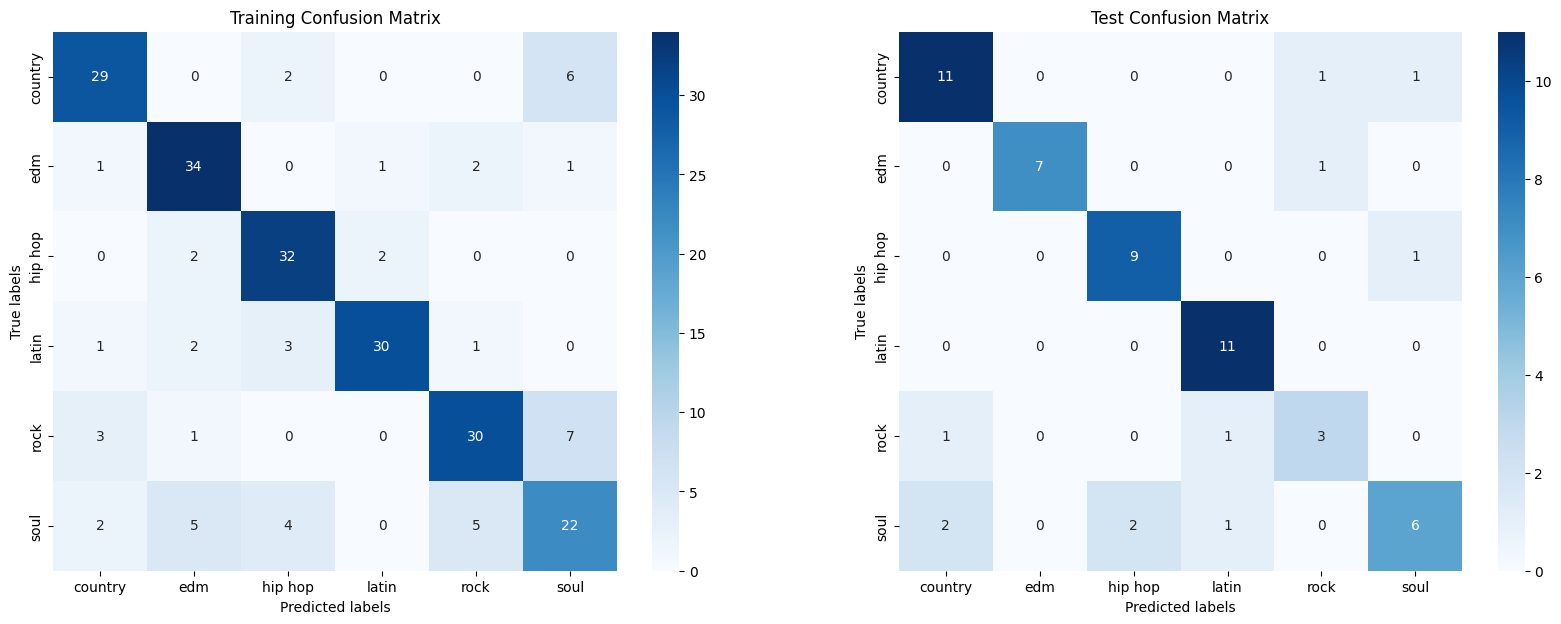

In [147]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# training predictions
y_pred_train = best_model.predict(X_train)

# train confusion matrix
cm_train = confusion_matrix(y_train, y_pred_train)

# test confusion matrix
cm_test = confusion_matrix(y_test_flat, y_pred)

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7))  # 1 Row, 2 Columns

# Test Confusion Matrix
sns.heatmap(cm_test, annot=True, fmt='g', cmap='Blues', ax=ax2,
            xticklabels=sorted(set(y_test_flat)), yticklabels=sorted(set(y_test_flat)))
ax2.set_xlabel('Predicted labels')
ax2.set_ylabel('True labels')
ax2.set_title('Test Confusion Matrix')

# Training Confusion Matrix
sns.heatmap(cm_train, annot=True, fmt='g', cmap='Blues', ax=ax1,
            xticklabels=sorted(set(y_train_flat)), yticklabels=sorted(set(y_train_flat)))
ax1.set_xlabel('Predicted labels')
ax1.set_ylabel('True labels')
ax1.set_title('Training Confusion Matrix')

## SVM

In [148]:
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

# Define the parameter grid
param_grid = {
    'C': np.logspace(-4, 4, 20),
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  # Added different kernels to try
    'gamma': ['scale', 'auto']  # Gamma is a parameter for non-linear hyperplanes. The higher the gamma value it tries to exactly fit the training data set
}

# Initialize the SVM model
svm_model = SVC(max_iter=10000, decision_function_shape='ovr')

# Create GridSearchCV with the SVM estimator and the parameter grid
grid_search_svm = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy', refit=True)

# Fit the GridSearchCV to the training data
grid_search_svm.fit(X_train, y_train_flat)

# Get the best model
best_svm_model = grid_search_svm.best_estimator_

# Predict on the test data with the best model
y_pred_svm = best_svm_model.predict(X_test)

# Evaluate the best model on the test data
accuracy_svm = accuracy_score(y_test_flat, y_pred_svm)
classification_report_svm = classification_report(y_test_flat, y_pred_svm)

# Print the best parameters, the test accuracy, and the classification report
print(f"Best Parameters: {grid_search_svm.best_params_}")
print(f"Test Accuracy: {accuracy_svm}")
print("SVM Classification Report:")
print(classification_report_svm)

Best Parameters: {'C': 29.763514416313132, 'gamma': 'scale', 'kernel': 'linear'}
Test Accuracy: 0.7758620689655172
SVM Classification Report:
              precision    recall  f1-score   support

     country       0.73      0.85      0.79        13
         edm       0.88      0.88      0.88         8
     hip hop       0.90      0.90      0.90        10
       latin       0.83      0.91      0.87        11
        rock       0.50      0.40      0.44         5
        soul       0.67      0.55      0.60        11

    accuracy                           0.78        58
   macro avg       0.75      0.75      0.75        58
weighted avg       0.77      0.78      0.77        58



Text(0.5, 1.0, 'Training Confusion Matrix')

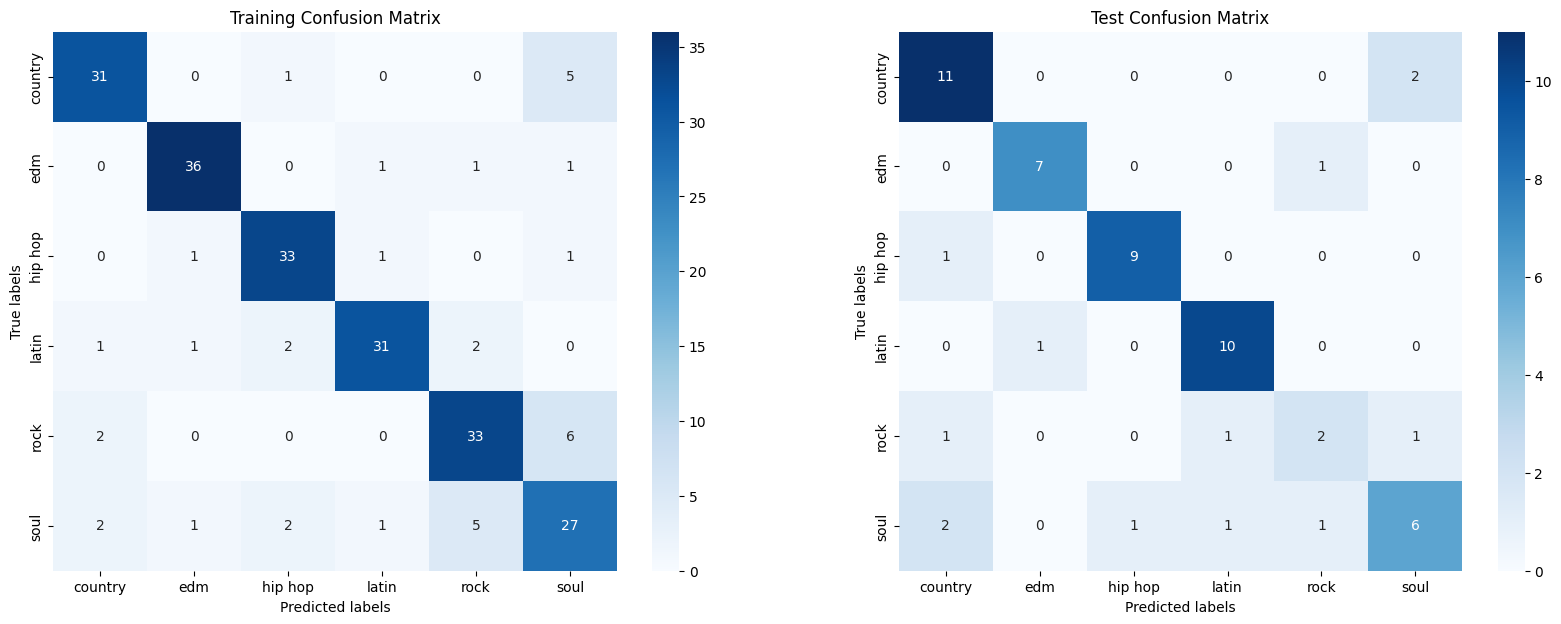

In [149]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# training predictions
y_pred_svm_train = best_svm_model.predict(X_train)

# train confusion matrix
cm_train = confusion_matrix(y_train, y_pred_svm_train)

# test confusion matrix
cm_test = confusion_matrix(y_test_flat, y_pred_svm)

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7))  # 1 Row, 2 Columns

# Test Confusion Matrix
sns.heatmap(cm_test, annot=True, fmt='g', cmap='Blues', ax=ax2,
            xticklabels=sorted(set(y_test_flat)), yticklabels=sorted(set(y_test_flat)))
ax2.set_xlabel('Predicted labels')
ax2.set_ylabel('True labels')
ax2.set_title('Test Confusion Matrix')

# Training Confusion Matrix
sns.heatmap(cm_train, annot=True, fmt='g', cmap='Blues', ax=ax1,
            xticklabels=sorted(set(y_train_flat)), yticklabels=sorted(set(y_train_flat)))
ax1.set_xlabel('Predicted labels')
ax1.set_ylabel('True labels')
ax1.set_title('Training Confusion Matrix')

## Neural Network

In [142]:
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV

def create_model(neurons=128, dropout_rate=0.05, regularization_rate=0.01, hidden_layers=1):
    model = Sequential()
    model.add(Dense(neurons, activation='relu', input_shape=(X_train.shape[1],), 
                    kernel_regularizer=regularizers.l2(regularization_rate)))
    model.add(Dropout(dropout_rate))
    for _ in range(hidden_layers - 1):
        model.add(Dense(neurons, activation='relu', kernel_regularizer=regularizers.l2(regularization_rate)))
        model.add(Dropout(dropout_rate))
    model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(regularization_rate)))
    model.add(Dense(6, activation='softmax'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

model = KerasClassifier(model=create_model, verbose=1, neurons=None, dropout_rate=None, regularization_rate=None, hidden_layers=None, batch_size=None, epochs=None)

param_grid = {
    'neurons': [32, 64, 128],
    'dropout_rate': [0.05, 0.1, 0.2],
    'regularization_rate': [0.01, 0.001],
    'hidden_layers': [1, 2, 3],
    'batch_size': [32, 64, 128],
    'epochs': [50]
}

grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=5)
grid_result = grid.fit(X_train, train_target_encoded)


/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first la

Epoch 1/50
Epoch 1/50
Epoch 1/50
Epoch 1/50
Epoch 1/50
Epoch 1/50
Epoch 1/50
Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1957 - loss: 2.5970  
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1382 - loss: 2.1058  
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2333 - loss: 1.8557  
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2036 - loss: 2.4279 
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1044 - loss: 1.8928 
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1864 - loss: 1.7859 
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 976us/step - accuracy: 0.1389 - loss: 1.8151
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1766 - loss: 2.5448
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1971 - loss: 1.8902
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.0919 - loss: 2.5581
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 798us/step - accuracy: 0.2337 - loss: 1.8140
Epoch 5/

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first la

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5957 - loss: 1.5432 
Epoch 48/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step 
Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 982us/step - accuracy: 0.6082 - loss: 1.5278
Epoch 49/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 541us/step - accuracy: 0.6315 - loss: 1.4732
Epoch 50/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6711 - loss: 1.3969 
Epoch 1/50
Epoch 1/50
Epoch 1/50
Epoch 1/50
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/stepEpoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Epoch 1/50


/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1351 - loss: 1.9879  
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1317 - loss: 1.8675 
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 897us/step - accuracy: 0.1817 - loss: 1.8143
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.2148 - loss: 2.1375  
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1768 - loss: 2.1503 
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 692us/step - accuracy: 0.1044 - loss: 2.7948
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1955 - loss: 1.8007 
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step - accuracy: 0.2008 - loss: 1.9946
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 508us/step - accuracy: 0.1429 - loss: 2.6040
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 593us/step - accuracy: 0.1314 - loss: 2.5369
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.1875 - loss: 1.9435Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2293 - loss: 1.9191 
Epoch 5/5

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first la

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5788 - loss: 1.5460 
Epoch 49/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5587 - loss: 1.5776 
Epoch 44/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5845 - loss: 1.1985 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5621 - loss: 1.5610 
Epoch 45/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5810 - loss: 1.4827 
Epoch 50/50
Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5808 - loss: 1.5491 
Epoch 45/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5950 - loss: 1.5236 
Epoch 46/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6597 - loss: 1.1061 
Epoch 40/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6364 - loss: 1.4874 
Epoch 47/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6122 - loss: 1.4216 
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.5938 - loss: 1.1775Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6499 - loss: 1.1264 
Epoch 41/50
6/6 ━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6911 - loss: 1.0468 
Epoch 44/50
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.5312 - loss: 1.4718Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5777 - loss: 1.4679 
Epoch 49/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6790 - loss: 1.1242 
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.5938 - loss: 1.6027Epoch 45/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6016 - loss: 1.5104 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6415 - loss: 1.4539 
Epoch 50/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6830 - loss: 1.0867 
Epoch 46/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6624 - loss: 1.4780 
Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6688 - loss: 1.0259 
Epoch 47/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6924 - loss: 0.9845 
Epoch 48/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.6875 - loss: 1.002
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/s

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first la

Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1268 - loss: 1.9578  
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2614 - loss: 1.8294 
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1637 - loss: 2.0008  
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2621 - loss: 1.8160 
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.1875 - loss: 1.8640Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2016 - loss: 1.8560 
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1791 - loss: 1.9280  
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2085 - loss: 1.7745 
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2465 - loss: 1.7990 
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2500 - loss: 1.8078Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2793 - loss: 1.8137 
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3140 - loss: 1.7490 
Epoch 6/50
6/6 ━━━━━━━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6612 - loss: 1.4714 
Epoch 39/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6092 - loss: 1.0206 
Epoch 49/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5858 - loss: 1.4951 
Epoch 44/50
Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6519 - loss: 1.0083 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7348 - loss: 0.9602 
Epoch 47/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6912 - loss: 1.4316 
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5938 - loss: 1.4633Epoch 40/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6652 - loss: 1.4527 
Epoch 36/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6515 - loss: 1.0209 
Epoch 50/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6186 - loss: 1.4687 
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5625 - loss: 1.2178Epoch 45/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6337 - loss: 1.0870 
Epoch 48/50
6/6 ━━━━━━━━━━━━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6562 - loss: 1.4167
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6559 - loss: 1.3975 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7135 - loss: 1.3774 
Epoch 47/50
Epoch 41/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6999 - loss: 1.3829 
Epoch 50/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6479 - loss: 1.4136
Epoch 50/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6698 - loss: 1.4045 
Epoch 42/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5964 - loss: 1.4658 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6518 - loss: 1.3447 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6667 - loss: 1.3879 
Epoch 48/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6719 - loss: 1.3571 
Epoch 43/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.7500 - loss: 1.321
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.7188 - loss: 1.2610Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first la

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6917 - loss: 1.3929 
Epoch 47/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7186 - loss: 1.3568 
Epoch 48/50
Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6473 - loss: 1.4033 
Epoch 49/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6556 - loss: 1.3682 
Epoch 50/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6982 - loss: 1.3278 


/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1168 - loss: 2.9880  
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2732 - loss: 2.7680 
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3102 - loss: 2.6422 
Epoch 4/50
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.2812 - loss: 2.6323Epoch 1/50


/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3245 - loss: 2.5883 
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3301 - loss: 2.5243 
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3821 - loss: 2.4474 
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2324 - loss: 1.9643  
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3786 - loss: 2.3783 
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2953 - loss: 1.8505 
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3201 - loss: 1.8018 
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4058 - loss: 2.3454 
Epoch 9/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1370 - loss: 1.9858  
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3945 - loss: 1.7669 
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2108 - loss: 1.8697 
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3193 - loss: 1.7626 
Epoch 6/50
6/

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first la

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7159 - loss: 0.8951 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4690 - loss: 1.8447 
Epoch 31/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4032 - loss: 1.8516 
Epoch 32/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6928 - loss: 1.0064 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5319 - loss: 1.6910 
Epoch 42/50
Epoch 47/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5633 - loss: 1.6867 
Epoch 43/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6890 - loss: 0.9139 
Epoch 48/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4217 - loss: 1.7963 
Epoch 33/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5338 - loss: 1.7442 
Epoch 44/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7611 - loss: 0.8879 
Epoch 49/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Epoch 1/5

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5047 - loss: 1.6433 
Epoch 42/50
Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4309 - loss: 1.7529 
Epoch 43/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4613 - loss: 1.6389 
Epoch 44/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5032 - loss: 1.6157 
Epoch 45/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4970 - loss: 1.6129 
Epoch 46/50
Epoch 1/50
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5000 - loss: 1.6557

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4891 - loss: 1.6462 
Epoch 47/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4644 - loss: 1.6910 
Epoch 48/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4822 - loss: 1.5943 
Epoch 49/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4465 - loss: 1.6427 
Epoch 50/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4354 - loss: 1.6531 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1983 - loss: 2.7683  
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2156 - loss: 2.6657 
Epoch 3/50
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.1875 - loss: 2.6316

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1851 - loss: 2.6051 
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2074 - loss: 2.5577 
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3067 - loss: 2.4754 
1/6 ━━━━━━━━━━━━━━━━━━━━ 4s 969ms/step - accuracy: 0.2812 - loss: 2.0358Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2050 - loss: 2.0203  
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1648 - loss: 1.9714 
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1443 - loss: 2.7385
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1762 - loss: 1.8745 
Epoch 2/50
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1910 - loss: 2.75091
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2351 - loss: 2.4737 
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1339 - loss: 2.6782 
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2766 - loss: 1.8414 
Epoch 5/50
6/6 ━━━━━━━━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5625 - loss: 1.4683Epoch 30/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4648 - loss: 1.6132 
Epoch 49/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5639 - loss: 1.5346 
Epoch 50/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5268 - loss: 1.2338 
Epoch 48/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5771 - loss: 1.2151 
Epoch 50/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4971 - loss: 1.4719 
Epoch 31/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5694 - loss: 1.2580 
Epoch 41/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4332 - loss: 1.6175 
Epoch 50/50
Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5029 - loss: 1.6164 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5606 - loss: 1.2588 
Epoch 49/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5014 - loss: 1.5941 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4508 - loss: 1.4986 
Epoch 32/50
6/6 ━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first la

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5008 - loss: 1.3833 
Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6486 - loss: 1.0454 
Epoch 42/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5200 - loss: 1.2847 
Epoch 43/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5315 - loss: 1.3104 
Epoch 44/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5535 - loss: 1.2660 
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/stepEpoch 45/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5643 - loss: 1.2896 
Epoch 46/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5482 - loss: 1.2703 
Epoch 47/50


/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5892 - loss: 1.2118 
Epoch 48/50
Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6313 - loss: 1.1715 
Epoch 49/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5539 - loss: 1.2234 
Epoch 50/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5430 - loss: 1.2672 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.1428 - loss: 3.3694
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.2163 - loss: 3.2586
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2355 - loss: 3.1605 
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2234 - loss: 3.0784 
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2795 - loss: 3.1433 
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2956 - loss: 2.9686 
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3311 - loss: 3.0174 
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3029 - loss: 2.9168 
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2727 - loss: 2.8915 
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2856 - loss: 2.8071 
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3355 - loss: 2.8324 
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3296 - loss: 2.7495 
Epoch

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6856 - loss: 1.0107 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 804us/step - accuracy: 0.5555 - loss: 1.5496
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5625 - loss: 1.4792Epoch 47/50
Epoch 46/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5777 - loss: 1.5550 
Epoch 50/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 951us/step - accuracy: 0.5578 - loss: 1.2757
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7188 - loss: 1.3730Epoch 30/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 837us/step - accuracy: 0.6326 - loss: 1.4982
Epoch 48/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7812 - loss: 1.005
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6876 - loss: 1.0270 
Epoch 38/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 837us/step - accuracy: 0.6997 - loss: 0.9711
Epoch 47/50
Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 766us/step - accuracy: 0.5836 - loss: 1.6251
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 961us/step - accuracy: 0.5761 - loss: 1.5623
Epoch 49/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7048 - loss: 0.9002 
Epoch 44/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5986 - loss: 1.2182  
Epoch 34/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6237 - loss: 1.1564 
Epoch 35/50
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.9062 - loss: 0.6537Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7584 - loss: 0.8817 
Epoch 45/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6132 - loss: 1.1719 
Epoch 36/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6360 - loss: 1.0497 
Epoch 46/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5721 - loss: 1.1688 
Epoch 37/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5682 - loss: 1.2147 
Epoch 38/50
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.5938 - loss: 1.0627

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6457 - loss: 0.9926 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6372 - loss: 1.1238 
Epoch 39/50
Epoch 47/50
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7188 - loss: 1.0416Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6036 - loss: 1.1607 
Epoch 40/50
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7812 - loss: 0.8624Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7067 - loss: 0.9219 
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6562 - loss: 1.1960Epoch 48/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6430 - loss: 1.1474 
Epoch 41/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6459 - loss: 1.0694 
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7188 - loss: 0.8431Epoch 42/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7426 - loss: 0.8414 
Epoch 49/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7041 - loss: 0.8930 
Epoch 50/50
6/6 ━━━━━━━━━━━━━━━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1815 - loss: 1.9392
Epoch 2/50
Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2618 - loss: 1.8816 
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.1843 - loss: 2.0579
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3379 - loss: 1.8677 
Epoch 4/50


/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4070 - loss: 1.8295 
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1948 - loss: 1.8896 
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3379 - loss: 1.8600 
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2701 - loss: 1.8945 
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3663 - loss: 1.8080 
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3089 - loss: 1.8742 
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1701 - loss: 4.1234
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1959 - loss: 4.14010
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3104 - loss: 1.8086 
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3120 - loss: 3.8760 
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2011 - loss: 3.8959 
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3270 - loss: 3.6723 5
Epoch 4/50
6/6 

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first la

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6424 - loss: 1.4249 
Epoch 48/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5940 - loss: 1.5519 
Epoch 45/50
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6562 - loss: 1.3460Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5598 - loss: 1.9005 
Epoch 30/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6733 - loss: 1.3784 
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.6875 - loss: 1.4518Epoch 49/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6957 - loss: 1.0648 
Epoch 26/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6314 - loss: 1.5724  
Epoch 48/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6547 - loss: 1.4850 
Epoch 46/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4739 - loss: 1.8996 
Epoch 31/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6411 - loss: 1.4239 
Epoch 50/50
6/6 ━━━━━━━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first la

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5852 - loss: 1.6667 
Epoch 39/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7314 - loss: 0.9517 
Epoch 35/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.6250 - loss: 1.745
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5907 - loss: 1.7255 
Epoch 40/50
Epoch 1/50
Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7042 - loss: 0.9868 
Epoch 36/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5892 - loss: 1.7037 
Epoch 41/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7245 - loss: 0.9482 
Epoch 37/50
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5938 - loss: 1.6501Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6089 - loss: 1.6800 
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.7188 - loss: 0.9034Epoch 42/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7290 - loss: 0.9296 
Epoch 38/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6053 - loss: 1.6944 
Epoch 43/5

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4104 - loss: 1.8616 
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step accuracy: 0.1562 - loss: 2.233
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.1743 - loss: 2.0710
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3711 - loss: 1.8122 
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.2096 - loss: 2.0198
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3905 - loss: 1.8089 
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3455 - loss: 1.9480 
Epoch 3/50
5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.3044 - loss: 1.9372Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3673 - loss: 1.7381 
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4166 - loss: 1.8980 
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.3085 - loss: 1.9393
Epoch 3/50
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3125 - loss: 1.8939

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3756 - loss: 1.8735 
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2977 - loss: 1.9017 
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1953 - loss: 2.0407
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4223 - loss: 1.8634 
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3835 - loss: 1.7159 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3134 - loss: 1.9614 
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4064 - loss: 1.8237 
Epoch 6/50
Epoch 9/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4090 - loss: 1.8989 
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4064 - loss: 1.8825 
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4594 - loss: 1.8136  
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4132 - loss: 1.8210  
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4008 - loss: 1.7921 
Epoch 7/50
6/6

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first la

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3148 - loss: 2.1890 
Epoch 20/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4203 - loss: 1.8850 
Epoch 42/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3430 - loss: 2.1619 
Epoch 21/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2756 - loss: 1.8878 
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4062 - loss: 2.2273Epoch 43/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3611 - loss: 2.1747 
Epoch 21/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3211 - loss: 2.1590 
Epoch 22/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4015 - loss: 1.9048 
Epoch 43/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2362 - loss: 1.9148 
Epoch 44/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4127 - loss: 1.9076 
Epoch 44/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3543 - loss: 2.1259 
Epoch 23/50
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4384 - loss: 1.8747 
Epoch 47/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3299 - loss: 2.0628 
Epoch 26/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 700us/step - accuracy: 0.2597 - loss: 1.8711
Epoch 49/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2625 - loss: 1.8378 
Epoch 50/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4019 - loss: 1.8110 
Epoch 48/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4263 - loss: 1.9921 
Epoch 27/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2796 - loss: 2.0943 
Epoch 26/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4065 - loss: 1.8556 
Epoch 49/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3757 - loss: 1.9557 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3288 - loss: 2.0410 
Epoch 28/50
Epoch 27/50
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.2500 - loss: 1.8672Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3622 - loss: 1.9545 
Epoch

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3779 - loss: 1.8686 
Epoch 35/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3940 - loss: 1.9140 
Epoch 34/50
Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 668us/step - accuracy: 0.3702 - loss: 1.8793
Epoch 36/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 879us/step - accuracy: 0.4154 - loss: 1.8849
Epoch 35/50
Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4611 - loss: 1.8295 
Epoch 37/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3762 - loss: 1.8922 
Epoch 36/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4046 - loss: 1.8086 
Epoch 38/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3893 - loss: 1.8500 
Epoch 37/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3910 - loss: 1.8875 
Epoch 38/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3713 - loss: 1.8330 
Epoch 39/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4360 - loss: 1.7175 
Epoch 40/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.2067 - loss: 1.93955
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2332 - loss: 1.8732 
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2813 - loss: 2.7202 
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2844 - loss: 2.6441 
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2700 - loss: 1.8648 
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.1054 - loss: 1.9588
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1996 - loss: 1.9349 
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3088 - loss: 2.5914 
Epoch 9/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2985 - loss: 2.5580 
Epoch 10/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2866 - loss: 1.8396 
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2289 - loss: 1.8806 
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2727 - loss: 2.5118 
Epoch 11/50
6/6

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first la

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4770 - loss: 1.4957 
Epoch 40/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3434 - loss: 2.3723 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5397 - loss: 1.1753 
Epoch 20/50
Epoch 48/50
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/stepEpoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5936 - loss: 1.1812 
Epoch 49/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5312 - loss: 1.3226 
Epoch 41/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4256 - loss: 2.2489 
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.4062 - loss: 2.2868Epoch 22/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3789 - loss: 2.3240 
Epoch 21/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6055 - loss: 1.1692 
Epoch 50/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4093 - loss: 2.2445 
Epoch 23/50
Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3986 - loss: 2.3207 
1/6 

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4536 - loss: 1.9703 
Epoch 31/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4772 - loss: 1.9717 
Epoch 30/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5302 - loss: 1.3013 
Epoch 50/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4539 - loss: 1.9873 
Epoch 31/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4631 - loss: 1.9292 
Epoch 32/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5969 - loss: 1.2170 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4169 - loss: 1.9410 
Epoch 33/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4631 - loss: 1.9753 
Epoch 32/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4182 - loss: 1.9226 
Epoch 34/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4606 - loss: 1.8980 
Epoch 33/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4967 - loss: 1.8857
Epoch 34/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4890 - loss: 1.8056 
Epoch 39/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4574 - loss: 1.8307 
Epoch 40/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4981 - loss: 1.7318 
Epoch 41/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5071 - loss: 1.7963 
Epoch 40/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5487 - loss: 1.7580 
Epoch 41/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5135 - loss: 1.7236 
Epoch 42/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5068 - loss: 1.8243 
Epoch 42/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5574 - loss: 1.7159 
Epoch 43/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5371 - loss: 1.6791 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4589 - loss: 1.7101 
Epoch 44/50
Epoch 43/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5189 - loss: 1.7201 
Epoch 44/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5890 - loss: 1.6008 
Epoc

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2973 - loss: 3.3951 
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3629 - loss: 3.0619  
Epoch 9/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3031 - loss: 2.9683 
Epoch 10/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3318 - loss: 3.3042 
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4268 - loss: 1.8758 
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3958 - loss: 2.9827 
Epoch 10/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3551 - loss: 2.8775 
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.2812 - loss: 3.1437Epoch 11/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3224 - loss: 3.1832 
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3282 - loss: 2.9141 
Epoch 11/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3261 - loss: 3.1206 
Epoch 9/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4195 - loss: 2.8041 
Epoch 12/50
6/6 ━━━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first la

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3989 - loss: 1.7243 
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.6562 - loss: 1.1823Epoch 11/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 944us/step - accuracy: 0.6475 - loss: 1.0086
Epoch 45/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6396 - loss: 1.1867 
Epoch 32/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3678 - loss: 1.7088 
Epoch 12/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7210 - loss: 0.9462 
Epoch 46/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6154 - loss: 1.1614 
Epoch 33/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3385 - loss: 1.8596 
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.5625 - loss: 1.18
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6248 - loss: 1.0249 
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4062 - loss: 1.5824Epoch 47/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4263 - loss: 1.6095 
Epoch 

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6159 - loss: 1.3084
Epoch 21/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5765 - loss: 1.2558 
Epoch 41/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5481 - loss: 1.3757 
Epoch 22/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4654 - loss: 1.6172 
Epoch 19/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5813 - loss: 1.1867 
Epoch 42/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5752 - loss: 1.3721 
Epoch 23/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5826 - loss: 1.1426 
Epoch 43/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6681 - loss: 1.1115 
Epoch 44/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4882 - loss: 1.5234 
Epoch 20/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6375 - loss: 1.2287 
Epoch 24/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5583 - loss: 1.2564 
Epoch 25/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5032 - loss: 1.5445 
Epoc

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5960 - loss: 1.2916 
Epoch 35/50
Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6661 - loss: 1.0674 
Epoch 38/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5824 - loss: 1.2449 
Epoch 36/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6757 - loss: 1.0394 
Epoch 39/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6383 - loss: 1.1534 
Epoch 37/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6498 - loss: 1.1689 
Epoch 38/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6348 - loss: 1.0271 
Epoch 40/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5987 - loss: 1.1853 
Epoch 39/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6375 - loss: 1.0961 
Epoch 40/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6999 - loss: 0.9692 
Epoch 41/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6292 - loss: 1.1318 
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6562 - loss: 1.1398Epoch 

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3358 - loss: 3.4432 
Epoch 10/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3242 - loss: 4.1826 
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.3438 - loss: 3.4226Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3888 - loss: 3.6130 
Epoch 9/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.1874 - loss: 5.3839
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3975 - loss: 3.3434 
Epoch 11/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3020 - loss: 3.3012 
Epoch 11/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4035 - loss: 3.9150 
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 993us/step - accuracy: 0.3682 - loss: 3.4382
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 905us/step - accuracy: 0.4108 - loss: 3.2010
Epoch 10/50
Epoch 12/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3491 - loss: 3.1409 
Epoch 12/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2287 - loss: 5.0195 
Epoch 3/50
6/6 ━━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.7500 - loss: 1.581
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6857 - loss: 1.5758 
Epoch 50/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5549 - loss: 1.4090 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7251 - loss: 1.0173 
Epoch 16/50
Epoch 42/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6427 - loss: 1.2636 
Epoch 19/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6289 - loss: 1.6020 
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.5312 - loss: 1.3150Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7476 - loss: 0.9605 
Epoch 43/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6136 - loss: 1.2830 
Epoch 20/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4804 - loss: 1.4903 
Epoch 17/50
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7812 - loss: 0.9558Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7593 - loss: 0.8

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5756 - loss: 1.3629 
Epoch 20/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7492 - loss: 0.9273 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6671 - loss: 1.1504 
Epoch 23/50
Epoch 46/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7340 - loss: 0.9610 
Epoch 47/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6635 - loss: 1.1145 
Epoch 24/50
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.7188 - loss: 0.9066Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7124 - loss: 0.9658 
Epoch 48/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6399 - loss: 1.2005 
Epoch 25/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7513 - loss: 0.9110 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6956 - loss: 1.0474 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5618 - loss: 1.3204  
Epoch 26/50
Epoch 21/50
Epoch 49/50
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step -

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5322 - loss: 1.3380 
Epoch 22/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7397 - loss: 0.9567 
Epoch 50/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6310 - loss: 1.1194 
Epoch 27/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6069 - loss: 1.2485 
Epoch 23/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6747 - loss: 1.0872 
Epoch 28/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6289 - loss: 1.2027 
Epoch 24/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7791 - loss: 0.8488 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7428 - loss: 0.9410 
Epoch 29/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7056 - loss: 0.9734 
Epoch 30/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7356 - loss: 1.1185 
Epoch 25/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6881 - loss: 0.9981 
Epoch 31/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5871 - loss: 1.1726 
Epoch 26/50
6/6 

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6532 - loss: 1.0686 
Epoch 32/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7276 - loss: 0.9751 
Epoch 37/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6477 - loss: 1.0842 
Epoch 33/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6659 - loss: 1.0629 
Epoch 38/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6870 - loss: 0.9764 
Epoch 34/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7269 - loss: 1.0128 
Epoch 39/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7304 - loss: 0.9810 
Epoch 35/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6679 - loss: 1.0308 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7149 - loss: 0.9761
Epoch 36/50
Epoch 40/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6615 - loss: 0.9628 
Epoch 37/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7520 - loss: 0.9728 
Epoch 41/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1802 - loss: 2.4752  
Epo

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3228 - loss: 1.9479 
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.3750 - loss: 1.9874Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.3438 - loss: 2.0827
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1588 - loss: 2.4707
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3539 - loss: 2.0041 
Epoch 18/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4486 - loss: 1.7724 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3327 - loss: 2.0824 
Epoch 9/50
Epoch 12/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4559 - loss: 1.9208 
Epoch 20/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3445 - loss: 1.8846 
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1990 - loss: 2.3781 
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3760 - loss: 1.9854 
Epoch 19/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3520 - loss: 2.0706 
Epoch 13/50
Epoch 1/50
6/6 ━━━━━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2251 - loss: 1.8199 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4541 - loss: 1.6343 
Epoch 8/50
Epoch 49/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4511 - loss: 1.7581  
Epoch 37/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7538 - loss: 0.8724 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7132 - loss: 0.9951 
Epoch 42/50
Epoch 44/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3059 - loss: 2.0016 
Epoch 15/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3175 - loss: 1.7718 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4582 - loss: 1.7899 
Epoch 9/50
Epoch 38/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5469 - loss: 1.5545 
Epoch 50/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7138 - loss: 0.9588 
Epoch 45/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3488 - loss: 1.9928 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7371 - loss: 0.8514 
Epoch 43/50
Epoch

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4932 - loss: 1.6648 
Epoch 45/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3712 - loss: 1.8534 
Epoch 24/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5000 - loss: 1.6640 
Epoch 46/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4201 - loss: 1.7013 
Epoch 47/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3759 - loss: 1.8356 
Epoch 25/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3619 - loss: 1.8264 
Epoch 26/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4456 - loss: 1.6520 
Epoch 48/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4230 - loss: 1.6381  
Epoch 17/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4964 - loss: 1.6399 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3830 - loss: 1.8145 
Epoch 49/50
Epoch 27/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4050 - loss: 1.6585 
Epoch 18/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4375 - loss: 1.6029Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5038 - loss: 1.5953
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4495 - loss: 1.5862 
Epoch 21/50
Epoch 50/50
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.6250 - loss: 1.6824Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4245 - loss: 1.5750 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4690 - loss: 1.7609 
Epoch 29/50
Epoch 22/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4458 - loss: 1.6415 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4709 - loss: 1.7590 
Epoch 30/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4514 - loss: 1.5365 
Epoch 23/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4153 - loss: 1.5780 
Epoch 24/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4076 - loss: 1.7789 
Epoch 31/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4123 - loss: 1.7507 
1/2 ━━━━━━━━━━━━━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4686 - loss: 1.4640 
Epoch 31/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4390 - loss: 1.6853 
Epoch 38/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1252 - loss: 2.0021 
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4972 - loss: 1.4326 
Epoch 32/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4672 - loss: 1.6472 
Epoch 39/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1531 - loss: 1.9118 
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4586 - loss: 1.6586 
Epoch 40/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1550 - loss: 1.8433 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4915 - loss: 1.4394 
Epoch 5/50
Epoch 33/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4712 - loss: 1.6683 
Epoch 41/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.2188 - loss: 2.0084
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.5000 - loss: 1.3903Epoch 2/50
6/6 ━━━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1870 - loss: 1.8603 
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3769 - loss: 1.7408 
Epoch 11/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4461 - loss: 1.5957 
Epoch 21/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2904 - loss: 1.7985 
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4355 - loss: 1.5368
Epoch 25/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2544 - loss: 2.4876 
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4274 - loss: 1.6231 
Epoch 22/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3701 - loss: 1.7001 
Epoch 12/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2791 - loss: 2.4174 
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.4375 - loss: 1.6150Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4325 - loss: 1.5596 
Epoch 26/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 866us/step - accuracy: 0.2258 - loss: 2.3523
Epoch 7/50
6/6 ━━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3700 - loss: 1.5081 
Epoch 30/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4772 - loss: 1.5169 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3765 - loss: 1.7519 
Epoch 7/50
Epoch 25/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4435 - loss: 1.6611 
Epoch 15/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3675 - loss: 2.2906 
Epoch 9/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1590 - loss: 2.7134
Epoch 2/50
Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4213 - loss: 1.6773 
Epoch 16/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1611 - loss: 2.5982 
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4404 - loss: 1.6684 
Epoch 17/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3672 - loss: 1.7720
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4124 - loss: 2.2435 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4229 - loss: 1.5108
Epoch 10/50
Epoch 8/50

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2708 - loss: 2.3709 
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4210 - loss: 1.8501 
Epoch 25/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4675 - loss: 1.4526 
Epoch 32/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5113 - loss: 1.2991 
Epoch 45/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5555 - loss: 1.3652 
Epoch 36/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5183 - loss: 1.6779 
Epoch 33/50
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4375 - loss: 1.8010Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2760 - loss: 2.3074 
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4733 - loss: 1.7652 
Epoch 26/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5318 - loss: 1.3877 
Epoch 33/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5696 - loss: 1.2914 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5507 - loss: 1.3774 
Epoch 37/50
Epoch 46

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5097 - loss: 1.8811 
Epoch 24/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5705 - loss: 1.2184 
Epoch 49/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4909 - loss: 1.9763 
Epoch 18/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6307 - loss: 1.4573 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5770 - loss: 1.2218 
Epoch 50/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4735 - loss: 1.8811 
Epoch 25/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5412 - loss: 1.2587 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4480 - loss: 1.9811 
Epoch 19/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4024 - loss: 1.8763 
Epoch 26/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5570 - loss: 1.4952
Epoch 43/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5649 - loss: 1.4776 
Epoch 44/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4380 - loss

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first la

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.4375 - loss: 1.551
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5282 - loss: 1.8902
Epoch 21/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5161 - loss: 1.5115 
Epoch 46/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4616 - loss: 1.8108 
Epoch 29/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.5312 - loss: 1.5463
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4492 - loss: 1.9015 
Epoch 22/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5336 - loss: 1.5322 
Epoch 47/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5079 - loss: 1.8090 
Epoch 30/50
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.5625 - loss: 1.8539Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5187 - loss: 1.8456 
Epoch 23/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6261 - loss: 1.4736 
Epoch 48/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4512 - loss: 1.7933 
Epoch 31/50
6/6 ━━━━━━━━━━━━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4919 - loss: 1.7601 
Epoch 30/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5309 - loss: 1.6574 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4865 - loss: 1.7784 
Epoch 38/50
Epoch 31/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3233 - loss: 2.3332 
Epoch 7/50
Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5094 - loss: 1.7448 
Epoch 32/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3648 - loss: 2.2941 
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5124 - loss: 1.6809 
Epoch 39/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5252 - loss: 1.7300 
Epoch 33/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3641 - loss: 2.2635 
Epoch 9/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5717 - loss: 1.6557 
Epoch 34/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3922 - loss: 2.2159 
Epoch 10/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5214 - loss: 1.67

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4651 - loss: 1.8198 
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.2812 - loss: 1.7866Epoch 27/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3313 - loss: 1.7956 
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5089 - loss: 1.5725 
Epoch 17/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3062 - loss: 1.7467 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4540 - loss: 1.6459 
Epoch 14/50
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.2188 - loss: 1.8277Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5186 - loss: 1.7922 
Epoch 28/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.2812 - loss: 1.7293
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5533 - loss: 1.5111 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2397 - loss: 1.8142 
Epoch 18/50
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3579 - loss: 1.6560 
Epoch 15/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/s

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4720 - loss: 1.5688 
Epoch 14/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5056 - loss: 1.5099 
Epoch 20/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5507 - loss: 1.6646 
Epoch 34/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4584 - loss: 1.6624 
Epoch 13/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5174 - loss: 1.4470 
Epoch 23/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3848 - loss: 1.7159 
Epoch 9/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4652 - loss: 1.5055 
Epoch 21/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5501 - loss: 1.3947 
Epoch 24/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5584 - loss: 1.6432 
Epoch 35/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4533 - loss: 1.6641 
Epoch 10/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4500 - loss: 1.5249 
Epoch 22/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5961 - loss: 1.3346 
Epoch

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 38/50
Epoch 46/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 880us/step - accuracy: 0.3201 - loss: 2.7133
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7061 - loss: 1.0113 
Epoch 50/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6431 - loss: 1.1369 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2821 - loss: 2.6250 
Epoch 38/50
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6570 - loss: 1.0935 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6497 - loss: 1.2191 
Epoch 39/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6391 - loss: 1.1445 
Epoch 39/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3629 - loss: 2.5647 
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5600 - loss: 1.1882 
Epoch 42/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5792 - loss: 1.1689 
Epoch 47/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6382 - loss: 1.1289 
Epoch 40/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6269 - loss: 1.

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6510 - loss: 1.0567 
Epoch 49/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4734 - loss: 2.0108  
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - accuracy: 0.5000 - loss: 2.1662Epoch 19/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6260 - loss: 1.0093 
Epoch 50/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6382 - loss: 1.1030  
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6575 - loss: 1.1269  
Epoch 45/50
Epoch 45/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4281 - loss: 2.2025  
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step 
Epoch 11/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6726 - loss: 0.9928 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6937 - loss: 1.0417 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6303 - loss: 1.0806 
Epoch 46/50
Epoch 46/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4420 - loss: 2.1607 
Epoch 12/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6565 -

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6203 - loss: 1.0921 
Epoch 48/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6934 - loss: 0.9939 
Epoch 49/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5365 - loss: 1.9110  
Epoch 20/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4466 - loss: 2.0575
Epoch 14/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6516 - loss: 1.0440 
Epoch 49/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4486 - loss: 1.9227 
Epoch 21/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5868 - loss: 1.1268 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5124 - loss: 1.8920 
Epoch 50/50
Epoch 22/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6883 - loss: 1.0578 
Epoch 50/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6680 - loss: 1.0583 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4703 - loss: 2.0047 
Epoch 15/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4386 - loss: 1.9727 
Epoch 17/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5115 - loss: 1.8555 
Epoch 24/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5978 - loss: 1.8414 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5019 - loss: 1.9486 
Epoch 25/50
Epoch 18/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.4688 - loss: 1.8690
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5086 - loss: 1.8008 
Epoch 26/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5106 - loss: 1.8892 
Epoch 19/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.6250 - loss: 1.8241
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5291 - loss: 1.8233 
Epoch 27/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4931 - loss: 1.8835 
Epoch 20/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5101 - loss: 1.8442 
Epoch 21/50


/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5938 - loss: 1.7645Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5150 - loss: 1.8198 
Epoch 22/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4923 - loss: 1.8146 
Epoch 23/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5204 - loss: 1.7388
Epoch 28/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5206 - loss: 1.7634 
Epoch 29/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4750 - loss: 1.7880 
Epoch 24/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5438 - loss: 1.7225 
Epoch 30/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4803 - loss: 1.7810 
Epoch 25/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4944 - loss: 1.7413 
Epoch 31/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5250 - loss: 1.7292 
Epoch 26/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5418 - loss: 1.6776 
Epoch 32/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5486 - loss: 1.7

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 21/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5256 - loss: 1.8897 
Epoch 20/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4896 - loss: 1.5939 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4725 - loss: 1.6104 
Epoch 12/50
Epoch 11/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4559 - loss: 1.7611 
Epoch 26/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5648 - loss: 1.3442 
Epoch 22/50
6/6 ━━━━━━━━━━━━━━━━━��━━ 0s 3ms/step - accuracy: 0.5137 - loss: 1.8549 
Epoch 21/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.4688 - loss: 1.7033
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4944 - loss: 1.7107 
Epoch 27/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4299 - loss: 1.6295 
Epoch 13/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5257 - loss: 1.7182 
Epoch 27/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5163 - loss: 1.5622 
Epoch 12/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5798 - loss: 1.3072 
Epo

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5574 - loss: 1.2765 
Epoch 28/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4791 - loss: 1.4417 
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - accuracy: 0.4688 - loss: 1.7504Epoch 19/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4816 - loss: 1.7012  
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6040 - loss: 1.6908 
Epoch 30/50
Epoch 27/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5599 - loss: 1.4613  
Epoch 15/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5262 - loss: 1.6659 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5831 - loss: 1.6710 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6260 - loss: 1.6141 
Epoch 31/50
Epoch 28/50
Epoch 34/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5920 - loss: 1.2339 
Epoch 29/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5359 - loss: 1.4507 
Epoch 16/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5837 - loss: 1.5860 
6/6 ━━━━━━━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6772 - loss: 0.9859 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6405 - loss: 1.0441 
Epoch 41/50
Epoch 35/50
6/6 ━━━���━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6365 - loss: 0.9778 
Epoch 49/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7268 - loss: 0.9245 
Epoch 42/50
2/2 ━━━━━━━━━━━���━━━━━━━━ 0s 14ms/step accuracy: 0.6562 - loss: 1.4159
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6767 - loss: 1.4073 
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5000 - loss: 1.2523Epoch 48/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6564 - loss: 0.9765 
Epoch 36/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6251 - loss: 1.0288 
Epoch 50/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6711 - loss: 0.9996 
Epoch 43/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4522 - loss: 1.6533 
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6441 - 

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6755 - loss: 0.9136 
Epoch 38/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4432 - loss: 1.7267 
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6547 - loss: 1.0318 
Epoch 45/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4329 - loss: 1.6357 5
Epoch 12/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6292 - loss: 1.4406 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3840 - loss: 1.7305 
Epoch 9/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7003 - loss: 0.9268 
Epoch 39/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6752 - loss: 0.9520 
Epoch 46/50
Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5469 - loss: 1.5359 
Epoch 13/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6589 - loss: 1.0073 
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.3750 - loss: 1.6803Epoch 47/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4295 - loss: 1.6742 
Epoch 10/50
6/6 ━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6069 - loss: 1.2952 
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6562 - loss: 0.7686Epoch 23/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5668 - loss: 1.3958 
Epoch 19/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6781 - loss: 0.8385 
Epoch 49/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7339 - loss: 0.8690 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6109 - loss: 1.2677 
Epoch 50/50
Epoch 24/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4941 - loss: 1.4236 
Epoch 20/50
Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6450 - loss: 0.9251 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6108 - loss: 1.3313 
Epoch 21/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5992 - loss: 1.2522 
Epoch 25/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6288 - loss: 1.2200 
Epoch 26/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6512 - loss: 1.2986 
Epoch 22/50
6/6 ━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6485 - loss: 1.1186 
Epoch 32/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5925 - loss: 1.2295
Epoch 28/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7010 - loss: 1.0688 
Epoch 33/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6429 - loss: 1.1766 
Epoch 29/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6449 - loss: 1.1068 
Epoch 34/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6098 - loss: 1.1385 
Epoch 30/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6790 - loss: 1.0109 
Epoch 35/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6065 - loss: 1.1465 
Epoch 31/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7056 - loss: 1.0506 
Epoch 36/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6492 - loss: 1.0333 
Epoch 37/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6461 - loss: 1.0725 
Epoch 38/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6702 - loss: 1.1004 
Epoc

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 44/50
Epoch 10/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7117 - loss: 0.8835 
Epoch 50/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1510 - loss: 2.8157
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3207 - loss: 2.3668 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6922 - loss: 0.9915 
Epoch 11/50
Epoch 45/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1377 - loss: 2.8438
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1406 - loss: 2.7155 
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7138 - loss: 0.9066 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3186 - loss: 2.3963 
Epoch 9/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3380 - loss: 2.3010 
Epoch 12/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6926 - loss: 0.9510 
Epoch 46/50
6/6 ━━���━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2639 - loss: 2.3720 
Epoch 10/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2165 - loss: 2.70

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


0
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2906 - loss: 2.2741 
Epoch 12/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1722 - loss: 2.5390 
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3152 - loss: 2.2541 
Epoch 15/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7507 - loss: 0.9177 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1746 - loss: 2.5923 
Epoch 5/50
Epoch 50/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1840 - loss: 2.5104 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2125 - loss: 2.5407 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3827 - loss: 2.2215 
Epoch 16/50
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2823 - loss: 2.4947 
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2138 - loss: 2.4624 
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 681us/step - accuracy: 0.2339 - loss: 2.4535
Epoch 9/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - ac

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3478 - loss: 2.2373 
Epoch 15/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3387 - loss: 1.9607 
Epoch 27/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3063 - loss: 2.1615 
6/6 ━━━━━━━━━━━━━━━━��━━━ 0s 5ms/step - accuracy: 0.4214 - loss: 1.9548 
Epoch 30/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2033 - loss: 1.8176 
Epoch 19/50
Epoch 9/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3393 - loss: 2.2478 
Epoch 16/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3507 - loss: 2.1286 
Epoch 22/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4526 - loss: 1.8932 
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.2188 - loss: 2.1135Epoch 28/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4737 - loss: 1.8940 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3084 - loss: 2.0879 
Epoch 31/50
Epoch 20/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 682us/step - accuracy: 0.2515 - loss: 2.2507
1/6 ━━━━━━━━━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4164 - loss: 1.4707 
Epoch 45/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 767us/step - accuracy: 0.3883 - loss: 1.7278
Epoch 17/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5646 - loss: 1.6666 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4083 - loss: 1.5801 
Epoch 22/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4018 - loss: 1.7012 
Epoch 18/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4574 - loss: 1.4956 
Epoch 46/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4518 - loss: 1.5764 
Epoch 23/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3444 - loss: 1.7226 
Epoch 19/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4304 - loss: 1.5356 
Epoch 47/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4393 - loss: 1.6010 
Epoch 24/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5038 - loss: 1.4305 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3506 - los

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3585 - loss: 1.5667 
Epoch 26/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5142 - loss: 1.3976 
Epoch 50/50
Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4400 - loss: 1.4916 
Epoch 27/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5437 - loss: 1.3630 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4173 - loss: 1.6820 
Epoch 22/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4270 - loss: 1.4809 
Epoch 28/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4004 - loss: 1.6592 
Epoch 23/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3737 - loss: 1.6503 
Epoch 24/50
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.3750 - loss: 1.6149Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4525 - loss: 1.5348 
Epoch 29/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4428 - loss: 1.6603 
Epoch 25/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4244 - loss: 1.5065 
Epoch 3

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4622 - loss: 1.5966 
Epoch 28/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1812 - loss: 1.9166
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4444 - loss: 1.4775 
Epoch 33/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3913 - loss: 1.5990 
Epoch 29/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1634 - loss: 1.8999 
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5063 - loss: 1.4014 
Epoch 34/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4727 - loss: 1.5018 
Epoch 30/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4312 - loss: 1.4270 
Epoch 35/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3718 - loss: 1.5961 
Epoch 31/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4298 - loss: 1.5454 1
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2307 - loss: 1.8521  
Epoch 32/50
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1753 - loss: 1.9657
4/6 ━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.1339 - loss: 3.2912
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1723 - loss: 3.1493 
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2487 - loss: 3.0535 
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2867 - loss: 2.9435 
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2071 - loss: 2.8790 
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2586 - loss: 2.8153 
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3267 - loss: 2.7458 
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3220 - loss: 2.6980
Epoch 9/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.1114 - loss: 3.3377
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.3067 - loss: 2.6429
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - accuracy: 0.2188 - loss: 3.1963Epoch 10/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2217 - loss: 3.1830  
Epoch 3/50
6/6

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5091 - loss: 1.6915 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 876us/step - accuracy: 0.4948 - loss: 1.7510
Epoch 33/50
Epoch 44/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 660us/step - accuracy: 0.1840 - loss: 3.1291
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5868 - loss: 1.6044 
Epoch 40/50
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.2500 - loss: 2.3642Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2761 - loss: 3.0354 
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3172 - loss: 2.3541 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4800 - loss: 1.7604 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5661 - loss: 1.6603 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5641 - loss: 1.2717 
Epoch 49/50
Epoch 34/50
Epoch 45/50
1/6 ━━━━━━━━━━━━━━━━━━━━ 15s 3s/step - accuracy: 0.3125 - loss: 1.9354Epoch 16/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.2262 - loss: 1.9844
Epoch 2/50
6/6 ━━━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5875 - loss: 1.5002 
Epoch 50/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4065 - loss: 2.1759 
Epoch 22/50
Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3528 - loss: 2.3840 
Epoch 14/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3182 - loss: 2.1679 
Epoch 23/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5658 - loss: 1.5766 
Epoch 42/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5971 - loss: 1.4736 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4001 - loss: 2.1188 
Epoch 24/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3662 - loss: 1.7525  
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4444 - loss: 2.0726 
Epoch 25/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5489 - loss: 1.5600 
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.3438 - loss: 1.6876Epoch 43/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4867 - loss: 1.6172 
Epoch 14/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4008 - loss: 2.0872  
Epoch 26/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5559 - loss: 1.5633 
Epoch 45/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3750 - loss: 2.310
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4051 - loss: 2.2636 
Epoch 17/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4059 - loss: 2.0340 
Epoch 27/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5874 - loss: 1.4597 
Epoch 46/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4570 - loss: 1.6664 
Epoch 15/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3553 - loss: 2.2482 
Epoch 18/50
Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6111 - loss: 1.5345 
Epoch 47/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4566 - loss: 1.9784 
Epoch 28/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6079 - loss: 1.5245 
Epoch

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5879 - loss: 1.3880
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - accuracy: 0.3750 - loss: 1.8401Epoch 25/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4220 - loss: 1.8255 
Epoch 38/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5819 - loss: 1.3397 
Epoch 26/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.4872 - loss: 1.8606
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.3750 - loss: 2.0602Epoch 30/50
Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5282 - loss: 1.8135 
Epoch 31/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4961 - loss: 1.4499  
Epoch 27/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5307 - loss: 1.4204 
Epoch 28/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.4722 - loss: 1.8885
Epoch 39/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 739us/step - accuracy: 0.4685 - loss: 1.8090
Epoch 40/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4535 - loss: 1.8072 
Epoch 32/50
6/6

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6534 - loss: 1.0409 
Epoch 44/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4358 - loss: 1.6943 
Epoch 17/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3735 - loss: 1.8368 
Epoch 6/50
Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4524 - loss: 1.6131 
Epoch 18/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 994us/step - accuracy: 0.5979 - loss: 1.5344
Epoch 49/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.1709 - loss: 1.9473
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4381 - loss: 1.6124 
Epoch 19/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6300 - loss: 1.4744 
Epoch 50/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1957 - loss: 1.9241 
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6319 - loss: 1.4950 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6181 - loss: 1.1042  
Epoch 45/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.1937 - loss: 2.1311
Epoch 2

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4279 - loss: 1.6739  
Epoch 13/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5915 - loss: 1.3202 
Epoch 30/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3913 - loss: 1.7257 
Epoch 11/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3836 - loss: 1.7336 
Epoch 14/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5417 - loss: 1.3527 
Epoch 31/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3784 - loss: 1.7621 
Epoch 13/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4049 - loss: 1.6197 
Epoch 15/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3693 - loss: 1.7219 
1/6 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.0312 - loss: 4.2101Epoch 12/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3447 - loss: 1.7193 
Epoch 14/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.1453 - loss: 4.1086
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.552

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 14/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2441 - loss: 3.6898 
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.5000 - loss: 1.5798Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3777 - loss: 1.6664 
Epoch 16/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4336 - loss: 1.5970 
Epoch 18/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4454 - loss: 1.6142 
Epoch 15/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2501 - loss: 3.5158 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4123 - loss: 1.6663 
Epoch 5/50
Epoch 17/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3212 - loss: 3.3403 
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4268 - loss: 1.5963 
Epoch 16/50
Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5008 - loss: 1.2645  
Epoch 34/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3448 - loss: 3.1975 
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5233 - loss: 1.477

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6403 - loss: 1.1398 
Epoch 40/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6231 - loss: 1.0971 
Epoch 45/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6342 - loss: 1.1491 
Epoch 42/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.1727 - loss: 4.1457
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6063 - loss: 1.0920 
Epoch 41/50
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3814 - loss: 2.8986 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 725us/step - accuracy: 0.6787 - loss: 1.0452
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5578 - loss: 1.7246 
Epoch 10/50
Epoch 46/50
Epoch 30/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 748us/step - accuracy: 0.2117 - loss: 3.8731
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6227 - loss: 1.1187 
Epoch 47/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6351 - loss: 1.0807 
Epoch 42/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2345 - loss: 3.6989 
Epoc

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4443 - loss: 2.4528 
Epoch 15/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3536 - loss: 3.0898 
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5744 - loss: 1.5909 
Epoch 42/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4947 - loss: 2.0636 
Epoch 22/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3475 - loss: 2.9677 
Epoch 9/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6083 - loss: 1.5099 
Epoch 43/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4959 - loss: 2.0478 
Epoch 23/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4446 - loss: 2.3754 
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4688 - loss: 2.0174Epoch 16/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4969 - loss: 2.0091 
Epoch 24/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3552 - loss: 2.8557 
Epoch 10/50
6/6 ━━━━━━━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3773 - loss: 2.6965 
Epoch 12/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6064 - loss: 1.4831 
Epoch 46/50
Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5530 - loss: 1.8302 
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.5625 - loss: 2.1207Epoch 27/50
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.4375 - loss: 2.5571Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4824 - loss: 2.1750 
Epoch 19/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4199 - loss: 2.5894 
Epoch 13/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5553 - loss: 1.5381 
Epoch 47/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5131 - loss: 1.9193 
Epoch 28/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4299 - loss: 2.5266 
Epoch 14/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4683 - loss: 2.2001
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4255 - loss: 2.4414 
Epoch 20/50
Epoch 15

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.1814 - loss: 4.1583
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5825 - loss: 1.7911 
Epoch 2/50
Epoch 29/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5208 - loss: 1.9326 
Epoch 25/50
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6875 - loss: 1.6099Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2649 - loss: 3.9275 
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6588 - loss: 1.5966 
Epoch 41/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5892 - loss: 1.7315
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5320 - loss: 1.9422 
Epoch 30/50
Epoch 26/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3016 - loss: 3.7773 
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5949 - loss: 1.7011 
Epoch 31/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5795 - loss: 1.6381 
Epoch 42/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5041 - loss: 1.8911 
Epoch 27/5

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6397 - loss: 1.4869 
Epoch 47/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6164 - loss: 1.5919 
Epoch 40/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4586 - loss: 2.2551 
Epoch 21/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6049 - loss: 1.5610 
Epoch 41/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.1310 - loss: 2.0681
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6481 - loss: 1.4531 
Epoch 48/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2219 - loss: 2.0241 
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6500 - loss: 1.5067 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4315 - loss: 2.2035 
Epoch 49/50
Epoch 22/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6156 - loss: 1.5077 
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.1582 - loss: 2.1404
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5312 - loss: 2.1784Epoch 42/50
Epoch 2/50

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5710 - loss: 1.8292 
Epoch 36/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4651 - loss: 1.6264 
Epoch 14/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.1614 - loss: 2.0750
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4106 - loss: 1.6372 
Epoch 13/50
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5298 - loss: 1.8505 
Epoch 37/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4952 - loss: 1.5981 
Epoch 15/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3903 - loss: 1.6077 
Epoch 14/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5938 - loss: 1.8165
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3848 - loss: 1.5874 
Epoch 15/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4700 - loss: 1.5719 
Epoch 16/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2299 - loss: 1.9858 
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5965 - loss: 1.7852 
Epoch 38/50
6/6 ━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4902 - loss: 1.4505
Epoch 16/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3801 - loss: 1.8986 
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 649us/step - accuracy: 0.4400 - loss: 1.5664
Epoch 12/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3372 - loss: 1.8833 
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6491 - loss: 1.6728 
Epoch 41/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2910 - loss: 1.8705 
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4952 - loss: 1.5734 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5190 - loss: 1.3994 
Epoch 17/50
Epoch 13/50
Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5031 - loss: 1.4933 
Epoch 14/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5267 - loss: 1.3575 
Epoch 18/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5235 - loss: 1.4980  
Epoch 18/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3662 - loss: 1

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6202 - loss: 1.0970 
Epoch 37/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4647 - loss: 1.6250 
Epoch 11/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6591 - loss: 1.0023 
Epoch 34/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6155 - loss: 1.2183 
Epoch 30/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5831 - loss: 1.3811 
Epoch 24/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6624 - loss: 1.0727 
Epoch 38/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6272 - loss: 1.0358 
Epoch 35/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6615 - loss: 1.1048 
Epoch 31/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5412 - loss: 1.2953 
Epoch 25/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4723 - loss: 1.6574 
Epoch 12/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6497 - loss: 1.0537 
Epoch 39/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5897 - loss: 1.0639 
6/6 

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2576 - loss: 2.6200 
Epoch 9/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6513 - loss: 1.0085 
Epoch 41/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6160 - loss: 1.1823 
Epoch 30/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.1251 - loss: 3.0327
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6688 - loss: 1.1460 
Epoch 31/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2197 - loss: 2.5823 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5938 - loss: 1.22
Epoch 10/50
Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6772 - loss: 1.0432 
Epoch 42/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6949 - loss: 1.0844 8
Epoch 32/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1457 - loss: 2.9592 
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2315 - loss: 2.5313 
Epoch 11/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7006 - loss: 0.9534  
Epoch 50/

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1745 - loss: 2.5839 
Epoch 10/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6747 - loss: 0.9708
Epoch 49/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3004 - loss: 2.5497 
Epoch 11/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2417 - loss: 2.2701 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7204 - loss: 0.9771 
Epoch 39/50
Epoch 19/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3281 - loss: 2.2233 
Epoch 20/50
Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6981 - loss: 0.9702 
Epoch 50/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7489 - loss: 0.9614 
Epoch 40/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3120 - loss: 2.2237 
Epoch 21/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7080 - loss: 0.9967 
Epoch 41/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6666 - loss: 0.9880 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3288 - loss: 2.4837 
Epoch

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7167 - loss: 0.9459 
Epoch 48/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3150 - loss: 2.0284 
Epoch 28/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1959 - loss: 2.8656 
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3185 - loss: 2.2191 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2627 - loss: 2.0419 
Epoch 29/50
Epoch 20/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7290 - loss: 0.9399 
Epoch 49/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3138 - loss: 2.0346 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1810 - loss: 2.7989 
Epoch 30/50
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2634 - loss: 2.1999 
Epoch 21/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2869 - loss: 2.0278 
Epoch 31/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7000 - loss: 0.9339  
Epoch 50/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2746 - loss: 2.0405 
Epoch

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1838 - loss: 2.5445  
Epoch 12/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2760 - loss: 1.9532  
Epoch 37/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3355 - loss: 2.0395 
Epoch 28/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3141 - loss: 2.0135 
Epoch 29/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3284 - loss: 1.9509 
Epoch 38/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1928 - loss: 2.5174  
Epoch 13/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3119 - loss: 1.9325 
Epoch 39/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3301 - loss: 1.9743 
Epoch 30/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2078 - loss: 2.4550 
Epoch 14/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2746 - loss: 1.9130 
Epoch 40/50
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4375 - loss: 1.9269Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3743 - loss: 1.9650 
Epo

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.1616 - loss: 2.8434
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3275 - loss: 2.4722 
Epoch 12/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3703 - loss: 1.9435 
Epoch 37/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2134 - loss: 2.7713 
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1469 - loss: 1.8833 
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2953 - loss: 2.4606 
Epoch 13/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4104 - loss: 1.8823 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2268 - loss: 1.8615 
Epoch 38/50
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3626 - loss: 2.4028 
Epoch 14/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3099 - loss: 2.7219 
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.0938 - loss: 1.8945Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3277 - loss: 2.3924 
Epoch 15/50
6/6 ━━━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1941 - loss: 1.8874 
Epoch 1/50
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3491 - loss: 2.5025 
Epoch 14/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3458 - loss: 1.8224 
Epoch 11/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2189 - loss: 1.8727 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3652 - loss: 2.2210 
Epoch 4/50
Epoch 20/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 713us/step - accuracy: 0.3780 - loss: 2.2258
Epoch 21/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3525 - loss: 1.8458 
Epoch 45/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3365 - loss: 2.4384 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3571 - loss: 1.8200 
Epoch 15/50
Epoch 12/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 622us/step - accuracy: 0.3914 - loss: 1.8096
Epoch 46/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 840us/step - accuracy: 0.1968 - loss: 1.8628
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3427 - loss: 1

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 929us/step - accuracy: 0.1271 - loss: 1.9312
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4128 - loss: 1.6671 
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.2812 - loss: 1.8930Epoch 18/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2908 - loss: 2.1301 
Epoch 29/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2560 - loss: 1.8688 
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3527 - loss: 1.6387 
Epoch 23/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4469 - loss: 1.8797 
Epoch 33/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1748 - loss: 1.8940 
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3126 - loss: 2.1004 
Epoch 30/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3280 - loss: 1.6787 
Epoch 24/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3860 - loss: 1.9127 
Epoch 34/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2533 - loss: 1.8529 
Epoch 6/50
6/6 ━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1811 - loss: 1.9353
Epoch 2/50
3/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.4479 - loss: 1.4711Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4350 - loss: 1.5389 
Epoch 26/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4403 - loss: 1.4728
Epoch 45/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.4308 - loss: 1.5045
Epoch 38/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1593 - loss: 1.9485 
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2970 - loss: 1.8502 
Epoch 12/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4047 - loss: 1.5362 
Epoch 39/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4469 - loss: 1.4577 
Epoch 46/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2984 - loss: 1.8144 
Epoch 13/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3842 - loss: 1.5888 
Epoch 40/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4212 - loss: 1.6058 
Epoch 27/

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5526 - loss: 1.3740 
Epoch 39/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4152 - loss: 1.7214 
Epoch 27/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3010 - loss: 1.7864 
Epoch 16/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 881us/step - accuracy: 0.5040 - loss: 1.4726
Epoch 40/50
Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3475 - loss: 1.7663 
Epoch 17/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4164 - loss: 1.6907 
Epoch 28/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4699 - loss: 1.3744 
Epoch 41/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3879 - loss: 1.6520 
Epoch 29/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.1165 - loss: 3.9264
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3377 - loss: 1.7725 
Epoch 18/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3875 - loss: 1.6404 
Epoch 30/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.2500 - loss: 3

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3115 - loss: 1.7555 
Epoch 19/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3917 - loss: 1.6284 
Epoch 31/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4526 - loss: 1.4352 
Epoch 43/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1976 - loss: 3.5912 
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 684us/step - accuracy: 0.4556 - loss: 1.3845
Epoch 44/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4037 - loss: 1.5662 
Epoch 32/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3954 - loss: 1.7298 
Epoch 20/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 659us/step - accuracy: 0.3909 - loss: 1.5884
Epoch 33/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4593 - loss: 1.3799 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1997 - loss: 3.4980 
Epoch 45/50
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 986us/step - accuracy: 0.4474 - loss: 1.5938
Epoch 34/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3089 - loss: 1.7346 
Epo

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4747 - loss: 1.3686 
Epoch 48/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2378 - loss: 2.4629 
Epoch 18/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4230 - loss: 1.5681 
Epoch 34/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5345 - loss: 1.3058 
Epoch 49/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3320 - loss: 2.3951 
Epoch 19/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4070 - loss: 1.5205 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2876 - loss: 2.3260 
Epoch 35/50
Epoch 20/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4907 - loss: 1.4402 
Epoch 50/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3591 - loss: 2.2959 
Epoch 21/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2735 - loss: 2.2896 
Epoch 22/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4490 - loss: 1.3365 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3829 - loss: 1.5958  
Epoch 36/50
6/6

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3901 - loss: 1.9375 
Epoch 32/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5147 - loss: 1.4154 
Epoch 47/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.1755 - loss: 3.8869
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1897 - loss: 3.5099 
Epoch 5/50
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.3125 - loss: 2.1016Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3944 - loss: 1.9566 
Epoch 33/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1941 - loss: 3.7419 
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2431 - loss: 3.4013 
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5124 - loss: 1.4508 
Epoch 48/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2178 - loss: 3.6063 
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2652 - loss: 3.3030 
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1947 - loss: 3.5253 
Epoch 5/50
6/6 ━━━━━━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2119 - loss: 3.6279 
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3662 - loss: 2.7246 
Epoch 14/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.3022 - loss: 2.7200
Epoch 14/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.3661 - loss: 1.7598
Epoch 43/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1797 - loss: 3.5149 
Epoch 5/50
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.3125 - loss: 1.9330Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3051 - loss: 2.6640 
Epoch 15/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3279 - loss: 2.7018 
Epoch 15/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3966 - loss: 1.7881 
Epoch 44/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2290 - loss: 3.3971 
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3485 - loss: 2.5803 
Epoch 16/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3867 - loss: 2.6388 
Epoch 16/

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.1536 - loss: 2.09718
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3931 - loss: 2.4438 
Epoch 19/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3976 - loss: 2.0970 
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.3125 - loss: 2.0480Epoch 27/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 880us/step - accuracy: 0.3669 - loss: 2.0301
Epoch 31/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3461 - loss: 2.7737 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3972 - loss: 2.3742 
Epoch 20/50
Epoch 13/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3487 - loss: 1.9675 
Epoch 32/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3785 - loss: 2.0742 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3057 - loss: 2.3691 
Epoch 28/50
Epoch 21/50
Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1553 - loss: 2.0085 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3629 - loss: 1.9641 
Epoch 3/50
Epoch 3

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4495 - loss: 1.7384 
Epoch 11/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3992 - loss: 1.9337 
Epoch 36/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5080 - loss: 1.6776 
Epoch 50/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4750 - loss: 1.7272 
Epoch 44/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4570 - loss: 1.5749 
Epoch 23/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3672 - loss: 1.7505 
Epoch 12/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4422 - loss: 1.9143 
Epoch 37/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4903 - loss: 1.7060 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4172 - loss: 1.7234 
Epoch 13/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5373 - loss: 1.4715 
Epoch 24/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4795 - loss: 1.7150 
Epoch 45/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 882us/step - accuracy: 0.4361 - loss: 1.8387
Epoch 38/50
6/6

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5704 - loss: 1.3405 
Epoch 30/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2716 - loss: 1.9136 
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5462 - loss: 1.3924 
Epoch 21/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4526 - loss: 1.7513 
Epoch 44/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4805 - loss: 1.4449 
Epoch 22/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5524 - loss: 1.3488 
Epoch 31/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1783 - loss: 1.9637 
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4335 - loss: 1.7765 
Epoch 45/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5095 - loss: 1.3856 
Epoch 32/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5256 - loss: 1.4119 
Epoch 23/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2393 - loss: 1.8812 
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5308 - loss: 1.6794 
1/6 ━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4739 - loss: 1.6869 
Epoch 48/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5561 - loss: 1.3209 
Epoch 26/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5208 - loss: 1.3291 
Epoch 35/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5738 - loss: 1.2992 
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.2290 - loss: 2.0077
Epoch 27/50
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3188 - loss: 1.8772  
Epoch 9/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4349 - loss: 1.7672 
Epoch 49/50
Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1529 - loss: 1.9836 
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6201 - loss: 1.2338 
Epoch 28/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4240 - loss: 1.7499 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3300 - loss: 1.8161 
Epoch 10/50
Epoch 50/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1737 - loss: 1.96

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3897 - loss: 1.6679 
Epoch 17/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3728 - loss: 1.8329 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6175 - loss: 1.2157 
Epoch 10/50
Epoch 40/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5863 - loss: 1.1729 
Epoch 34/50
Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4163 - loss: 1.6547 
Epoch 18/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6053 - loss: 1.1450 
Epoch 35/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3609 - loss: 1.8248 
Epoch 11/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5943 - loss: 1.2714 
Epoch 41/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4072 - loss: 1.6081 
Epoch 19/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6170 - loss: 1.1798 
Epoch 36/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3750 - loss: 1.7438 
Epoch 12/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6262 - loss: 1

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5462 - loss: 1.3748 
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.2500 - loss: 1.8581Epoch 30/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5765 - loss: 1.2767 
Epoch 36/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3018 - loss: 1.8735 
Epoch 10/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4932 - loss: 1.3623 
Epoch 37/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6039 - loss: 1.2996 
Epoch 31/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3177 - loss: 1.8500 
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.5000 - loss: 1.320
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5778 - loss: 1.2388 
Epoch 38/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5860 - loss: 1.2994 
Epoch 32/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3869 - loss: 1.8089 
Epoch 12/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 995us/step - accuracy: 0.3772 - loss: 1.7898
Epoch 13/50
6/6 ━━━━━━━━━━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4893 - loss: 1.5150 
Epoch 26/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3327 - loss: 2.7765 
Epoch 16/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4094 - loss: 3.0888 
Epoch 13/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6881 - loss: 1.0528 
Epoch 48/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1874 - loss: 5.1062 
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4669 - loss: 1.5051 
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.4375 - loss: 2.5874Epoch 27/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1665 - loss: 4.8266 
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3837 - loss: 2.6508 
Epoch 17/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6767 - loss: 1.0443 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3767 - loss: 2.9813 
Epoch 49/50
Epoch 14/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 785us/step - accuracy: 0.2144 - loss: 4.5871
Epoch 5/50
6/6 ━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.3750 - loss: 2.5176Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4994 - loss: 1.3990 
Epoch 30/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3132 - loss: 3.9336 
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3422 - loss: 2.5324 
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.4375 - loss: 2.6799Epoch 19/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4454 - loss: 1.4862 
Epoch 31/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3161 - loss: 3.7406 
Epoch 9/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4552 - loss: 2.6812 
Epoch 17/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5424 - loss: 1.3660 
Epoch 32/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3714 - loss: 2.4852 
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5312 - loss: 1.3747Epoch 20/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3599 - loss: 3.5717 
Epoch 10/50
6/6 ━━━━━━━━━━━━━━━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4320 - loss: 2.1119 
Epoch 32/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3494 - loss: 2.8842 
Epoch 15/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5770 - loss: 1.7047 
Epoch 41/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 929us/step - accuracy: 0.4985 - loss: 1.7160
Epoch 45/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4781 - loss: 1.9933 
Epoch 33/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4019 - loss: 2.7721 
Epoch 16/50
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.3438 - loss: 2.7414Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5555 - loss: 1.6616 
Epoch 46/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4753 - loss: 1.9801 
Epoch 34/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3118 - loss: 3.8450 
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3621 - loss: 2.6925 
Epoch 17/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3952 - loss: 3.6559 
Epoch 

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first la

Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6018 - loss: 1.6061 
Epoch 47/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3175 - loss: 1.9840 
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4989 - loss: 2.0129 
Epoch 29/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5035 - loss: 2.2178 
Epoch 22/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5004 - loss: 1.9595 
Epoch 30/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4402 - loss: 2.2557 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3969 - loss: 1.9061 
Epoch 23/50
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 878us/step - accuracy: 0.5846 - loss: 1.6612
Epoch 48/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3400 - loss: 1.8784 
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4464 - loss: 2.1867 
Epoch 24/50
Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5490 - loss: 1.6829 
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4688 - loss: 1.7

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 3ms/step - accuracy: 0.4266 - loss: 1.7959 
Epoch 11/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4728 - loss: 2.0972 
Epoch 27/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5282 - loss: 1.8533 
Epoch 34/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4553 - loss: 2.0102 
Epoch 28/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4380 - loss: 1.7448
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5312 - loss: 1.7678Epoch 12/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5150 - loss: 1.8365 
Epoch 35/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5216 - loss: 1.6625 
Epoch 13/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4609 - loss: 2.0061 
Epoch 29/50
6/6 ���━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5017 - loss: 1.8320 
Epoch 36/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5188 - loss: 2.0177 
Epoch 30/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5556 - loss: 1.7604 
Epoch 37/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3785 - loss: 1.8404  
Epoch 12/50
Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.1696 - loss: 2.3613
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.7292 - loss: 0.9921
Epoch 4/50
Epoch 44/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4044 - loss: 1.7625 
Epoch 13/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2255 - loss: 2.3018 
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4210 - loss: 1.7532 
Epoch 14/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2183 - loss: 2.3227 
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4182 - loss: 1.7189 
Epoch 15/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4592 - loss: 1.6460 
Epoch 16/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4857 - loss: 1.6076 6
Epoch 17/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1932 - loss: 2.2995  
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2366 - loss: 2.

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5839 - loss: 1.2270
Epoch 30/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2184 - loss: 2.0791 
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.3125 - loss: 1.9471Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3077 - loss: 1.9922 
Epoch 20/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 703us/step - accuracy: 0.3199 - loss: 2.1810
Epoch 10/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3252 - loss: 2.0257 
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6604 - loss: 1.1592 
Epoch 31/50
Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3100 - loss: 2.1263 
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.8125 - loss: 0.7939Epoch 11/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3950 - loss: 2.0151 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6516 - loss: 1.1185 
Epoch 32/50
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3361 - loss: 2.0069 
Epoch 21/50
6/6 ━━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5744 - loss: 1.3955 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7170 - loss: 1.1137 
Epoch 18/50
Epoch 33/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5511 - loss: 1.5000 
Epoch 19/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5517 - loss: 1.4770 
Epoch 19/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5136 - loss: 1.4879
Epoch 20/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6542 - loss: 1.1061  
Epoch 34/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5591 - loss: 1.4266 
Epoch 20/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5216 - loss: 1.4489 
Epoch 21/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7141 - loss: 1.0701 
Epoch 35/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5703 - loss: 1.4327 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5922 - loss: 1.3390 
Epoch 21/50
Epoch 22/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 3

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7507 - loss: 0.8923 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2667 - loss: 2.1200 
Epoch 11/50
Epoch 44/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7243 - loss: 1.0821 
Epoch 44/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4083 - loss: 1.8929 
Epoch 27/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6931 - loss: 0.9649 
Epoch 45/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7108 - loss: 1.0378 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1073 - loss: 2.5186 
Epoch 45/50
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4864 - loss: 1.6079 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3873 - loss: 1.9146 
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.0312 - loss: 2.4868Epoch 28/50
Epoch 48/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7401 - loss: 0.9481 
Epoch 46/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0780 - loss: 2.4315 
Epoch 4/50
6/6 ━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2518 - loss: 2.1300 
Epoch 11/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4072 - loss: 1.8056 
Epoch 34/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3539 - loss: 1.9386 
Epoch 19/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2013 - loss: 2.1645 
Epoch 12/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4332 - loss: 1.7827 
Epoch 35/50
Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3472 - loss: 1.9857 
Epoch 20/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2916 - loss: 2.1098 
Epoch 13/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4072 - loss: 1.7843 
Epoch 36/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3426 - loss: 2.0969 
Epoch 14/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3815 - loss: 1.7850 
Epoch 37/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2899 - loss: 2.1135 
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step -

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4605 - loss: 1.8818 
Epoch 26/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3222 - loss: 1.9808 
Epoch 21/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4559 - loss: 1.8092 
Epoch 27/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2908 - loss: 1.9924 
Epoch 22/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3934 - loss: 1.7520  
Epoch 43/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 980us/step - accuracy: 0.4663 - loss: 1.8196
Epoch 28/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 833us/step - accuracy: 0.3191 - loss: 1.9298
Epoch 23/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4367 - loss: 1.8106 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3431 - loss: 1.9180 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 989us/step - accuracy: 0.4125 - loss: 1.7013
Epoch 29/50
Epoch 44/50
Epoch 24/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3836 - loss: 1.7561 
Epoch 45/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4065 - loss: 1.8567 


/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4105 - loss: 1.7874 
Epoch 37/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1898 - loss: 1.8715 
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5288 - loss: 1.6486 
Epoch 44/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3519 - loss: 1.8079 
Epoch 38/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3001 - loss: 1.8236 
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3481 - loss: 1.7119 
Epoch 14/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3084 - loss: 1.7628 
Epoch 11/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2240 - loss: 1.8199 
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4352 - loss: 1.7723 
Epoch 39/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4225 - loss: 1.6353 
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.4062 - loss: 1.6860Epoch 12/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3645 - loss: 1.7141 
Epoch 15/50
6/6 ━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3807 - loss: 1.6439 
Epoch 18/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4687 - loss: 1.5882 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3999 - loss: 1.6011 
Epoch 28/50
Epoch 24/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3798 - loss: 1.6292 
Epoch 18/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4643 - loss: 1.6576 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2740 - loss: 1.7762 
Epoch 12/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4112 - loss: 1.5997 
Epoch 25/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3477 - loss: 1.6734 
Epoch 19/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4080 - loss: 1.6447 
Epoch 29/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3632 - loss: 1.7246 
Epoch 19/50
Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4866 - loss: 1.5228 
Epoch 26/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3349 - loss: 1.6637 
Epoch

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 24/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3267 - loss: 1.7206 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4473 - loss: 1.5808
Epoch 17/50
Epoch 30/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1168 - loss: 2.6254 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3932 - loss: 1.5974
Epoch 3/50
Epoch 35/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4211 - loss: 1.5810 
Epoch 23/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 568us/step - accuracy: 0.1482 - loss: 2.5182
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4268 - loss: 1.5643 
Epoch 36/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3876 - loss: 1.5912 
Epoch 25/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4636 - loss: 1.4723 
Epoch 31/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2474 - loss: 2.4551 
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4614 - loss: 1.5424 
Epoch 26/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4635 - loss: 1.

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4235 - loss: 1.8768 
Epoch 24/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5458 - loss: 1.2838 
Epoch 48/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3057 - loss: 2.3837 
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4512 - loss: 1.4517 
Epoch 39/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5099 - loss: 1.4027 
Epoch 44/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2887 - loss: 2.3662 
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5430 - loss: 1.2976 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4689 - loss: 1.4312 
Epoch 49/50
Epoch 40/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4262 - loss: 1.3800 
Epoch 45/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4294 - loss: 1.8677 
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4688 - loss: 1.3615Epoch 25/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4671 - loss: 1.4001 
Epoch 41/50
6/6 ━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5775 - loss: 1.3134 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2253 - loss: 2.4939 
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 848us/step - accuracy: 0.4587 - loss: 1.7476
Epoch 1/50
Epoch 33/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 552us/step - accuracy: 0.4344 - loss: 2.0821
Epoch 15/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 657us/step - accuracy: 0.4955 - loss: 1.3250
Epoch 49/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2462 - loss: 2.4531 
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5025 - loss: 1.7076 
Epoch 34/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4097 - loss: 2.0901 
Epoch 16/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3331 - loss: 2.4270 
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4301 - loss: 1.6950 
Epoch 35/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4166 - loss: 2.0372 
Epoch 17/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 750us/step - accuracy: 0.3268 - loss: 2.3465
Epoc

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4850 - loss: 1.6563 
Epoch 40/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3570 - loss: 2.2715 
Epoch 9/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4372 - loss: 1.9925 
Epoch 20/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4212 - loss: 2.2470 
Epoch 10/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4968 - loss: 1.6477 
Epoch 41/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 814us/step - accuracy: 0.3406 - loss: 2.2850
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4265 - loss: 2.1905 
Epoch 12/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5263 - loss: 1.6055 
Epoch 42/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 532us/step - accuracy: 0.5134 - loss: 1.6428
Epoch 43/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 543us/step - accuracy: 0.3737 - loss: 2.1875
Epoch 13/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 570us/step - accuracy: 0.4533 - loss: 1.6765
Epoch 44/50
6/6 ━━━━━━━━━━━━━━━━━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.1964 - loss: 1.8762 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3197 - loss: 2.2496 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5043 - loss: 1.6661 
Epoch 10/50
Epoch 38/50
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3250 - loss: 2.2347 
Epoch 10/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 941us/step - accuracy: 0.3716 - loss: 2.2052
Epoch 11/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4366 - loss: 1.8445
Epoch 27/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5257 - loss: 1.6717 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2286 - loss: 1.9097 
Epoch 39/50
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 710us/step - accuracy: 0.4962 - loss: 1.7933
Epoch 28/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5399 - loss: 1.6578 
Epoch 40/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 989us/step - accuracy: 0.5528 - loss: 1.7904
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.3125 - loss: 2.2381Epoch 29/50
6/6

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 30/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4537 - loss: 1.8012 
Epoch 31/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5658 - loss: 1.5360 
Epoch 48/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4379 - loss: 1.6963 
Epoch 11/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4954 - loss: 1.5342
Epoch 20/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3788 - loss: 1.6711 
Epoch 15/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5140 - loss: 1.6860 
Epoch 31/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5061 - loss: 1.7473 
Epoch 32/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5927 - loss: 1.5365 
Epoch 49/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4674 - loss: 1.5481 
Epoch 21/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5986 - loss: 1.5108 
Epoch 50/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3811 - loss: 1.6520  
Epoch 16/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 736us/step - accuracy: 0.4136 - los

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4905 - loss: 1.4828 
Epoch 22/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5328 - loss: 1.6657 
Epoch 39/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5245 - loss: 1.6547 
Epoch 43/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2572 - loss: 1.8049 
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4604 - loss: 1.4853 
Epoch 23/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5372 - loss: 1.6632 
Epoch 44/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5108 - loss: 1.4475 
Epoch 24/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3407 - loss: 1.7920 
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 964us/step - accuracy: 0.5921 - loss: 1.5552
Epoch 45/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5485 - loss: 1.2992 
Epoch 33/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5389 - loss: 1.5678 
Epoch 40/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4845 - loss: 1.4906 
Epoch

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6126 - loss: 1.1847 
Epoch 35/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4692 - loss: 1.5834 
Epoch 19/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5860 - loss: 1.1839 
Epoch 46/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5872 - loss: 1.5050 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6004 - loss: 1.2206 
Epoch 36/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2326 - loss: 1.8205 
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6064 - loss: 1.2238 
Epoch 47/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4484 - loss: 1.5797 
Epoch 20/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5478 - loss: 1.3359  
Epoch 38/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5254 - loss: 1.4646 
Epoch 21/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6624 - loss: 1.1123 
Epoch 48/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6030 - loss: 1.2664 
Epoch 39/50
6/6 

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4964 - loss: 1.6738 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6295 - loss: 1.0938
Epoch 12/50
Epoch 42/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5198 - loss: 1.4271
Epoch 27/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5453 - loss: 1.2441  
Epoch 45/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3979 - loss: 1.7012 
Epoch 13/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4982 - loss: 1.4017 
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.3438 - loss: 1.7034Epoch 28/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3867 - loss: 1.6761 
Epoch 14/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5987 - loss: 1.2165 
Epoch 46/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5932 - loss: 1.1960
Epoch 43/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5293 - loss: 1.4287 
Epoch 29/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6046 - loss: 1.1967 
Epoch 47/50
6/6 

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4587 - loss: 1.4270 
Epoch 32/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4345 - loss: 1.5843  
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2698 - loss: 2.6101 
Epoch 5/50
Epoch 18/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6577 - loss: 1.1024
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6546 - loss: 1.0211 
Epoch 49/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5218 - loss: 1.5491 
Epoch 19/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 755us/step - accuracy: 0.5071 - loss: 1.3869
Epoch 33/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6442 - loss: 1.0443 
Epoch 50/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2445 - loss: 2.5602 
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4526 - loss: 1.5335 
Epoch 20/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5688 - loss: 1.3453 
Epoch 34/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4433 - loss: 1.5086 
Epoch 21/50
6/6 

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3849 - loss: 2.2974 
Epoch 12/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5887 - loss: 1.3789
Epoch 27/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4365 - loss: 2.2281 
Epoch 13/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6330 - loss: 1.2233 
Epoch 40/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5317 - loss: 1.3449 
Epoch 28/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6093 - loss: 1.2850 
Epoch 41/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5667 - loss: 1.3441 
Epoch 29/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4407 - loss: 2.2012 
Epoch 14/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5902 - loss: 1.2564 
Epoch 42/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5603 - loss: 1.3175 
Epoch 30/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4339 - loss: 2.1490 
Epoch 15/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.1502 - loss: 3

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3311 - loss: 2.3533 
Epoch 9/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3687 - loss: 2.1375 
Epoch 15/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3588 - loss: 2.4617 
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3737 - loss: 2.3751 
Epoch 9/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3922 - loss: 2.2846 
Epoch 10/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6182 - loss: 1.1696 
Epoch 45/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4333 - loss: 2.2092 
Epoch 11/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3803 - loss: 2.1348 
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7812 - loss: 1.0298Epoch 16/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7025 - loss: 1.0659 
Epoch 46/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4141 - loss: 2.3080 
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.4375 - loss: 2.2037Epoch 10/50
6/6 ━━━━━━━━━━━━━━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4942 - loss: 1.8734 
Epoch 21/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2718 - loss: 2.4431 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2879 - loss: 1.8708 
Epoch 8/50
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5303 - loss: 1.8216 
Epoch 22/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2610 - loss: 1.8180 
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4428 - loss: 1.9720
Epoch 20/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3975 - loss: 2.3701 
Epoch 9/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.4919 - loss: 1.8060
Epoch 28/50
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3438 - loss: 1.7472Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3586 - loss: 1.7734 
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4791 - loss: 1.9543 
Epoch 21/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3322 - loss: 2.3592 
Epoch 10/50

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5386 - loss: 1.5629 
Epoch 43/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5674 - loss: 1.5819 
Epoch 40/50
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6875 - loss: 1.7143Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4286 - loss: 1.6693 
Epoch 11/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5747 - loss: 1.7638 
Epoch 29/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6033 - loss: 1.4576 
Epoch 44/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5688 - loss: 1.5779 
Epoch 41/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5311 - loss: 1.3266 
Epoch 25/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3994 - loss: 1.6639 
Epoch 12/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5680 - loss: 1.5578 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5729 - loss: 1.5026 
Epoch 45/50
Epoch 42/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5389 - loss: 1.3053 
Epoch 

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5980 - loss: 1.2018 
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5625 - loss: 1.4167Epoch 33/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.1975 - loss: 1.9034
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.4688 - loss: 1.6902Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5278 - loss: 1.4294 
Epoch 20/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5668 - loss: 1.5376 
Epoch 50/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5861 - loss: 1.6439
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6251 - loss: 1.1588 
Epoch 38/50
Epoch 34/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1782 - loss: 1.8909 
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6040 - loss: 1.5061 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 936us/step - accuracy: 0.5544 - loss: 1.6130
Epoch 39/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2486 - loss: 1.8493 
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/s

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5221 - loss: 1.3584 
Epoch 26/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6640 - loss: 1.0817 
Epoch 42/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4485 - loss: 1.6667 
Epoch 10/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5635 - loss: 1.2534 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6363 - loss: 1.0372 
Epoch 27/50
Epoch 43/50
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.7188 - loss: 1.3803Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6836 - loss: 1.4530 
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.6875 - loss: 1.2440Epoch 47/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4667 - loss: 1.6154 
Epoch 11/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4758 - loss: 1.5508 
Epoch 12/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6652 - loss: 1.0199
Epoch 44/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6246 - loss: 1.5371 
Epoch 48/50
6/6 ━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3724 - loss: 1.7423 
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5688 - loss: 1.3007 
Epoch 23/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7223 - loss: 0.9676 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6755 - loss: 1.0369 
Epoch 39/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2925 - loss: 1.8155 
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5559 - loss: 1.2983 
Epoch 24/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3017 - loss: 1.7398 
Epoch 7/50
Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6762 - loss: 1.1987 
Epoch 25/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6445 - loss: 1.0404 
Epoch 40/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3834 - loss: 1.7354 
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6628 - loss: 1.0002 
Epoch 41/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5765 - loss: 1.2515 
6/6 ━━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5219 - loss: 1.5516 
Epoch 14/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6121 - loss: 1.1859 
Epoch 30/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6984 - loss: 0.9773 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2596 - loss: 1.8487 
Epoch 6/50
Epoch 47/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5274 - loss: 1.5152 
Epoch 15/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6157 - loss: 1.1918 
Epoch 31/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2769 - loss: 1.8138 
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5125 - loss: 1.4820 
Epoch 16/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6668 - loss: 1.1124 
Epoch 32/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3698 - loss: 1.7546 
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6502 - loss: 1.0223 
Epoch 48/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5951 - loss: 1.1213 
Epoch 3

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6678 - loss: 0.9657 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6030 - loss: 1.2224 
Epoch 45/50
Epoch 28/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5032 - loss: 1.4881 
Epoch 21/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.2064 - loss: 2.81377
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6398 - loss: 1.0237 
Epoch 46/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6387 - loss: 1.1928 
Epoch 29/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1378 - loss: 2.7675 
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5118 - loss: 1.4438 
Epoch 22/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5841 - loss: 1.2315 
Epoch 30/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6653 - loss: 0.9749 
Epoch 47/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4843 - loss: 1.4677 
Epoch 23/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6199 - loss: 1.1474 
Epoch 

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6370 - loss: 1.1229 
Epoch 39/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2125 - loss: 2.4026 
Epoch 12/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2676 - loss: 2.4429 
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6442 - loss: 1.0510 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5998 - loss: 1.2711 
Epoch 40/50
Epoch 33/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3266 - loss: 2.4252 
Epoch 9/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6249 - loss: 1.1856 
Epoch 34/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3283 - loss: 2.3791 
Epoch 13/50
Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6741 - loss: 1.0507 
Epoch 41/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1995 - loss: 2.4540 
Epoch 10/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6410 - loss: 1.1624 
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.2188 - loss: 2.2970Epoch 35

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 6/50
Epoch 17/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3043 - loss: 2.2259 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2415 - loss: 2.6240 
Epoch 5/50
Epoch 19/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6674 - loss: 1.1254 
Epoch 41/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7210 - loss: 0.9719 
Epoch 49/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2215 - loss: 2.5465 
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1723 - loss: 2.5586 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3084 - loss: 2.2255 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6627 - loss: 1.1063 
Epoch 42/50
Epoch 7/50
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5000 - loss: 1.0659Epoch 20/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6318 - loss: 1.0126 
Epoch 50/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2330 - loss: 2.4949 
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3382 - loss: 2.1790

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3666 - loss: 2.0672 
Epoch 27/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3712 - loss: 1.9414 
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.2500 - loss: 2.3202Epoch 36/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3070 - loss: 1.9717 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3197 - loss: 2.2786 
Epoch 16/50
Epoch 39/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2789 - loss: 2.1495 
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.2812 - loss: 1.9522Epoch 25/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3132 - loss: 1.9606 
Epoch 40/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3692 - loss: 2.0224 
Epoch 28/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2521 - loss: 2.1284 
Epoch 26/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3302 - loss: 2.0726 
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.4375 - loss: 2.1777Epoch 29/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3432 - loss: 1.9811 
Epoch 38/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2973 - loss: 2.0018 
Epoch 31/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3452 - loss: 1.7642 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3383 - loss: 1.8596 
Epoch 12/50
Epoch 48/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3817 - loss: 1.9571 
Epoch 39/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2860 - loss: 1.8252 
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.4688 - loss: 1.9181Epoch 13/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4298 - loss: 1.7721 
Epoch 49/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3397 - loss: 2.0350 1
Epoch 32/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3989 - loss: 1.9010 
Epoch 41/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4109 - loss: 1.9254 9
Epoch 40/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3062 - loss: 1.8872  
Epoch 50/50
6/

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3482 - loss: 1.7811 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3726 - loss: 1.8413 
Epoch 9/50
Epoch 47/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4144 - loss: 1.5421 
Epoch 28/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2523 - loss: 1.7743 
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4062 - loss: 1.5977Epoch 10/50
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.2812 - loss: 1.8768Epoch 1/50
Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3275 - loss: 1.7836 
Epoch 14/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4218 - loss: 1.5591 
Epoch 29/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3708 - loss: 1.8083 
Epoch 48/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2901 - loss: 1.7736 
Epoch 11/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4785 - loss: 1.5826 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3029 - loss: 1.7866 
Epoch 30/50
Epoch 15/

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4650 - loss: 1.4423 
Epoch 44/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3622 - loss: 1.6582 
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.2812 - loss: 1.7594Epoch 24/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3513 - loss: 1.6992 
Epoch 29/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3761 - loss: 1.6318 
Epoch 25/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4239 - loss: 1.6108 
Epoch 30/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4294 - loss: 1.5973 
Epoch 31/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4854 - loss: 1.3620 
Epoch 45/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4711 - loss: 1.3795 
Epoch 46/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3179 - loss: 1.6559  
Epoch 26/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4590 - loss: 1.3896 
Epoch 47/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4073 - loss: 1.5824 
6/6 ━━━━━━━━━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4388 - loss: 1.3910 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2554 - loss: 1.8084 
Epoch 10/50
Epoch 43/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4971 - loss: 1.4057 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4494 - loss: 1.4405 
Epoch 44/50
Epoch 41/50
Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 961us/step - accuracy: 0.4859 - loss: 1.4324
Epoch 45/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3564 - loss: 1.7627 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2435 - loss: 1.7968 
Epoch 13/50
Epoch 11/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2460 - loss: 1.8243 
Epoch 14/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2261 - loss: 1.7904 
Epoch 12/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4005 - loss: 1.4845 
Epoch 42/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4703 - loss: 1.3780 
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5938 - loss: 1.1813Epoch

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2953 - loss: 2.7077 
Epoch 9/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4123 - loss: 1.7002 
Epoch 27/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2511 - loss: 2.8224 
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3965 - loss: 1.6335 
Epoch 25/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2989 - loss: 2.7817 
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.2188 - loss: 1.8342Epoch 9/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2730 - loss: 1.7424 
Epoch 28/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2770 - loss: 2.7020 
Epoch 10/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3014 - loss: 2.6470 
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3116 - loss: 2.6617 
Epoch 11/50
6/6 ━━━━━━���━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2525 - loss: 2.6120 
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.3125 - loss:

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4988 - loss: 1.7443 
Epoch 41/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1766 - loss: 3.1933 
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3806 - loss: 2.4801 
Epoch 15/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4042 - loss: 1.9307 
Epoch 38/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4705 - loss: 1.7829 
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1938 - loss: 2.0281
Epoch 2/50
Epoch 42/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2064 - loss: 3.0898 
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2920 - loss: 2.4781 
Epoch 16/50
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.4688 - loss: 1.7656Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1811 - loss: 1.9367 
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3442 - loss: 1.9288 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2223 - loss: 2.9755 
Epoch 39/50
Epoch 5/50


/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3443 - loss: 2.3520 
Epoch 17/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4660 - loss: 1.8792 
Epoch 40/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 841us/step - accuracy: 0.3524 - loss: 2.3481
Epoch 18/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4492 - loss: 1.6589 
Epoch 17/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.3750 - loss: 2.188
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3949 - loss: 2.1520 
Epoch 28/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4212 - loss: 1.6859 
Epoch 18/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3217 - loss: 2.3142 
Epoch 19/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3364 - loss: 2.1122 
Epoch 29/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4163 - loss: 1.8780 
Epoch 41/50
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.1875 - loss: 2.3504Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4085 - loss: 1.6733 
Epoch 19/50
6/6 ━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4612 - loss: 1.8332 
Epoch 41/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 519us/step - accuracy: 0.2645 - loss: 1.9029
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 624us/step - accuracy: 0.2509 - loss: 1.8352
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1875 - loss: 1.8670Epoch 10/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2448 - loss: 1.8694
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2959 - loss: 1.8296 
Epoch 11/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 695us/step - accuracy: 0.3430 - loss: 1.8422
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 595us/step - accuracy: 0.2868 - loss: 1.8299
Epoch 12/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3579 - loss: 1.77299
Epoch 13/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4582 - loss: 1.8047 
Epoch 42/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3739 - loss: 1.8006 
Epoch 14/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4462 - loss: 1.8463 
1/6 ━━━━━━━━━━━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.4166 - loss: 1.7623
Epoch 15/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5119 - loss: 1.2137 
Epoch 45/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 817us/step - accuracy: 0.4685 - loss: 1.8128
Epoch 44/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5625 - loss: 1.2195 
Epoch 46/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3629 - loss: 1.7891 
Epoch 12/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3901 - loss: 1.8493 
Epoch 45/50
Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2990 - loss: 1.7770 
Epoch 16/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5707 - loss: 1.3784 
1/6 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.1250 - loss: 2.0094Epoch 47/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3451 - loss: 1.7333 
Epoch 13/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4468 - loss: 1.8353 
Epoch 46/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3780 - loss: 1.7971 
Epoch 1

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3148 - loss: 1.8590 
Epoch 9/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2907 - loss: 1.8518 
Epoch 10/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4140 - loss: 1.6229 
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.3438 - loss: 1.7732Epoch 26/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2949 - loss: 1.8359 
Epoch 11/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4325 - loss: 1.5897 
Epoch 23/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4157 - loss: 1.5727 
Epoch 27/50
Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3315 - loss: 1.8190 
Epoch 10/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3772 - loss: 1.5634 
Epoch 24/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3141 - loss: 1.8085 
Epoch 12/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5230 - loss: 1.4946 
Epoch 28/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - ac

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4908 - loss: 1.4112 
Epoch 43/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2369 - loss: 3.9552 
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.2812 - loss: 2.4282Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6466 - loss: 1.1669 
Epoch 43/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3087 - loss: 2.4144 
Epoch 19/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4192 - loss: 2.3612 
Epoch 19/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2705 - loss: 3.5708 
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5886 - loss: 1.3167 
Epoch 44/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2742 - loss: 3.7599 
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6239 - loss: 1.1498 
Epoch 44/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4174 - loss: 2.3088 
Epoch 20/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3642 - loss: 2.3306 
Epoch 20/50
6/6 ━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 14/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4306 - loss: 1.9848 
Epoch 30/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4449 - loss: 1.8993 
Epoch 32/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.4062 - loss: 2.4427
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3653 - loss: 2.6432 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4349 - loss: 2.0017 
Epoch 15/50
Epoch 31/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3659 - loss: 2.5114 
Epoch 16/50
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5312 - loss: 1.9444Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4959 - loss: 1.9552 
Epoch 32/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3697 - loss: 2.5530 
Epoch 16/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5146 - loss: 1.8588 
Epoch 33/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4286 - loss: 2.4054 
Epoch 17/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3885 - loss: 2.5075 
Epoch 

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3208 - loss: 3.2249 
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3494 - loss: 1.8514 
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/stepEpoch 9/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5773 - loss: 1.6929 
Epoch 44/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4850 - loss: 1.7577 
Epoch 39/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.3125 - loss: 1.9307
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3608 - loss: 1.8343 
Epoch 10/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2917 - loss: 3.1165 
Epoch 9/50
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.5625 - loss: 1.7850Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5817 - loss: 1.6475 
Epoch 40/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5100 - loss: 1.7331 
Epoch 41/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3870 - loss: 1.7715
Epoch 11/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5350

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3663 - loss: 2.3902 
Epoch 20/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5792 - loss: 1.5782 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3022 - loss: 1.9187 
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.3125 - loss: 1.6975Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4336 - loss: 1.5619 
Epoch 22/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2331 - loss: 1.9743 
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4012 - loss: 2.3284 
Epoch 21/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3160 - loss: 1.9123 
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5696 - loss: 1.3985 
Epoch 23/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6124 - loss: 1.3319 
Epoch 24/50
Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3648 - loss: 1.8387 
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.5312 - loss: 2.1177Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3431 - loss: 1.8346 
Epoch 10/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6106 - loss: 1.4143 
Epoch 27/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4619 - loss: 2.0597 
Epoch 27/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4751 - loss: 1.6618 
Epoch 12/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4088 - loss: 1.7967 
Epoch 11/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4764 - loss: 2.0040 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5758 - loss: 1.2771 
Epoch 28/50
Epoch 28/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5927 - loss: 1.2727 
Epoch 29/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5098 - loss: 1.9716 
Epoch 29/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4242 - loss: 1.7076 
Epoch 13/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5353 - loss: 1.3894 
Epoch 30/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4051 - loss: 1.6852 
Epoc

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 15/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5970 - loss: 1.1550 
Epoch 41/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5231 - loss: 1.4491 
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6875 - loss: 1.0541Epoch 23/50
6/6 ���━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6496 - loss: 1.1287 
Epoch 35/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6616 - loss: 1.0772 
Epoch 42/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5269 - loss: 1.3958 
Epoch 24/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5859 - loss: 1.2275 
Epoch 36/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6882 - loss: 1.0808 
Epoch 43/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5590 - loss: 1.3881 
Epoch 25/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6029 - loss: 1.1086 
Epoch 37/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4367 - loss: 1.6230  
Epoch 16/50
Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2168 - loss: 2.5452 
Epoch 13/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1632 - loss: 3.0037 
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7020 - loss: 1.0733 
Epoch 40/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6243 - loss: 1.2277 
Epoch 33/50
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.7812 - loss: 0.9713Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1774 - loss: 2.9776 
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.6250 - loss: 1.25
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6795 - loss: 1.0740 
Epoch 41/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6205 - loss: 1.2048 
Epoch 34/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2048 - loss: 2.8738 
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2083 - loss: 2.5303 
Epoch 14/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6376 - loss: 1.1524 
1/6 ━━━━━━━━━━━━━━━━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.1562 - loss: 2.380
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2611 - loss: 2.0997 
Epoch 31/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2310 - loss: 2.3100 
Epoch 23/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2607 - loss: 2.1002 
Epoch 32/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3085 - loss: 2.0782 
Epoch 33/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3272 - loss: 2.2368 
Epoch 24/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3055 - loss: 2.2280 
Epoch 25/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2886 - loss: 2.0689 
Epoch 34/50
Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3146 - loss: 2.0694 
Epoch 35/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2781 - loss: 2.2273 
Epoch 26/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3038 - loss: 2.0447 
Epoch 36/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2118 - loss: 2.2

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 20/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2347 - loss: 1.8799 
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2700 - loss: 1.9125 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2112 - loss: 2.9659 
Epoch 48/50
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3037 - loss: 2.4213  
Epoch 19/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2681 - loss: 2.4112 
Epoch 20/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2879 - loss: 1.9626 
Epoch 49/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1343 - loss: 2.9489 
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.0938 - loss: 2.4215Epoch 4/50
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.3750 - loss: 1.8721Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2455 - loss: 2.3694 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2796 - loss: 1.9035 
Epoch 21/50
Epoch 50/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2765 - loss: 2.2971 
Epoch 21/

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.2059 - loss: 2.7000
Epoch 10/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.3068 - loss: 2.1493
Epoch 27/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3189 - loss: 2.1577 
Epoch 28/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1686 - loss: 2.6515 
Epoch 11/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3195 - loss: 2.1930
Epoch 30/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2055 - loss: 1.8750  
Epoch 12/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2847 - loss: 2.1371 
Epoch 29/50
Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1660 - loss: 2.6072 
Epoch 12/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2445 - loss: 1.8307 
Epoch 13/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2888 - loss: 2.1210 
Epoch 30/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3386 - loss: 2.1928 
Epoch 31/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1837 - loss: 

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.1811 - loss: 1.9318
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.2313 - loss: 2.0994
Epoch 36/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1795 - loss: 1.9279 
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3177 - loss: 2.0470 
Epoch 37/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1555 - loss: 1.9065 
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3437 - loss: 1.7043  
Epoch 38/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2920 - loss: 2.0240 
Epoch 38/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3948 - loss: 1.6471 
Epoch 39/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4386 - loss: 1.6388 
Epoch 40/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2393 - loss: 1.8882  
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3202 - loss: 2.0364  
Epoch 5/50
Epoch 39/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step -

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2498 - loss: 1.8301 
Epoch 8/50
Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3907 - loss: 1.5809 
Epoch 43/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2810 - loss: 2.0016  
Epoch 42/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2508 - loss: 2.0285 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4090 - loss: 1.5858 
Epoch 43/50
Epoch 44/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2383 - loss: 1.8660 
Epoch 9/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4317 - loss: 1.5794 
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.4062 - loss: 1.8691Epoch 45/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3230 - loss: 1.9636 
Epoch 44/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2927 - loss: 1.8522 
Epoch 10/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4217 - loss: 1.6474 
Epoch 46/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2059 - loss: 1.8661 
Epoch 1

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1608 - loss: 1.8879 
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
6/6 ━━━━━━���━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2621 - loss: 1.7915
Epoch 19/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2052 - loss: 1.8630 
Epoch 11/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2409 - loss: 1.8330 
Epoch 12/50
Epoch 1/50
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 0.3438 - loss: 1.7444Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3093 - loss: 1.7446 
Epoch 20/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1856 - loss: 1.8530 
Epoch 13/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2989 - loss: 1.7933 
Epoch 21/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2483 - loss: 1.8364 
Epoch 14/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2856 - loss: 1.7673 
Epoch 22/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2396 - loss: 1.8707 
Epoch 15/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3287 - loss: 1.8203 
Epoch 17/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.3579 - loss: 1.7323
Epoch 24/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3104 - loss: 1.7694 
Epoch 25/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4089 - loss: 1.5281 
Epoch 50/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2902 - loss: 1.8123 
Epoch 18/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4304 - loss: 1.7165 
Epoch 26/50
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.3438 - loss: 1.6293Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3681 - loss: 1.5807 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2961 - loss: 1.8275 
Epoch 19/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3679 - loss: 1.6668 
Epoch 27/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3257 - loss: 1.7550 
Epoch 28/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2894 - loss: 1.8321 
Epoch 20/50
6/6 ━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3780 - loss: 1.7292 
Epoch 36/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4298 - loss: 1.7338 
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.1875 - loss: 3.4375Epoch 28/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1937 - loss: 3.4299 
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2099 - loss: 3.3043 
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3128 - loss: 1.6543 
Epoch 37/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3933 - loss: 1.7588 
Epoch 29/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3842 - loss: 1.7144 
Epoch 30/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3366 - loss: 1.6337 
Epoch 38/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2304 - loss: 3.2471 
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3639 - loss: 1.7378 
Epoch 31/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2143 - loss: 3.1297 
Epoch 9/50
6/6 ━━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3066 - loss: 2.2921  
Epoch 25/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4309 - loss: 1.5164 
Epoch 49/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 828us/step - accuracy: 0.2635 - loss: 2.5601
Epoch 20/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.1770 - loss: 3.90331
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4343 - loss: 1.5066 
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.1875 - loss: 2.4935Epoch 50/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2984 - loss: 2.2530 
Epoch 26/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2305 - loss: 2.4990 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1718 - loss: 3.5065 
Epoch 21/50
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4948 - loss: 1.5141 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2674 - loss: 2.2072 
Epoch 27/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1677 - loss: 3.7587 
Epoch 3/50
6/6 ━━━━━━━━━━━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2597 - loss: 3.0913 
Epoch 11/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2571 - loss: 3.1801 
Epoch 9/50
Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3724 - loss: 1.9726 
Epoch 34/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3290 - loss: 2.2977  
Epoch 27/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3333 - loss: 2.0692 
Epoch 35/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2275 - loss: 3.0385 
Epoch 12/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2456 - loss: 3.0734 
Epoch 10/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2808 - loss: 2.2679 
Epoch 28/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2966 - loss: 2.9538 
Epoch 13/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3396 - loss: 1.9894 
Epoch 36/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2070 - loss: 3.0411 
Epoch 11/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3096 - loss: 2

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2819 - loss: 2.6682 
Epoch 19/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3925 - loss: 2.1932 
Epoch 31/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3429 - loss: 2.2268 
Epoch 28/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2945 - loss: 1.9521 
Epoch 48/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3203 - loss: 1.8516 
Epoch 15/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2557 - loss: 2.6015 
Epoch 20/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3856 - loss: 2.1365 
Epoch 32/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2525 - loss: 2.6014 
Epoch 21/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4243 - loss: 1.8236 
Epoch 16/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3358 - loss: 2.1772 
Epoch 29/50
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.2812 - loss: 1.8897Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2668 - loss: 1.9144 
Epoch 

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 808us/step - accuracy: 0.2494 - loss: 2.2897
Epoch 31/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3680 - loss: 1.9752 
Epoch 40/50
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.2500 - loss: 2.2771Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3778 - loss: 1.9588 
Epoch 41/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2586 - loss: 2.2613 
Epoch 32/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3950 - loss: 1.9650 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3391 - loss: 1.6458 
Epoch 43/50
Epoch 28/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2657 - loss: 1.9189 
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2769 - loss: 2.2126 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4128 - loss: 1.5783 
Epoch 29/50
Epoch 33/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2513 - loss: 1.9688 
Epoch 9/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2915 - loss: 2.2224 
Epoch 3

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.4688 - loss: 1.6541Epoch 46/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.3125 - loss: 1.656
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4477 - loss: 1.4827 
Epoch 46/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2551 - loss: 2.0149 
Epoch 47/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4087 - loss: 1.6779
Epoch 24/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2209 - loss: 1.9483 
Epoch 9/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 906us/step - accuracy: 0.5708 - loss: 1.3183
Epoch 47/50
Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2350 - loss: 2.0212 
Epoch 48/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2490 - loss: 1.9003 
Epoch 10/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2984 - loss: 2.0405 
Epoch 49/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4585 - loss: 1.5961
Epoch 25/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3050 - loss: 1.8815 
Epoch 1

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4591 - loss: 1.5739  
Epoch 34/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.1891 - loss: 2.0527
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4098 - loss: 1.6251 
Epoch 35/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3709 - loss: 1.7940 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1488 - loss: 2.0108 
Epoch 3/50
Epoch 20/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1883 - loss: 1.9841 
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4776 - loss: 1.5085 
Epoch 36/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4085 - loss: 1.5998 
Epoch 37/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2232 - loss: 1.9632 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3299 - loss: 1.8264 
Epoch 21/50
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4195 - loss: 1.7377 
Epoch 22/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4670 - loss: 1.4939 
Epoch 3

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4579 - loss: 1.6518 
Epoch 26/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.3054 - loss: 1.8970
Epoch 10/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4613 - loss: 1.3997  
Epoch 44/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3300 - loss: 1.8702 
Epoch 11/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4576 - loss: 1.5575  
Epoch 27/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3482 - loss: 1.6295 
Epoch 28/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3169 - loss: 1.8399  
Epoch 12/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4734 - loss: 1.4129  
Epoch 45/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2985 - loss: 1.8527 
Epoch 13/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5415 - loss: 1.3250 
Epoch 46/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4341 - loss: 1.5738 
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6250 - loss: 1.2407Epoch 29/50
6

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2777 - loss: 4.5404 
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5136 - loss: 1.4214 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3164 - loss: 3.8838  
Epoch 9/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2162 - loss: 4.3328 
Epoch 6/50
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.1250 - loss: 3.7974Epoch 42/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.2966 - loss: 3.7190
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - accuracy: 0.5625 - loss: 1.4422Epoch 10/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2384 - loss: 3.7363 
Epoch 10/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5375 - loss: 1.4690  
Epoch 29/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.1810 - loss: 5.4023
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2747 - loss: 4.1089 
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4580 - loss: 1.3812 
Epoch 43/50
1/6 ━━━━━━━━━━━━━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3814 - loss: 2.4546  
Epoch 24/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3687 - loss: 2.6056 
Epoch 18/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6068 - loss: 1.2628 
Epoch 41/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2884 - loss: 2.5268 
Epoch 23/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3486 - loss: 2.5621 
Epoch 19/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3692 - loss: 2.4148 
Epoch 25/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5815 - loss: 1.2403 
Epoch 42/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3772 - loss: 2.4337 
Epoch 24/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3137 - loss: 2.3715 
Epoch 26/50
Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3333 - loss: 2.8742  
Epoch 17/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3744 - loss: 2.4243 
Epoch 25/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5736 - loss:

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4882 - loss: 2.0054 
Epoch 30/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4210 - loss: 2.1932 
Epoch 29/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.4619 - loss: 1.9897
Epoch 39/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3128 - loss: 3.4015 
Epoch 12/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3772 - loss: 2.0041 
Epoch 37/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4003 - loss: 1.9911 
Epoch 31/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4107 - loss: 2.1429 
Epoch 30/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4314 - loss: 1.9760 
Epoch 40/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3993 - loss: 1.9805 
Epoch 38/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4733 - loss: 1.9557 
Epoch 32/50
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.3750 - loss: 2.1289Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4099 - loss: 2.1436 
Epoch 

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5016 - loss: 1.6994 
Epoch 48/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3599 - loss: 2.2018 
Epoch 28/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.1773 - loss: 2.1935
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4961 - loss: 1.6544 
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.4688 - loss: 1.8134Epoch 48/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3694 - loss: 2.1391 
Epoch 29/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5018 - loss: 1.7053 
Epoch 49/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2421 - loss: 2.0979 
Epoch 3/50
Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5203 - loss: 1.7666 
Epoch 50/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3768 - loss: 1.8126 
Epoch 13/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4958 - loss: 1.7332 
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.312

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4331 - loss: 1.6997
Epoch 17/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3590 - loss: 1.9322 
Epoch 9/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3824 - loss: 2.0083 
Epoch 35/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4550 - loss: 1.6661 
Epoch 18/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3688 - loss: 1.9089 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4511 - loss: 1.6786 
Epoch 19/50
Epoch 10/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4267 - loss: 1.9763 
Epoch 36/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4778 - loss: 1.6241 
Epoch 20/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3374 - loss: 1.9859 
Epoch 37/50
Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3422 - loss: 1.9117  
Epoch 11/50
2/6 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.5312 - loss: 1.4998Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4707 - loss: 1.9

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2498 - loss: 2.3540 
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6404 - loss: 1.2513 
Epoch 43/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4203 - loss: 1.7655 
Epoch 14/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1966 - loss: 2.3173 
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4229 - loss: 1.7458 
Epoch 15/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6558 - loss: 1.1860 
Epoch 44/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4369 - loss: 1.6857 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5941 - loss: 1.2958  
Epoch 16/50
Epoch 29/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.2063 - loss: 2.5510
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2447 - loss: 2.3322 
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5783 - loss: 1.3255 
Epoch 30/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6527 - loss: 1.1931 
Epoch 45

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6940 - loss: 1.0448 
Epoch 44/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3371 - loss: 1.8793 
Epoch 14/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4980 - loss: 1.4023 
Epoch 31/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4495 - loss: 2.0799 
Epoch 18/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5121 - loss: 1.4577 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3549 - loss: 1.8670 
Epoch 32/50
Epoch 15/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4296 - loss: 2.0910 
Epoch 19/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4440 - loss: 2.0891 
Epoch 20/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5335 - loss: 1.4024 
Epoch 33/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4165 - loss: 1.8211 
Epoch 16/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.4239 - loss: 1.8665
Epoch 14/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5683 - loss: 1.3538 
Epoc

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4100 - loss: 2.2068 
Epoch 12/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6008 - loss: 1.2387 
Epoch 47/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6034 - loss: 1.3183 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4370 - loss: 1.8921 
Epoch 31/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5111 - loss: 1.4296 
Epoch 36/50
Epoch 28/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4053 - loss: 2.1919 
Epoch 13/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4593 - loss: 1.8220 
Epoch 39/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4765 - loss: 1.8700 
Epoch 37/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6137 - loss: 1.2064 
Epoch 48/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5633 - loss: 1.3916 
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5156 - loss: 1.7653Epoch 32/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4389 - loss: 2.1536 
3/3 ━━━━━━━━━━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 9/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6642 - loss: 1.2643 
Epoch 37/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5177 - loss: 1.3798 
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.4219 - loss: 2.0626Epoch 34/50
3/3 ��━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4385 - loss: 2.0459 
Epoch 22/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4753 - loss: 1.7818 
Epoch 45/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4565 - loss: 1.7856 
Epoch 45/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2386 - loss: 2.2354 
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3935 - loss: 2.0643 
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.3750 - loss: 1.8246Epoch 23/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5285 - loss: 1.3486 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4984 - loss: 1.7573 
Epoch 46/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4366 - loss: 1.8057 
Epoch 35/50
Epoch 46/50
6/6 ━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6966 - loss: 1.1775 
Epoch 49/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.3939 - loss: 1.9019
Epoch 35/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7010 - loss: 1.1079
Epoch 47/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3920 - loss: 2.0673 
Epoch 21/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6479 - loss: 1.1550 
Epoch 50/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.1831 - loss: 2.59042
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.4263 - loss: 1.8933
Epoch 36/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4213 - loss: 2.0625 9
Epoch 22/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4115 - loss: 1.8714 
Epoch 37/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5634 - loss: 1.2482  
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7089 - loss: 1.0297 
Epoch 48/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4198 - loss: 2.0497 
Epoch 23/50
3/3

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4416 - loss: 1.9426 
Epoch 31/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.2624 - loss: 2.1898
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4268 - loss: 1.9392 
Epoch 32/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4322 - loss: 1.7904 
Epoch 47/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3249 - loss: 2.1490 
Epoch 13/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4323 - loss: 1.9046 
Epoch 33/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3701 - loss: 1.8340 
Epoch 48/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3542 - loss: 2.1537 
Epoch 14/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4631 - loss: 1.8972 
Epoch 34/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4698 - loss: 1.7553 
Epoch 49/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3460 - loss: 2.1379 
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step -

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3264 - loss: 2.1240 
Epoch 16/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4233 - loss: 1.7551 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4201 - loss: 1.8513 
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.2031 - loss: 1.8300Epoch 37/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1687 - loss: 1.8487 
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3788 - loss: 2.0878 
Epoch 17/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 978us/step - accuracy: 0.1484 - loss: 1.8291
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4354 - loss: 1.8782 
Epoch 38/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3674 - loss: 2.0975 
Epoch 18/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4112 - loss: 2.0755 
Epoch 19/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1746 - loss: 2.2526
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2969 - loss: 2.0986Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/s

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4182 - loss: 1.8276 
Epoch 42/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3877 - loss: 2.0355 
Epoch 22/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2189 - loss: 1.8163 
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.2623 - loss: 1.8336
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3356 - loss: 1.7479 
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3866 - loss: 2.0159 
Epoch 23/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4729 - loss: 1.8055 
Epoch 43/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2549 - loss: 1.7982 
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2635 - loss: 1.7984 
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3952 - loss: 2.0427 
Epoch 24/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2568 - loss: 1.8138 
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3520 - loss: 1.7571 
Epoch 10/5

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 18/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4131 - loss: 1.6852
Epoch 19/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4311 - loss: 1.8625 
Epoch 39/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4385 - loss: 1.6393 
Epoch 20/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4162 - loss: 1.7001 
Epoch 19/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4123 - loss: 1.6402 
Epoch 22/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4823 - loss: 1.6363 
Epoch 21/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4029 - loss: 1.6655 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4537 - loss: 1.8434 
Epoch 40/50
Epoch 20/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3870 - loss: 1.6549
Epoch 23/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4134 - loss: 1.6674 
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5156 - loss: 1.8080Epoch 21/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4581 - loss: 1.6310 
Epoch

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4651 - loss: 1.6868 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2749 - loss: 2.3885 
Epoch 16/50
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5430 - loss: 1.4368 
Epoch 39/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4666 - loss: 1.6147 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4961 - loss: 1.4467 
Epoch 43/50
Epoch 22/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5094 - loss: 1.4042 
Epoch 44/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5008 - loss: 1.4740
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5312 - loss: 1.4577Epoch 41/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5161 - loss: 1.4641 
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.5156 - loss: 1.5733Epoch 40/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4768 - loss: 1.6055 
Epoch 23/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5489 - loss: 1.4521 
Epoch 42/50
3/3 ━━━━━━━━━━━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first la

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3833 - loss: 2.3969 
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4322 - loss: 1.5439  
Epoch 32/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4475 - loss: 1.5133  
Epoch 35/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4126 - loss: 2.3592 
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4729 - loss: 2.0027 
Epoch 27/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5092 - loss: 1.4834 
Epoch 36/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4002 - loss: 2.3425 
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4553 - loss: 1.5061 
Epoch 33/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4714 - loss: 1.9907 
Epoch 28/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 814us/step - accuracy: 0.4311 - loss: 2.2935
Epoch 12/50
Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4803 - loss: 1.5153 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4076 - loss: 2.3586 
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5634 - loss: 1.7475  
Epoch 45/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4902 - loss: 1.9069 
Epoch 34/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4448 - loss: 2.3297 
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5458 - loss: 1.7395 
Epoch 46/50
Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4929 - loss: 1.8699 
Epoch 35/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4057 - loss: 2.3285 
Epoch 13/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5994 - loss: 1.6797
Epoch 47/50
Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4860 - loss: 1.9224 
Epoch 36/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3963 - loss: 2.3039 
Epoch 14/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5298 - loss: 1.7221 
Epoch 48/50
3/3 ━━━━━━━━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3089 - loss: 2.5412 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3684 - loss: 1.7691 
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2827 - loss: 2.5178 
Epoch 5/50
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4350 - loss: 2.1754 
Epoch 20/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5250 - loss: 1.7364 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3272 - loss: 2.5063 
Epoch 44/50
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2800 - loss: 2.4864 
Epoch 7/50
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.4688 - loss: 2.1417Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4448 - loss: 2.1486 
Epoch 21/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5267 - loss: 1.7514 
Epoch 45/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.3422 - loss: 1.7696
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3436 - loss: 2.4399
Epoch 8/50
Epoch 7/50
3

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3702 - loss: 2.1768 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4288 - loss: 1.9633 
Epoch 18/50
Epoch 33/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5137 - loss: 1.6106 
Epoch 17/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4252 - loss: 1.9497 
Epoch 34/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3011 - loss: 2.2001 
Epoch 18/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4170 - loss: 2.1584 
Epoch 19/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5321 - loss: 1.5981 
Epoch 18/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3991 - loss: 2.1208 
Epoch 20/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4022 - loss: 1.9500 
Epoch 35/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3971 - loss: 2.1493 
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.3438 - loss: 2.2116Epoch 21/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5302 - loss: 1.5579 
Epoch 19/50
3/3 ━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5022 - loss: 1.8706 
Epoch 38/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4990 - loss: 1.7705 
Epoch 44/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5008 - loss: 1.6717 
Epoch 16/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5983 - loss: 1.2710 
Epoch 39/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4385 - loss: 1.6429 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4666 - loss: 1.8866 
Epoch 16/50
Epoch 39/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4920 - loss: 1.7794 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3811 - loss: 1.7831 
Epoch 45/50
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4714 - loss: 1.6693 
Epoch 17/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6428 - loss: 1.1919 
Epoch 40/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4319 - loss: 1.6465 
Epoch 17/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4858 - loss: 1.8599 
Epoc

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4385 - loss: 1.6477  
Epoch 24/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4797 - loss: 1.5007 
Epoch 29/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5427 - loss: 1.4133 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4865 - loss: 1.6368 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3979 - loss: 1.6406 
Epoch 31/50
Epoch 25/50
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5000 - loss: 1.4629Epoch 16/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5462 - loss: 1.4662 
Epoch 30/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5176 - loss: 1.4340 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4932 - loss: 1.6217 
Epoch 32/50
Epoch 17/50
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.4688 - loss: 1.5023Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5032 - loss: 1.4597 
Epoch 31/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5435 - loss: 1.3943 
Epoch 33/50
3/3 ━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5240 - loss: 1.5783 
Epoch 20/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5556 - loss: 1.3675 
Epoch 35/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5532 - loss: 1.3974  
Epoch 33/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4287 - loss: 1.5924 
Epoch 29/50
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.4375 - loss: 1.4591Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4962 - loss: 1.4321 
Epoch 34/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5139 - loss: 1.5754
Epoch 21/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4186 - loss: 1.5824 
Epoch 30/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5235 - loss: 1.4082
Epoch 35/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4803 - loss: 1.5560 
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.4688 - loss: 1.5744Epoch 22/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4416 - loss: 1.5711 
Epoch 31/50
3/3 ━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3532 - loss: 2.5637 
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5271 - loss: 1.3777 
Epoch 40/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5248 - loss: 1.3979 
Epoch 47/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 865us/step - accuracy: 0.6146 - loss: 1.2850
Epoch 41/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5283 - loss: 1.3833 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3098 - loss: 2.5369 
Epoch 48/50
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5478 - loss: 1.3101 
Epoch 42/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3763 - loss: 2.4873 
Epoch 10/50
Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5681 - loss: 1.3325 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5312 - loss: 1.4338Epoch 49/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3575 - loss: 2.4285 
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - ac

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3281 - loss: 2.6223 
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5270 - loss: 2.0155 
Epoch 24/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5062 - loss: 2.0527 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3429 - loss: 2.5655 
Epoch 8/50
Epoch 25/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.1991 - loss: 2.9085
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4045 - loss: 2.5288 
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3504 - loss: 2.6223  
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2171 - loss: 2.7971 
Epoch 3/50
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.4219 - loss: 2.5156Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3817 - loss: 2.5439 
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5149 - loss: 2.0074
Epoch 26/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2741 - loss: 2.7313 
Epoch 4/50
3

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4570 - loss: 1.5814 
Epoch 17/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5622 - loss: 1.7744 
Epoch 39/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5931 - loss: 1.6992 
Epoch 42/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4475 - loss: 1.6492 
Epoch 14/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3525 - loss: 1.7884 
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5226 - loss: 1.5568 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3667 - loss: 2.2948 
Epoch 18/50
Epoch 15/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5125 - loss: 1.7685 
Epoch 40/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5795 - loss: 1.6966
Epoch 41/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4875 - loss: 1.5358 
Epoch 19/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5635 - loss: 1.7040 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5458 - loss: 1.7665 
Epoch 41/50
Epoch

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first la

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5650 - loss: 1.8542 
Epoch 33/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5549 - loss: 1.8124 
Epoch 34/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5419 - loss: 1.4709 
Epoch 24/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5071 - loss: 1.3710 
Epoch 30/50
Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6370 - loss: 1.2151 
Epoch 37/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6425 - loss: 1.2032 
Epoch 38/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5458 - loss: 1.4351 
Epoch 25/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5283 - loss: 1.3650 
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.5156 - loss: 1.8821Epoch 31/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5677 - loss: 1.8087 
Epoch 35/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6472 - loss: 1.1622 
Epoch 39/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5791 - loss: 1.4472 
Epoch 

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/stepp - accuracy: 0.6562 - loss: 1.0307
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6644 - loss: 1.0394  
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4881 - loss: 1.5707 
Epoch 17/50
Epoch 48/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7035 - loss: 1.0536 
Epoch 45/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4986 - loss: 1.5751 
Epoch 18/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6500 - loss: 1.0520 
Epoch 49/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6461 - loss: 1.1338 
Epoch 46/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4615 - loss: 1.5377 
Epoch 19/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6637 - loss: 1.0924
Epoch 47/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6688 - loss: 1.0395 
Epoch 50/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 716us/step - accuracy: 0.5115 - loss: 1.5374
Epoch 20/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4775 - loss: 1.5090 
Epoch 21/50
3/

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5654 - loss: 1.3814 
Epoch 27/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5486 - loss: 1.3801 
Epoch 28/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3261 - loss: 1.8308  
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5713 - loss: 1.3446 
Epoch 29/50
Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3342 - loss: 1.8221 
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3936 - loss: 1.8056 
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5658 - loss: 1.3436 
Epoch 30/50
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.3281 - loss: 1.8103

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3752 - loss: 1.7944 
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3666 - loss: 1.8090 
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5841 - loss: 1.3209 
Epoch 31/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3827 - loss: 1.7527 
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6470 - loss: 1.2592 
Epoch 32/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1684 - loss: 2.7462
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4291 - loss: 1.7165 
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2420 - loss: 2.6977 
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - accuracy: 0.4219 - loss: 1.7449Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6365 - loss: 1.2697 
Epoch 33/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.4073 - loss: 1.7297
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.1539 - loss: 2.98406
Epoch 2/50
3/3 ━━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3356 - loss: 2.2346
Epoch 24/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5935 - loss: 1.3523 
Epoch 34/50
Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3548 - loss: 2.2167 
Epoch 25/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.1214 - loss: 2.7653
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.1402 - loss: 2.7565
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1731 - loss: 2.7039 
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6658 - loss: 1.3181 
Epoch 35/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2148 - loss: 2.6787 
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3735 - loss: 2.2084 
Epoch 26/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1613 - loss: 2.6528 
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6392 - loss: 1.2574 
Epoch 36/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2370 - loss: 2.6614 

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3542 - loss: 2.1671 
Epoch 28/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3598 - loss: 2.1020 
Epoch 29/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.4694 - loss: 1.8736
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.4561 - loss: 1.9028
Epoch 49/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3868 - loss: 1.7124 
Epoch 17/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3444 - loss: 2.3035 
Epoch 20/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4562 - loss: 1.8963 
Epoch 50/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4025 - loss: 1.7180 
Epoch 18/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4159 - loss: 1.8997 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3612 - loss: 2.2599 
Epoch 21/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3690 - loss: 2.1430 
Epoch 29/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4079 - loss: 2.0649  
Epoch 30/50
3/3 ━━━━━━━━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3952 - loss: 2.1892 
Epoch 26/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3771 - loss: 1.9905 
Epoch 36/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3916 - loss: 2.0830 
Epoch 35/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4534 - loss: 1.6289 
Epoch 23/50
Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3663 - loss: 2.0853 
Epoch 36/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4064 - loss: 1.9994 
Epoch 37/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3502 - loss: 2.1991 
Epoch 27/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4135 - loss: 1.6375 
Epoch 24/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3803 - loss: 2.1591 
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.4062 - loss: 1.7064Epoch 28/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3790 - loss: 1.9768 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3526 - loss: 2.0582 
Epoch 37/50
Epoch 

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5454 - loss: 1.3946 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4920 - loss: 1.8559
Epoch 44/50
Epoch 50/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3653 - loss: 1.7023 
Epoch 23/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4933 - loss: 1.3660 
Epoch 45/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4932 - loss: 1.8199 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4463 - loss: 1.6678 
Epoch 24/50
Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4154 - loss: 1.6845 
Epoch 25/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4625 - loss: 1.4288 
Epoch 46/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4287 - loss: 1.6375 
Epoch 26/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4354 - loss: 1.6566 
Epoch 27/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5411 - loss: 1.3467
Epoch 47/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - 

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1930 - loss: 1.9870 
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1758 - loss: 1.9429 
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4182 - loss: 1.5906 
Epoch 34/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1480 - loss: 1.8853 
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1488 - loss: 1.8617 
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4581 - loss: 1.5519 
Epoch 35/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.1527 - loss: 1.9615
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1884 - loss: 1.8435 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4413 - loss: 1.5152 
Epoch 7/50
Epoch 36/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1656 - loss: 1.8882 
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2329 - loss: 1.8457 
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4718 - loss: 1.4903 
Epoch 37/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.1620 - loss: 1.95750
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2085 - loss: 1.8661 
Epoch 5/50
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3507 - loss: 1.7933 
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2011 - loss: 1.8555 
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.1875 - loss: 1.9198Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5129 - loss: 1.4936 
Epoch 38/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1605 - loss: 1.9059 
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2409 - loss: 1.8286 
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2159 - loss: 1.8776 
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2929 - loss: 1.8115 
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4647 - loss: 1.4461 
Epoch 39/50
3/3 ━━━━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4502 - loss: 1.6967 
Epoch 22/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3853 - loss: 1.7073 
Epoch 27/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3907 - loss: 1.6763 
Epoch 28/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3830 - loss: 1.7418 
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.4688 - loss: 1.6035Epoch 21/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4444 - loss: 1.6391 
Epoch 29/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4155 - loss: 1.7011
Epoch 23/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 786us/step - accuracy: 0.3905 - loss: 1.7290
Epoch 22/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4162 - loss: 1.6977 
Epoch 24/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3912 - loss: 1.6619 
Epoch 30/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4287 - loss: 1.7135 
Epoch 23/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.1292 - loss: 3.3474
Epoch 2/50
3/3 ━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4615 - loss: 1.4980 
Epoch 43/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5623 - loss: 1.4283 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3716 - loss: 2.3648 
Epoch 43/50
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 0.5156 - loss: 2.8938Epoch 24/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4346 - loss: 2.9038 
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4314 - loss: 2.4825 
Epoch 20/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3710 - loss: 2.7457  
Epoch 14/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4799 - loss: 1.4834 
Epoch 44/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3719 - loss: 2.8925 
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3319 - loss: 2.7204 
Epoch 15/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3022 - loss: 2.7122 
Epoch 16/50
Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3970 - loss: 2.3480  
Epoch

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4069 - loss: 2.1952 
Epoch 32/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3776 - loss: 2.4609  
Epoch 24/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5067 - loss: 2.0228 
Epoch 39/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4738 - loss: 2.3629 
Epoch 25/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4440 - loss: 2.1557 
Epoch 33/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5129 - loss: 2.0159 
Epoch 40/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3573 - loss: 2.4145 
Epoch 25/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4858 - loss: 2.2926 
Epoch 26/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4385 - loss: 2.1323 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3842 - loss: 2.3887 
Epoch 34/50
Epoch 26/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3424 - loss: 2.3630 
Epoch 27/50
Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5625 - loss: 1.9148Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5278 - loss: 1.8991 
Epoch 47/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3893 - loss: 2.4820 
Epoch 20/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4346 - loss: 1.9931 
Epoch 50/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5853 - loss: 1.8317 
Epoch 48/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3737 - loss: 2.4653 
Epoch 21/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5026 - loss: 1.9332 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5931 - loss: 1.7559 
Epoch 49/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3780 - loss: 2.4305 
Epoch 22/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3409 - loss: 2.4150 
Epoch 23/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5212 - loss: 1.8185 
Epoch 50/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.1

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3798 - loss: 1.8211 
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4143 - loss: 2.2514 
Epoch 30/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4009 - loss: 1.7613 
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3790 - loss: 1.7724 
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4190 - loss: 2.2395 
Epoch 31/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3944 - loss: 2.2146 
Epoch 32/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.1378 - loss: 1.9553
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4604 - loss: 2.1770 
Epoch 1/50
Epoch 33/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.1422 - loss: 2.0524
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4584 - loss: 2.1675 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4001 - loss: 1.7547  
Epoch 11/50
Epoch 34/50
3/3 ━━━━━━━━━━━━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4202 - loss: 1.6481 
Epoch 22/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5458 - loss: 1.3513 
Epoch 33/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5227 - loss: 1.3759 
Epoch 34/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4772 - loss: 1.4737 
Epoch 28/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4745 - loss: 1.6106 
Epoch 23/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.1449 - loss: 2.0174
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5352 - loss: 1.5631 
Epoch 24/50
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4393 - loss: 1.5943 
Epoch 25/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4562 - loss: 1.5046 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1101 - loss: 1.9612 
Epoch 29/50
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5548 - loss: 1.3178 
Epoch 35/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4418 - loss: 1.6031 
Epoch 

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4660 - loss: 2.4195 
Epoch 25/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4100 - loss: 1.5749 
Epoch 28/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4897 - loss: 1.4746 
Epoch 31/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4612 - loss: 2.5765
Epoch 22/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4879 - loss: 2.3523 
Epoch 26/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4393 - loss: 2.5466 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4897 - loss: 1.5489 
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.5938 - loss: 1.3300Epoch 23/50
Epoch 29/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5490 - loss: 1.3886 
Epoch 32/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4783 - loss: 1.5222 
Epoch 30/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4483 - loss: 2.4896 
Epoch 24/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - a

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5004 - loss: 2.2913 
Epoch 28/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4713 - loss: 1.5191 
Epoch 32/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5463 - loss: 1.3856 
Epoch 34/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4550 - loss: 2.4482 
Epoch 25/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4775 - loss: 1.4805 
Epoch 33/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5126 - loss: 2.2357 
Epoch 29/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4702 - loss: 2.3609 
Epoch 26/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5467 - loss: 1.3960 
Epoch 35/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4885 - loss: 1.4668 
Epoch 34/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4464 - loss: 2.3636 
Epoch 1/50
Epoch 27/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4993 - loss: 2.2324 
Epoch 30/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4807 - loss: 1

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.7031 - loss: 1.7134Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6268 - loss: 1.7557 
Epoch 46/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5897 - loss: 1.7739 
Epoch 47/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6147 - loss: 1.7515 
Epoch 48/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6018 - loss: 1.7100 
Epoch 49/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.6406 - loss: 1.7122

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6315 - loss: 1.7045 
Epoch 50/50
Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6245 - loss: 1.6295 
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.1347 - loss: 4.2134
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2292 - loss: 4.0398 
Epoch 3/50
Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2362 - loss: 3.9101 
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3432 - loss: 3.8168 
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3803 - loss: 3.7000
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3522 - loss: 3.6281 
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4022 - loss: 3.5144 
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3792 - loss: 3.4189 


/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3678 - loss: 3.3545 
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3592 - loss: 3.2753 
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3940 - loss: 3.1863 
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3811 - loss: 3.1075 
Epoch 13/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3506 - loss: 3.0704 
Epoch 14/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3444 - loss: 2.9942 
Epoch 15/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3487 - loss: 2.9226 
Epoch 16/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4424 - loss: 2.8527 
Epoch 17/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3745 - loss: 2.8081 
Epoch 18/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3733 - loss: 2.7607 
Epoch 19/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3784 - loss: 2.7280 
Epoch 20/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4131 - loss: 2

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5195 - loss: 2.4580 
Epoch 25/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5027 - loss: 2.4393 
Epoch 26/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5145 - loss: 2.3788 
Epoch 27/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5047 - loss: 2.3691 
Epoch 28/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4527 - loss: 2.3568 
Epoch 29/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5434 - loss: 2.2528 
Epoch 30/50
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5156 - loss: 2.2596Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5137 - loss: 2.2398 
Epoch 31/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5399 - loss: 2.2053 
Epoch 32/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5302 - loss: 2.1573 
Epoch 33/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5239 - loss: 2.1209 
Epoch 34/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5290 - loss: 2.0973 
Epoch 

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - accuracy: 0.2066 - loss: 4.1159
Epoch 2/50
Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2811 - loss: 3.9984 
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2948 - loss: 3.8979 
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3354 - loss: 3.7802 
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3378 - loss: 3.6897 
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3647 - loss: 3.5826 
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3752 - loss: 3.4757 
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4088 - loss: 3.4124 
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4038 - loss: 3.3347 
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3659 - loss: 3.2436 
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3870 - loss: 3.1613 
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3983 - loss: 3.0848 
E

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5419 - loss: 1.4668 
Epoch 25/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5939 - loss: 1.4151 
Epoch 26/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5803 - loss: 1.3958 
Epoch 27/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5639 - loss: 1.3931 
Epoch 28/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5619 - loss: 1.3901 
Epoch 29/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6080 - loss: 1.3341 
Epoch 30/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6049 - loss: 1.3097 
Epoch 31/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6514 - loss: 1.2321 
Epoch 32/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6171 - loss: 1.2676 
Epoch 33/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6120 - loss: 1.2285 
Epoch 34/50
Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6507 - loss: 1.2605 
Epoch 35/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5995 - loss: 1

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


: 0.3725 - loss: 1.8490 
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3171 - loss: 2.7397 
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3982 - loss: 2.7136 
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4651 - loss: 1.8036 
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3133 - loss: 2.6908 
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7075 - loss: 1.0373 
Epoch 46/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4330 - loss: 1.8382 
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3469 - loss: 2.6688 
Epoch 13/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4561 - loss: 1.7884 
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3117 - loss: 2.6354 
Epoch 14/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6445 - loss: 1.1187 
Epoch 47/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5193 - loss: 1.7684 
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - ac

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6727 - loss: 1.0374 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3743 - loss: 2.5281 
Epoch 19/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5334 - loss: 1.6403 
Epoch 16/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3712 - loss: 2.5083 
Epoch 20/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5205 - loss: 1.6093 
Epoch 17/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3700 - loss: 2.4756 
Epoch 21/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4951 - loss: 1.5839 
Epoch 18/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3614 - loss: 2.4538 
Epoch 22/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5307 - loss: 1.5455 
Epoch 19/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3829 - loss: 2.4439 
Epoch 23/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5498 - loss: 1.4914 
Epoch 20/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.3720 - loss: 2.4136
3/3 ━━━━━━━━━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5924 - loss: 1.3241 
Epoch 28/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6576 - loss: 1.1488 
Epoch 37/50
Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━��� 0s 4ms/step - accuracy: 0.6704 - loss: 1.1390 
Epoch 38/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5051 - loss: 1.5857 
Epoch 18/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6900 - loss: 1.1321 
Epoch 39/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5168 - loss: 1.5700 
Epoch 19/50
Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6002 - loss: 1.2691 
Epoch 29/50
3/3 ━━━━━��━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6330 - loss: 1.0937 
Epoch 40/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5571 - loss: 1.5331 
Epoch 20/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.1734 - loss: 3.0186
Epoch 2/50
3/3 ━━━━━━━━━━━��━━━━━━━━ 0s 9ms/step - accuracy: 0.6482 - loss: 1.1121 
Epoch 41/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7130 - loss: 0.9843 
Epoch 41/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3888 - loss: 2.3316 
Epoch 27/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6770 - loss: 0.9793 
Epoch 50/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3274 - loss: 2.3424 
Epoch 28/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3587 - loss: 2.3165 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7196 - loss: 0.9905 
Epoch 29/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3829 - loss: 2.2871 
Epoch 30/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3888 - loss: 2.2507 2
Epoch 31/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6684 - loss: 1.0495 
Epoch 42/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3790 - loss: 2.2351 
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7188 - loss: 1.0179Epoch 32/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7251 - loss: 1.0116 
Epoch 43/50
1/1 ━━━━━━━━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2560 - loss: 2.7156 
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2275 - loss: 2.7003 
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1958 - loss: 2.6693 
Epoch 13/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2568 - loss: 2.6363 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2612 - loss: 2.8911  
Epoch 14/50
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2682 - loss: 2.6106 
Epoch 15/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2030 - loss: 2.8771 
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2765 - loss: 2.8378 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2647 - loss: 2.6024 
Epoch 16/50
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3350 - loss: 2.7930 
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.2369 - loss: 2.5593
Epoch 17/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - ac

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3518 - loss: 2.6742 
Epoch 14/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3159 - loss: 2.4735 
Epoch 21/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3315 - loss: 2.6367 
Epoch 15/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2851 - loss: 2.4640 
Epoch 22/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2925 - loss: 2.6110 
Epoch 16/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2768 - loss: 2.4459 
Epoch 23/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3620 - loss: 2.5884 
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.3750 - loss: 2.4209Epoch 17/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3473 - loss: 2.4189 
Epoch 24/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3382 - loss: 2.3893 
Epoch 25/50
Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3385 - loss: 2.5806 
Epoch 18/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3258 - loss: 2.3715 
Epoch 

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4413 - loss: 1.7320
Epoch 25/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1852 - loss: 1.8922 
Epoch 5/50
Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4565 - loss: 1.7040 
Epoch 26/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4761 - loss: 1.7040 
Epoch 27/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4397 - loss: 2.3480 
Epoch 28/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.2656 - loss: 1.8602
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2431 - loss: 1.8705 
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3995 - loss: 2.3378 
Epoch 29/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4573 - loss: 1.6781 
Epoch 28/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2678 - loss: 1.8623 
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3951 - loss: 1.6942 
Epoch 29/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4076 - loss: 2.2990 
Epoch 30

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3596 - loss: 2.2922 
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.2812 - loss: 1.8670Epoch 32/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4374 - loss: 1.6718 
Epoch 31/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2846 - loss: 1.8494 
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3647 - loss: 2.2659 
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.3750 - loss: 1.8216Epoch 33/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4562 - loss: 1.6488 
Epoch 32/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3528 - loss: 1.8228 
Epoch 10/50
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.2812 - loss: 1.8092Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4358 - loss: 1.6436 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3120 - loss: 2.2682 
Epoch 33/50
Epoch 34/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2882 - loss: 1.8113 
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3467 - loss: 1.7615 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4202 - loss: 1.5974 
Epoch 22/50
Epoch 38/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3904 - loss: 1.7005 
Epoch 26/50
Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4389 - loss: 1.6887 
Epoch 27/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3939 - loss: 1.5643 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3737 - loss: 1.7282 
Epoch 23/50
Epoch 39/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4549 - loss: 1.5572 
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.3438 - loss: 1.7022Epoch 40/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3362 - loss: 1.7229 
Epoch 24/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3178 - loss: 1.7934 
Epoch 23/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4390 - loss: 1.5522 
Epoch 41/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - a

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1813 - loss: 3.8321 
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3054 - loss: 3.3402 
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4816 - loss: 1.4514 
Epoch 49/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1739 - loss: 3.7501 
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4287 - loss: 1.6050 
Epoch 42/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5107 - loss: 1.4468
Epoch 47/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2525 - loss: 3.6864 
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4343 - loss: 1.4417 
Epoch 50/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4713 - loss: 1.4952 
Epoch 48/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3450 - loss: 3.2847 
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5053 - loss: 1.4238 
Epoch 49/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3889 - loss: 1.5892 
Epoch 4

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4924 - loss: 1.5512  
Epoch 49/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3329 - loss: 3.3678 
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3723 - loss: 2.8235
Epoch 20/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4553 - loss: 1.5280 
Epoch 50/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4044 - loss: 3.2953 
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3152 - loss: 2.8020 
Epoch 21/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4947 - loss: 1.4785 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3234 - loss: 3.2549 
Epoch 12/50
Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3081 - loss: 2.7308 
Epoch 22/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3759 - loss: 3.1955 
Epoch 13/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3633 - loss: 2.7186 
Epoch 23/50
Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3536 - loss: 2.7055 
Epoch 24/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.1861 - loss: 3.9400
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.3595 - loss: 2.4554 
Epoch 31/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3672 - loss: 2.6853  
Epoch 25/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2619 - loss: 3.8116 
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4037 - loss: 2.4180 
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.4219 - loss: 2.6094Epoch 32/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3833 - loss: 2.6272 
Epoch 26/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2706 - loss: 3.7249 
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3481 - loss: 2.6267 
Epoch 27/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4139 - loss: 2.3747 
Epoch 33/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3923 - loss: 2.5721 
Epoch 28/50
3/3 ━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4350 - loss: 2.1584 
Epoch 39/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3913 - loss: 2.3606 
Epoch 34/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4236 - loss: 2.1414 
Epoch 40/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3405 - loss: 3.2439 
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4694 - loss: 2.3131 
Epoch 35/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4358 - loss: 2.1358 
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.3750 - loss: 3.1758Epoch 41/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3620 - loss: 3.1685 
Epoch 13/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4159 - loss: 2.3105 
Epoch 36/50
Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4374 - loss: 2.1270 
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.3906 - loss: 3.1145Epoch 42/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.3503 - loss: 3.1220
Epoch 14/50
3/3 ━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4256 - loss: 2.0928 
Epoch 44/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4557 - loss: 1.9122 
Epoch 50/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.1778 - loss: 2.0066
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3979 - loss: 2.1154 
Epoch 45/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.1226 - loss: 2.0615
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.1875 - loss: 1.9683Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2017 - loss: 1.9830 
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1692 - loss: 1.9785 6
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3264 - loss: 2.7176  
Epoch 4/50
Epoch 24/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1883 - loss: 2.0111 
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4468 - loss: 1.8996 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3553 - loss: 2.6103 
Epoch 25/50
3/3 ━━━━━━━━━━━━━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3637 - loss: 1.9029 
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3982 - loss: 1.8239 
Epoch 13/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4408 - loss: 1.9519 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3612 - loss: 2.4860 
Epoch 31/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3473 - loss: 1.8048 
Epoch 14/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3841 - loss: 1.8174 
Epoch 15/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3608 - loss: 2.4244 
Epoch 32/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4095 - loss: 1.8902 
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3724 - loss: 1.8887 
Epoch 12/50
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - accuracy: 0.4062 - loss: 1.7486Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4198 - loss: 2.3446  
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.3943 - loss: 1.7755
Epoch 33/50
1/3 ━━━━━━━━━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.4061 - loss: 2.1708
Epoch 41/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4034 - loss: 1.6909
Epoch 23/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4546 - loss: 1.7001
Epoch 22/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3140 - loss: 1.9418 
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4573 - loss: 1.6245 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4139 - loss: 2.1679 
Epoch 24/50
Epoch 42/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4659 - loss: 1.6701 
Epoch 23/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3034 - loss: 1.9255 
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4350 - loss: 2.1295 
Epoch 43/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4514 - loss: 1.6103 
Epoch 25/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4667 - loss: 1.6269 
Epoch 24/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4065 - loss: 2.1431 
3/3 ━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6018 - loss: 1.1737 
Epoch 45/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5545 - loss: 1.2832 
Epoch 45/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6045 - loss: 1.1998 
Epoch 46/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4762 - loss: 1.4442 
Epoch 27/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6237 - loss: 1.2250 
Epoch 46/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5532 - loss: 1.4741 
Epoch 28/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5244 - loss: 1.2174 
Epoch 47/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5599 - loss: 1.2755 
Epoch 47/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4856 - loss: 1.4707 
Epoch 29/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5274 - loss: 1.4121 
Epoch 30/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6112 - loss: 1.2794 
Epoch 48/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6174 - loss: 1.1104 
Epoc

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6151 - loss: 1.1419 
Epoch 44/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3409 - loss: 1.9169  
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6370 - loss: 1.1291 
Epoch 45/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3510 - loss: 1.9260 
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2987 - loss: 1.9138 
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6159 - loss: 1.1519
Epoch 46/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6128 - loss: 1.1171 
Epoch 47/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3327 - loss: 1.8895 
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6390 - loss: 1.1388 
Epoch 48/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3897 - loss: 1.8721 
Epoch 11/50
Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.1687 - loss: 2.0622
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4666 - loss: 1.6697 
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.2188 - loss: 1.9010Epoch 20/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3206 - loss: 1.8778 
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2138 - loss: 4.7437
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3584 - loss: 1.8752 
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.2188 - loss: 4.6108Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2040 - loss: 4.5984 
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3225 - loss: 1.8692 
Epoch 13/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3967 - loss: 1.6757 
Epoch 21/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3803 - loss: 1.8263 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4651 - loss: 1.6101 
Epoch 22/50
Epoch 14/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4034 - loss: 1.7925 
Epoch 15/50
3/3 ━━━━━━━━━━━━━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4096 - loss: 2.7930 
Epoch 25/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3998 - loss: 3.4904 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2835 - loss: 4.5956 
Epoch 7/50
Epoch 16/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4620 - loss: 2.1491 
Epoch 41/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2839 - loss: 3.9519 
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6349 - loss: 1.1602 
Epoch 48/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4295 - loss: 2.7258
Epoch 26/50
Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.3391 - loss: 3.3925
Epoch 17/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4550 - loss: 2.0931 
Epoch 42/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6220 - loss: 1.1928 
Epoch 49/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2952 - loss: 4.4732 
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2655 - loss: 3.8

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4926 - loss: 2.2484 
Epoch 35/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3296 - loss: 3.1200 1
Epoch 21/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5356 - loss: 1.8914  
Epoch 48/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4201 - loss: 2.9612 
Epoch 22/50
Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3620 - loss: 3.6474 
Epoch 15/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4863 - loss: 1.9789 
Epoch 49/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3669 - loss: 2.0161 
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4671 - loss: 2.2127 
Epoch 36/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.3397 - loss: 3.0303
Epoch 22/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5509 - loss: 1.8843 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3442 - loss: 2.9340 
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.3125 - loss: 3.6083Epoch 23/50
Epoch

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5141 - loss: 2.0026 
Epoch 42/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4108 - loss: 2.5544 
Epoch 29/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4625 - loss: 1.7871 
Epoch 14/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3112 - loss: 2.9837 
Epoch 24/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4319 - loss: 2.4862 
Epoch 31/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3549 - loss: 2.8942 
Epoch 25/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4750 - loss: 1.7418 
Epoch 15/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3745 - loss: 2.8530 
Epoch 26/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5681 - loss: 1.9417 
Epoch 43/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4701 - loss: 2.4445 
Epoch 30/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4557 - loss: 2.4145 
Epoch 32/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5294 - loss: 1.9538 
Epoc

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5283 - loss: 1.8777 
Epoch 48/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4959 - loss: 2.0591 
Epoch 45/50
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.6406 - loss: 1.2934Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5423 - loss: 1.9128 
Epoch 45/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6284 - loss: 1.2635 
Epoch 31/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5469 - loss: 1.8770
Epoch 46/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5369 - loss: 1.8799
Epoch 49/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.1597 - loss: 2.1604
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6112 - loss: 1.3107 
Epoch 32/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2796 - loss: 2.0994 
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5396 - loss: 1.9043 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5866 - loss: 1.2607 
Epoch 47/50
3/3 ━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step- accuracy: 0.4844 - loss: 1.7692
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4549 - loss: 1.8107 
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6704 - loss: 1.1181 
Epoch 42/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4296 - loss: 1.7778 
Epoch 13/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4894 - loss: 1.7185 
Epoch 14/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6782 - loss: 1.0479 
Epoch 43/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - accuracy: 0.5312 - loss: 1.6743
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5027 - loss: 1.7170 
Epoch 15/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4926 - loss: 1.7199 
Epoch 16/50
Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6879 - loss: 1.0595 
Epoch 44/50
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5625 - loss: 1.6103

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5184 - loss: 1.6240 
Epoch 17/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.1257 - loss: 2.1511
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6817 - loss: 1.0791 
Epoch 45/50
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.1719 - loss: 2.1081Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1946 - loss: 2.1033 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5012 - loss: 1.6408 
Epoch 18/50
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4664 - loss: 1.5877 
Epoch 19/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2615 - loss: 2.0512 
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5329 - loss: 1.4941 
Epoch 20/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3254 - loss: 2.0634 
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6961 - loss: 1.0233 
Epoch 46/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5654 - loss: 1.4506 
Epoch 21/5

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2507 - loss: 2.0602 
Epoch 5/50
Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6261 - loss: 1.1933 
Epoch 31/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2405 - loss: 2.0348 
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4780 - loss: 1.6148 
Epoch 18/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6409 - loss: 1.1705 
Epoch 32/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3300 - loss: 2.0090 
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3456 - loss: 1.9707 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6718 - loss: 1.1945 
Epoch 8/50
Epoch 33/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4178 - loss: 1.9715 
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6304 - loss: 1.1487 
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 0.5469 - loss: 1.5561Epoch 34/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5093 - loss: 1.5734 
Epoch 19/50

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4424 - loss: 2.0826 
Epoch 17/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3747 - loss: 2.0629 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6943 - loss: 1.1215 
Epoch 32/50
Epoch 21/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4327 - loss: 2.0704 
Epoch 18/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4569 - loss: 1.8556
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3371 - loss: 2.1046 
Epoch 19/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3586 - loss: 2.0676 
Epoch 22/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7063 - loss: 1.0798 
Epoch 44/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4256 - loss: 2.0861 
Epoch 19/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4143 - loss: 1.8463 
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3829 - loss: 2.1148 
Epoch 20/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3359 - loss: 2.0640 
Epoc

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 33/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3175 - loss: 2.1156 
Epoch 18/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6576 - loss: 1.3224 
Epoch 29/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7025 - loss: 1.0193
Epoch 46/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4460 - loss: 1.8928 
Epoch 34/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3802 - loss: 1.9136 
Epoch 41/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4217 - loss: 1.9073 
Epoch 37/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3592 - loss: 2.0744 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7142 - loss: 1.0473 
Epoch 19/50
Epoch 47/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4197 - loss: 1.9204 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4009 - loss: 1.9029 
Epoch 38/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6169 - loss: 1.3427 
Epoch 30/50
Epoch 42/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7282 - loss: 

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4268 - loss: 1.8248 
Epoch 47/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6779 - loss: 1.2123 
Epoch 36/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4455 - loss: 1.9344 
Epoch 31/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.4393 - loss: 1.8228
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7812 - loss: 0.9664Epoch 46/50
Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7013 - loss: 1.1226 
Epoch 37/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4314 - loss: 1.8245 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2151 - loss: 2.2897 
Epoch 48/50
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6314 - loss: 1.1918 
Epoch 38/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4112 - loss: 1.9392 
Epoch 32/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4628 - loss: 1.7463 
Epoch 47/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4237 - loss: 1.9249 
Epoch 

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4776 - loss: 1.8656 
Epoch 40/50
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.4844 - loss: 2.1210Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4022 - loss: 2.1572 
Epoch 17/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6431 - loss: 1.1549  
Epoch 43/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3846 - loss: 2.1629 
Epoch 18/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3733 - loss: 1.8690 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4038 - loss: 2.1750 
Epoch 19/50
Epoch 41/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6923 - loss: 1.0892 
Epoch 44/50
Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3651 - loss: 2.1352 
Epoch 20/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6615 - loss: 1.0974 
Epoch 45/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 962us/step - accuracy: 0.4631 - loss: 1.8513
Epoch 42/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4241 - loss: 1

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2780 - loss: 1.8012 
Epoch 10/50
Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.4201 - loss: 1.9485
Epoch 34/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2953 - loss: 1.8111 
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3860 - loss: 1.7682 
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3117 - loss: 1.7870 
Epoch 13/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3285 - loss: 1.7599 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4237 - loss: 1.9602 
Epoch 14/50
Epoch 35/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4052 - loss: 1.7300 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3573 - loss: 1.9635 
Epoch 15/50
Epoch 36/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.1711 - loss: 2.0528
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4002 - loss: 1.9452 
Epoch 37/50
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3235 - loss: 1.

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.4219 - loss: 1.6778Epoch 26/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3711 - loss: 1.6999 
Epoch 20/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2968 - loss: 2.5486 
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4068 - loss: 1.6141 
Epoch 35/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4049 - loss: 1.6859 
Epoch 17/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4287 - loss: 1.6967 
Epoch 20/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4518 - loss: 1.5720 
Epoch 27/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3963 - loss: 1.6081 
Epoch 36/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2639 - loss: 2.5132 
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4694 - loss: 1.5539 
Epoch 28/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3649 - loss: 2.4139
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4346 - loss: 1.6967 
Epoch 8/50
Epoch 18

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2600 - loss: 2.5823 
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4061 - loss: 1.9424 
Epoch 32/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4745 - loss: 1.9359 
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.5000 - loss: 1.3575Epoch 32/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4174 - loss: 1.5332 
Epoch 43/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5114 - loss: 1.3673 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5270 - loss: 1.4585 
Epoch 45/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4881 - loss: 1.4997 
Epoch 40/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4486 - loss: 1.5584 
Epoch 44/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4749 - loss: 1.9579 
Epoch 33/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4846 - loss: 1.5017 
Epoch 41/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.4252 - loss: 1.9170
Epoch 33/50
3/3 ━━━━━━━━━━━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4800 - loss: 1.4354 
Epoch 48/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4580 - loss: 1.5177  
Epoch 43/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4608 - loss: 1.9055 
Epoch 35/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4658 - loss: 1.4687 
Epoch 44/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4818 - loss: 1.4838 
Epoch 47/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2726 - loss: 2.3905 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4749 - loss: 1.4339 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4382 - loss: 1.8891 
Epoch 9/50
Epoch 49/50
Epoch 37/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5255 - loss: 1.4242 
Epoch 50/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4562 - loss: 1.9548 
Epoch 36/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4975 - loss: 1.4943 
Epoch 48/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4589 - loss: 1.8379 
Epoc

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4902 - loss: 1.8086 
Epoch 44/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3626 - loss: 2.2007 
Epoch 17/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.5141 - loss: 1.7159
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.5625 - loss: 1.7867Epoch 47/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3755 - loss: 2.1874 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5349 - loss: 1.8128 
Epoch 18/50
Epoch 45/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3798 - loss: 2.1808 
Epoch 19/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5278 - loss: 1.7866
Epoch 46/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5137 - loss: 1.8145 
Epoch 47/50
Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5497 - loss: 1.6528  
Epoch 48/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5360 - loss: 1.6996 
Epoch 49/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first la

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4045 - loss: 1.9870 
Epoch 28/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.2034 - loss: 2.8355
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1984 - loss: 2.6681 
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4010 - loss: 1.9932 
Epoch 29/50
Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1991 - loss: 2.5880 
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3190 - loss: 2.5088 
Epoch 5/50
Epoch 1/50
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - accuracy: 0.4219 - loss: 1.9826Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4069 - loss: 1.9869 
Epoch 30/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3069 - loss: 2.4815
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4291 - loss: 1.9338 
Epoch 31/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3487 - loss: 2.460

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3565 - loss: 1.7868 
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.2812 - loss: 1.8059Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2948 - loss: 1.8065 
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.3906 - loss: 1.7047Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1761 - loss: 2.0203 
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3991 - loss: 2.1244 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3664 - loss: 1.7242 
Epoch 22/50
Epoch 13/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1422 - loss: 1.8976 
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3502 - loss: 1.7725 
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2081 - loss: 1.9346 
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3344 - loss: 1.8080 
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1938 - loss: 1.8311 
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4522 - loss: 1.5719 
Epoch 28/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5424 - loss: 1.5253 
Epoch 29/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.1699 - loss: 2.9375  
Epoch 2/50
Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4756 - loss: 1.5153 
Epoch 29/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4647 - loss: 1.5377 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5022 - loss: 1.8454 
Epoch 30/50
Epoch 45/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5071 - loss: 1.5292 
Epoch 35/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5400 - loss: 1.4880 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4912 - loss: 1.5215 
Epoch 30/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4609 - loss: 1.5914 
Epoch 31/50
Epoch 29/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5517 - loss: 1.7564 
Epoch 46/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4734 - loss: 1

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.4375 - loss: 1.4923Epoch 43/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5713 - loss: 1.3502 
Epoch 40/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4973 - loss: 1.4307 
Epoch 45/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5145 - loss: 1.4139 
Epoch 39/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5799 - loss: 1.3245 
Epoch 43/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3512 - loss: 2.3935 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5059 - loss: 1.3519 
Epoch 13/50
Epoch 44/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5325 - loss: 1.4160 
Epoch 40/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5990 - loss: 1.3039 
Epoch 44/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5486 - loss: 1.3805 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4813 - loss: 1.3538 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3833 - loss: 2.3584 
Epoch 14/50
Epoch 46/50
Epoch

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4416 - loss: 2.0968 
Epoch 24/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4589 - loss: 2.0915 
Epoch 25/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5603 - loss: 1.2913 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6142 - loss: 1.2299 
Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4135 - loss: 2.0808 
Epoch 26/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4573 - loss: 2.0239 
Epoch 27/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4338 - loss: 2.0524 
Epoch 28/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4492 - loss: 2.0208 
Epoch 29/50
Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5312 - loss: 1.9526

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first la

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5117 - loss: 1.9619 
Epoch 30/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.6094 - loss: 1.9088
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5375 - loss: 1.9473 
Epoch 31/50
Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4643 - loss: 1.9300 
Epoch 32/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.1394 - loss: 2.9258
Epoch 2/50
Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1969 - loss: 2.7833 
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4863 - loss: 1.9473 
Epoch 33/50
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.1562 - loss: 2.7431Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1856 - loss: 2.7430 
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4965 - loss: 1.8761 
Epoch 34/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5528 - loss: 1.8594 
Epoch 35/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1947 - loss: 2.7223 


/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 16/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.4620 - loss: 2.0657
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.4219 - loss: 2.3149Epoch 26/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.3393 - loss: 2.6184
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4424 - loss: 2.2875 
Epoch 17/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.1480 - loss: 2.9101
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5070 - loss: 2.0217 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4233 - loss: 2.2406 
Epoch 27/50
Epoch 18/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2171 - loss: 2.8040 
Epoch 3/50
Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4495 - loss: 2.0238 
Epoch 28/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4589 - loss: 2.2402 
Epoch 19/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3190 - loss: 2.5667 
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2417 - loss: 2.7582 

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4854 - loss: 1.8944 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3229 - loss: 1.7808 
Epoch 7/50
Epoch 34/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5623 - loss: 1.3310 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5716 - loss: 1.3241 
Epoch 32/50
Epoch 31/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5658 - loss: 1.7235 
Epoch 38/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3100 - loss: 1.7828 
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6382 - loss: 1.3224 
Epoch 33/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5756 - loss: 1.3175 
Epoch 33/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6338 - loss: 1.2919 
Epoch 32/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5502 - loss: 1.7379 
Epoch 39/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3311 - loss: 1.7651 
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6037 - loss: 1.2473 
1/3 ━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5424 - loss: 1.7811 
Epoch 38/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3983 - loss: 1.6746 
Epoch 14/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5631 - loss: 1.7721 
Epoch 39/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5385 - loss: 1.2552 
Epoch 38/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6190 - loss: 1.1887 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4237 - loss: 1.6753 
Epoch 15/50
Epoch 38/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5705 - loss: 1.2511 
Epoch 37/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5998 - loss: 1.6407
Epoch 43/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6355 - loss: 1.1986 
Epoch 39/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6310 - loss: 1.6160 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6151 - loss: 1.2084 
Epoch 44/50
Epoch 40/50
Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5759 - loss: 1

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first la

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.5781 - loss: 1.3530
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5455 - loss: 1.3926 
Epoch 31/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6361 - loss: 1.5888  
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5334 - loss: 1.3779 
Epoch 32/50
Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5713 - loss: 1.3557 
Epoch 33/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5615 - loss: 1.3322 
Epoch 34/50
Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1683 - loss: 1.9439
Epoch 2/50


/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6002 - loss: 1.2938 
Epoch 35/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5759 - loss: 1.3028 
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.1719 - loss: 1.8796Epoch 36/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1734 - loss: 1.8938 
Epoch 3/50
Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6681 - loss: 1.2438 
Epoch 37/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6142 - loss: 1.2428 
Epoch 38/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.1581 - loss: 1.8722
Epoch 4/50
Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2640 - loss: 1.8576 
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2358 - loss: 1.8469 
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5779 - loss: 1.2744
Epoch 39/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3210 - loss: 1.7641 
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/st

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5342 - loss: 1.4638
Epoch 25/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.2980 - loss: 2.4521
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5240 - loss: 1.4627
Epoch 26/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1641 - loss: 2.7024 
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2870 - loss: 2.4284 
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1464 - loss: 2.6838 
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3356 - loss: 2.3847 
Epoch 13/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5916 - loss: 1.3988 
Epoch 27/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3222 - loss: 2.3768 
Epoch 14/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5685 - loss: 1.3829 
Epoch 28/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1535 - loss: 2.6391 
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3203 - loss: 2.3587 
Epoch 1

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3229 - loss: 2.1966 
Epoch 27/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3766 - loss: 2.1834 
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.3906 - loss: 1.8648Epoch 28/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3884 - loss: 1.8822 
Epoch 44/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3230 - loss: 1.7235 
Epoch 25/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3559 - loss: 2.1344 
Epoch 36/50
3/3 ���━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3057 - loss: 2.2093 
Epoch 28/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3397 - loss: 2.2945 
Epoch 23/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3896 - loss: 1.9151 
Epoch 45/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3429 - loss: 1.6932 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3389 - loss: 2.1591 
Epoch 26/50
Epoch 29/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3160 - loss: 2.0952 
Epoch 37/50
3/3

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2906 - loss: 1.7411 
Epoch 25/50
Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3538 - loss: 1.9947 
Epoch 46/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3646 - loss: 2.0000 
Epoch 45/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3924 - loss: 2.0188 
Epoch 42/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3708 - loss: 1.7361 
Epoch 26/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4578 - loss: 1.6017 
Epoch 40/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3506 - loss: 2.0113 
Epoch 47/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4612 - loss: 1.5423 
Epoch 41/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4025 - loss: 1.9454 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4221 - loss: 1.5910 
Epoch 42/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3893 - loss: 1.9525 
Epoch 48/50
Epoch 46/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first la

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4190 - loss: 1.5132 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3885 - loss: 1.8989 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3994 - loss: 1.6918 
Epoch 35/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3638 - loss: 1.6766 
Epoch 36/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3829 - loss: 1.6890 
Epoch 37/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4272 - loss: 1.6295 
Epoch 38/50
Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3356 - loss: 1.6986 
Epoch 39/50
Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4025 - loss: 1.6340 
Epoch 40/50
Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3994 - loss: 1.6096 
Epoch 41/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3634 - loss: 1.6069 
Epoch 42/50
3/3 ━━━━━━━━━━━━━━━━━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.1292 - loss: 1.9954
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2846 - loss: 1.8085  
Epoch 14/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1000 - loss: 1.9376 
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3055 - loss: 1.8068 
Epoch 15/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.1339 - loss: 1.9753
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2588 - loss: 1.7694 
Epoch 16/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1406 - loss: 1.9221 
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3222 - loss: 1.7533 
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.1250 - loss: 1.9460Epoch 17/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1484 - loss: 1.9300 
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1663 - loss: 1.8826 
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1831 - loss: 1.8920 
Epoch 4/50
3

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 42/50
Epoch 42/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3194 - loss: 2.4349 
Epoch 25/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2753 - loss: 2.8771 
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 900us/step - accuracy: 0.3483 - loss: 2.3860
Epoch 26/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3708 - loss: 2.3318 
Epoch 29/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3132 - loss: 2.8289 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4479 - loss: 2.1820 
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2921 - loss: 2.4150 
Epoch 34/50
Epoch 27/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4533 - loss: 1.4931 
Epoch 43/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4424 - loss: 2.1454 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4001 - loss: 2.2921 
Epoch 30/50
Epoch 34/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3210 - loss: 2.7951 
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4781 - loss: 1.8708 
Epoch 48/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4437 - loss: 1.9846 
Epoch 46/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4069 - loss: 2.1128 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3861 - loss: 2.0738 
Epoch 42/50
Epoch 43/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4523 - loss: 1.8669 
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5000 - loss: 1.9187Epoch 49/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4006 - loss: 2.0217 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5062 - loss: 1.9246 
Epoch 44/50
Epoch 47/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4100 - loss: 2.0631 
Epoch 43/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4726 - loss: 1.8533 
Epoch 50/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4773 - loss: 1.9072 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4792 - loss: 1.9772 
Epoch 48/50
Epoch 45/50
3/3 ━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3307 - loss: 2.2744 
Epoch 29/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3268 - loss: 2.2662 
Epoch 30/50
Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3686 - loss: 2.2566 
Epoch 31/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3471 - loss: 2.2506 
Epoch 32/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step- accuracy: 0.3594 - loss: 2.2252


/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first la

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3452 - loss: 2.2148
Epoch 33/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3631 - loss: 2.1770 
Epoch 34/50
Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3838 - loss: 2.1575 
Epoch 35/50
Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3674 - loss: 2.1883 
Epoch 36/50
Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.3428 - loss: 2.1331 
Epoch 37/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3549 - loss: 2.1343 
Epoch 38/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3694 - loss: 2.0963  
Epoch 39/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4545 - loss: 2.0579 
Epoch 40/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.1879 - loss: 2.1709
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4061 - loss: 2.0468 
Epoch 41/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1715 - loss: 2.0588 
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.37

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2182 - loss: 1.8779 
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3349 - loss: 1.7340 
Epoch 24/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2760 - loss: 1.8545 
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4468 - loss: 1.7362 
Epoch 25/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2862 - loss: 1.8459 
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4745 - loss: 1.6685 
Epoch 26/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3195 - loss: 1.8030 
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4126 - loss: 1.7057 
Epoch 27/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3141 - loss: 1.8240 
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4421 - loss: 1.6890 
Epoch 28/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3008 - loss: 1.7999 
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3923 - loss: 1.6667 
Epoch 29

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 41/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4526 - loss: 2.4424 
Epoch 26/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4855 - loss: 2.5670 
Epoch 22/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5396 - loss: 1.3185 
Epoch 42/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3877 - loss: 1.6641 
Epoch 25/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5508 - loss: 1.3050 0
Epoch 43/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4460 - loss: 2.5460 
Epoch 23/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4053 - loss: 1.5922 
Epoch 26/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4539 - loss: 2.3781 
Epoch 27/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5958 - loss: 1.2880 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4878 - loss: 2.4783 
Epoch 44/50
Epoch 24/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4374 - loss: 2.3332 
Epoch 28/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3932 - loss:

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 45/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5309 - loss: 1.8726 
Epoch 44/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5982 - loss: 1.2518 
Epoch 46/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3034 - loss: 3.3905 
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5466 - loss: 1.9109
Epoch 41/50
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.2812 - loss: 3.3582Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3238 - loss: 3.3192 
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6287 - loss: 1.1772 
Epoch 47/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5270 - loss: 1.8672 
Epoch 45/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3390 - loss: 3.2043 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5196 - loss: 1.9772 
Epoch 12/50
Epoch 42/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5098 - loss: 1.8944 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6060 - loss: 1.2200 
1/3 ━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first la

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3829 - loss: 2.3194 
Epoch 30/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4385 - loss: 2.3003 
Epoch 31/50
Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4725 - loss: 2.2516 
Epoch 32/50
Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4377 - loss: 2.2226 
Epoch 33/50
Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4319 - loss: 2.2178 
Epoch 34/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4698 - loss: 2.1271 
Epoch 35/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4405 - loss: 2.1289 
Epoch 36/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4053 - loss: 2.1149 
Epoch 37/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4717 - loss: 2.0576 
Epoch 38/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4260 - loss: 2.0790 
Epoch 39/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4390 - loss: 2.0719 
Epoch 40/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accu

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1769 - loss: 3.9578 
Epoch 4/50
Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2647 - loss: 3.8150 
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3104 - loss: 3.7291 
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3132 - loss: 3.6340 
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3100 - loss: 3.5436 
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3159 - loss: 3.4830 
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3065 - loss: 3.3781 
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3803 - loss: 3.2920 
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2983 - loss: 3.2472 
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3424 - loss: 3.1458 
Epoch 13/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2905 - loss: 3.1038 
Epoch 14/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3194 - loss: 3.0370 

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.1684 - loss: 2.0112
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1864 - loss: 1.9254 
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2228 - loss: 1.9333 
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1453 - loss: 1.9139 
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2115 - loss: 1.8927 
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2819 - loss: 1.8749 
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3089 - loss: 1.8412 
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2988 - loss: 1.8583 
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3073 - loss: 1.8402 
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3039 - loss: 1.8319 
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3434 - loss: 1.8299 
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4025 - loss: 1.8213 
Ep

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 12s 61ms/step - accuracy: 0.2105 - loss: 1.9778
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2105 - loss: 1.9511 
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2355 - loss: 1.9226 
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1882 - loss: 1.9054 
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1913 - loss: 1.9039 
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2819 - loss: 1.8624 
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2858 - loss: 1.8202 
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2897 - loss: 1.8467 
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2764 - loss: 1.8476 
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3120 - loss: 1.8295 
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3077 - loss: 1.8202 
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2569 - loss: 1.8163 


/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.1758 - loss: 3.0801
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1429 - loss: 3.0345 
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1508 - loss: 2.9901 
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1939 - loss: 2.9188 
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1484 - loss: 2.8858 
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1758 - loss: 2.8566 
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 994us/step - accuracy: 0.1817 - loss: 2.8422
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2697 - loss: 2.7973 
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2459 - loss: 2.7813 
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2714 - loss: 2.7343 
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2948 - loss: 2.7084 
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3410 - loss: 2.6804 


/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.1151 - loss: 3.0699
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1605 - loss: 2.9852 
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1413 - loss: 2.9508 
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1485 - loss: 2.9519 
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2342 - loss: 2.8871 
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2016 - loss: 2.8722 
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1762 - loss: 2.8430 
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2150 - loss: 2.8039 
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2248 - loss: 2.7517 
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2811 - loss: 2.7230 
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2906 - loss: 2.7176 
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2204 - loss: 2.7041 
E

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3827 - loss: 2.5957 
Epoch 23/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1843 - loss: 2.9356 
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4475 - loss: 2.4998 
Epoch 24/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1933 - loss: 2.8933 
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2253 - loss: 2.8631 
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4018 - loss: 2.4875 
Epoch 25/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2054 - loss: 2.8385 
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4756 - loss: 2.4065 
Epoch 26/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2409 - loss: 2.7892 
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4846 - loss: 2.3485 
Epoch 27/50
Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2222 - loss: 2.7872 
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4463 - loss: 2.35

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


��━━━━━ 0s 3ms/step - accuracy: 0.6123 - loss: 1.7584 
Epoch 48/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2944 - loss: 2.2553 
Epoch 39/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4006 - loss: 1.7869 
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3073 - loss: 2.2386 
Epoch 40/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4506 - loss: 1.8310 
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5939 - loss: 1.6929 
Epoch 49/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4041 - loss: 1.7843 
Epoch 13/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3010 - loss: 2.2636 
Epoch 41/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3791 - loss: 1.8391 
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5818 - loss: 1.7573 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3967 - loss: 1.7802 
Epoch 50/50
Epoch 14/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2827 - loss: 2.2203 
Epoch 42/50
3/3 ━━━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first la

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4382 - loss: 1.6806 
Epoch 18/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2921 - loss: 2.1708 
Epoch 46/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4103 - loss: 1.7453 
Epoch 14/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4510 - loss: 1.6417 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3100 - loss: 2.1731 
Epoch 19/50
Epoch 47/50
3/3 ━━━━━━━━━━━━━━━━��━━━ 0s 5ms/step - accuracy: 0.4654 - loss: 1.7037 
Epoch 15/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4847 - loss: 1.6249 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3214 - loss: 2.1709 
Epoch 20/50
Epoch 48/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4769 - loss: 1.6953 
Epoch 16/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3440 - loss: 2.1271 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4969 - loss: 1.6545 
Epoch 49/50
Epoch 21/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4706 - loss: 1.6555 
Epo

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5584 - loss: 1.3830 
Epoch 32/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5830 - loss: 1.2476 
Epoch 37/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6065 - loss: 1.2624 
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.5781 - loss: 1.2268Epoch 33/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6062 - loss: 1.2032 
Epoch 38/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 17s 23ms/step - accuracy: 0.1605 - loss: 2.0302
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5748 - loss: 1.3118 
Epoch 34/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5939 - loss: 1.2090 
Epoch 39/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6625 - loss: 1.1340 
Epoch 40/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5592 - loss: 1.2748 
Epoch 35/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5994 - loss: 1.1633 
Epoch 41/50
3/3 ━━━━��━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5740 - loss: 1.3026 
Epoch 36/50
3/3 

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25 - loss: 1.9360 
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5312 - loss: 1.2415Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6550 - loss: 1.0583 
Epoch 46/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5729 - loss: 1.2380 
Epoch 40/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6648 - loss: 1.0431 
Epoch 47/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3346 - loss: 1.9016 
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6472 - loss: 1.2081 
Epoch 41/50
3/3 ��━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6159 - loss: 1.1258 
Epoch 48/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6261 - loss: 1.1437 
Epoch 42/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3862 - loss: 1.8818 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7165 - loss: 1.0469 
Epoch 7/50
Epoch 49/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6441 - loss: 1.0367 
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.2969 - loss: 1.9131E

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 - loss: 1.8039 
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6609 - loss: 1.1108 
Epoch 48/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4412 - loss: 1.7640 
Epoch 13/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7075 - loss: 1.0607 
Epoch 49/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4947 - loss: 1.7091 
Epoch 14/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6824 - loss: 1.0719 
Epoch 50/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4928 - loss: 1.7152 
Epoch 15/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6429 - loss: 1.0732 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4506 - loss: 1.7026 
Epoch 16/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4650 - loss: 1.6848 
Epoch 17/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4912 - loss: 1.6214 
Epoch 18/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5178 - loss: 1.6249 
Epoch 19/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5045 - l

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5338 - loss: 1.5268 
Epoch 24/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2972 - loss: 2.2063 
Epoch 40/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5338 - loss: 1.4582 
Epoch 25/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3301 - loss: 2.1966 
Epoch 41/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3210 - loss: 2.1865 
Epoch 42/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5127 - loss: 1.4919 
Epoch 26/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2847 - loss: 2.1735 
Epoch 43/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5459 - loss: 1.4514 
Epoch 27/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2854 - loss: 2.1772 
Epoch 44/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5748 - loss: 1.4135 
Epoch 28/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3007 - loss: 2.1478 
Epoch 45/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5416 - loss: 1.3796 
Epoc

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4471 - loss: 1.5164 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3254 - loss: 2.4871 
Epoch 30/50
Epoch 49/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3531 - loss: 2.5164 
Epoch 32/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3301 - loss: 2.4726 
Epoch 31/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5182 - loss: 1.3819 
Epoch 50/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3554 - loss: 2.4773 
Epoch 33/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3363 - loss: 2.4292 
Epoch 32/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3148 - loss: 2.4816 
Epoch 34/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4924 - loss: 1.3877
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step- accuracy: 0.2656 - loss: 2.5133
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3110 - loss: 2.4801 
Epoch 35/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first la

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3285 - loss: 2.4367 
Epoch 37/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4079 - loss: 2.3295 
Epoch 38/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1911 - loss: 3.8494 
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3626 - loss: 2.3362 
Epoch 35/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3371 - loss: 2.3523 
Epoch 39/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3810 - loss: 2.3204 
Epoch 36/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2204 - loss: 3.7569 
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3497 - loss: 2.3488 
Epoch 40/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1969 - loss: 3.7235 
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3555 - loss: 2.2844 
Epoch 37/50
Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2040 - loss: 3.6225 
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2m

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first la

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4424 - loss: 2.2544  
Epoch 38/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4726 - loss: 2.1127 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3285 - loss: 3.0723 
Epoch 16/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3406 - loss: 2.2333 
Epoch 39/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3434 - loss: 3.0145 
Epoch 17/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3712 - loss: 2.2311 
Epoch 40/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2960 - loss: 2.9841 29
Epoch 18/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3724 - loss: 2.1904 
Epoch 41/50
3/3 ━━━━━━━━━━━━━━━━━━━�� 0s 4ms/step - accuracy: 0.3645 - loss: 2.1718 
Epoch 1/50
Epoch 42/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3133 - loss: 2.9404 
Epoch 19/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3336 - loss: 2.8965 
Epoch 20/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3669 - loss: 2.1643 
E

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3880 - loss: 2.1154 
Epoch 45/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4197 - loss: 2.0750 
Epoch 46/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4256 - loss: 2.0613 
Epoch 47/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3786 - loss: 2.0655 0
Epoch 48/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3724 - loss: 2.0499 
Epoch 49/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4060 - loss: 2.0169 
Epoch 50/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3751 - loss: 1.9909 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.2120 - loss: 3.9119
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2729 - loss: 3.7990 
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2436 - loss: 3.7291 
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3206 - loss: 3.6435 
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - ac

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3655 - loss: 2.2636 
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.3438 - loss: 4.5915Epoch 41/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4174 - loss: 1.6982 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3120 - loss: 4.5867 
Epoch 29/50
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3588 - loss: 1.7247
Epoch 24/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3528 - loss: 4.4420 
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.3125 - loss: 1.7185Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3748 - loss: 1.6886 
Epoch 30/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3987 - loss: 1.6038 
Epoch 31/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3612 - loss: 1.7440 
Epoch 25/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4847 - loss: 1.4980 
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4375 - loss: 1.7209Epoch 40/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/s

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5227 - loss: 1.4588
Epoch 48/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3622 - loss: 2.9508 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4916 - loss: 1.5003 
Epoch 24/50
Epoch 41/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5142 - loss: 1.4009 
Epoch 48/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6013 - loss: 1.3197 
Epoch 49/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3606 - loss: 2.8806 
Epoch 25/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5158 - loss: 1.5148 
Epoch 42/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4092 - loss: 2.8541 
Epoch 26/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 0.4844 - loss: 1.3690
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5055 - loss: 1.3726
Epoch 50/50
Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5430 - loss: 1.3786 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3434 - loss: 2.8043 
Epoch 27/50
3/3 ━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3888 - loss: 2.3499 
Epoch 36/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3990 - loss: 2.3373 
Epoch 37/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4210 - loss: 2.3345 
Epoch 38/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4040 - loss: 2.2574 
Epoch 39/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4495 - loss: 2.2615 
Epoch 40/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4355 - loss: 2.2117 
Epoch 41/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4299 - loss: 2.1706 
Epoch 42/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4151 - loss: 2.1294 
Epoch 43/50
Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4808 - loss: 2.1065 
Epoch 44/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4921 - loss: 2.0853 
Epoch 45/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5051 - loss: 1.9994 
Epoch 46/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4910 - loss: 1.9445 
Epoch 50/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4812 - loss: 1.9208 
Epoch 1/50
Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.1586 - loss: 5.3980
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1524 - loss: 5.2170 
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2619 - loss: 5.0473 
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2189 - loss: 4.9063 
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3070 - loss: 4.7253 
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3258 - loss: 4.5829 
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3305 - loss: 4.4408 
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3254 - loss: 4.3204 
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3516 - loss: 4.1754 
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2705 - loss: 4.0841 
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3445 - loss: 3.9275 
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3183 - loss: 3.8522 
E

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4381 - loss: 2.4046 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4264 - loss: 2.3702 
Epoch 33/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3378 - loss: 2.7225 
Epoch 29/50
Epoch 33/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4424 - loss: 1.6287 
Epoch 19/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3522 - loss: 2.7031 
Epoch 30/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5168 - loss: 1.5632 
Epoch 25/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3700 - loss: 1.7925 
Epoch 18/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3889 - loss: 2.3970 
Epoch 34/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4683 - loss: 1.6067 
Epoch 20/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3900 - loss: 2.3303 
Epoch 34/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3417 - loss: 2.6459 
Epoch 31/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4373 - loss: 1.8677 
Epoc

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6445 - loss: 1.1666 
Epoch 45/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6770 - loss: 1.0570 
Epoch 46/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6294 - loss: 1.2003 
Epoch 40/50
Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5952 - loss: 1.2106 4
Epoch 40/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6472 - loss: 1.1404 
Epoch 47/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7271 - loss: 1.0758  
Epoch 49/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6958 - loss: 1.1709 
Epoch 41/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6906 - loss: 1.0915 
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6406 - loss: 1.1061Epoch 41/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7009 - loss: 1.0860
Epoch 48/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6574 - loss: 1.0970
Epoch 50/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step -

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7017 - loss: 1.1086 
Epoch 44/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6993 - loss: 1.0816
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6257 - loss: 1.1372
Epoch 44/50
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.7031 - loss: 1.1269Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6962 - loss: 1.1510 
Epoch 45/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6445 - loss: 1.1337 
Epoch 45/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6712 - loss: 1.1309 
Epoch 46/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6613 - loss: 1.1190 
Epoch 46/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6533 - loss: 1.1008 
Epoch 47/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6410 - loss: 1.1381
Epoch 47/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6712 - loss: 1.1118 
Epoch 48/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3569 - loss: 2.0521 
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3702 - loss: 2.0451 
Epoch 6/50
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.3281 - loss: 2.0740Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3483 - loss: 2.0372 
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4143 - loss: 1.9835 
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3858 - loss: 1.9578 
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3327 - loss: 1.9720 
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3819 - loss: 1.9297 
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4307 - loss: 1.8790 
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4045 - loss: 1.8607 
Epoch 13/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3811 - loss: 1.8480 
Epoch 14/50
3/3 ━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5162 - loss: 1.6499 
Epoch 18/50
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.4688 - loss: 1.6772Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4627 - loss: 1.6928 
Epoch 19/50
Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5057 - loss: 1.5839 
Epoch 20/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5189 - loss: 1.5590 
Epoch 21/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5299 - loss: 1.5875 
Epoch 22/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4924 - loss: 1.5533 
Epoch 23/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5385 - loss: 1.4949
Epoch 24/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5513 - loss: 1.5075
Epoch 25/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5724 - loss: 1.4410 
Epoch 26/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6048 - loss: 1.4349
Epoch 27/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5943 - loss: 1.

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4201 - loss: 2.0096 
Epoch 26/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4197 - loss: 1.9711 
Epoch 29/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3833 - loss: 2.0591 
Epoch 27/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3175 - loss: 2.1687 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2658 - loss: 1.7968 
Epoch 13/50
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2058 - loss: 2.2391 
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 974us/step - accuracy: 0.3986 - loss: 2.0123
Epoch 28/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3563 - loss: 2.0243 
Epoch 26/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 987us/step - accuracy: 0.2619 - loss: 1.8352
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3619 - loss: 2.0092 
Epoch 29/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3955 - loss: 2.0098 
Epoch 27/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2604 - loss: 2.2113 
Epoc

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first la

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3861 - loss: 1.9289  
Epoch 40/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3954 - loss: 1.8498 
Epoch 46/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3378 - loss: 1.9942 
Epoch 29/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3756 - loss: 1.9939 
Epoch 29/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4053 - loss: 1.8477 
Epoch 44/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3645 - loss: 1.6988 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3915 - loss: 1.8406 
Epoch 47/50
Epoch 25/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3401 - loss: 1.9872 
Epoch 30/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4691 - loss: 1.8861 
Epoch 41/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3670 - loss: 1.9790 
Epoch 30/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3649 - loss: 1.6960  
Epoch 22/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4694 - loss: 1.8719 
Ep

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3724 - loss: 1.6230 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5242 - loss: 1.5002 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4350 - loss: 1.8315 
Epoch 40/50
Epoch 42/50
Epoch 48/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5041 - loss: 1.7411 
Epoch 49/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1774 - loss: 1.8095 
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3575 - loss: 1.6616 
Epoch 41/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4283 - loss: 1.8323 
Epoch 49/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 993us/step - accuracy: 0.4370 - loss: 1.5049
Epoch 43/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5267 - loss: 1.7652 
Epoch 50/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2619 - loss: 1.7988 
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3971 - loss: 1.8477 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3978 - loss: 1.6218 
Epoch 50/50
Epoch

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3423 - loss: 1.6888 
Epoch 27/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3598 - loss: 1.7000 
Epoch 28/50
Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4232 - loss: 1.6744 
Epoch 29/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4448 - loss: 1.6212 
Epoch 30/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3610 - loss: 1.6834 
Epoch 31/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4103 - loss: 1.6511 
Epoch 32/50
Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4252 - loss: 1.6289 
Epoch 33/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4314 - loss: 1.6189 
Epoch 34/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4377 - loss: 1.6467 
Epoch 35/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4401 - loss: 1.5981 
Epoch 36/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4021 - loss: 1.6132 
Epoch 37/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.394

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3073 - loss: 2.4193 
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3354 - loss: 1.7912 
Epoch 14/50
3/3 ━━━━���━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3487 - loss: 1.7241 
Epoch 15/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3300 - loss: 1.7490 
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.3281 - loss: 2.3647Epoch 19/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2932 - loss: 2.3890 
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3393 - loss: 1.7483 
Epoch 16/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3444 - loss: 1.7381 
Epoch 20/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2632 - loss: 2.4076 
Epoch 13/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3604 - loss: 1.7493 
Epoch 17/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2909 - loss: 1.7283 
Epoch 21/50
3/3 ━��━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3074 - loss: 2.3644 
Epoch 14/50
Ep

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3229 - loss: 2.2836 
Epoch 17/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3998 - loss: 2.0441 
Epoch 28/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3383 - loss: 1.7815 
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3312 - loss: 2.2520
Epoch 22/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3771 - loss: 2.1885 
Epoch 21/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4381 - loss: 1.8446 
Epoch 49/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3766 - loss: 1.7756 
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3678 - loss: 2.2617 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4268 - loss: 2.0565 
Epoch 29/50
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.3594 - loss: 2.1799Epoch 18/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4608 - loss: 2.1846 
Epoch 22/50
Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3469 - loss: 2.1949 
Epoch 2

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3936 - loss: 2.1160 
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.5000 - loss: 1.9129Epoch 27/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4224 - loss: 1.9894
Epoch 35/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3792 - loss: 2.1173 
Epoch 28/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4636 - loss: 2.0083 
Epoch 31/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3160 - loss: 2.0667 
Epoch 36/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4150 - loss: 1.6575 
Epoch 19/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4483 - loss: 1.9100 
Epoch 39/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3624 - loss: 2.1101 
Epoch 29/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3696 - loss: 2.0518 
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.3594 - loss: 2.1186Epoch 37/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3982 - loss: 2.0546 
Epoch 32/50
3/3 ━━━━━━━━━━━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4420 - loss: 1.8813 
Epoch 48/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5211 - loss: 1.7821 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5399 - loss: 1.3775 
Epoch 40/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4151 - loss: 1.8771 
Epoch 49/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5037 - loss: 1.8307 
Epoch 50/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5712 - loss: 1.3858 
Epoch 41/50
Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4674 - loss: 1.8159 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5161 - loss: 1.4136 
Epoch 42/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5341 - loss: 1.3857 
Epoch 43/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1571 - loss: 1.9421
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5168 - loss: 1.3811 
Epoch 44/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1848 - loss: 1.8668 
Epoch 3/50
3/3 ━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5845 - loss: 1.3391 
Epoch 50/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5951 - loss: 1.2773 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2827 - loss: 1.8048  
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3109 - loss: 1.7928 
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2593 - loss: 1.8068 
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3735 - loss: 1.7872  
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2804 - loss: 1.7835 
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3611 - loss: 1.7301 
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3121 - loss: 1.7849 
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3148 - loss: 1.7563 
Epoch 12/50


/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3645 - loss: 1.7185 
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3371 - loss: 1.7473  
Epoch 13/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3924 - loss: 1.7217 
Epoch 13/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3899 - loss: 1.6911 
Epoch 14/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3277 - loss: 1.7451 
Epoch 14/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step- accuracy: 0.3125 - loss: 1.7333
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3277 - loss: 1.7202 
Epoch 15/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3779 - loss: 1.6910 
Epoch 15/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3982 - loss: 1.7355 
Epoch 16/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3774 - loss: 1.6887 
Epoch 16/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.2128 - loss: 2.0589
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3739 - loss: 1.6684 
Epoc

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3915 - loss: 1.6825 
Epoch 18/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4068 - loss: 1.6678 
Epoch 18/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2241 - loss: 1.9401 
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4103 - loss: 1.6725 
Epoch 19/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4048 - loss: 1.6487 
Epoch 19/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1980 - loss: 1.8777 
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3473 - loss: 1.6959 
Epoch 20/50
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.1875 - loss: 1.8356Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3598 - loss: 1.6802 
Epoch 21/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1820 - loss: 1.8555 
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4432 - loss: 1.6192 
Epoch 20/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3798 - loss: 1.6750 
Epoch 22/

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.1570 - loss: 2.8817
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3579 - loss: 2.2859 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4053 - loss: 1.7179 
Epoch 16/50
Epoch 17/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3282 - loss: 2.5616 
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2050 - loss: 2.8023 
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.3750 - loss: 1.5615Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3108 - loss: 2.5626 
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4272 - loss: 1.5206 
Epoch 37/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3700 - loss: 2.2644 
Epoch 18/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3269 - loss: 2.5219 
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3526 - loss: 1.7277 
Epoch 17/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2702 - loss: 2.7230 
Epoch 4/50
3/3 ━━━━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5164 - loss: 1.9106 
Epoch 31/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4366 - loss: 2.0098 
Epoch 29/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5541 - loss: 1.4454 
Epoch 42/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4108 - loss: 2.1011 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5325 - loss: 1.7792 
Epoch 24/50
Epoch 41/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4515 - loss: 1.9174 
Epoch 32/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4444 - loss: 1.9911 
Epoch 30/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5494 - loss: 1.3861 
Epoch 43/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4073 - loss: 2.0992 
Epoch 25/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4852 - loss: 1.8267 
Epoch 42/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5262 - loss: 1.8679 
Epoch 33/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5955 - loss: 1.3613 
3/3 

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4928 - loss: 1.8010 
Epoch 40/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2651 - loss: 1.8065 
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5537 - loss: 1.6592
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5223 - loss: 1.7540 
Epoch 46/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3411 - loss: 1.7911 
Epoch 49/50
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5185 - loss: 1.7643 
Epoch 41/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4735 - loss: 1.7525 
Epoch 47/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.3007 - loss: 2.4537
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.4219 - loss: 1.7690Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4865 - loss: 1.7875 
Epoch 42/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3821 - loss: 1.7534 
Epoch 11/50
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5625 - loss: 1.6581Epoch 12/50
3/3 ━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5247 - loss: 1.5056 
Epoch 28/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4651 - loss: 2.0026 
Epoch 29/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5180 - loss: 1.4781 
Epoch 29/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4369 - loss: 1.9738 
Epoch 30/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5039 - loss: 1.4825 
Epoch 30/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4654 - loss: 1.9877 
Epoch 31/50
Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4961 - loss: 1.4527 
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.4844 - loss: 1.9225Epoch 31/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4986 - loss: 1.9338 
Epoch 32/50
Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5611 - loss: 1.4400 
Epoch 32/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4838 - loss: 1.9545 
Epoch 33/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5419 - loss: 1.4

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 34/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5595 - loss: 1.4134 
Epoch 35/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1934 - loss: 1.9414 
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4561 - loss: 1.9227 
Epoch 35/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2392 - loss: 1.8403 
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5244 - loss: 1.4006
Epoch 36/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1793 - loss: 1.8660 
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4963 - loss: 1.9175
Epoch 36/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5411 - loss: 1.3832 
Epoch 37/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2271 - loss: 1.7993 
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5104 - loss: 1.9098 
Epoch 37/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5380 - loss: 1.3667 
Epoch 38/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2514 - loss: 1.84

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4158 - loss: 1.6842 
Epoch 14/50
Epoch 1/50
Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3155 - loss: 1.7749 
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3822 - loss: 1.7252 
Epoch 15/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3549 - loss: 1.7629 
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3904 - loss: 1.6913 
Epoch 16/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5790 - loss: 1.3206  
Epoch 38/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3764 - loss: 1.7401 
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4100 - loss: 1.6538 
Epoch 17/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5978 - loss: 1.3006 
Epoch 39/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3772 - loss: 1.7459 
Epoch 13/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3821 - loss: 1.6421 
Epoch 18/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.60

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5951 - loss: 1.3000 
Epoch 40/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5826 - loss: 1.3678 
Epoch 32/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3305 - loss: 2.4916 
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4725 - loss: 1.5271 
Epoch 24/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2165 - loss: 2.6169 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6194 - loss: 1.2839 
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5662 - loss: 1.3742 
Epoch 41/50
Epoch 33/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3066 - loss: 2.4870 
Epoch 13/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5104 - loss: 1.5482 
Epoch 25/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2099 - loss: 2.5810 
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5665 - loss: 1.2790 
Epoch 42/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4893 - loss: 1.5324 
Epoch 

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3559 - loss: 2.1101 
Epoch 36/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6353 - loss: 1.2172 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2509 - loss: 2.2333 
Epoch 29/50
Epoch 49/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3935 - loss: 2.1087 
Epoch 37/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2760 - loss: 2.1855 
Epoch 30/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5697 - loss: 1.2123 
Epoch 50/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3281 - loss: 2.1723 
Epoch 31/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6326 - loss: 1.1674 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3724 - loss: 2.1180 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2553 - loss: 2.1944 
Epoch 38/50
Epoch 32/50
Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3199 - loss: 2.1581 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3148 - loss: 2.0919 
Epoch 33/50
Epoch

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3418 - loss: 2.0419 
Epoch 49/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3403 - loss: 2.0789 
Epoch 42/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2857 - loss: 2.5855  
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3520 - loss: 2.0134 
Epoch 50/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2181 - loss: 2.6003 
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3841 - loss: 2.0089 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.1734 - loss: 2.5855
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1945 - loss: 2.5593 
Epoch 9/50
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - accuracy: 0.3750 - loss: 2.0241Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3489 - loss: 2.0511  
Epoch 43/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1913 - loss: 2.5557 
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2157 - loss: 2.5509
Epoch 9/50
3/3 ━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3003 - loss: 2.4160 
Epoch 17/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2483 - loss: 2.4394 
Epoch 18/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2460 - loss: 2.3792 
Epoch 18/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3097 - loss: 2.3705 
Epoch 19/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2850 - loss: 2.3643 
Epoch 20/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2425 - loss: 2.3529 
Epoch 19/50
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.1719 - loss: 2.3439Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2089 - loss: 2.3465 
Epoch 20/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3031 - loss: 2.3690 
Epoch 21/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2081 - loss: 2.3422 
Epoch 21/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2874 - loss: 2.3458 
Epoch 22/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2101 - loss: 2.3220 
Epoch 

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2760 - loss: 2.1993 
Epoch 36/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2604 - loss: 2.5270 
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2835 - loss: 2.2022 
Epoch 37/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2452 - loss: 2.5105 
Epoch 9/50
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.2812 - loss: 2.1162Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3003 - loss: 2.1518 
Epoch 38/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2382 - loss: 2.5269 
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.3217 - loss: 2.1067
Epoch 39/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2796 - loss: 2.1576 
Epoch 39/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2839 - loss: 2.4924 
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3300 - loss: 2.1144 
Epoch 40/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2987 - loss: 2.1820 
Epoch 40

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3573 - loss: 2.1461 
Epoch 34/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2545 - loss: 1.8227 
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1515 - loss: 1.9370 
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2412 - loss: 1.8404 
Epoch 13/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3190 - loss: 2.1482 
Epoch 35/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1453 - loss: 1.9513 
Epoch 4/50
Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2213 - loss: 1.8245 
Epoch 14/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2024 - loss: 1.8935 
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2201 - loss: 1.8162 
Epoch 15/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1570 - loss: 1.8667 
Epoch 6/50
1/3 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step - accuracy: 0.1250 - loss: 2.2544Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.1116 - loss: 2.26536
E

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3931 - loss: 1.6569 
Epoch 44/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2792 - loss: 1.8223 
Epoch 14/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2572 - loss: 1.7995 
Epoch 27/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3688 - loss: 1.7212 
Epoch 32/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3175 - loss: 1.7694 
Epoch 15/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3622 - loss: 1.6698 
Epoch 45/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2600 - loss: 1.7578 
Epoch 28/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3110 - loss: 1.7159 
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2969 - loss: 1.8236Epoch 33/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2843 - loss: 1.8198 
Epoch 16/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3665 - loss: 1.7204 
Epoch 29/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4349 - loss: 1.6393 
Epoch 46/50
1/3 ━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3588 - loss: 1.6659 
Epoch 36/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3747 - loss: 1.6649
Epoch 50/50
Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3741 - loss: 1.7041 
Epoch 37/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3697 - loss: 1.6326 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3725 - loss: 1.7003 
Epoch 38/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3249 - loss: 1.7435 
Epoch 39/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3510 - loss: 1.6669 
Epoch 40/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3866 - loss: 1.6752 
Epoch 41/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3971 - loss: 1.6543 
Epoch 42/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4291 - loss: 1.5944 
Epoch 43/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3873 - loss: 1.6624 
Epoch 44/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step 

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2589 - loss: 1.8384 
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1731 - loss: 3.2388 
Epoch 3/50
3/3 ━���━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2729 - loss: 1.8281 
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1985 - loss: 3.1775 
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2351 - loss: 1.8450 
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3276 - loss: 1.8332 
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2329 - loss: 3.1257 
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2843 - loss: 1.8225 
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1723 - loss: 3.0933 
Epoch 6/50
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.2969 - loss: 1.8440Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2964 - loss: 1.8304 
Epoch 13/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2279 - loss: 3.0597 

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3171 - loss: 2.6871 
Epoch 16/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2878 - loss: 2.6820 
Epoch 17/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.1950 - loss: 2.9741
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2683 - loss: 1.7994 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2804 - loss: 2.6542 
Epoch 23/50
Epoch 18/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2929 - loss: 1.7809 
Epoch 24/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2005 - loss: 2.8921 
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2694 - loss: 2.6167 
Epoch 19/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2278 - loss: 2.8784 
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3300 - loss: 1.7382 
Epoch 25/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2959 - loss: 2.6014 
Epoch 20/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2451 - loss: 2.8252 
Epoc

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2218 - loss: 3.1148 
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.2344 - loss: 1.9801Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3316 - loss: 2.1573 
Epoch 46/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2310 - loss: 1.9548 
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3692 - loss: 2.1081 
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.2031 - loss: 3.1021Epoch 50/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1886 - loss: 3.0822 
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.2188 - loss: 1.9191Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2444 - loss: 1.9070 
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3641 - loss: 2.4107 
Epoch 25/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3845 - loss: 2.3822 
Epoch 26/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2409 - loss: 2.9894 
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.3410 - loss: 1.8847
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3860 - loss: 2.2613 
Epoch 32/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3534 - loss: 2.6913 
Epoch 17/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2710 - loss: 1.8218 
Epoch 13/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3919 - loss: 2.2092 
Epoch 33/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3960 - loss: 2.6634 
Epoch 18/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3018 - loss: 2.6260 
Epoch 19/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2854 - loss: 1.8046 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3631 - loss: 2.6002 
Epoch 14/50
Epoch 21/50
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.3125 - loss: 2.2551Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3379 - loss: 2.2337 
Epoch 34/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3156 - loss: 1.8327 
Epoch 

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3300 - loss: 2.1616 
Epoch 41/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4092 - loss: 1.6643 
Epoch 32/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4178 - loss: 1.5301 
Epoch 37/50
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.4375 - loss: 2.0642Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3940 - loss: 2.1000 
Epoch 42/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4780 - loss: 1.5500 
Epoch 38/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3952 - loss: 2.1280  
Epoch 43/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4190 - loss: 1.5737 
Epoch 39/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3225 - loss: 2.1445 
Epoch 43/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4225 - loss: 2.1429 
Epoch 44/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3739 - loss: 1.6716 
Epoch 33/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4275 - loss: 1.6327 
Epoch

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4761 - loss: 1.4684 
Epoch 47/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1089 - loss: 1.9926 
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.4546 - loss: 1.5293
Epoch 48/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.2956 - loss: 1.8758
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.1847 - loss: 2.2671
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1613 - loss: 2.0007 
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2839 - loss: 1.8548 
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2226 - loss: 2.0539 
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2450 - loss: 1.9051 
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2694 - loss: 1.8596 
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4976 - loss: 1.4610 
Epoch 49/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accurac

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2705 - loss: 1.8696 
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3667 - loss: 1.8052 
Epoch 13/50
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.2656 - loss: 1.8832Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2573 - loss: 1.8798 
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3440 - loss: 1.8304 
Epoch 14/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3019 - loss: 1.8302 
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2671 - loss: 1.8725 
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3132 - loss: 1.8588 
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3549 - loss: 1.7831 
Epoch 15/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2737 - loss: 1.8260 
Epoch 12/50
Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2573 - loss: 1.8675 
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3667 - loss: 1.80

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3093 - loss: 1.8144 
Epoch 18/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3182 - loss: 1.7651 
Epoch 22/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3116 - loss: 1.8294 
Epoch 19/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3155 - loss: 1.7774 
Epoch 19/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4201 - loss: 1.7058 
Epoch 23/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3432 - loss: 1.8029 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3109 - loss: 1.7599 
Epoch 20/50
Epoch 20/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3889 - loss: 1.7394 
Epoch 24/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3630 - loss: 1.7592 
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.3281 - loss: 1.7774Epoch 21/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3799 - loss: 1.7740 
Epoch 21/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4061 - loss: 1.6990 
Epoch 25/50
3/3 ━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3618 - loss: 2.7241 
Epoch 21/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4542 - loss: 2.6408 
Epoch 22/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.1820 - loss: 4.1547
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4087 - loss: 2.6120 
Epoch 23/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3313 - loss: 3.5940 
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1660 - loss: 4.23393
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1855 - loss: 4.0585 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3786 - loss: 2.5950 
Epoch 3/50
Epoch 24/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2683 - loss: 3.9232 
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3716 - loss: 2.5438 
Epoch 25/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1456 - loss: 4.0912 
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/s

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2882 - loss: 3.7406 
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3199 - loss: 3.5235  
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3381 - loss: 3.6267 
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4878 - loss: 2.4372
Epoch 26/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3547 - loss: 3.4341 
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2631 - loss: 3.8731 
Epoch 5/50
Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2878 - loss: 3.6285 
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4267 - loss: 2.4373 
Epoch 27/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3551 - loss: 3.3642 
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2760 - loss: 3.7707 
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4095 - loss: 2.4577 
Epoch 28/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3257 - loss: 3.4885

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4248 - loss: 2.0552 
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.4844 - loss: 1.9738Epoch 44/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4965 - loss: 2.0467 
Epoch 43/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5188 - loss: 1.9548 
Epoch 47/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4061 - loss: 2.0406 
Epoch 45/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4213 - loss: 2.0840 
Epoch 44/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4659 - loss: 1.9968 
Epoch 48/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4658 - loss: 1.9861 
Epoch 46/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4683 - loss: 2.0732 
Epoch 45/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5368 - loss: 1.9206 
Epoch 49/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4768 - loss: 2.0052 
Epoch 47/50
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5938 - loss: 1.9728Epoch 1/50
3/3 ━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first la

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2651 - loss: 3.2671 
Epoch 13/50
Epoch 1/50
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.3750 - loss: 3.1365Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3405 - loss: 3.1540 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3051 - loss: 1.9047
Epoch 14/50
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3296 - loss: 3.1252 
Epoch 15/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4126 - loss: 1.8686 
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3627 - loss: 3.0397 
Epoch 16/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3027 - loss: 1.9356 
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3559 - loss: 1.8738 
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3544 - loss: 1.8321 
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3178 - loss: 2.9900 
Epoch 17/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3061 - loss: 2.9589

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6304 - loss: 1.1127 
Epoch 50/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4170 - loss: 1.7372 
Epoch 21/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6112 - loss: 1.1728 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4627 - loss: 1.6091 
Epoch 22/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4338 - loss: 1.6359 
Epoch 23/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4307 - loss: 1.6249 
Epoch 24/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.2195 - loss: 2.0554
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4850 - loss: 1.5650 
Epoch 25/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4740 - loss: 1.5305 
Epoch 26/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2448 - loss: 2.0161 
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5010 - loss: 1.5450 
Epoch 27/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2452 - loss: 1.9873 
Epoch 4/50
3/3 ━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3464 - loss: 1.9247 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5494 - loss: 1.4182 
Epoch 33/50
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5763 - loss: 1.3448 
Epoch 34/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3479 - loss: 1.8925 
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5568 - loss: 1.4445 
Epoch 35/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3870 - loss: 1.8665 
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5701 - loss: 1.3944 
Epoch 36/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3538 - loss: 1.8491 
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5689 - loss: 1.3048 
Epoch 37/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3538 - loss: 1.8041 
Epoch 13/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5459 - loss: 1.3549 
Epoch 38/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3975 - loss: 1.8222 
Epoch

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2302 - loss: 2.5898 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2353 - loss: 2.6096 
Epoch 19/50
Epoch 21/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3175 - loss: 2.5677 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2627 - loss: 2.5593 
Epoch 22/50
Epoch 20/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1985 - loss: 2.5728 
Epoch 21/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2462 - loss: 2.5427 
Epoch 22/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2526 - loss: 2.5323 
Epoch 23/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2385 - loss: 2.5259 
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.3594 - loss: 2.5214Epoch 24/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3011 - loss: 2.5296 
Epoch 23/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2752 - loss: 2.4997 
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.3906 - loss: 2.4575Epoch 25/50
3/3 ━━━━━━━━━━━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2365 - loss: 2.3765 
Epoch 31/50
Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2912 - loss: 2.3469 
Epoch 33/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2803 - loss: 2.3683 
Epoch 32/50
Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2388 - loss: 2.3671 
Epoch 34/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2389 - loss: 2.3533 
Epoch 33/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2115 - loss: 2.3382 
Epoch 35/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2658 - loss: 2.3340 
Epoch 34/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2256 - loss: 2.3300 
Epoch 36/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3046 - loss: 2.3305 
Epoch 35/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2483 - loss: 2.3064 
Epoch 37/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2530 - loss: 2.3187 
Epoch 36/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 968us/step - accuracy: 0.3

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.1687 - loss: 3.1002
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1562 - loss: 3.0156 
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1995 - loss: 3.0090 
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2105 - loss: 2.9570 
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1648 - loss: 2.9450 
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2718 - loss: 2.8956 
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2280 - loss: 2.8879 
Epoch 8/50
Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2358 - loss: 2.8520 
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2780 - loss: 2.8405 
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2647 - loss: 2.8141 
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3713 - loss: 2.7353 
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2198 - loss

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.1335 - loss: 3.0715
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1835 - loss: 2.9905 
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1913 - loss: 2.9683 
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2198 - loss: 2.9354 
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2034 - loss: 2.9250 
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2233 - loss: 2.8997 
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1800 - loss: 2.8724 
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1663 - loss: 2.8676 
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1433 - loss: 2.8607 
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2429 - loss: 2.7807 
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2112 - loss: 2.7679 
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.1731 - loss: 2.0842
1/

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first la

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3258 - loss: 1.7890 
Epoch 34/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2347 - loss: 1.8691 
Epoch 8/50
3/3 ━━━━��━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3575 - loss: 1.7222 
Epoch 35/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1816 - loss: 1.8780 
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1960 - loss: 1.8896 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3540 - loss: 1.7638 
Epoch 10/50
Epoch 36/50
Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3915 - loss: 1.7387 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2343 - loss: 1.9027 
Epoch 37/50
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2659 - loss: 1.8579 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3407 - loss: 1.7272 
Epoch 12/50
Epoch 38/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3907 - loss: 1.7566 
Epoch 39/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2401 - loss: 1.

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3569 - loss: 1.7770 
Epoch 41/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3647 - loss: 1.7476 
Epoch 42/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3475 - loss: 1.7667 
Epoch 43/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3585 - loss: 1.7410 
Epoch 44/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3108 - loss: 1.7602 
Epoch 45/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3534 - loss: 1.7580 
Epoch 46/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3608 - loss: 1.7352 
Epoch 47/50
Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3475 - loss: 1.7185 
Epoch 48/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3612 - loss: 1.6993 
Epoch 49/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3647 - loss: 1.7699 
Epoch 50/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3651 - loss: 1.7235 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 26s 35ms/step - accuracy: 0.1449 - loss: 2.0575
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 22s 15ms/step - accuracy: 0.1315 - loss: 3.0788
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1731 - loss: 3.0021 
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1860 - loss: 2.0206 
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1402 - loss: 2.9833 
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2310 - loss: 1.9720 
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2220 - loss: 2.9536 
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3226 - loss: 1.9625 
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1899 - loss: 2.9011 
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1715 - loss: 2.8730 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2800 - loss: 1.9601 
Epoch 7/50
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2494 - loss: 2.8439 
Epoch 8/50
3/

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


s/step - accuracy: 0.3094 - loss: 2.2856 
Epoch 34/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5106 - loss: 1.3939 
Epoch 34/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2945 - loss: 2.3044 
Epoch 35/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5537 - loss: 1.4162 
Epoch 35/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3645 - loss: 2.2727 
Epoch 36/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5771 - loss: 1.2994 
Epoch 36/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3695 - loss: 2.2299 
Epoch 37/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5270 - loss: 1.4077 
Epoch 37/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3360 - loss: 2.2237 
Epoch 38/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4992 - loss: 1.3818 
Epoch 38/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5912 - loss: 1.3031 
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.3125 - loss: 2.2179Epoch 39/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/ste

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.1562 - loss: 3.9165
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1837 - loss: 3.8913 
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1938 - loss: 3.7792 
Epoch 4/50
Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1817 - loss: 3.7436 
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2376 - loss: 3.6336 
3/3 ━━━━━━━━━━━━━━━━━━━━ 26s 9ms/step - accuracy: 0.1738 - loss: 2.0318
Epoch 6/50
1/3 ━━━━━━━━━━━━━━━━━━━━ 42s 21s/step - accuracy: 0.1250 - loss: 3.9674Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 21s 15ms/step - accuracy: 0.1499 - loss: 3.9333
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.1406 - loss: 3.6153Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1986 - loss: 3.5871 
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2011 - loss: 1.9777 
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.2656 - loss: 3.579

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3316 - loss: 2.9353 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3565 - loss: 1.7491 
Epoch 44/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2620 - loss: 2.8111 
Epoch 20/50
Epoch 24/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3959 - loss: 2.1107 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3061 - loss: 2.6848 
Epoch 27/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2796 - loss: 1.7188 
Epoch 45/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3023 - loss: 2.9243 
Epoch 21/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2913 - loss: 2.7531 
Epoch 25/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2991 - loss: 2.6542 
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.2656 - loss: 2.8624Epoch 28/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2757 - loss: 2.8476 
Epoch 22/50
3/3 ━━���━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2800 - loss: 2.7300 
Epoch 26/50
3/3 ━━━━━━━━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


�━━ 0s 143ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2343 - loss: 2.4853 
Epoch 35/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3003 - loss: 2.5430 
Epoch 32/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2663 - loss: 2.4044 
Epoch 37/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2983 - loss: 2.4463 
Epoch 36/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2913 - loss: 2.5272 
Epoch 33/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2838 - loss: 2.3810 
Epoch 38/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3011 - loss: 2.4175 
Epoch 37/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3315 - loss: 2.4505 
Epoch 34/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3207 - loss: 2.3496 
Epoch 39/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2597 - loss: 2.3985 
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.2500 - loss: 2.3550Epoch 38/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2995 - loss: 2.4855 

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first la

m 2ms/step - accuracy: 0.3293 - loss: 2.2548 
Epoch 43/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3182 - loss: 2.3053 
Epoch 42/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3293 - loss: 2.3796 
Epoch 39/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3136 - loss: 2.2515 
Epoch 44/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3108 - loss: 2.2680 
Epoch 43/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2893 - loss: 2.3538 
Epoch 40/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 988us/step - accuracy: 0.2517 - loss: 2.2144
Epoch 45/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2948 - loss: 2.2711 
Epoch 44/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3230 - loss: 2.3252 
Epoch 41/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2874 - loss: 2.2141 
Epoch 46/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2972 - loss: 2.2786 
Epoch 45/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3089 - loss: 2.3397 
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
1/3 ━━━━━━━━━━━━━━━━━━━━ 8s 4s/step - accuracy: 0.1250 - loss: 2.0409Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.1382 - loss: 2.0238
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1769 - loss: 2.0037 
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2144 - loss: 1.9341 
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1734 - loss: 1.9602 
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2640 - loss: 1.9599 
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1792 - loss: 1.9799 
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2331 - loss: 1.9242 
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2202 - loss: 1.9401 
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2534 - loss: 1.9277 
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3042 - loss: 1.8899 
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.1261 - loss: 5.4985
Epoch

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


: 0.3053 - loss: 3.2083 
Epoch 23/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2956 - loss: 3.2437 
Epoch 22/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3211 - loss: 2.6225 
Epoch 32/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3727 - loss: 2.9275 
Epoch 25/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4209 - loss: 2.2937 
Epoch 42/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3620 - loss: 3.1355 
Epoch 24/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3354 - loss: 3.1646 
Epoch 23/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3536 - loss: 2.6146 
Epoch 33/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3939 - loss: 2.2679 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3861 - loss: 2.8887 
Epoch 43/50
Epoch 26/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3747 - loss: 2.5623 
Epoch 34/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3464 - loss: 3.0754 
Epoch 25/50


/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


.3809 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4541 - loss: 2.1489 
Epoch 41/50
Epoch 42/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3577 - loss: 2.3572 
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.3438 - loss: 2.3343Epoch 41/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3940 - loss: 2.3045 
Epoch 42/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3912 - loss: 2.1858 
Epoch 43/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3811 - loss: 2.3183 
Epoch 42/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4178 - loss: 2.2868 
Epoch 43/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3736 - loss: 2.1938 
Epoch 44/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4041 - loss: 2.3301 
Epoch 43/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4428 - loss: 2.2513 
Epoch 44/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3963 - loss: 2.1549 
Epoch 45/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3616 - loss: 2.2665

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first la

Epoch 1/50
Epoch 1/50
Epoch 1/50
Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.1532 - loss: 2.2512
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2075 - loss: 2.1705 
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2188 - loss: 2.1425 
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2165 - loss: 2.0987 
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2420 - loss: 2.0875 
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2462 - loss: 2.0635 
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2980 - loss: 2.0646 
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2890 - loss: 2.0439 
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3301 - loss: 2.0205 
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2859 - loss: 2.0150 
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3551 - loss: 1.9901 
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - a

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3992 - loss: 2.1680 
Epoch 16/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4279 - loss: 2.1509 
Epoch 17/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - accuracy: 0.2246 - loss: 2.2741
Epoch 13/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5975 - loss: 1.3556  
Epoch 42/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3751 - loss: 2.1476  
Epoch 19/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3725 - loss: 2.1680 
Epoch 18/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3673 - loss: 2.1351 
Epoch 20/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5690 - loss: 1.4269 
Epoch 43/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2268 - loss: 2.2495 
Epoch 14/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3934 - loss: 2.1335 
Epoch 19/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3741 - loss: 2.1263 7
Epoch 21/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6174 - loss: 1.3254 


/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3485 - loss: 2.0358 
Epoch 30/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3495 - loss: 2.1751 
Epoch 22/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4456 - loss: 2.0606 
Epoch 27/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3725 - loss: 2.0289 
Epoch 31/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3720 - loss: 2.1509 
Epoch 23/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2474 - loss: 2.1485 
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5592 - loss: 1.3459 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4065 - loss: 2.0324 
Epoch 28/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3600 - loss: 2.1407 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3944 - loss: 1.9966 
Epoch 24/50
Epoch 32/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1676 - loss: 2.1257 
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3244 - loss: 2.0174 
2/2 ━━━━━━━━━━━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1.9042 
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.4219 - loss: 2.0139Epoch 41/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4263 - loss: 2.0131 
Epoch 37/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3544 - loss: 1.9913 
Epoch 13/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4138 - loss: 1.9046 
Epoch 45/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3147 - loss: 2.0311 
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4023 - loss: 2.0268 
Epoch 38/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3348 - loss: 1.9855 
Epoch 14/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4211 - loss: 1.9043 
Epoch 46/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4603 - loss: 1.9145 
Epoch 42/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2686 - loss: 2.0482 
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4613 - loss: 1.8839 
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - ac

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3581 - loss: 1.8722 
Epoch 17/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2038 - loss: 2.1022 
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3008 - loss: 1.9014 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4248 - loss: 1.9708 
Epoch 45/50
Epoch 20/50
Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3401 - loss: 1.8761 
Epoch 18/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1909 - loss: 2.1043 
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4315 - loss: 1.8465 
Epoch 50/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3323 - loss: 1.8635 
Epoch 19/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3548 - loss: 1.8545 
Epoch 21/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4785 - loss: 1.8286 21
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2565 - loss: 2.0622 
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4143 - loss: 1.9637 
Epoch 

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6013 - loss: 1.2424 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.2009 - loss: 2.6189
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2103 - loss: 2.4959 
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1687 - loss: 2.4925 
Epoch 4/50
Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1926 - loss: 2.4140 
Epoch 5/50
Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2098 - loss: 2.4052 
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2238 - loss: 2.3704 
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2181 - loss: 2.3373 
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3342 - loss: 2.2988 
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2493 - loss: 2.3021 
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3045 - loss: 2.2663 
Epoch 11

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3092 - loss: 2.2357 
Epoch 13/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2967 - loss: 2.2294 
Epoch 14/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3467 - loss: 2.2116 
Epoch 15/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3066 - loss: 2.2193 
Epoch 16/50
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.3359 - loss: 2.1973Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3561 - loss: 2.1988 
Epoch 17/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3155 - loss: 2.2100 
Epoch 18/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3519 - loss: 2.1792 
Epoch 19/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.2041 - loss: 2.4471
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3472 - loss: 2.1737 
Epoch 20/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2374 - loss: 2.3894 
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.3750 - loss: 2.1422Epoch 3/50
2/2 ━━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first la

Epoch 30/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4831 - loss: 1.8774 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4812 - loss: 1.6134 
2/2 ━━━━━━━━���━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5015 - loss: 1.5633 
Epoch 41/50
Epoch 35/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4959 - loss: 1.6179 
Epoch 31/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1119 - loss: 1.8998 
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1541 - loss: 1.8607 
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4844 - loss: 1.5838 
Epoch 42/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4175 - loss: 1.6102 
Epoch 36/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5177 - loss: 1.5937 
Epoch 32/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2296 - loss: 1.8747 
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1853 - loss: 1.8356 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4801 - loss: 1.5550 
Epoch 6/50
Epoch 

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4014 - loss: 1.7292 
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.1719 - loss: 2.6701Epoch 16/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1782 - loss: 2.6786 
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5068 - loss: 1.4977 
Epoch 43/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4650 - loss: 1.5368 
Epoch 49/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1886 - loss: 2.6300 
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2530 - loss: 1.7583 
Epoch 15/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5277 - loss: 1.4808 
Epoch 44/50
2/2 ━━━━━━━━━━━━━━━━━━━�� 0s 3ms/step - accuracy: 0.3659 - loss: 1.7320 
Epoch 17/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4473 - loss: 1.5183 
Epoch 50/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1756 - loss: 2.5740 
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5000 - loss: 1.4929 
2/2 ━━━━━━━━━━━━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.1609 - loss: 2.7960
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1661 - loss: 2.6840 
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1698 - loss: 2.6119 
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1641 - loss: 2.5887 
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1599 - loss: 2.5565 
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1719 - loss: 2.5477 
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1740 - loss: 2.5472 
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2106 - loss: 2.5013 
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2795 - loss: 2.4505 
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1777 - loss: 2.4551 
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2618 - loss: 2.4443 
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2362 - loss: 2.3978 
E

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4598 - loss: 1.9876 
Epoch 43/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2697 - loss: 2.4838 
Epoch 9/50
Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.1609 - loss: 2.3587
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4650 - loss: 1.9960 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2780 - loss: 2.4626 
Epoch 44/50
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1782 - loss: 2.2334 
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.1358 - loss: 1.9920
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.2969 - loss: 2.4321Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3030 - loss: 2.4279 
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3431 - loss: 2.4248 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2043 - loss: 2.0933 
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.0836 - loss: 2.0522
Epoch 9/50
Epoch 2/50
2

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 17/50
Epoch 18/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3795 - loss: 2.1782 
Epoch 26/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4065 - loss: 1.7449 
Epoch 18/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4014 - loss: 1.6990 
Epoch 15/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4242 - loss: 1.7288 
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.3516 - loss: 1.7128Epoch 18/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4133 - loss: 2.1620 
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4062 - loss: 2.1644Epoch 24/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4086 - loss: 2.1486 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3736 - loss: 1.6962 
Epoch 27/50
Epoch 19/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3955 - loss: 1.7199 
Epoch 19/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3930 - loss: 1.7157 
Epoch 16/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4368 - loss: 1.7217 
Epoch 

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4544 - loss: 1.6527 
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4062 - loss: 2.0890Epoch 22/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4232 - loss: 2.0710 
Epoch 34/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4669 - loss: 2.0664 
Epoch 31/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4315 - loss: 1.6334 
Epoch 25/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4279 - loss: 1.6576 
Epoch 25/50
2/2 ━━━━━━━━━━━━━━━━━━━��� 0s 3ms/step - accuracy: 0.4425 - loss: 1.6614 
Epoch 25/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4649 - loss: 1.6413 
Epoch 23/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4566 - loss: 1.6246 
Epoch 26/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4399 - loss: 2.0427 0
Epoch 35/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4540 - loss: 1.6425 
Epoch 26/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4859 - loss: 1.6524 
2/2 ━━━━━━━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first la

━━━━━━ 0s 5ms/step - accuracy: 0.4940 - loss: 2.0358 
Epoch 33/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4654 - loss: 2.0003 
Epoch 38/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4927 - loss: 1.6304 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4916 - loss: 1.6139 
Epoch 28/50
Epoch 28/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4127 - loss: 1.6101 
Epoch 29/50
2/2 ━━━━━���━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5003 - loss: 1.5987 
Epoch 27/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5050 - loss: 2.0058 
Epoch 34/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4055 - loss: 1.9965 
Epoch 39/50
2/2 ━━━━━━━━━━━���━━━━━━━━ 0s 2ms/step - accuracy: 0.4618 - loss: 1.5958 
Epoch 30/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4671 - loss: 1.6210 
Epoch 29/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4430 - loss: 1.6400 
Epoch 29/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4633 - loss: 1.5860 
Epoch 28/50
2/2 ━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.4885 - loss: 1.9388
Epoch 43/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2983 - loss: 2.7395 
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3443 - loss: 2.4858 
Epoch 13/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.2306 - loss: 2.7366
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3710 - loss: 2.6356 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2769 - loss: 1.8178 
Epoch 9/50
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.2344 - loss: 1.8472Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3177 - loss: 2.4749 
Epoch 14/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2320 - loss: 1.8468 
Epoch 4/50
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4927 - loss: 1.9143 
Epoch 44/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3227 - loss: 2.6931 
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3360 - loss: 2.4672 
Epoch 15/50
2/2 ━━━━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4394 - loss: 2.2017 
Epoch 26/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4812 - loss: 1.6500 
Epoch 19/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4263 - loss: 2.2681 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4624 - loss: 2.1053 
Epoch 22/50
Epoch 32/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4687 - loss: 1.6117 
Epoch 25/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4050 - loss: 2.2827 
Epoch 22/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4138 - loss: 2.2239 
Epoch 27/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4786 - loss: 1.6297 
Epoch 20/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4598 - loss: 2.0800 
Epoch 33/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4373 - loss: 2.2395
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4561 - loss: 1.6224 
Epoch 23/50
Epoch 21/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5199 - loss: 1.5911 
Epoc

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first la

1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.4609 - loss: 1.6115Epoch 49/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5148 - loss: 1.8791 
Epoch 47/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4943 - loss: 1.5960 
Epoch 22/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5972 - loss: 1.2479 
Epoch 48/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5664 - loss: 1.8090 
Epoch 50/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5044 - loss: 1.8674 
Epoch 48/50
2/2 ━━━━━━���━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4937 - loss: 1.5870 
Epoch 23/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5424 - loss: 1.8469 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5315 - loss: 1.7949 
Epoch 49/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5089 - loss: 1.5770 
Epoch 24/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5768 - loss: 1.2395
Epoch 49/50
2/2 ━��━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4754 - loss: 1.5352 
2/2 ━━━━━━━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4425 - loss: 1.7332 
Epoch 13/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6082 - loss: 1.2873 
Epoch 45/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4331 - loss: 1.7275 
Epoch 14/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6097 - loss: 1.2559 
Epoch 46/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4737 - loss: 1.7077 
Epoch 15/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5820 - loss: 1.2798 
Epoch 47/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4529 - loss: 1.6920 
Epoch 16/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5732 - loss: 1.2737 
Epoch 48/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5909 - loss: 1.2228 
Epoch 49/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4628 - loss: 1.6865 
Epoch 17/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6056 - loss: 1.2369 
Epoch 50/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4466 - loss: 1.6742 
Epoc

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 25/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4810 - loss: 1.5577 
Epoch 26/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5091 - loss: 1.5607 
Epoch 27/50
2/2 ���━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5122 - loss: 1.5126 
Epoch 28/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5112 - loss: 1.5257 
Epoch 29/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5242 - loss: 1.5146 
Epoch 30/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5091 - loss: 1.5007 
Epoch 31/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5070 - loss: 1.4929 
Epoch 32/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5383 - loss: 1.4642 
Epoch 33/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5278 - loss: 1.4583 
Epoch 34/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5570 - loss: 1.4223 
Epoch 35/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5190 - loss: 1.4401 
Epoch 36/50
2/2 ━━━━━━━━━━━━━━━━━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.2572 - loss: 1.9214
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2660 - loss: 1.8614 
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3129 - loss: 1.8388 
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3290 - loss: 1.8333 
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3290 - loss: 1.8275 
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3706 - loss: 1.7885 
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4024 - loss: 1.7911 
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4222 - loss: 1.7787 
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4201 - loss: 1.7543 
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4165 - loss: 1.7495 
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4149 - loss: 1.7336 
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4352 - loss: 1.7304 
Epoch 13/50


/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3892 - loss: 2.2636 
Epoch 33/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3600 - loss: 2.2213 
Epoch 35/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3675 - loss: 2.2673 
Epoch 31/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3672 - loss: 2.2827 
Epoch 29/50
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.3438 - loss: 1.7999Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3344 - loss: 1.8002 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3840 - loss: 1.7687  
Epoch 11/50
Epoch 23/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3774 - loss: 2.2507 
Epoch 32/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3647 - loss: 2.1974 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3663 - loss: 2.3049 
Epoch 30/50
Epoch 36/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2848 - loss: 2.2811 
Epoch 29/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3482 - loss: 2.2688 
Epoch

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5089 - loss: 1.4734 
Epoch 47/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4916 - loss: 1.4697 
Epoch 48/50
Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4785 - loss: 1.4938 
Epoch 49/50
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.4375 - loss: 1.5257

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first la

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4609 - loss: 1.4965 
Epoch 50/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4749 - loss: 1.4749 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
Epoch 1/50
Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
Epoch 1/50
Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.1484 - loss: 1.9384
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1285 - loss: 1.8915 
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1599 - loss: 1.8632 
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.1635 - loss: 1.8719
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2058 - loss: 1.8369 
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2063 - loss: 1.8468 
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2309 - loss: 1.8233 
Epoch 8/50
2/2 ━━━━━━━━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 22/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4081 - loss: 1.7254 
Epoch 26/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2471 - loss: 3.0946 
Epoch 7/50
2/2 ��━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1933 - loss: 3.2393 
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2082 - loss: 3.2544 
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3863 - loss: 1.6920 
Epoch 23/50
2/2 ━━━━━━━���━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3386 - loss: 2.9480 
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4112 - loss: 1.7116 
Epoch 27/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2361 - loss: 3.0519 36
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3082 - loss: 2.9186 
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2054 - loss: 3.1806 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3717 - loss: 1.6677 
Epoch 24/50
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3144 - loss: 

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 49/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4493 - loss: 2.3516 
Epoch 33/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3830 - loss: 2.3323 
Epoch 36/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3971 - loss: 2.4215 
Epoch 33/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3816 - loss: 2.7909 
Epoch 18/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5586 - loss: 1.4253 
Epoch 50/50
2/2 ━━━━━━���━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3712 - loss: 2.5119 
Epoch 28/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4242 - loss: 2.3048 
Epoch 37/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3467 - loss: 2.7634 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4503 - loss: 2.3827 
Epoch 19/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4315 - loss: 2.3336 
Epoch 34/50
Epoch 34/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5440 - loss: 1.4130 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3764 - loss: 2.4693 
Ep

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first la

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4149 - loss: 2.2599 
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4453 - loss: 2.2825Epoch 40/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3488 - loss: 2.4295 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4488 - loss: 2.2875 
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3906 - loss: 2.3935Epoch 31/50
Epoch 37/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4013 - loss: 2.3834 
Epoch 37/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4300 - loss: 2.6716 
Epoch 22/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4942 - loss: 2.2507 
Epoch 38/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4430 - loss: 2.2225 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4191 - loss: 2.3979 
Epoch 41/50
Epoch 32/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4279 - loss: 2.3278 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4154 - loss: 2.6497 
Epoch 38/50
Epoch 23/50
2/2 ━━━━━━━━━━━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.1489 - loss: 2.0527
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2832 - loss: 1.8702 
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2341 - loss: 1.9315 
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3177 - loss: 1.8719 
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1759 - loss: 1.9656 
Epoch 3/50
2/2 ━━━━━━━━━━━━━━��━━━━━ 0s 3ms/step - accuracy: 0.2717 - loss: 1.8996 
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3615 - loss: 1.8371 
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2264 - loss: 1.9184 
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2868 - loss: 1.8709 
Epoch 7/50
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4062 - loss: 1.8208Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2905 - loss: 1.8790 
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4248 - loss: 1.8157 
Epoch 11/50
2/

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4766 - loss: 2.1732Epoch 35/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4849 - loss: 2.1577 
Epoch 44/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5237 - loss: 1.4172
Epoch 48/50
2/2 ���━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4713 - loss: 2.1399 
Epoch 45/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5481 - loss: 1.3654 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5450 - loss: 1.3656 
Epoch 46/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4823 - loss: 2.4501 
Epoch 36/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4916 - loss: 2.3682 
Epoch 41/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5617 - loss: 1.4221 
Epoch 47/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5026 - loss: 2.3630 
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.4531 - loss: 2.1135Epoch 42/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5252 - loss: 1.3707 
Epoch 49/50
2/2 ━━━━━━━━━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5209 - loss: 2.1863 
Epoch 44/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2009 - loss: 4.0651 
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5246 - loss: 2.1681
Epoch 45/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step- accuracy: 0.2188 - loss: 3.9837
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2223 - loss: 3.9848 
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2650 - loss: 3.9138 
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5251 - loss: 2.1530 
Epoch 46/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2551 - loss: 3.8661 
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5214 - loss: 2.1222 
Epoch 47/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3628 - loss: 3.7728 
Epoch 7/50
Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3144 - loss: 3.7217
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5235 - loss: 2.1106
Epoch 48/50
Epoch 8/50

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first la

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3066 - loss: 3.5207 
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5585 - loss: 2.0490 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3170 - loss: 3.4665 
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3321 - loss: 3.4030 
Epoch 13/50
Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3254 - loss: 3.3459 
Epoch 14/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3805 - loss: 3.2919 
Epoch 15/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3831 - loss: 3.2284 
Epoch 16/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3254 - loss: 3.2031 
Epoch 17/50
Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3196 - loss: 3.1689 
Epoch 18/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3706 - loss: 3.1106 
Epoch 19/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3378 - loss: 3.0776 


/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4800 - loss: 2.5107 
Epoch 34/50
Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5107 - loss: 2.4484 
Epoch 35/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4680 - loss: 2.4430 
Epoch 36/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4971 - loss: 2.4105 
Epoch 37/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4659 - loss: 2.4025 
Epoch 38/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4591 - loss: 2.3740 
Epoch 39/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5018 - loss: 2.3106 
Epoch 40/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5018 - loss: 2.2738 
Epoch 41/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4919 - loss: 2.2657 
Epoch 42/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5107 - loss: 2.2525 
Epoch 43/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4919 - loss: 2.2202 
Epoch 44/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5164 - loss: 2

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.1536 - loss: 4.1908
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.1926 - loss: 4.0416
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2634 - loss: 3.9725 
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3097 - loss: 3.8815 
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3639 - loss: 3.8029 
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3894 - loss: 3.7319 
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3306 - loss: 3.6674 
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3608 - loss: 3.6112 
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3743 - loss: 3.5472 
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.1870 - loss: 2.0190
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3540 - loss: 3.4820 
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3904 - loss: 3.4352 
Ep

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3297 - loss: 2.6066 
Epoch 23/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6374 - loss: 1.1790 
Epoch 49/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3427 - loss: 2.5687 4
Epoch 24/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5482 - loss: 1.4821  
Epoch 32/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6573 - loss: 1.1666  
Epoch 40/50
Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6756 - loss: 1.1480 
Epoch 50/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5560 - loss: 1.4859 
Epoch 33/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6155 - loss: 1.2111 
Epoch 41/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.1734 - loss: 3.0834
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.3281 - loss: 2.5589
Epoch 25/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5721 - loss: 1.2994  
Epoch 38/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5612 - loss:

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 48/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.3203 - loss: 2.3908
Epoch 38/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6424 - loss: 1.2472 
Epoch 49/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6296 - loss: 1.2594
Epoch 43/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6736 - loss: 1.1371 
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.2891 - loss: 2.3891Epoch 50/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3161 - loss: 2.3806 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.3480 - loss: 2.7065
Epoch 39/50
Epoch 18/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6684 - loss: 1.1624 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3443 - loss: 2.3505 
Epoch 40/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6196 - loss: 1.2550 
Epoch 44/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3151 - loss: 2.6857 
Epoch 19/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3423 - loss: 2.4777 
Epoch 33/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.3125 - loss: 2.4548
Epoch 34/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3218 - loss: 2.4465 
Epoch 35/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step- accuracy: 0.3516 - loss: 2.4177
Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3370 - loss: 2.4225 
Epoch 36/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3213 - loss: 2.4217 
Epoch 37/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3077 - loss: 2.4106 
Epoch 38/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3380 - loss: 2.3958 
Epoch 39/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3051 - loss: 2.3858
Epoch 40/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step
Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3035 - loss: 2.3802 
Epoch 41/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4206 - loss: 2.3353 

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first la

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.3819 - loss: 2.3236 
Epoch 43/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3484 - loss: 2.3326
Epoch 44/50
Epoch 1/50
Epoch 1/50
Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3605 - loss: 2.3272 
Epoch 45/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3287 - loss: 2.2991 
Epoch 46/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3558 - loss: 2.2904 
Epoch 47/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3804 - loss: 2.2727  
Epoch 48/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3093 - loss: 2.2716 
Epoch 49/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3328 - loss: 2.2689 
Epoch 50/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3119 - loss: 2.2477 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.1170 - loss: 3.2027
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1108 - loss: 3.1022 
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1082 - loss: 3.0555 
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0789 - loss: 3.0024 
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0961 - loss: 2.9804 
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1406 - loss: 2.9436 
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2231 - loss: 2.9193 
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2257 - loss: 2.8890 
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2084 - loss: 2.8872 
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2043 - loss: 2.8520 
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2283 - loss: 2.8310 
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2544 - loss: 2.8064 
E

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 2.2552 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3318 - loss: 1.8202 
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3266 - loss: 1.8100 
Epoch 15/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3331 - loss: 2.5098 
Epoch 29/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3233 - loss: 1.8538 
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3490 - loss: 1.7752 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3056 - loss: 2.4044 
Epoch 24/50
Epoch 35/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3344 - loss: 1.8119 
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3239 - loss: 1.8002 
Epoch 16/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4034 - loss: 2.5025 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3840 - loss: 1.7593 
Epoch 30/50
Epoch 25/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2879 - loss: 1.8494 
Epoch 13/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3553 - loss: 1.8

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first la

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3965 - loss: 1.6702 
Epoch 36/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3730 - loss: 1.7144 
Epoch 26/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3134 - loss: 2.2659 
Epoch 45/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3363 - loss: 2.3684 
Epoch 38/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3389 - loss: 1.7864
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4482 - loss: 1.7239 
Epoch 21/50
Epoch 23/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3913 - loss: 1.6621 
Epoch 37/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3558 - loss: 1.7197 
Epoch 27/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3207 - loss: 2.2716 
Epoch 46/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3769 - loss: 2.3540 
Epoch 39/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3965 - loss: 1.7284 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3514 - loss: 1.7736 
Epoch 24/50
Epoc

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


��━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2087 - loss: 1.8916 
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4065 - loss: 1.6205 
Epoch 41/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3244 - loss: 1.6947 
Epoch 31/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3441 - loss: 1.7296 
Epoch 28/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3680 - loss: 2.2763 
Epoch 46/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4101 - loss: 1.6476 
Epoch 30/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2858 - loss: 1.8773 
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4201 - loss: 1.5717 
Epoch 42/50
2/2 ━━━━���━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3555 - loss: 1.7321 
Epoch 29/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3114 - loss: 1.7065 
Epoch 32/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3451 - loss: 2.2820 
Epoch 47/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4023 - loss: 1.6620 
Epoch 31/50
2

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first la

m ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3783 - loss: 1.6283 
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.3516 - loss: 2.2602Epoch 33/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4002 - loss: 1.6060 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3540 - loss: 2.2632 
Epoch 44/50
Epoch 49/50
2/2 ━━━��━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4028 - loss: 1.6908 
Epoch 34/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2535 - loss: 1.8615 
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4054 - loss: 1.6116 
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.4219 - loss: 1.5823Epoch 34/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3639 - loss: 2.2367 
Epoch 50/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4190 - loss: 1.5775 
Epoch 45/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3585 - loss: 1.6648 
Epoch 35/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3399 - loss: 1.7166 
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14m

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


0s 7ms/step - accuracy: 0.3589 - loss: 1.8145 
Epoch 18/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3287 - loss: 2.7505 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3155 - loss: 3.2431 
Epoch 31/50
Epoch 18/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3417 - loss: 2.3726 
Epoch 47/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3082 - loss: 1.9150 
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3750 - loss: 1.7909Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━��━━ 0s 3ms/step - accuracy: 0.3840 - loss: 2.9673 
Epoch 24/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3558 - loss: 1.8007 
Epoch 19/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3582 - loss: 3.0025 
Epoch 22/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3295 - loss: 3.1993 
Epoch 19/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3082 - loss: 2.7118 
Epoch 32/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4154 - loss: 2.9005 
Epoch 25/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3m

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3274 - loss: 2.8342 
Epoch 27/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3527 - loss: 1.8646 
Epoch 14/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4305 - loss: 1.7075 
Epoch 25/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3201 - loss: 3.0232 40
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.3984 - loss: 2.7811Epoch 25/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3584 - loss: 2.5924 
Epoch 37/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3830 - loss: 2.7387 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3951 - loss: 2.7862 
Epoch 31/50
Epoch 28/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3292 - loss: 1.8523 
Epoch 15/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3981 - loss: 1.6970 
Epoch 26/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3378 - loss: 2.9638 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3819 - loss: 2.7109 
Epoch 26/50
Epoch 32/50
2/2

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first la

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4713 - loss: 1.6323 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3316 - loss: 2.8070 
Epoch 31/50
Epoch 32/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3605 - loss: 2.5790 
Epoch 37/50
2/2 ━━━━���━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4451 - loss: 1.9110 
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3566 - loss: 2.6075 
Epoch 35/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3741 - loss: 2.4985 
Epoch 41/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3506 - loss: 1.8035 
Epoch 21/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3550 - loss: 2.7633 
Epoch 33/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5209 - loss: 1.6377 
Epoch 32/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4180 - loss: 2.5642 
Epoch 38/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4028 - loss: 1.8987 
Epoch 7/50
2/2 ━━���━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3706 - loss: 2.5654 
Ep

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4311 - loss: 2.3854 
Epoch 44/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3767 - loss: 1.7468 
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.3828 - loss: 2.5964Epoch 27/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3790 - loss: 2.6067 
Epoch 39/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3731 - loss: 1.8368 
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.3516 - loss: 2.4252Epoch 13/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.4112 - loss: 2.4732
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.3594 - loss: 1.7567Epoch 40/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3503 - loss: 2.5806 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3773 - loss: 2.3955 
Epoch 40/50
Epoch 46/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3615 - loss: 1.7440 
Epoch 28/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5026 - loss: 1.5636 
Epoch 37/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.1525 - loss: 2.0169
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1499 - loss: 1.9869 
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2041 - loss: 1.9517 
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1936 - loss: 1.9426 
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2587 - loss: 1.9409 
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2832 - loss: 1.9177 
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3337 - loss: 1.9174 
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3368 - loss: 1.9081 
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3571 - loss: 1.9013 
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3717 - loss: 1.8730 
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3790 - loss: 1.8712 
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3805 - loss: 1.8672 
E

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4106 - loss: 2.8825 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4551 - loss: 2.8466 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3689 - loss: 1.9921 
Epoch 35/50
Epoch 34/50
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5859 - loss: 1.3469Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5997 - loss: 1.3539 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3706 - loss: 3.1861 
Epoch 28/50
Epoch 48/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4216 - loss: 2.8400 
Epoch 35/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5773 - loss: 1.3441 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3903 - loss: 1.9673 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4629 - loss: 2.7704 
Epoch 49/50
Epoch 36/50
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3618 - loss: 3.1254 
Epoch 29/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4002 - loss: 3.5443 
Epoch 23/50
Epoch

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3415 - loss: 3.0518 
Epoch 31/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3809 - loss: 3.4101 
Epoch 25/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4149 - loss: 2.7042 
Epoch 38/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5679 - loss: 2.6195 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3814 - loss: 1.9108 
Epoch 14/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3701 - loss: 2.9877 
Epoch 39/50
Epoch 32/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3589 - loss: 3.3416 
Epoch 26/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4258 - loss: 2.6756 
Epoch 39/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3965 - loss: 1.9083 
Epoch 15/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3777 - loss: 3.2931
Epoch 27/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4284 - loss: 2.9139 
Epoch 33/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4289 - loss: 2.6156 
Epoc

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first la

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3970 - loss: 2.8538 
Epoch 35/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4890 - loss: 2.3977 
Epoch 46/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5188 - loss: 1.6864 
Epoch 23/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4028 - loss: 2.8146 
Epoch 36/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5423 - loss: 2.4219 
Epoch 45/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3767 - loss: 2.7744 
Epoch 37/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4029 - loss: 2.5825 
Epoch 41/50
2/2 ━━━━━━━━━━━━━━━━━━���━ 0s 2ms/step - accuracy: 0.4039 - loss: 2.7333 
Epoch 38/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4561 - loss: 2.4231 
Epoch 47/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4587 - loss: 1.6988 
Epoch 24/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4258 - loss: 2.5660 
Epoch 42/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6134 - loss: 1.2771 
Epoch 43/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5977 - loss: 1.3018 
Epoch 44/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6505 - loss: 1.2680 
Epoch 45/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5920 - loss: 1.3007 
Epoch 46/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6609 - loss: 1.2122 
Epoch 47/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5883 - loss: 1.2660 
Epoch 48/50
Epoch 1/50
Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6343 - loss: 1.2215 
Epoch 49/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6233 - loss: 1.2189 
Epoch 50/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6996 - loss: 1.2000 
Epoch 1/50
Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.1651 - loss: 2.1435
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accur

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3840 - loss: 2.0764 
Epoch 39/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5367 - loss: 1.6042 
Epoch 25/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6499 - loss: 1.1999 
Epoch 46/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3516 - loss: 2.0503 
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5469 - loss: 1.5996Epoch 40/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5284 - loss: 1.5984 
Epoch 26/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6196 - loss: 1.2079 
Epoch 47/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5471 - loss: 1.5524 
Epoch 25/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4132 - loss: 2.0389 
Epoch 41/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5721 - loss: 1.5174 
Epoch 27/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6578 - loss: 1.1611 
Epoch 48/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5851 - loss: 1.5028 
Epoch 26/50
2/2 ━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6325 - loss: 1.2692 
Epoch 37/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6075 - loss: 1.2765 
Epoch 36/50
2/2 ━━━━━━���━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5986 - loss: 1.3178 
Epoch 38/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6236 - loss: 1.3067 
Epoch 37/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6252 - loss: 1.2658 
Epoch 39/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6283 - loss: 1.2819 
Epoch 38/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5950 - loss: 1.3166 
Epoch 40/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6361 - loss: 1.2141 
Epoch 39/50
Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6111 - loss: 1.2535 
Epoch 41/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6897 - loss: 1.1628 
Epoch 40/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5986 - loss: 1.2524 
Epoch 42/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6939 - loss:

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.1541 - loss: 2.4507
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1926 - loss: 2.3967 
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1791 - loss: 2.3732 
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.1281 - loss: 2.4458
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1468 - loss: 2.3627 
Epoch 5/50
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1952 - loss: 2.3306 
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1635 - loss: 2.3837 
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1926 - loss: 2.3129 
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2124 - loss: 2.3828 
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2114 - loss: 2.3091 
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2244 - loss: 2.2940 
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.2031 - loss: 2.3642Epoch

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3842 - loss: 1.9858 
Epoch 42/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1870 - loss: 1.8603 
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4336 - loss: 1.9034 
Epoch 46/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3290 - loss: 2.0398 
Epoch 43/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4378 - loss: 1.9150 
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.2031 - loss: 1.8185Epoch 47/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1996 - loss: 1.8292 
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3644 - loss: 1.9961 
Epoch 44/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 985us/step - accuracy: 0.4227 - loss: 1.8892
Epoch 48/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1870 - loss: 1.8049 
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3675 - loss: 1.9719 
Epoch 45/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4451 - loss: 1.8822 
Epoch 49/50
2/2 ━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4609 - loss: 1.5979 
Epoch 30/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3741 - loss: 1.6171 
Epoch 31/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4687 - loss: 1.6048 
Epoch 32/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.1640 - loss: 1.9484
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4352 - loss: 1.6265 
Epoch 33/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4624 - loss: 1.5999 
Epoch 34/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3935 - loss: 1.6076 
Epoch 35/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1666 - loss: 1.8915 
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4655 - loss: 1.5932 
Epoch 36/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1817 - loss: 1.8464 
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5272 - loss: 1.5390 
Epoch 37/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - ac

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


��━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3800 - loss: 1.7275 
Epoch 21/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4284 - loss: 1.7032 
Epoch 22/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4071 - loss: 1.7002 
Epoch 23/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4034 - loss: 1.7033 
Epoch 24/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4534 - loss: 1.6923 
Epoch 25/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.1787 - loss: 1.9401
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4367 - loss: 1.6865 
Epoch 26/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4315 - loss: 1.6682 
Epoch 27/50
2/2 ━━���━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1536 - loss: 1.8977 
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4034 - loss: 1.6891 
Epoch 28/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1985 - loss: 1.8822 
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4399 - loss: 1.6569 
Epoch 29/50

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 32s 61ms/step - accuracy: 0.2020 - loss: 5.4386
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3280 - loss: 5.2794 
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2775 - loss: 5.1603 
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2509 - loss: 5.0637 
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2509 - loss: 4.9638 
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2572 - loss: 4.8502 
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3503 - loss: 4.7358 
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3769 - loss: 4.6353 
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3691 - loss: 4.5346 
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3977 - loss: 4.4466 
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3909 - loss: 4.3348 
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4003 - los

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


m━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5049 - loss: 2.3617 
Epoch 47/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3840 - loss: 2.1015 
Epoch 24/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5185 - loss: 2.3153 
Epoch 48/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3814 - loss: 2.1118 
Epoch 25/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5325 - loss: 2.2938 
Epoch 49/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3793 - loss: 2.0918 
Epoch 26/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3955 - loss: 2.0970 
Epoch 27/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5742 - loss: 2.2232 
Epoch 50/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4049 - loss: 2.0688 
Epoch 28/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5607 - loss: 2.2327 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3799 - loss: 2.0751 
Epoch 29/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4404 - loss: 2.0345 
Epoch 30/50
2/2 ━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first la

uracy: 0.4086 - loss: 2.2257 
Epoch 22/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4853 - loss: 1.6010 
Epoch 37/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3623 - loss: 2.2569 
Epoch 23/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3997 - loss: 1.6200 
Epoch 38/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4430 - loss: 1.6626 
Epoch 34/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4363 - loss: 1.6516 
Epoch 35/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4269 - loss: 1.5881 
Epoch 39/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3680 - loss: 2.2187 
Epoch 24/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 965us/step - accuracy: 0.3847 - loss: 2.2003
Epoch 25/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4890 - loss: 1.5521
Epoch 40/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4253 - loss: 2.1646 
Epoch 26/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4123 - loss: 1.6427 
Epoch 36/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/s

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 2ms/step - accuracy: 0.3659 - loss: 2.3278 
Epoch 15/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3514 - loss: 1.7719 
Epoch 28/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4190 - loss: 2.2336 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3475 - loss: 2.2359 
Epoch 25/50
Epoch 22/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3227 - loss: 2.3240
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3516 - loss: 2.2447 
Epoch 16/50
Epoch 26/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3887 - loss: 2.2591 
Epoch 23/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3863 - loss: 1.7272 
Epoch 29/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4075 - loss: 2.2229 
Epoch 24/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3736 - loss: 2.2033 
Epoch 27/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3498 - loss: 1.7161 
Epoch 30/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3961 - loss: 2.3120 
Epoch 17/50
2/2 ━━━━━━━━━━━━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3878 - loss: 2.2610 
Epoch 20/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3553 - loss: 2.1599 
Epoch 31/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3561 - loss: 1.7202 
Epoch 33/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3553 - loss: 2.1778 
Epoch 28/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3810 - loss: 2.2466 
Epoch 21/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4154 - loss: 1.7210 
Epoch 34/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3344 - loss: 2.1434 
Epoch 32/50
2/2 ━━━━━━━━━━━���━━━━━━━━ 0s 4ms/step - accuracy: 0.3788 - loss: 2.1586 
Epoch 29/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3639 - loss: 2.2313 
Epoch 22/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3976 - loss: 2.1216
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3814 - loss: 2.1445 
Epoch 30/50
Epoch 33/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4014 - loss: 2.2186 
Ep

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


: 0.3941 - loss: 2.1143 
Epoch 31/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4263 - loss: 2.0268 
Epoch 38/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4180 - loss: 2.0314 
Epoch 42/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3810 - loss: 1.6555 
Epoch 42/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4180 - loss: 2.0545 
Epoch 43/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4467 - loss: 2.0066 
Epoch 39/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3925 - loss: 2.1182 
Epoch 32/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3659 - loss: 1.6654 
Epoch 43/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4123 - loss: 2.0928 
Epoch 33/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4342 - loss: 1.9969 
Epoch 40/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4028 - loss: 2.0176 
Epoch 44/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3785 - loss: 1.6502 
Epoch 44/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - 

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


━ 0s 11ms/step - accuracy: 0.4149 - loss: 1.6445
Epoch 28/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2743 - loss: 1.8592
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2654 - loss: 1.8163 
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3187 - loss: 1.7828 
Epoch 6/50
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.3203 - loss: 1.7924Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3375 - loss: 1.7906 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4498 - loss: 1.6339  
2/2 ━━━━━━��━━━━━━━━━━━━━ 5s 145ms/step - accuracy: 0.1933 - loss: 3.1979
Epoch 29/50
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.1578 - loss: 3.0312Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.1583 - loss: 3.0265  
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.4895 - loss: 1.5481
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.2503 - loss: 2.2263Epoch 35/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.24

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4352 - loss: 2.3598 
Epoch 20/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3915 - loss: 1.6679 
Epoch 27/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4482 - loss: 2.2278 
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.3828 - loss: 2.2238Epoch 28/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4060 - loss: 2.2191 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4447 - loss: 1.5723 3
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.4062 - loss: 1.6773Epoch 27/50
Epoch 32/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step - accuracy: 0.4159 - loss: 1.6735
Epoch 28/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step - accuracy: 0.4586 - loss: 2.3462
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step - accuracy: 0.3929 - loss: 2.2283
Epoch 29/50
Epoch 21/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step - accuracy: 0.4149 - loss: 2.2495
Epoch 24/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4253 - loss: 2.3219 
Epoch 22/50
2/2 ━━━━━━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first la

��━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4049 - loss: 2.2092 
Epoch 31/50
Epoch 29/50
Epoch 26/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4487 - loss: 2.3050
Epoch 23/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4076 - loss: 1.6688 
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4375 - loss: 2.1375Epoch 30/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4890 - loss: 1.5276 
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.3906 - loss: 2.1864Epoch 35/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4169 - loss: 2.1501 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.4049 - loss: 2.171198
Epoch 30/50
Epoch 32/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step - accuracy: 0.4383 - loss: 2.2726
Epoch 24/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step - accuracy: 0.3946 - loss: 1.6458
Epoch 31/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step - accuracy: 0.4587 - loss: 2.1907
Epoch 27/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step - accuracy: 0.4702 - loss: 1.5232
Epoch 

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4279 - loss: 2.0429 
Epoch 41/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4466 - loss: 1.5741 
Epoch 39/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5136 - loss: 1.4603 
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.4922 - loss: 2.0756Epoch 46/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4441 - loss: 2.0276 
Epoch 37/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4883 - loss: 2.0823 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3965 - loss: 2.0229 
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4688 - loss: 2.0045Epoch 34/50
Epoch 42/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step - accuracy: 0.5060 - loss: 1.5699
Epoch 40/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step - accuracy: 0.5000 - loss: 2.0255
Epoch 36/50
2/2 ━━━━━━��━━━━━━━━━━━━━ 0s 147ms/step - accuracy: 0.4749 - loss: 2.0094
Epoch 38/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step - accuracy: 0.5339 - loss: 1.4481
Epoch 47/50
2/2 ━━━━━━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5225 - loss: 1.8263 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5247 - loss: 1.8651 
Epoch 50/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5289 - loss: 1.8518 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step
Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step
Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step
Epoch 1/50
Epoch 1/50
Epoch 1/50
Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.2087 - loss: 2.8684
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1973 - loss: 2.7914 
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1749 - loss: 2.7813 
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1874 - loss: 2.7379 
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2561 - loss: 2.6888
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.2457 - loss: 2.6546
Epoch 7/50
2/2 ━━━━━━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4963 - loss: 1.5200 
Epoch 29/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5287 - loss: 1.5194 
Epoch 30/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4833 - loss: 1.5114 
Epoch 31/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5465 - loss: 1.4833 
Epoch 32/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - accuracy: 0.5636 - loss: 1.4534
Epoch 33/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5549 - loss: 1.4456 
Epoch 34/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5235 - loss: 1.4828 
Epoch 35/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5475 - loss: 1.4470 
Epoch 36/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5423 - loss: 1.4224 
Epoch 37/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5497 - loss: 1.4194 
Epoch 38/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5773 - loss: 1.4196 
Epoch 39/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5585 - loss: 1.4084 
Epo

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


p - accuracy: 0.5977 - loss: 1.2596
Epoch 49/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6087 - loss: 1.2698 
Epoch 50/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5758 - loss: 1.2687
1/1 ━━━━━━━━━━━━━━���━━━━━ 0s 155ms/step
Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - accuracy: 0.1672 - loss: 1.9549
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2513 - loss: 1.8811 
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2916 - loss: 1.8580 
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2978 - loss: 1.8348
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3458 - loss: 1.8000 
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3244 - loss: 1.8165 
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3480 - loss: 1.7823 
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3276 - loss: 1.7766 
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3151 - loss: 1.7706 
Epoch 10

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6236 - loss: 1.2883 
Epoch 49/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step - accuracy: 0.1666 - loss: 2.0546
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4530 - loss: 1.5738 
Epoch 29/50
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6299 - loss: 1.2579 
Epoch 50/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4613 - loss: 1.5205 
Epoch 30/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step   - accuracy: 0.1719 - loss: 1.9356
2/2 ━━━━━━━━━━━━━━━━━━━━ 9s 615ms/step - accuracy: 0.1745 - loss: 2.7466
2/2 ━━━━━━━━━━━━━━━━━━━━ 9s 490ms/step - accuracy: 0.1270 - loss: 2.7787
Epoch 2/50
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.4467 - loss: 1.5041 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.1706 - loss: 1.9374  Epoch 31/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.6163 - loss: 1.2602
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.1702 - loss: 1.9375
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━��━ 0s 11ms/st

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first la

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3521 - loss: 2.3090 
Epoch 28/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1520 - loss: 2.6881 
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2874 - loss: 2.3562 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3260 - loss: 2.3258 
Epoch 25/50
Epoch 29/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4295 - loss: 1.6469
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.2578 - loss: 2.3573Epoch 23/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step - accuracy: 0.2764 - loss: 2.3486
Epoch 26/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step - accuracy: 0.3370 - loss: 2.3139
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step - accuracy: 0.1693 - loss: 2.6548
Epoch 30/50
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2832 - loss: 2.3030 
Epoch 31/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1625 - loss: 2.6235 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2346 - loss: 2.3376 
Epoch 5/50
2/2 ━━━━━━━━━━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3182 - loss: 2.2369 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2942 - loss: 2.4955 
Epoch 37/50
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5086 - loss: 1.5589 
Epoch 31/50
2/2 ━━━━���━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3255 - loss: 2.2255 
Epoch 35/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3151 - loss: 2.2280 
2/2 ━━━━��━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3218 - loss: 2.4624 
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3359 - loss: 2.2378Epoch 38/50
Epoch 13/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step - accuracy: 0.1749 - loss: 2.6880
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step - accuracy: 0.3244 - loss: 2.2367
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step - accuracy: 0.4805 - loss: 1.5638
Epoch 32/50
Epoch 36/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3077 - loss: 2.4538 8
Epoch 14/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy:

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3527 - loss: 2.3425 
Epoch 20/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2942 - loss: 2.1480 
Epoch 46/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2296 - loss: 2.5485 
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3035 - loss: 2.1726 
Epoch 43/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5440 - loss: 1.4514 
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.3438 - loss: 2.3638Epoch 38/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3710 - loss: 2.3661 
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.2891 - loss: 2.5243Epoch 21/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - accuracy: 0.3114 - loss: 2.1425
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - accuracy: 0.2795 - loss: 2.1482
Epoch 47/50
Epoch 44/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - accuracy: 0.2712 - loss: 2.5205
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - accuracy: 0.5221 - loss: 1.4443
Epoch 39/50
2/2 ━━━━━━━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2707 - loss: 2.4738 
Epoch 15/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3469 - loss: 2.3202 
Epoch 24/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3412 - loss: 2.1249 
Epoch 47/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3563 - loss: 2.1194 
Epoch 50/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step - accuracy: 0.3929 - loss: 2.3133
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step - accuracy: 0.2915 - loss: 2.4632
Epoch 25/50
Epoch 16/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step - accuracy: 0.4982 - loss: 1.4127
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step - accuracy: 0.3371 - loss: 2.1256Epoch 42/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step - accuracy: 0.3401 - loss: 2.1249
Epoch 48/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step - accuracy: 0.3359 - loss: 2.0947
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3663 - loss: 2.2875 
Epoch 26/50
2/2 ━━━━��━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2681 - loss: 2.4567 
Epoch 17/50
2/2 ━━━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2905 - loss: 1.8087 
Epoch 23/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2289 - loss: 1.8589 
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3239 - loss: 1.7887 
Epoch 24/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2879 - loss: 1.8311 
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3171 - loss: 1.7982 
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.2734 - loss: 1.8339Epoch 25/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step - accuracy: 0.2780 - loss: 1.8331
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2978 - loss: 1.7873 
Epoch 26/50
2/2 ━━━━━━━━━━━━━━━���━━━━ 0s 2ms/step - accuracy: 0.2723 - loss: 1.8240 
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3197 - loss: 1.7859 
Epoch 27/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2382 - loss: 1.8301 
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3203 - loss: 1.7637 
Epoch 28/50
2/2 

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3830 - loss: 1.7271 
Epoch 34/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3177 - loss: 1.8031
Epoch 18/50
2/2 ━━━━━━���━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3218 - loss: 1.7552 
Epoch 35/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3600 - loss: 1.7725 
Epoch 19/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step - accuracy: 0.3292 - loss: 1.7796
Epoch 20/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step - accuracy: 0.3365 - loss: 1.7709
Epoch 36/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3981 - loss: 1.7515 
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.3672 - loss: 1.7332Epoch 21/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3751 - loss: 1.7232 
Epoch 37/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3370 - loss: 1.7407 
Epoch 38/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3558 - loss: 1.7611 
Epoch 22/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3788 - loss: 1.7152 
Epoch 39/50
2

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4446 - loss: 1.6721 
Epoch 36/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3955 - loss: 1.6771 
Epoch 37/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2082 - loss: 1.8900 
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3981 - loss: 1.6738 
Epoch 38/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1733 - loss: 1.9262 
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4297 - loss: 1.6300Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step - accuracy: 0.3996 - loss: 1.6639
Epoch 39/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1614 - loss: 1.8754 
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4002 - loss: 1.6513 
Epoch 40/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1661 - loss: 1.8735 
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4002 - loss: 1.6611 
Epoch 41/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1848 - loss: 1.8801 
Epoch 11/50
2/2 ━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


��━━━━━ 0s 23ms/step - accuracy: 0.2500 - loss: 1.8345Epoch 47/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2582 - loss: 1.8318 
Epoch 16/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4054 - loss: 1.6083 
Epoch 48/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2160 - loss: 1.8192 
Epoch 17/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3788 - loss: 1.6295 
Epoch 49/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2228 - loss: 1.8545
Epoch 18/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4425 - loss: 1.5630 
Epoch 50/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2171 - loss: 1.8100 
Epoch 19/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4247 - loss: 1.5969 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2218 - loss: 1.8237 
Epoch 20/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2421 - loss: 1.8366 
Epoch 21/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2546 - loss: 1.8275 
Epoch 22/50
2/2 ━━━━━━━━━━━━━━━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


━━ 9s 66ms/step - accuracy: 0.1239 - loss: 1.9671
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3082 - loss: 1.8013 
Epoch 32/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3613 - loss: 1.7776 
Epoch 33/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1557 - loss: 1.9051 
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3842 - loss: 1.7601 
Epoch 34/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1551 - loss: 1.9062 
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3118 - loss: 1.7797 
Epoch 35/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3254 - loss: 1.7818 
Epoch 36/50
2/2 ━━━━━━━━━━━━━━━━���━━━ 0s 8ms/step - accuracy: 0.1801 - loss: 1.8779 
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3951 - loss: 1.7367 
Epoch 37/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1900 - loss: 1.8587 
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - accuracy: 0.1797 - loss: 1.9627
Epoch 2/50
2/2 ━━━━━━━━━━━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 7s 67ms/step - accuracy: 0.1886 - loss: 3.3829
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3579 - loss: 2.6031 
Epoch 26/50
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3458 - loss: 2.5797 
Epoch 27/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3318 - loss: 2.5492 
Epoch 28/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3292 - loss: 2.5504 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1411 - loss: 3.2871 
Epoch 29/50
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3808 - loss: 2.5220 
Epoch 30/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.1870 - loss: 3.2192
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3542 - loss: 2.5191 
Epoch 31/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2555 - loss: 3.1480 
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.3454 - loss: 2.4955
Epoch 32/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.1996 - loss: 3.1263
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


�━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4300 - loss: 2.6755 
Epoch 22/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4049 - loss: 2.1882 
Epoch 50/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3741 - loss: 2.6788 
Epoch 23/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4002 - loss: 2.1621 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3955 - loss: 2.6320 
Epoch 24/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3594 - loss: 2.6268 
Epoch 25/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3689 - loss: 2.5950 
Epoch 26/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3433 - loss: 2.5887 
Epoch 27/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3782 - loss: 2.5541 
Epoch 28/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3892 - loss: 2.5240 
Epoch 29/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3814 - loss: 2.4981 
Epoch 30/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3532 - loss: 2.5187 
Epoch 31/50
2/2 ━━━━━━━━━━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3883 - loss: 2.4728 
Epoch 30/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4080 - loss: 2.1765 
Epoch 49/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3889 - loss: 2.4597 
Epoch 31/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3814 - loss: 2.1923 
Epoch 50/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3561 - loss: 2.4695 
Epoch 32/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3514 - loss: 2.4186 
Epoch 33/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4248 - loss: 2.1745 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3800 - loss: 2.3932 
Epoch 34/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3889 - loss: 2.3729 
Epoch 35/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3727 - loss: 2.3612 
Epoch 36/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4305 - loss: 2.3230 
Epoch 37/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4263 - loss: 2.2993 
Epoch 38/50
2/2 

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4071 - loss: 2.1743 
Epoch 48/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4206 - loss: 2.1601 
Epoch 49/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4055 - loss: 2.1541 
Epoch 50/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3889 - loss: 2.1205 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 475ms/step
Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 553ms/step
Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 9s 64ms/step - accuracy: 0.1989 - loss: 3.2968
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.1728 - loss: 3.2355
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2395 - loss: 3.1599
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.1546 - loss: 2.1287
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2192 - loss: 3.1509 
Epoch 5/50
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2015 - loss: 3.1127 
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.2067 - loss: 3.0801
Epoch 

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1944 - loss: 1.8974 
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2734 - loss: 2.9122Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2806 - loss: 2.8983 
Epoch 13/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2581 - loss: 1.8771 
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3181 - loss: 2.8821 0
Epoch 14/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.2754 - loss: 1.8943
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3170 - loss: 2.8479
Epoch 15/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2628 - loss: 1.8864 
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2670 - loss: 2.8474 
Epoch 16/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 40ms/step - accuracy: 0.1829 - loss: 2.0361
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2968 - loss: 1.8714 
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2785 - loss: 2.8214 
Epoch 17/50
2/2 ━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2952 - loss: 1.8050 
Epoch 15/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3280 - loss: 1.7876 
Epoch 16/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3431 - loss: 1.7666 
Epoch 17/50
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3906 - loss: 1.7431Epoch 1/50
Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 10s 94ms/step - accuracy: 0.1369 - loss: 1.9896
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3743 - loss: 1.7577 
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 745ms/stepaccuracy: 0.1328 - loss: 2.0695
Epoch 18/50
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 8s 635ms/step - accuracy: 0.1426 - loss: 2.0636
Epoch 2/50
2/2 ━━���━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.3342 - loss: 1.7697
Epoch 19/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3425 - loss: 1.7627 
Epoch 20/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1525 - loss: 1.9816 
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3852 - loss: 1.7430 
Epoch 21

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4149 - loss: 1.7528 
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4219 - loss: 1.6823Epoch 27/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4227 - loss: 1.6884 
Epoch 22/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1970 - loss: 4.0700 
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5008 - loss: 1.4929 
Epoch 46/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2482 - loss: 4.0821 
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.1719 - loss: 4.0017Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step - accuracy: 0.4149 - loss: 1.7533
2/2 ━━━━━��━━━━━━━━━━━━━━ 0s 302ms/step - accuracy: 0.5279 - loss: 1.4818Epoch 28/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step - accuracy: 0.4556 - loss: 1.6557
Epoch 23/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step - accuracy: 0.1745 - loss: 3.9918
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step - accuracy: 0.5268 - loss: 1.4843
Epoch 47/50
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


━━ 0s 7ms/step - accuracy: 0.4363 - loss: 1.6523 
Epoch 26/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4362 - loss: 1.6883 
Epoch 32/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5200 - loss: 1.4669 
Epoch 50/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2717 - loss: 3.8472 
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3339 - loss: 3.9288 
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4232 - loss: 1.6693 
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.2812 - loss: 3.7810Epoch 27/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step - accuracy: 0.5247 - loss: 1.4235
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step - accuracy: 0.2842 - loss: 3.7758
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step - accuracy: 0.4066 - loss: 1.7116
Epoch 33/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step - accuracy: 0.3600 - loss: 3.8497
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4045 - loss: 1.6850 
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4664 - loss: 1.5094 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4091 - loss: 3.0549 
Epoch 47/50
Epoch 20/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4823 - loss: 1.4862 
Epoch 41/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3647 - loss: 3.0751 
Epoch 19/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step - accuracy: 0.4695 - loss: 1.5656
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step - accuracy: 0.4775 - loss: 1.5384
Epoch 42/50
Epoch 48/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step - accuracy: 0.3840 - loss: 3.0045
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step - accuracy: 0.3542 - loss: 3.0195
Epoch 21/50
Epoch 20/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5037 - loss: 1.4943 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4597 - loss: 1.4966 
Epoch 43/50
Epoch 49/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4059 - loss: 2.9584 
Epoch 21/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3965 - loss: 2.9704 


/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5063 - loss: 2.2260 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4883 - loss: 2.1683 
Epoch 44/50
Epoch 44/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3306 - loss: 3.1813 
Epoch 17/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4695 - loss: 2.1458 
Epoch 45/50
Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5251 - loss: 2.1662 
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5078 - loss: 2.1400Epoch 45/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 514ms/step - accuracy: 0.5190 - loss: 2.1336
Epoch 46/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 522ms/step - accuracy: 0.2858 - loss: 3.1714
Epoch 18/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5110 - loss: 2.1741 
Epoch 46/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6054 - loss: 2.0376 
Epoch 47/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2905 - loss: 3.1067 
Epoch 19/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5695 - loss: 2.0549 1
Epo

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 52ms/step - accuracy: 0.1395 - loss: 2.0957
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.2346 - loss: 2.0173 
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1991 - loss: 1.9797 
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3160 - loss: 1.9553 
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3067 - loss: 1.9480 
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3056 - loss: 1.9321 
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3845 - loss: 1.8909 
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3694 - loss: 1.9009 
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3605 - loss: 1.8901 
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3495 - loss: 1.8555 
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3877 - loss: 1.8531 
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3652 - loss: 1.8411 


/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4102 - loss: 1.8568 
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3810 - loss: 1.8372 
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2090 - loss: 2.0004 
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3644 - loss: 1.8200 
Epoch 13/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2471 - loss: 1.9619 
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3951 - loss: 1.8074
Epoch 14/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2633 - loss: 1.9551 
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3930 - loss: 1.7973 
Epoch 15/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3727 - loss: 1.7781 
Epoch 16/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3322 - loss: 1.9201 
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4623 - loss: 1.7167 
Epoch 17/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.3480 - loss: 1.9241
Epoch 7/

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6538 - loss: 1.1213 
Epoch 50/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5115 - loss: 1.4517
Epoch 33/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3316 - loss: 1.9174
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3067 - loss: 1.8808 
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5194 - loss: 1.4555 
Epoch 34/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6450 - loss: 1.1068 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3446 - loss: 1.9190 
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3130 - loss: 1.8650 
Epoch 13/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4786 - loss: 1.4340 
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.4297 - loss: 1.8866Epoch 35/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3910 - loss: 1.8859 
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3266 - loss: 1.8309 
Epoch 14/50
2/2 ━━━━━━━━━━━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first la

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4107 - loss: 1.8571 
Epoch 15/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3533 - loss: 1.7709 
Epoch 19/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5825 - loss: 1.3254 
Epoch 40/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4373 - loss: 1.8267 
Epoch 16/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6039 - loss: 1.3131 
Epoch 41/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3542 - loss: 1.7484 
Epoch 20/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3550 - loss: 1.8258 
Epoch 17/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3522 - loss: 1.7697 
Epoch 21/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5475 - loss: 1.3517 
Epoch 42/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4342 - loss: 1.7097 
Epoch 22/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5611 - loss: 1.3607 
Epoch 43/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3909 - loss: 1.8148
Epoc

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


��━━━━ 0s 3ms/step - accuracy: 0.5596 - loss: 1.3573 
Epoch 45/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5679 - loss: 1.4094 
Epoch 40/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5815 - loss: 1.3217 
Epoch 46/50
Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5851 - loss: 1.3584 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5523 - loss: 1.3148 
Epoch 47/50
Epoch 41/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5960 - loss: 1.3671 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5272 - loss: 1.3011 
Epoch 42/50
Epoch 48/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5664 - loss: 1.3433 
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5469 - loss: 1.3169Epoch 43/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5742 - loss: 1.2841 
Epoch 49/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6018 - loss: 1.3124 
Epoch 44/50
2/2 ━━━���━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5946

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5914 - loss: 1.2598 
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.2344 - loss: 2.9910Epoch 50/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2539 - loss: 2.9844 
Epoch 4/50
2/2 ���━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2382 - loss: 2.9779 
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6111 - loss: 1.2319 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2032 - loss: 2.9592 
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2523 - loss: 2.9509 
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2054 - loss: 2.9243 
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2691 - loss: 2.9398 
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2842 - loss: 2.9046 
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2404 - loss: 2.9070 
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2561 - loss: 2.8740 
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3229 - loss: 2.3190 
Epoch 42/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1985 - loss: 2.9749 
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3411 - loss: 2.2471 
Epoch 47/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3015 - loss: 2.3268 
Epoch 43/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step - accuracy: 0.3099 - loss: 2.2636
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step - accuracy: 0.3229 - loss: 2.2956
Epoch 48/50
Epoch 44/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step - accuracy: 0.1980 - loss: 2.9432
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3370 - loss: 2.2358 
Epoch 49/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3391 - loss: 2.2639 
Epoch 45/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2320 - loss: 2.9280 
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3041 - loss: 2.2166
Epoch 50/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3229 - loss: 2.2478 
Epoc

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


ms/step - accuracy: 0.2043 - loss: 1.8817 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3082 - loss: 2.5118 
Epoch 5/50
Epoch 29/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2283 - loss: 1.8872 
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3108 - loss: 2.5075 
Epoch 30/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3061 - loss: 2.4871 
Epoch 31/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2419 - loss: 1.8746 
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3056 - loss: 2.4820 
Epoch 32/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2032 - loss: 1.8567 
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2670 - loss: 2.4546 
Epoch 33/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2205 - loss: 1.8751 
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3097 - loss: 2.4538 
Epoch 34/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2633 - loss: 1.8484 
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


��━━━━━━━━ 0s 4ms/step - accuracy: 0.3605 - loss: 1.7667 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3243 - loss: 2.2401 
Epoch 26/50
Epoch 50/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 0.1421 - loss: 2.2258
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3683 - loss: 1.7866 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2816 - loss: 2.2339 
Epoch 27/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3568 - loss: 1.7922 
Epoch 28/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1510 - loss: 2.1048 
Epoch 3/50
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.3359 - loss: 1.7857Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3427 - loss: 1.7850 
Epoch 29/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1170 - loss: 2.0858 
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3725 - loss: 1.7481 
Epoch 30/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1818 - loss: 2.0057 
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━��━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3704 - loss: 1.8001 
Epoch 24/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3375 - loss: 1.7864 
Epoch 37/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3229 - loss: 1.8122 
Epoch 25/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3140 - loss: 1.7848 
Epoch 38/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3286 - loss: 1.7910 
Epoch 39/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3756 - loss: 1.7960 
Epoch 26/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - accuracy: 0.1208 - loss: 1.9685
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3145 - loss: 1.7667 
Epoch 40/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3678 - loss: 1.7845 
Epoch 27/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step- accuracy: 0.4141 - loss: 1.7561
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2947 - loss: 1.8103 
Epoch 41/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3944 - loss: 1.7716 
Epoch 28/50
2/2 ━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


��━━ 0s 6ms/step - accuracy: 0.3123 - loss: 1.8223 
Epoch 23/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3913 - loss: 1.5951
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.3191 - loss: 1.8254
Epoch 24/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3045 - loss: 1.8127 
Epoch 25/50
Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3363 - loss: 1.7942 
Epoch 26/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2743 - loss: 1.8110 
Epoch 27/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3092 - loss: 1.8020 
Epoch 28/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2957 - loss: 1.8086 
Epoch 29/50
2/2 ━━━━━━━━━━━━━━━━���━━━ 6s 34ms/step - accuracy: 0.1702 - loss: 1.9636
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3243 - loss: 1.7976 
Epoch 30/50
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3613 - loss: 1.7670 
Epoch 31/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3082 - loss: 1.8009 
Epoch 32/50
2/2 ━━━━━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3738 - loss: 1.7223 
Epoch 39/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2608 - loss: 1.8896 
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3227 - loss: 1.7569 
Epoch 40/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3467 - loss: 1.7606 
Epoch 41/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.2436 - loss: 1.8759
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3092 - loss: 1.7449 
Epoch 42/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2848 - loss: 1.8667 
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3332 - loss: 1.7318 
Epoch 43/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3930 - loss: 1.7018 
Epoch 44/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3311 - loss: 1.8385 
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4076 - loss: 1.7107 
Epoch 45/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2311 - loss: 1.8491 
Epoch 1

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3960 - loss: 2.9423 
Epoch 26/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4149 - loss: 2.9024 
Epoch 27/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4080 - loss: 2.8657 
Epoch 28/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4263 - loss: 2.8450 
Epoch 29/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3903 - loss: 2.8226 
Epoch 30/50
2/2 ━━━━━��━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4065 - loss: 2.7775 
Epoch 31/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4404 - loss: 2.7540 
Epoch 32/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3903 - loss: 2.7298 
Epoch 33/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3788 - loss: 2.7226 
Epoch 34/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3866 - loss: 2.6855 
Epoch 35/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3522 - loss: 2.6559 
Epoch 36/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3871 - loss: 2.6393 
Epo

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2487 - loss: 3.6660 
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2202 - loss: 3.7397 
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2451 - loss: 3.6191 
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2400 - loss: 3.6850 
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3260 - loss: 3.5751 
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2509 - loss: 3.6512 
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3020 - loss: 3.5460 
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2546 - loss: 3.6014 
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3480 - loss: 3.4865 
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2931 - loss: 3.5531 
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3281 - loss: 3.4567 
Epoch 12/50
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.3203 - loss: 3.5129Epoch 1/50
2/

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


uracy: 0.3066 - loss: 2.7158 
Epoch 34/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2916 - loss: 1.8796 
Epoch 19/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2894 - loss: 2.7175 
Epoch 35/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3537 - loss: 1.8352 
Epoch 20/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.1740 - loss: 2.1606
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3051 - loss: 2.6765 
Epoch 36/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3642 - loss: 1.8235 
Epoch 21/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2408 - loss: 2.0549 
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.1693 - loss: 2.0548
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2686 - loss: 2.6689 
Epoch 37/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4028 - loss: 1.8126 
Epoch 22/50
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2920 - loss: 2.6322 
Epoch 38/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3339 - loss: 1.8758 
Epoch 15/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4195 - loss: 1.8280 
Epoch 17/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4430 - loss: 1.6595 
Epoch 37/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3532 - loss: 1.8654 
Epoch 16/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3725 - loss: 1.8274 
Epoch 18/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4551 - loss: 1.6595 
Epoch 38/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3501 - loss: 1.8641 
Epoch 17/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3955 - loss: 1.8191 
Epoch 19/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4890 - loss: 1.6079 
Epoch 39/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3308 - loss: 1.8413 
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.3984 - loss: 1.7968Epoch 18/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4075 - loss: 1.7925 
Epoch 20/50
2/2 ━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3391 - loss: 1.8429 
Epoch 20/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4702 - loss: 1.7373 
Epoch 24/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4708 - loss: 1.5852 
Epoch 45/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3751 - loss: 1.8320 
Epoch 21/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4482 - loss: 1.7320 
Epoch 25/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5203 - loss: 1.5013 
Epoch 46/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4023 - loss: 1.7338 
Epoch 26/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5000 - loss: 1.5497 
Epoch 47/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3892 - loss: 1.8108 
Epoch 22/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3589 - loss: 1.7408 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5011 - loss: 1.5139 
Epoch 27/50
Epoch 48/50
2/2 ━━━━━━━━━━���━━━━━━━━━ 0s 2ms/step - accuracy: 0.3715 - loss: 1.8097 
Epoch 23/50
2

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4279 - loss: 1.5892 
Epoch 48/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4619 - loss: 1.5340 
Epoch 49/50
Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4780 - loss: 1.4933 
Epoch 50/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4864 - loss: 1.4870 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.1067 - loss: 2.0437
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1702 - loss: 2.0081 
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1890 - loss: 1.9882 
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2072 - loss: 1.9643 
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2488 - loss: 1.9555
Epoch 6/50
2/2 ━━━━━━━━���━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2400 - loss: 1.9505 
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2806 - loss: 1

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 47ms/step - accuracy: 0.1400 - loss: 5.4309
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2017 - loss: 5.2796 
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.2173 - loss: 5.4568
Epoch 3/50
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1991 - loss: 5.1740 
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1918 - loss: 5.2831 
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2393 - loss: 5.1610 
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3145 - loss: 5.0542 
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2262 - loss: 4.9433 
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2090 - loss: 5.0512 
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2539 - loss: 4.8322 
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2717 - loss: 4.9334 
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2701 - loss: 4.7347 
1/2 ━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first la

och 18/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4612 - loss: 2.6830 
Epoch 42/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4864 - loss: 1.7775 
Epoch 19/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3810 - loss: 2.8840 
Epoch 36/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4836 - loss: 2.6314
Epoch 43/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4451 - loss: 2.3698 
Epoch 49/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4159 - loss: 2.6215 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3795 - loss: 2.8492 
Epoch 44/50
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4688 - loss: 2.3396Epoch 37/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4713 - loss: 2.3451 
Epoch 50/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4232 - loss: 2.5781 
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.4844 - loss: 2.3185Epoch 45/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4692 - loss: 2.3328 
2/2 ━━━━━━━━━━━━━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


��━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3281 - loss: 1.9231 
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2581 - loss: 2.1058 
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5361 - loss: 1.4304
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.2578 - loss: 2.0574Epoch 37/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2471 - loss: 2.0639 
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4044 - loss: 1.8849
Epoch 13/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step- accuracy: 0.5469 - loss: 1.4842
2/2 ━━━━━━━━���━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5596 - loss: 1.4601 
Epoch 38/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2581 - loss: 2.0441 
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4091 - loss: 1.8836 
Epoch 14/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5528 - loss: 1.4707 
Epoch 39/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2942 - loss: 2.0383 
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6818 - loss: 1.2154 
Epoch 46/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5115 - loss: 1.4312 
Epoch 40/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6296 - loss: 1.2166 
Epoch 47/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5397 - loss: 1.4072 
Epoch 41/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5946 - loss: 1.2320 
Epoch 48/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5449 - loss: 1.4222 
Epoch 42/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6421 - loss: 1.1977 
Epoch 49/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5570 - loss: 1.3703 
Epoch 43/50
2/2 ━━━━━━���━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6734 - loss: 1.1645 
Epoch 50/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6029 - loss: 1.3912
Epoch 44/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5909 - loss: 1.1952
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5940 - loss: 1.3440
Epoch 45/50
2/2 ━━━━━━━━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.1661 - loss: 2.7496
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1834 - loss: 2.6601 
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2173 - loss: 2.5610 
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1855 - loss: 2.5179 
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.0909 - loss: 2.8317
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2158 - loss: 2.4909 
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2147 - loss: 2.4453 
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1061 - loss: 2.7149 
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1996 - loss: 2.3834 
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1923 - loss: 2.3684 
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.1385 - loss: 2.5794
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1186 - loss: 2.5192 
Epoch 5/50
2/2 

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4227 - loss: 1.9267 
Epoch 50/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3401 - loss: 2.1409
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3563 - loss: 1.9566 
Epoch 18/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2795 - loss: 2.1838
Epoch 19/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3151 - loss: 2.1389 
Epoch 20/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3401 - loss: 2.1316 
Epoch 21/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3516 - loss: 2.1178 
Epoch 22/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3615 - loss: 2.1009 
Epoch 23/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3433 - loss: 2.0971 2
Epoch 24/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 953us/step - accuracy: 0.2712 - loss: 2.0975
Epoch 25/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step - accuracy: 0.1338 - loss: 2.6646
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3449 - loss: 2.0846 
Epoch 26/50
Epoch 2/50
2/2 ━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1452 - loss: 2.4992 
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3834 - loss: 1.9983
Epoch 34/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3537 - loss: 2.0351 
Epoch 35/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2046 - loss: 2.4509 
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 981us/step - accuracy: 0.3939 - loss: 1.9996
Epoch 36/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 961us/step - accuracy: 0.3637 - loss: 2.0282
Epoch 37/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1530 - loss: 2.4445 
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4086 - loss: 1.9839 
Epoch 38/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1499 - loss: 2.4108 
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3652 - loss: 1.9751
Epoch 39/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 951us/step - accuracy: 0.3908 - loss: 1.9738
Epoch 40/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.2212 - loss: 2.3681
Epoch

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3856 - loss: 1.9381 
Epoch 46/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.2087 - loss: 2.2673
Epoch 14/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2233 - loss: 2.2526 
Epoch 15/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4352 - loss: 1.9406
Epoch 47/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4378 - loss: 1.9073 
Epoch 48/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.2759 - loss: 2.2381
Epoch 16/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4315 - loss: 1.8973 
Epoch 49/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2535 - loss: 2.2297 
Epoch 17/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4180 - loss: 1.9209 
Epoch 50/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2223 - loss: 2.2186 
Epoch 18/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4363 - loss: 1.8847 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2431 - loss: 2.1992 
Epoch 19/50
2/2 

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


0m 0s 2ms/step - accuracy: 0.1944 - loss: 1.9413 
Epoch 9/50
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6033 - loss: 1.3142 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3576 - loss: 2.0722 
Epoch 33/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3025 - loss: 2.0527 
Epoch 34/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6262 - loss: 1.2545 
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.3906 - loss: 2.0338Epoch 46/50
Epoch 45/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3925 - loss: 2.0289 
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.2578 - loss: 1.8333Epoch 35/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 571ms/step - accuracy: 0.2398 - loss: 1.8423
Epoch 15/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 554ms/step - accuracy: 0.1980 - loss: 1.9191
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 554ms/step - accuracy: 0.5825 - loss: 1.3231
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 546ms/step - accuracy: 0.2268 - loss: 1.8092
Epoch 46/50
Epoch 5/50
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6341 - loss: 1.2009 
Epoch 50/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3712 - loss: 1.9948 
Epoch 40/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2764 - loss: 1.8522 
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3292 - loss: 1.7674 
Epoch 20/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3208 - loss: 1.7679 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2395 - loss: 1.8600 
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.3281 - loss: 2.0513Epoch 7/50
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3150 - loss: 1.7329 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.2382 - loss: 1.7935
Epoch 15/50
Epoch 21/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.6065 - loss: 1.2621
Epoch 50/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.3389 - loss: 2.0353
Epoch 41/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.6559 - loss: 1.2381
2/2 ━━━━━━━━━━━━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8 - loss: 1.9785 
Epoch 22/50
Epoch 49/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3373 - loss: 1.7103 
Epoch 18/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3166 - loss: 1.7105 
Epoch 23/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4112 - loss: 1.9395 
Epoch 50/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3229 - loss: 1.7392 
Epoch 23/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3634 - loss: 1.7510 
Epoch 19/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3605 - loss: 1.6818 
Epoch 33/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4044 - loss: 1.6803 
Epoch 24/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3665 - loss: 1.9650 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4216 - loss: 1.6877 
Epoch 34/50
2/2 ━━━━━━━━━━━━━━━━━━━�� 0s 2ms/step - accuracy: 0.2983 - loss: 1.7388 
Epoch 20/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2790 - loss: 1.7072 
Epoch 24/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accura

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4420 - loss: 1.6416 
Epoch 37/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3302 - loss: 1.7369
Epoch 27/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step- accuracy: 0.3828 - loss: 1.7008
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3790 - loss: 1.7028 
Epoch 23/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3657 - loss: 1.6753 
Epoch 28/50
2/2 ━━━━━━━━━━━��━━━━━━━━ 0s 6ms/step - accuracy: 0.3965 - loss: 1.6476 
Epoch 38/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3568 - loss: 1.7039
Epoch 28/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3605 - loss: 1.6877 
Epoch 29/50
2/2 ━━━━━━━━━━━━━━━━━��━━ 0s 5ms/step - accuracy: 0.3024 - loss: 1.7479 
Epoch 24/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4571 - loss: 1.6158 
Epoch 39/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4097 - loss: 1.7055 
Epoch 29/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


�━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.3750 - loss: 1.6895Epoch 28/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2025 - loss: 1.8893 
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3741 - loss: 1.6896 
Epoch 31/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4190 - loss: 1.6399 
Epoch 42/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3955 - loss: 1.6929 
Epoch 31/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1312 - loss: 1.9021 
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3600 - loss: 1.6637 
Epoch 32/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3965 - loss: 1.6399 
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.4688 - loss: 1.6809Epoch 43/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.3175 - loss: 1.6997
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4530 - loss: 1.6757 
Epoch 29/50
Epoch 32/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1858 - loss: 1.8591 
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 loss: 1.6713 
Epoch 34/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3748 - loss: 1.6690 
Epoch 31/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1687 - loss: 1.8489 
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3484 - loss: 1.6537 
Epoch 35/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4091 - loss: 1.6390 
Epoch 36/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3680 - loss: 1.6663 
Epoch 32/50
2/2 ━���━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4227 - loss: 1.6105 
Epoch 46/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4462 - loss: 1.6318 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1697 - loss: 1.8670 
Epoch 37/50
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3454 - loss: 1.6594 
Epoch 36/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4175 - loss: 1.6551 
Epoch 33/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3637 - loss: 1.6849 
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.3672 - 

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2916 - loss: 2.4596 
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2801 - loss: 2.4841 
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2994 - loss: 2.4063 
Epoch 13/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2706 - loss: 2.4156 
Epoch 14/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2957 - loss: 2.4083 
Epoch 15/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3025 - loss: 2.3758 
Epoch 16/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.1926 - loss: 2.9021
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3020 - loss: 2.3943 
Epoch 17/50
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2827 - loss: 2.3338 
Epoch 18/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3203 - loss: 2.3174 
Epoch 19/50
1/1 ━━━━━━━━━━━━━━━━━━━��� 0s 144ms/stepaccuracy: 0.3203 - loss: 2.3408
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3266 - loss: 2.3309 
Epoch 20/50
2/2 ━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


��━━━━━━━ 0s 2ms/step - accuracy: 0.4143 - loss: 2.0866 
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.2578 - loss: 1.8193Epoch 42/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2586 - loss: 1.8041 
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2544 - loss: 1.8250 
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3467 - loss: 2.3531 
Epoch 16/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3082 - loss: 1.7783 
Epoch 13/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3285 - loss: 2.2858 
Epoch 23/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2555 - loss: 1.7997 
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3427 - loss: 1.7787 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2848 - loss: 2.3498 
Epoch 17/50
Epoch 14/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2121 - loss: 1.8098 
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2535 - loss: 2.3284 
Epoch 24/50
2/2 ━━━━━━━━━━━━━━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3915 - loss: 2.0534 
Epoch 46/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4253 - loss: 1.5744 
Epoch 35/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3559 - loss: 1.7328 
Epoch 17/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4311 - loss: 1.6046 
Epoch 37/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4577 - loss: 1.6085 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3878 - loss: 2.0560 
Epoch 36/50
Epoch 47/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3882 - loss: 1.7431 
Epoch 18/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4838 - loss: 1.5339 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4393 - loss: 2.0104 
Epoch 38/50
Epoch 43/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4060 - loss: 2.0351 
Epoch 48/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4190 - loss: 1.6016 
Epoch 37/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5177 - loss: 1.5271 
2/2 

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4127 - loss: 1.6829 
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4219 - loss: 1.9146Epoch 26/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4211 - loss: 1.9199 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4415 - loss: 1.5503 
Epoch 45/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5235 - loss: 1.4371 48
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4253 - loss: 1.6654 
Epoch 27/50
Epoch 47/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4713 - loss: 1.5209 
Epoch 46/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3887 - loss: 1.6556 
Epoch 28/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5230 - loss: 1.4506 
Epoch 48/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4494 - loss: 1.5521 
Epoch 47/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5298 - loss: 1.4272 
Epoch 49/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4248 - loss: 1.6717 
Epoch 29/50
2/2 ━━━━━━━━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4613 - loss: 1.6190 
Epoch 34/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4613 - loss: 1.5668 
Epoch 35/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4603 - loss: 1.5821 
Epoch 36/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4942 - loss: 1.5653 
Epoch 37/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4708 - loss: 1.5686 
Epoch 38/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4681 - loss: 1.5190
Epoch 39/50
Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4937 - loss: 1.5399 
Epoch 40/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4823 - loss: 1.5138 
Epoch 41/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4760 - loss: 1.5061 
Epoch 42/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4519 - loss: 1.5031 
Epoch 43/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 905us/step - accuracy: 0.4728 - loss: 1.5153
Epoch 44/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4050 - loss: 1.6463 
Epoch 31/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4534 - loss: 1.6118 
Epoch 35/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4310 - loss: 1.6413 
Epoch 32/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4029 - loss: 1.6592 
Epoch 36/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4097 - loss: 1.6727 
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4062 - loss: 1.6302Epoch 33/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4341 - loss: 1.6132 
Epoch 37/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3988 - loss: 1.6576 
Epoch 34/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4477 - loss: 1.6045 
Epoch 38/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4024 - loss: 1.6626 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4534 - loss: 1.6054 
Epoch 35/50
Epoch 39/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4159 - loss: 1.6296 
Epoch 36/50
2/2 ━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3976 - loss: 2.2610 
Epoch 27/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3965 - loss: 2.2458 
Epoch 28/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4013 - loss: 2.2654 
Epoch 29/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3892 - loss: 2.2105 
Epoch 30/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4383 - loss: 2.1631 
Epoch 31/50
Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4644 - loss: 2.1783 
Epoch 32/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.3866 - loss: 2.1864
Epoch 33/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4577 - loss: 2.1619 
Epoch 34/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3929 - loss: 2.1707 
Epoch 35/50
Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4514 - loss: 2.1041 
Epoch 36/50
2/2 ━━━━━��━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4300 - loss: 2.1283 
Epoch 37/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.45

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 0s 3ms/step - accuracy: 0.3878 - loss: 2.1978 
Epoch 29/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4425 - loss: 2.2002 
Epoch 29/50
2/2 ━━━━━━━━━��━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4831 - loss: 2.0140 
Epoch 41/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4185 - loss: 1.7256 
Epoch 18/50
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.4141 - loss: 2.1731Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4112 - loss: 2.1411 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3857 - loss: 2.1928 
Epoch 34/50
Epoch 30/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step - accuracy: 0.4289 - loss: 1.7143
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step - accuracy: 0.4586 - loss: 2.0438
Epoch 19/50
Epoch 42/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step - accuracy: 0.4566 - loss: 2.1856
Epoch 30/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3924 - loss: 2.1256 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3712 - loss: 2.1831 
Epoch 35/50
Epoch 31/50
2/2 ━━━━━━━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first la

m2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4106 - loss: 2.0485 
Epoch 41/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4514 - loss: 2.0915 
Epoch 37/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4462 - loss: 1.6404 
Epoch 26/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5083 - loss: 1.6123 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4253 - loss: 2.0529 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5086 - loss: 1.8864 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4477 - loss: 2.0014 
Epoch 27/50
Epoch 38/50
Epoch 50/50
Epoch 42/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.4608 - loss: 2.0709
Epoch 38/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4144 - loss: 2.0677 71
Epoch 39/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4353 - loss: 1.6258 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4477 - loss: 1.9866 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4904 - loss: 1.8890 
Epoch 43/50
Epoch 28/50
2

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4587 - loss: 1.9932 
Epoch 42/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4629 - loss: 1.9624
Epoch 46/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5203 - loss: 1.5456
Epoch 31/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4373 - loss: 2.0052 
Epoch 42/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4410 - loss: 2.0114 
Epoch 43/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step - accuracy: 0.4472 - loss: 2.0118
Epoch 43/50
2/2 ━━━━━━━━━━━━━━━━���━━━ 0s 198ms/step - accuracy: 0.4780 - loss: 1.5698
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step - accuracy: 0.4086 - loss: 1.9541
Epoch 47/50
Epoch 32/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4556 - loss: 1.9844 
Epoch 44/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4446 - loss: 1.9896 
Epoch 44/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5199 - loss: 1.5702 
Epoch 33/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4727 - loss: 1.9545 

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4467 - loss: 1.5068 
Epoch 32/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4775 - loss: 1.6004 
Epoch 27/50
2/2 ━━━━━━━━━━━━━━━━━���━━ 0s 4ms/step - accuracy: 0.4963 - loss: 1.4820 
Epoch 33/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4331 - loss: 1.5849 
Epoch 28/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4624 - loss: 1.4881 
Epoch 34/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4430 - loss: 1.5760 
Epoch 29/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5073 - loss: 1.4813 
Epoch 35/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5073 - loss: 1.5608 
1/2 ━━━━━━━━���━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4922 - loss: 1.4314Epoch 30/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4864 - loss: 1.4414 
Epoch 36/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5063 - loss: 1.4416 
2/2 ━━━━━━━━━━━━━━━━━━��━ 0s 2ms/step - accuracy: 0.5015 - loss: 1.5582 
Epoch 37/50
Epoch 31/50


/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4310 - loss: 1.6685 
Epoch 21/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3774 - loss: 1.6875 
Epoch 22/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3967 - loss: 1.6751 
Epoch 23/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3873 - loss: 1.6854 
Epoch 24/50
Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4076 - loss: 1.6276 
Epoch 25/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3691 - loss: 1.6632 
Epoch 26/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3904 - loss: 1.6197 
Epoch 27/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3920 - loss: 1.6472 
Epoch 28/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4498 - loss: 1.6107 
Epoch 29/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4748 - loss: 1.5919 
Epoch 30/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4420 - loss: 1.5668 
Epoch 31/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4784 - loss: 1

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 20/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2309 - loss: 2.3963 
Epoch 22/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3160 - loss: 2.3824 
Epoch 23/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2341 - loss: 2.3902 
Epoch 23/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.1536 - loss: 2.6980
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3281 - loss: 2.4077 
Epoch 21/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2654 - loss: 2.3943 
Epoch 24/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2810 - loss: 2.3668 
Epoch 24/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3108 - loss: 2.4241 
Epoch 22/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2456 - loss: 2.3749 
Epoch 25/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1489 - loss: 2.6803 
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2994 - loss: 2.3503 
Epoch 25/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2884 - loss: 2

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first la

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3004 - loss: 2.2409 
Epoch 37/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3260 - loss: 2.2472 
Epoch 36/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2238 - loss: 2.4531 
1/2 ━━━━━━━━━━━━━��━━━━━━ 0s 24ms/step - accuracy: 0.3281 - loss: 2.2072Epoch 21/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3182 - loss: 2.2073 
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.3125 - loss: 2.2576Epoch 41/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2946 - loss: 2.2488 
Epoch 38/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3114 - loss: 2.2432 
Epoch 37/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2150 - loss: 2.4234 
Epoch 22/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3218 - loss: 2.1738 
Epoch 42/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2408 - loss: 2.2451 
Epoch 39/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3051 - loss: 2.2390 
Epoch 38/50
2/2 ━━━━━━━━━━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3365 - loss: 2.1367 
Epoch 48/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2665 - loss: 2.33981
Epoch 31/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3689 - loss: 2.1251 
Epoch 47/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3234 - loss: 2.1372 
Epoch 49/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3082 - loss: 2.1914 
Epoch 48/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2743 - loss: 2.3210 
Epoch 32/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3192 - loss: 2.1334 
Epoch 50/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3145 - loss: 2.1399
Epoch 49/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3217 - loss: 2.2795 
Epoch 33/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3145 - loss: 2.1165 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3537 - loss: 2.1325 
Epoch 50/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 979us/step - accuracy: 0.3255 - loss: 2.1358
2/2 ━━━━━━━━━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2540 - loss: 2.3260
Epoch 32/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2017 - loss: 1.8566
Epoch 6/50
2/2 ━━━━━━━━━━━━━���━━━━━━ 0s 1ms/step - accuracy: 0.2972 - loss: 2.2654 
Epoch 33/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1996 - loss: 1.8556 
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step- accuracy: 0.2656 - loss: 2.2788
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2561 - loss: 2.2940 
Epoch 34/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3134 - loss: 2.2588 
Epoch 35/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.1933 - loss: 1.8558
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1803 - loss: 1.8677 
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2785 - loss: 2.2414 
Epoch 36/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3071 - loss: 2.2423 
Epoch 37/50
2/2 ━━━━━━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3218 - loss: 1.7159 
Epoch 47/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3469 - loss: 1.7345 
Epoch 48/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3443 - loss: 1.6817 
Epoch 49/50
Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3156 - loss: 1.7187 
Epoch 50/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3161 - loss: 1.7317 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 336ms/step
Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.1562 - loss: 1.9315
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1536 - loss: 1.8882 
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.1682 - loss: 1.8677
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.2058 - loss: 1.8627 
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1259 - loss: 1.8925 
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.1687 - loss: 

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 loss: 1.7846 
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.2031 - loss: 1.8313Epoch 23/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.2205 - loss: 3.1745
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.1989 - loss: 1.8304
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/stepEpoch 6/50: 0.1719 - loss: 1.9202
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
Epoch 13/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2832 - loss: 1.7701 
Epoch 24/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1666 - loss: 1.9166 
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2592 - loss: 1.7739 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1843 - loss: 1.8583 
Epoch 14/50
Epoch 25/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2382 - loss: 3.1081 
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2061 - loss: 1.8709 3
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3114 - loss: 1.7791 
Epoch 26/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy:

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2848 - loss: 1.7774 
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.3516 - loss: 2.4731Epoch 35/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2764 - loss: 2.7740 
Epoch 19/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3431 - loss: 1.7646 
Epoch 41/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3626 - loss: 2.4593 
Epoch 36/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2378 - loss: 2.7632 
Epoch 20/50
2/2 ���━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.1416 - loss: 3.3877
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3281 - loss: 2.4466 
Epoch 37/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2801 - loss: 1.7757 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3269 - loss: 1.7548 
Epoch 36/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2963 - loss: 2.7839 
Epoch 42/50
Epoch 20/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3542 - loss: 2.7034 
Epoch 21/50
2/2 

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first la

 accuracy: 0.2228 - loss: 3.0939 
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step- accuracy: 0.4297 - loss: 2.2969
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3996 - loss: 2.3199 
Epoch 43/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3056 - loss: 1.7756 3
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3370 - loss: 2.6186 
Epoch 48/50
Epoch 27/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3313 - loss: 2.6452 
Epoch 26/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3748 - loss: 1.7143 
Epoch 43/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2197 - loss: 3.0756 
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.3438 - loss: 2.3412Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3589 - loss: 2.5817 
Epoch 28/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3710 - loss: 2.3231 
Epoch 44/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3104 - loss: 2.5930 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3628 - loss: 1.74

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


�━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3683 - loss: 2.2740 
Epoch 28/50
Epoch 46/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3694 - loss: 2.2332 
Epoch 48/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3746 - loss: 2.2799 
Epoch 47/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2920 - loss: 2.5908 
Epoch 29/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3516 - loss: 2.2340 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3631 - loss: 2.2446 
Epoch 49/50
Epoch 48/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3477 - loss: 2.5368 
Epoch 30/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3292 - loss: 2.2612 
Epoch 49/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3516 - loss: 2.2148 
Epoch 50/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3056 - loss: 2.5470 
Epoch 31/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3250 - loss: 2.2361 
Epoch 50/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3475 - loss: 2.2087 
2/

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3092 - loss: 2.4050 
Epoch 39/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3087 - loss: 2.3914 
Epoch 40/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3352 - loss: 2.3623 
Epoch 1/50
Epoch 41/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3311 - loss: 2.3476 
Epoch 42/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3394 - loss: 2.3249 
Epoch 43/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3602 - loss: 2.3235 
Epoch 44/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3696 - loss: 2.3175 
Epoch 45/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3394 - loss: 2.3091 
Epoch 46/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3722 - loss: 2.2797 
Epoch 47/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3961 - loss: 2.2619 
Epoch 48/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3842 - loss: 2.2372 
Epoch 49/50
Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3524

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2257 - loss: 1.8895 
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3856 - loss: 1.7583 
Epoch 26/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2275 - loss: 1.8988 
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3354 - loss: 1.7853 
Epoch 27/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2242 - loss: 1.8991 
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.1907 - loss: 2.0739
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3871 - loss: 1.7499 
Epoch 28/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2659 - loss: 1.8995 
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.1896 - loss: 2.0269
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2549 - loss: 1.8291 
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2697 - loss: 1.9033  
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.2272 - loss: 1.9806
Epoch 4/50
2/

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


�� 0s 4ms/step - accuracy: 0.3201 - loss: 1.8493 
Epoch 21/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1682 - loss: 4.0419 
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4373 - loss: 1.6156 
Epoch 42/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3250 - loss: 1.8112 
Epoch 21/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1806 - loss: 1.9702 
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4039 - loss: 1.8197 
Epoch 18/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3446 - loss: 1.8358 
Epoch 22/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3689 - loss: 1.6719 
Epoch 43/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3519 - loss: 1.8043 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3777 - loss: 1.7881 
Epoch 23/50
Epoch 22/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3845 - loss: 1.8249
Epoch 19/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1944 - loss: 3.9618 
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3553 - loss: 1.8097 
Epoch 28/50
Epoch 25/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4451 - loss: 1.5786 
Epoch 49/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3467 - loss: 1.7799 
Epoch 29/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2654 - loss: 3.6885 
Epoch 9/50
Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2994 - loss: 1.7829 
Epoch 29/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3600 - loss: 1.8054 0
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2473 - loss: 1.9009 
Epoch 26/50
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3529 - loss: 1.7592 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5188 - loss: 1.5346 
Epoch 50/50
Epoch 30/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2408 - loss: 3.6482 
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3715 - loss: 1.7476 
Epoch 30/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.354

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


.7405 
Epoch 36/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3140 - loss: 3.7469 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2315 - loss: 3.3542 
Epoch 8/50
Epoch 16/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3176 - loss: 1.8544 
Epoch 16/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3527 - loss: 1.7066 
Epoch 32/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3493 - loss: 1.7096 
Epoch 36/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4091 - loss: 1.6772 
Epoch 37/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3229 - loss: 3.2855 
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.3594 - loss: 1.7118Epoch 17/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3019 - loss: 1.8375 3
Epoch 17/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3062 - loss: 3.6889 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3725 - loss: 1.7113 
Epoch 9/50
Epoch 33/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3628 - loss: 1.6963 

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3537 - loss: 3.0700 
Epoch 22/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3825 - loss: 1.6770 
Epoch 38/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3004 - loss: 3.3720 
Epoch 15/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3821 - loss: 1.7890 3
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4185 - loss: 1.6745 
Epoch 42/50
Epoch 24/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4300 - loss: 1.6399 
Epoch 45/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3438 - loss: 3.3100 2
Epoch 16/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3443 - loss: 1.6752 
Epoch 39/50
2/2 ━━━━━━━━━━━━━━━━━━━�� 0s 4ms/step - accuracy: 0.3354 - loss: 3.0336 
Epoch 23/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4206 - loss: 1.6532 
Epoch 46/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4102 - loss: 1.6674 
Epoch 43/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3840 - loss: 3.2505 
E

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


��━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3800 - loss: 1.7718 
Epoch 27/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3589 - loss: 1.6602 
Epoch 48/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4159 - loss: 1.6306 
Epoch 42/50
2/2 ━━━━━━━━━━━━━━���━━━━━ 0s 4ms/step - accuracy: 0.3406 - loss: 2.9062 
Epoch 26/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3793 - loss: 3.1405 
Epoch 20/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3618 - loss: 1.8011 
Epoch 28/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4284 - loss: 1.6325 
Epoch 44/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4592 - loss: 1.5761 
2/2 ━━━━━━━━━��━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4096 - loss: 1.6192 
Epoch 49/50
Epoch 43/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3662 - loss: 2.8679 
Epoch 27/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3659 - loss: 1.7882 
Epoch 29/50
2/2 ━━━━━━━━━━━��━━━━━━━━ 0s 2ms/step - accuracy: 0.3250 - loss: 3.1256 
Epoch 21/50

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.1452 - loss: 4.2094
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3099 - loss: 3.1855 
Epoch 19/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4070 - loss: 3.1311 
Epoch 20/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3814 - loss: 3.0807 
Epoch 21/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4143 - loss: 3.0396 
Epoch 22/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.2207 - loss: 4.0878
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3971 - loss: 3.0032 
Epoch 23/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3882 - loss: 2.9747 
Epoch 24/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1838 - loss: 4.0146 
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3992 - loss: 2.9185 
Epoch 25/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2270 - loss: 3.9580 
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3767 - loss: 2.8788 
Epoch 26

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 0s 6ms/step - accuracy: 0.4075 - loss: 2.3544 
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4219 - loss: 3.1627Epoch 44/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3956 - loss: 3.1691 
Epoch 19/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4519 - loss: 2.3147 
Epoch 45/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3904 - loss: 3.1173 
Epoch 20/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4154 - loss: 2.2816 
Epoch 46/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3873 - loss: 3.0777 
Epoch 21/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4342 - loss: 2.2734 
Epoch 47/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4404 - loss: 2.9981 
Epoch 22/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4399 - loss: 2.2624 
Epoch 48/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3587 - loss: 2.9972 
Epoch 23/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4415 - loss: 2.2064
Epoch 49/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first la

━━━━━━━━━ 0s 5ms/step - accuracy: 0.4702 - loss: 1.5617 
Epoch 20/50
Epoch 35/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4164 - loss: 1.6167 
Epoch 37/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3144 - loss: 1.9565 
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4164 - loss: 1.8156 
Epoch 19/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4300 - loss: 2.5236 
Epoch 40/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3306 - loss: 1.8114 
Epoch 21/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5564 - loss: 1.5234 
Epoch 38/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3108 - loss: 1.9351 
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4624 - loss: 1.5671 
Epoch 36/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4326 - loss: 1.8065 1
Epoch 20/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3988 - loss: 1.7576 
Epoch 22/50
2/2 ━━━━━━━━━━��━━━━━━━━━ 0s 4ms/step - accuracy: 0.4885 - loss: 1.5816 
1/2 ━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4556 - loss: 1.6965 
Epoch 26/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3165 - loss: 1.8761 
Epoch 17/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4904 - loss: 2.2874 
Epoch 47/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5141 - loss: 1.4204
Epoch 44/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4477 - loss: 1.7141 
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.4062 - loss: 1.6999Epoch 27/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4196 - loss: 1.6951 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5209 - loss: 1.4898 
Epoch 28/50
Epoch 42/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3795 - loss: 1.8569 
Epoch 18/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4466 - loss: 2.2886 
Epoch 48/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4654 - loss: 1.6668 
Epoch 29/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4294 - loss: 1.7014 
2/2 ━━━━━━━━━━━━━━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 44/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2758 - loss: 2.3430 
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.1406 - loss: 3.0681Epoch 45/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1531 - loss: 3.0602 
Epoch 3/50
2/2 ��━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2884 - loss: 2.3404 
Epoch 46/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1693 - loss: 2.9724 
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3145 - loss: 2.3101 
Epoch 47/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2754 - loss: 2.3113 
Epoch 48/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1782 - loss: 2.9570 
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2946 - loss: 2.3064 
Epoch 49/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1599 - loss: 2.9888 
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2827 - loss: 2.2942
Epoch 50/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2769 - loss: 2.2666 
2/2 ━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


ep - accuracy: 0.2335 - loss: 2.5052 
Epoch 37/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2471 - loss: 2.4949 
Epoch 38/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2810 - loss: 2.4677 
Epoch 39/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2680 - loss: 2.4562 
Epoch 40/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2220 - loss: 2.4702 
Epoch 41/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2523 - loss: 2.4494 
Epoch 42/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2555 - loss: 2.4266
Epoch 43/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2842 - loss: 2.4093 
Epoch 44/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2758 - loss: 2.4061 
Epoch 45/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2894 - loss: 2.3903 
Epoch 46/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2529 - loss: 2.3809 
Epoch 47/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2795 - loss: 2.3767 
Epoch 48/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2873 - loss: 1.8037 
Epoch 31/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2717 - loss: 1.8048 
Epoch 32/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2419 - loss: 1.8186 
Epoch 33/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2153 - loss: 1.8179 
Epoch 34/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1892 - loss: 1.8326 
Epoch 35/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2309 - loss: 1.8087 
Epoch 36/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2393 - loss: 1.8043 
Epoch 37/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2283 - loss: 1.7846 
Epoch 38/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2649 - loss: 1.7965 
Epoch 39/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2304 - loss: 1.7763 
Epoch 40/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2106 - loss: 1.7977 
Epoch 41/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2445 - loss: 1.8015 
Epoc

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - accuracy: 0.1744 - loss: 1.9938
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.2186 - loss: 1.9564
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - accuracy: 0.1728 - loss: 1.9931
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.1796 - loss: 1.9517  
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 129ms/step - accuracy: 0.1874 - loss: 1.9328
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1504 - loss: 1.9375 
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.1255 - loss: 1.9285
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.1577 - loss: 1.9244
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.2103 - loss: 1.9038
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.1739 - loss: 1.9182
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.1785 - loss: 1.8818
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.2114 - loss: 1.8845
Epoch 13/5

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3118 - loss: 1.8047 
Epoch 49/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2946 - loss: 1.8006 
Epoch 50/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2655 - loss: 1.8011 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step
Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Epoch 1/50


/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 50s 373ms/step - accuracy: 0.1442 - loss: 2.0280
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.1296 - loss: 1.9787 
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.1546 - loss: 1.9500 
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.1656 - loss: 1.9119
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.1740 - loss: 1.9179
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1578 - loss: 1.9339 
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1844 - loss: 1.9019 
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.1839 - loss: 1.8950
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.1458 - loss: 1.9114
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.1719 - loss: 1.8827
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1505 - loss: 1.9148 
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1855 - 

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8875 
Epoch 19/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2900 - loss: 2.3885 
Epoch 41/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1933 - loss: 1.8688 
Epoch 20/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2983 - loss: 2.3888 
Epoch 42/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2471 - loss: 1.8555 
Epoch 21/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2681 - loss: 2.3751 
Epoch 43/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2581 - loss: 1.8758 
Epoch 22/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3123 - loss: 2.3538 
Epoch 44/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2393 - loss: 1.8604 
Epoch 23/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2462 - loss: 2.3560 
Epoch 45/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2691 - loss: 1.8609 
Epoch 24/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2436 - loss: 2.3446 
Epoch 46/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1896 - 

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2132 - loss: 1.8608 
Epoch 30/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3020 - loss: 1.8288 
Epoch 31/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2758 - loss: 1.8411 
Epoch 32/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3020 - loss: 1.8086 
Epoch 33/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.2592 - loss: 1.8364
Epoch 34/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2717 - loss: 1.8295 
Epoch 35/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2596 - loss: 1.8313 
Epoch 36/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2968 - loss: 1.8314 
Epoch 37/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2743 - loss: 1.8363 
Epoch 38/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2832 - loss: 1.8379 
Epoch 39/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2889 - loss: 1.8205 
Epoch 40/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2842 - loss: 1.8107 
Epoc

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


0s 2ms/step - accuracy: 0.3051 - loss: 1.7681 
Epoch 50/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2691 - loss: 1.7839 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step
Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Epoch 1/50
Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 20s 58ms/step - accuracy: 0.1525 - loss: 2.0562
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1551 - loss: 2.0499  
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 70s 70ms/step - accuracy: 0.1785 - loss: 3.0385
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.1719 - loss: 1.9460Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2067 - loss: 1.9543 
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2176 - loss: 1.9410 
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1848 - loss: 1.9319 
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1635 - loss: 1.9309 
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.1390 - loss: 3.0364
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2968 - loss: 2.6482 
Epoch 40/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3004 - loss: 2.2766 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3104 - loss: 2.6279 
Epoch 41/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3177 - loss: 2.7922 
Epoch 34/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2946 - loss: 2.6068 
Epoch 42/50
2/2 ���━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2999 - loss: 2.5656 
Epoch 43/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2868 - loss: 2.7714
Epoch 35/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2994 - loss: 2.5705 
Epoch 44/50
2/2 ━━━━━━���━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3009 - loss: 2.7420 
Epoch 36/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2378 - loss: 2.5891 
Epoch 45/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.3077 - loss: 2.7358
Epoch 37/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2889 - loss: 2.5261 
Epoch 46/50
2/2 ━━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


och 43/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3417 - loss: 2.5397 
Epoch 44/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3406 - loss: 2.5636 
Epoch 45/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.2989 - loss: 2.4517
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3104 - loss: 2.5295 
Epoch 46/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3140 - loss: 2.5051 
Epoch 47/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3255 - loss: 2.4977 
Epoch 48/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3056 - loss: 2.4568 
Epoch 49/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3130 - loss: 2.4403
Epoch 50/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3615 - loss: 2.4611 
2/2 ━━━━━━━━━━━━━━━━━━━━ 14s 50ms/step - accuracy: 0.1395 - loss: 3.9742
Epoch 2/50
2/2 ━━━━━━��━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1853 - loss: 3.8698  
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2811 - loss: 3.5265 
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2348 - loss: 3.4746 
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2848 - loss: 3.4965 
Epoch 13/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2483 - loss: 3.4388
Epoch 14/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2504 - loss: 3.4006 
Epoch 15/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2499 - loss: 3.3537 
Epoch 16/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2363 - loss: 3.3422 
Epoch 17/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2598 - loss: 3.2899 
Epoch 18/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2749 - loss: 3.2615 
Epoch 19/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.3160 - loss: 3.2420
Epoch 20/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2697 - loss: 3.1848 
Epoch 21/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3025 - loss: 3.1440 
Epoc

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


0m 0s 7ms/step - accuracy: 0.2780 - loss: 2.8879 
Epoch 32/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3170 - loss: 2.8629 
Epoch 33/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2801 - loss: 2.8342 
Epoch 34/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2447 - loss: 2.8299 
Epoch 35/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3066 - loss: 2.7936 
Epoch 36/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2884 - loss: 2.7713 
Epoch 37/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2946 - loss: 2.7469 
Epoch 38/50
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.2891 - loss: 2.7168Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2931 - loss: 2.7256 
Epoch 39/50
2/2 ━━━━━━━━━━━━━━���━━━━━ 0s 4ms/step - accuracy: 0.2889 - loss: 2.7138 
Epoch 40/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3030 - loss: 2.6773 
Epoch 41/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3144 - loss: 2.6631 
Epoch 42/50
2/2 ━━━━━━━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3066 - loss: 1.8444 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3987 - loss: 1.7545 
Epoch 32/50
Epoch 39/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.2884 - loss: 2.8792
Epoch 30/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2858 - loss: 1.9258 
Epoch 17/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2121 - loss: 1.9437 
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2257 - loss: 4.3761 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.2294 - loss: 4.4350
Epoch 13/50
Epoch 13/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step - accuracy: 0.3579 - loss: 1.7168
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step - accuracy: 0.2513 - loss: 2.8487
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step - accuracy: 0.2795 - loss: 1.9276
Epoch 40/50
Epoch 31/50
Epoch 13/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step - accuracy: 0.2592 - loss: 4.1345
Epoch 16/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step - accuracy: 0.3040 - loss: 1.8681

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3306 - loss: 1.8901
Epoch 19/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3020 - loss: 4.0555 
Epoch 17/50
2/2 ━━━━━━━��━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3422 - loss: 1.8810 
Epoch 15/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3097 - loss: 1.8369 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4132 - loss: 1.6657 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2367 - loss: 4.2274 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2879 - loss: 2.7892 
Epoch 42/50
Epoch 35/50
Epoch 15/50
Epoch 33/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step - accuracy: 0.2577 - loss: 1.9065
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step - accuracy: 0.2193 - loss: 1.9322Epoch 20/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step - accuracy: 0.2194 - loss: 1.9365
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step - accuracy: 0.2525 - loss: 4.2700Epoch 16/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step - accuracy: 0.2508 - loss: 4.2683
2/2 ━━━━━━━━━━━━━━━━━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3352 - loss: 1.8097 
Epoch 37/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2994 - loss: 2.7364 
Epoch 35/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4498 - loss: 1.6600 
Epoch 44/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2754 - loss: 1.8986 
Epoch 18/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3430 - loss: 1.8715 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.2393 - loss: 3.8645
Epoch 22/50
Epoch 20/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - accuracy: 0.4237 - loss: 1.6351
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - accuracy: 0.2978 - loss: 1.8918
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - accuracy: 0.3415 - loss: 1.7754
Epoch 45/50
Epoch 19/50
Epoch 38/50
2/2 ━━━━━━━━━━━━━━━━━���━━ 0s 124ms/step - accuracy: 0.3025 - loss: 2.7017
Epoch 36/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - accuracy: 0.2706 - loss: 4.1242
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - accuracy: 0.2555 - loss: 4.0605
Epoch 17

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step


/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50


/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
Epoch 1/50
Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 12s 87ms/step - accuracy: 0.2160 - loss: 5.4333
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.1812 - loss: 5.3143
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2436 - loss: 5.1894
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1525 - loss: 5.1127 
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2410 - loss: 5.0138 
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2525 - loss: 4.8936 
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2931 - loss: 4.7996 
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2519 - loss: 4.7106 
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2884 - loss: 4.5995 
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3123 - loss: 4.5280 
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2957 - loss: 4.4410 
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0

/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.1194 - loss: 2.1080
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 868us/step - accuracy: 0.2974 - loss: 1.9675
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 595us/step - accuracy: 0.3871 - loss: 1.8954
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 839us/step - accuracy: 0.3740 - loss: 1.8434
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 671us/step - accuracy: 0.4378 - loss: 1.8347
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 558us/step - accuracy: 0.4082 - loss: 1.7870
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 655us/step - accuracy: 0.4758 - loss: 1.7407
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 502us/step - accuracy: 0.4358 - loss: 1.7172
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 739us/step - accuracy: 0.4379 - loss: 1.7017
Epoch 10/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4316 - loss: 1.6414
Epoch 11/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4939 - loss: 1.5434 
Epoch 12/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4862 - loss: 1.5

In [143]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.688502 using {'batch_size': 32, 'dropout_rate': 0.05, 'epochs': 50, 'hidden_layers': 2, 'neurons': 128, 'regularization_rate': 0.001}


Best parameters found:  {'batch_size': 32, 'dropout_rate': 0.05, 'epochs': 50, 'hidden_layers': 2, 'neurons': 128, 'regularization_rate': 0.001}


/opt/homebrew/Caskroom/miniconda/base/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


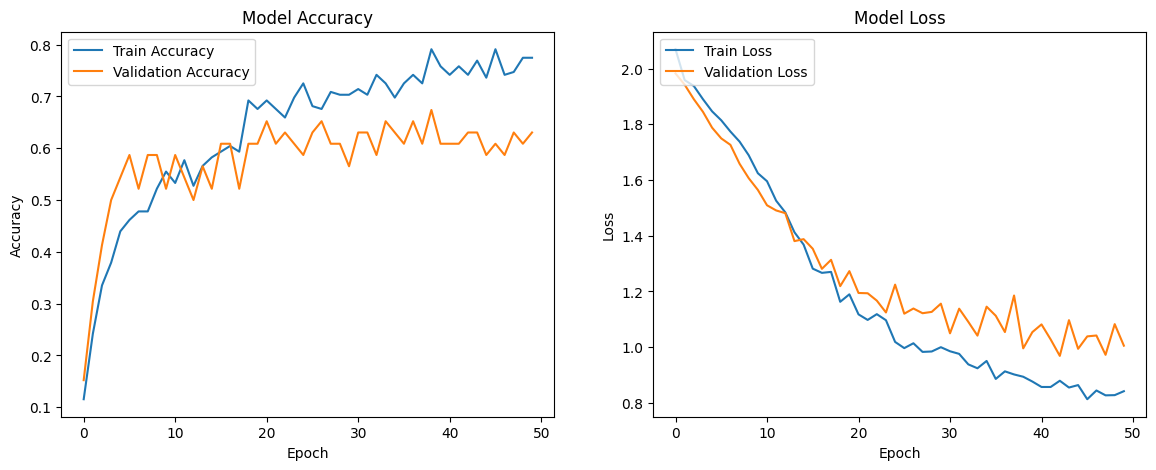

In [144]:
import matplotlib.pyplot as plt

# Retrieve the best hyperparameters
best_params = grid_result.best_params_
print("Best parameters found: ", best_params)

# Create a new model with the best parameters
best_model = create_model(
    neurons=best_params['neurons'],
    dropout_rate=best_params['dropout_rate'],
    regularization_rate=best_params['regularization_rate'],
    hidden_layers=best_params['hidden_layers']
)

# Train the best model
history = best_model.fit(
    X_train, 
    train_target_encoded, 
    epochs=best_params['epochs'], 
    batch_size=best_params['batch_size'],
    validation_split=0.2,  # Use 20% of the data for validation
    verbose=0  # Turn off training log
)

# Plotting the training and validation accuracy
plt.figure(figsize=(14, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.show()


In [145]:
# Evaluate the best model on the test data
test_loss, test_accuracy = best_model.evaluate(X_test, test_target_encoded, verbose=0)

print(f"Test Accuracy: {test_accuracy}")

Test Accuracy: 0.7068965435028076


## Random Forest

In [53]:
# Perform Random Forest Classification on the artist dataset
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
rf_model = RandomForestClassifier()

# Define the parameter grid
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create GridSearchCV with the Random Forest estimator and the parameter grid
grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=5, scoring='accuracy', refit=True)

# Fit the GridSearchCV to the training data
grid_search_rf.fit(X_train, train_target_encoded)


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 20, 30, 40, 50],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [58]:
from sklearn.metrics import accuracy_score

# Get the best model
best_rf_model = grid_search_rf.best_estimator_

# Predict on the test data with the best model
y_pred_rf = best_rf_model.predict(X_test)

# Evaluate the best model on the test data
accuracy_rf = accuracy_score(test_target_encoded, y_pred_rf)

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Test Accuracy: 0.7931034482758621
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.92      0.80        13
           1       1.00      0.75      0.86         8
           2       0.82      0.90      0.86        10
           3       0.90      0.82      0.86        11
           4       0.50      0.40      0.44         5
           5       0.80      0.73      0.76        11

    accuracy                           0.79        58
   macro avg       0.79      0.75      0.76        58
weighted avg       0.80      0.79      0.79        58



Text(0.5, 1.0, 'Training Confusion Matrix')

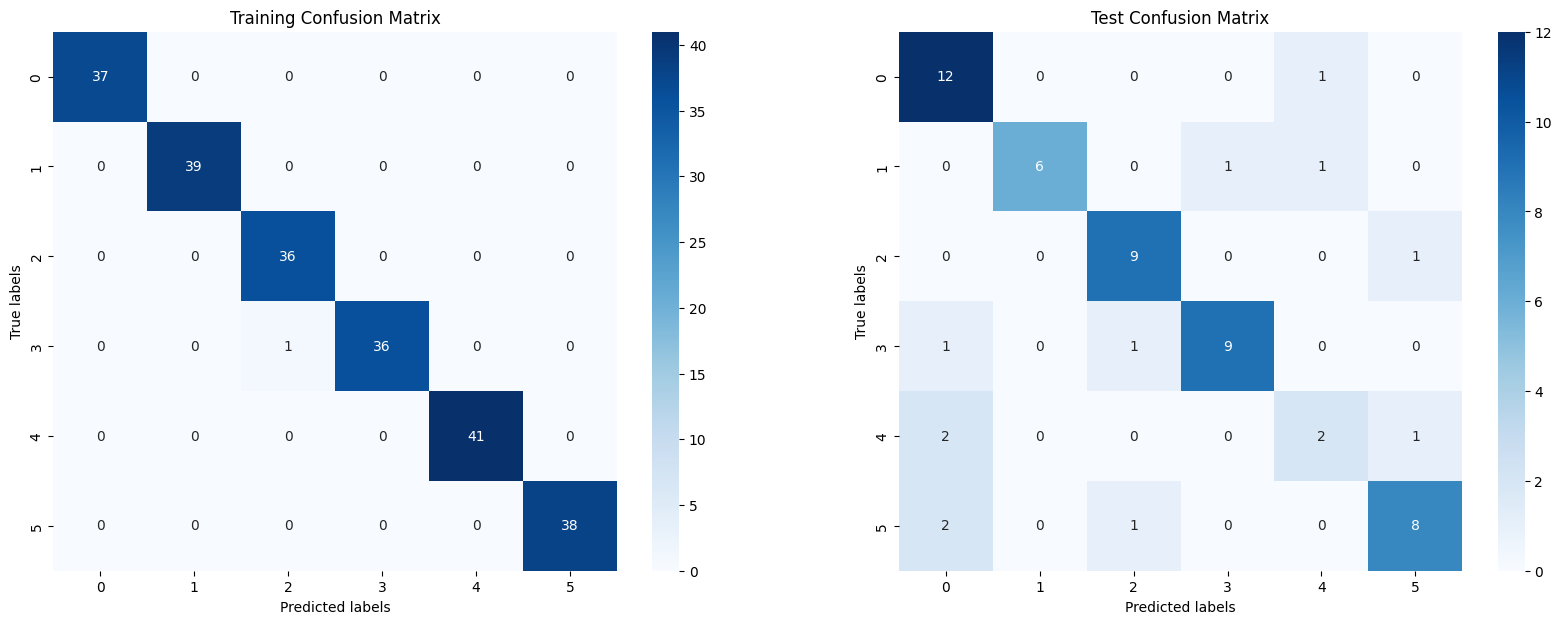

In [61]:
from sklearn.metrics import classification_report

# Print the best parameters, the test accuracy, and the classification report
print(f"Best Parameters: {grid_search_rf.best_params_}")
print(f"Test Accuracy: {accuracy_rf}")
print("Random Forest Classification Report:")
print(classification_report(test_target_encoded, y_pred_rf))

# draw confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# train confusion matrix
cm_train = confusion_matrix(train_target_encoded, grid_search_rf.predict(X_train))

# test confusion matrix
cm_test = confusion_matrix(test_target_encoded, y_pred_rf)

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7))  # 1 Row, 2 Columns

# Test Confusion Matrix
sns.heatmap(cm_test, annot=True, fmt='g', cmap='Blues', ax=ax2,
            xticklabels=sorted(set(test_target_encoded)), yticklabels=sorted(set(test_target_encoded)))
ax2.set_xlabel('Predicted labels')
ax2.set_ylabel('True labels')
ax2.set_title('Test Confusion Matrix')

# Training Confusion Matrix
sns.heatmap(cm_train, annot=True, fmt='g', cmap='Blues', ax=ax1,
            xticklabels=sorted(set(train_target_encoded)), yticklabels=sorted(set(train_target_encoded)))
ax1.set_xlabel('Predicted labels')
ax1.set_ylabel('True labels')
ax1.set_title('Training Confusion Matrix')


## XGBoost 

In [101]:
# Encode categorical 'genre' for both training and testing sets
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

# Change the key and major columns to numerical for input
X_train['key'] = X_train['key'].astype('int')
X_train['major'] = X_train['major'].astype('int')
X_test['key'] = X_test['key'].astype('int')
X_test['major'] = X_test['major'].astype('int')


In [102]:
import xgboost as xgb

# Setting up the XGBoost classifier
model = xgb.XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    min_child_weight=1,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='multi:softprob',  # Use for multi-class classification
    num_class=len(label_encoder.classes_),  # Specify number of classes
    random_state=42
)

# Training the model
model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None, num_class=6,
              num_parallel_tree=None, ...)

In [104]:
from sklearn.metrics import accuracy_score, classification_report

# Making predictions
y_pred = model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7068965517241379
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.85      0.81        13
           1       0.83      0.62      0.71         8
           2       0.69      0.90      0.78        10
           3       0.75      0.55      0.63        11
           4       0.38      0.60      0.46         5
           5       0.78      0.64      0.70        11

    accuracy                           0.71        58
   macro avg       0.70      0.69      0.68        58
weighted avg       0.73      0.71      0.71        58



In [105]:
from sklearn.model_selection import GridSearchCV

# Setting up the parameter grid
param_grid = {
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2]
}

# Configuring the grid search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=3, verbose=2)

# Running grid search
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best accuracy found: ", grid_search.best_score_)


Fitting 3 folds for each of 81 candidates, totalling 243 fits
[CV] END learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=50; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=50; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=50; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, min_chil

In [106]:
# Retrieve the best model from the grid search
best_model = grid_search.best_estimator_

# Making predictions on the test set
y_test_pred = best_model.predict(X_test)

# Evaluating the model on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_classification_report = classification_report(y_test, y_test_pred)

# Print the results
print("Test Set Accuracy:", test_accuracy)
print("Test Set Classification Report:\n", test_classification_report)


Test Set Accuracy: 0.7758620689655172
Test Set Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.92      0.86        13
           1       0.83      0.62      0.71         8
           2       0.82      0.90      0.86        10
           3       0.78      0.64      0.70        11
           4       0.67      0.80      0.73         5
           5       0.73      0.73      0.73        11

    accuracy                           0.78        58
   macro avg       0.77      0.77      0.76        58
weighted avg       0.78      0.78      0.77        58



## Comparison of the models

- Logistic Regression
    - Test Accuracy: 0.8103448275862069
    - Time: 3.2s
- SVM
    - Test Accuracy: 0.7758620689655172
    - Time: 3.4s
- Neural Network
    - Train Accuracy: 0.688502
    - Test Accuracy: 0.7068965435028076
    - Time: 11m 46.2.s
- Random Forest
    - Test Accuracy: 0.7931034482758621
    - Time: 1m 6.4s
- XGBoost
    - Test Accuracy: 0.7758620689655172
    - Time: 24.5s